In [161]:
import math
import random
from statistics import mean
import numpy as np
import matplotlib.pyplot as plt

In [117]:
def energie(chemin, dist):
  distance = 0
  n = len(chemin)
  for i in range(n-1):
    distance += dist[chemin[i]][chemin[i+1]]
  return distance + dist[chemin[n-1]][chemin[0]]

In [124]:
def RS(dist, t_init, t_min, coeff):
  n = len(dist)
  chemin = [i for i in range(n)]
  E = energie(chemin, dist)
  temp = t_init
  compt=0
  while temp > t_min:
    sommet1 = random.randint(0, n-1)
    sommet2 = random.randint(0, n-1)
    chemin_b = chemin[:]
    temporaire = chemin_b[sommet1]
    chemin_b[sommet1] = chemin[sommet2]
    chemin_b[sommet2] = temporaire
    E_b = energie(chemin_b, dist)
    if (E_b < E) or (random.random() < math.exp((E - E_b) / temp)):
      chemin = chemin_b
      E = E_b
    temp *= coeff
    compt+=1
  return chemin,compt      
    

In [120]:
M5 = [[0, 726, 527, 751, 72], [726, 0, 699, 509, 472], [527, 699, 0, 481, 177], [751, 509, 481, 0, 899], [72, 472, 177, 899, 0]] 
M10 = [[0, 104, 728, 376, 115, 16, 268, 595, 519, 185], [104, 0, 601, 79, 949, 353, 922, 113, 844, 607], [728, 601, 0, 834, 946, 925, 792, 678, 506, 429], [376, 79, 834, 0, 381, 686, 435, 870, 678, 557], [115, 949, 946, 381, 0, 867, 43, 344, 150, 865], [16, 353, 925, 686, 867, 0, 675, 647, 824, 563], [268, 922, 792, 435, 43, 675, 0, 384, 325, 189], [595, 113, 678, 870, 344, 647, 384, 0, 484, 22], [519, 844, 506, 678, 150, 824, 325, 484, 0, 156], [185, 607, 429, 557, 865, 563, 189, 22, 156, 0]] 
M25 = [[0, 142, 63, 499, 76, 648, 8, 178, 892, 621, 230, 582, 799, 430, 551, 337, 451, 629, 820, 242, 732, 260, 530, 368, 358], [142, 0, 264, 979, 27, 31, 698, 7, 240, 42, 369, 297, 134, 946, 128, 838, 475, 911, 747, 16, 659, 191, 275, 563, 734], [63, 264, 0, 939, 45, 537, 424, 608, 572, 121, 429, 826, 191, 581, 519, 68, 553, 521, 562, 540, 72, 765, 734, 34, 110], [499, 979, 939, 0, 615, 641, 414, 918, 701, 222, 825, 172, 204, 533, 89, 298, 31, 432, 946, 978, 796, 370, 68, 693, 478], [76, 27, 45, 615, 0, 991, 32, 211, 659, 769, 928, 852, 264, 726, 322, 183, 947, 924, 849, 781, 133, 45, 502, 87, 74], [648, 31, 537, 641, 991, 0, 915, 827, 244, 691, 83, 383, 638, 374, 282, 977, 848, 837, 353, 505, 230, 70, 951, 707, 518], [8, 698, 424, 414, 32, 915, 0, 714, 172, 572, 934, 14, 932, 259, 957, 520, 50, 295, 172, 148, 578, 980, 334, 470, 244], [178, 7, 608, 918, 211, 827, 714, 0, 727, 342, 646, 743, 231, 339, 849, 170, 864, 644, 640, 497, 604, 184, 501, 946, 294], [892, 240, 572, 701, 659, 244, 172, 727, 0, 713, 983, 834, 638, 481, 603, 826, 93, 351, 309, 33, 57, 425, 249, 125, 573], [621, 42, 121, 222, 769, 691, 572, 342, 713, 0, 532, 824, 713, 298, 20, 36, 809, 294, 521, 651, 657, 342, 427, 912, 580], [230, 369, 429, 825, 928, 83, 934, 646, 983, 532, 0, 305, 380, 950, 721, 183, 355, 89, 198, 135, 912, 510, 322, 598, 422], [582, 297, 826, 172, 852, 383, 14, 743, 834, 824, 305, 0, 690, 138, 63, 756, 58, 750, 489, 653, 538, 622, 287, 194, 448], [799, 134, 191, 204, 264, 638, 932, 231, 638, 713, 380, 690, 0, 784, 658, 574, 168, 860, 870, 904, 106, 435, 182, 54, 907], [430, 946, 581, 533, 726, 374, 259, 339, 481, 298, 950, 138, 784, 0, 301, 900, 344, 645, 513, 413, 914, 748, 337, 30, 12], [551, 128, 519, 89, 322, 282, 957, 849, 603, 20, 721, 63, 658, 301, 0, 360, 901, 761, 672, 686, 458, 270, 574, 609, 877], [337, 838, 68, 298, 183, 977, 520, 170, 826, 36, 183, 756, 574, 900, 360, 0, 70, 843, 622, 733, 808, 52, 94, 53, 911], [451, 475, 553, 31, 947, 848, 50, 864, 93, 809, 355, 58, 168, 344, 901, 70, 0, 216, 60, 276, 839, 621, 449, 611, 674], [629, 911, 521, 432, 924, 837, 295, 644, 351, 294, 89, 750, 860, 645, 761, 843, 216, 0, 274, 719, 690, 880, 412, 788, 676], [820, 747, 562, 946, 849, 353, 172, 640, 309, 521, 198, 489, 870, 513, 672, 622, 60, 274, 0, 959, 392, 331, 752, 760, 716], [242, 16, 540, 978, 781, 505, 148, 497, 33, 651, 135, 653, 904, 413, 686, 733, 276, 719, 959, 0, 463, 443, 651, 295, 122], [732, 659, 72, 796, 133, 230, 578, 604, 57, 657, 912, 538, 106, 914, 458, 808, 839, 690, 392, 463, 0, 459, 531, 626, 233], [260, 191, 765, 370, 45, 70, 980, 184, 425, 342, 510, 622, 435, 748, 270, 52, 621, 880, 331, 443, 459, 0, 265, 722, 620], [530, 275, 734, 68, 502, 951, 334, 501, 249, 427, 322, 287, 182, 337, 574, 94, 449, 412, 752, 651, 531, 265, 0, 88, 236], [368, 563, 34, 693, 87, 707, 470, 946, 125, 912, 598, 194, 54, 30, 609, 53, 611, 788, 760, 295, 626, 722, 88, 0, 766], [358, 734, 110, 478, 74, 518, 244, 294, 573, 580, 422, 448, 907, 12, 877, 911, 674, 676, 716, 122, 233, 620, 236, 766, 0]] 
M50 = [[0, 221, 461, 506, 745, 526, 657, 672, 685, 35, 225, 153, 868, 199, 309, 876, 208, 944, 134, 101, 514, 559, 375, 412, 205, 472, 658, 38, 25, 627, 340, 186, 777, 405, 87, 231, 137, 319, 872, 258, 554, 868, 32, 882, 868, 466, 886, 615, 207, 788], [221, 0, 989, 915, 268, 790, 552, 589, 703, 472, 589, 257, 164, 580, 138, 484, 890, 122, 287, 433, 708, 799, 313, 437, 254, 909, 982, 427, 926, 324, 4, 731, 102, 774, 644, 691, 586, 594, 78, 173, 487, 698, 631, 758, 209, 598, 138, 370, 406, 773], [461, 989, 0, 37, 304, 613, 3, 961, 456, 759, 2, 485, 366, 891, 979, 676, 653, 708, 923, 198, 783, 339, 876, 463, 391, 958, 673, 747, 427, 450, 213, 463, 873, 486, 98, 258, 632, 668, 840, 125, 492, 893, 178, 271, 985, 292, 228, 537, 169, 348], [506, 915, 37, 0, 56, 895, 686, 577, 692, 610, 45, 478, 560, 702, 32, 972, 41, 684, 289, 555, 581, 513, 348, 313, 602, 889, 62, 372, 324, 883, 340, 727, 749, 64, 535, 912, 632, 515, 620, 750, 528, 704, 643, 350, 910, 149, 362, 388, 813, 129], [745, 268, 304, 56, 0, 610, 773, 451, 657, 87, 584, 22, 485, 194, 418, 286, 548, 468, 895, 525, 441, 54, 647, 968, 975, 257, 278, 929, 845, 79, 250, 234, 259, 484, 235, 563, 388, 415, 655, 368, 737, 677, 484, 967, 98, 684, 983, 783, 417, 519], [526, 790, 613, 895, 610, 0, 880, 467, 475, 325, 304, 327, 938, 535, 239, 849, 988, 765, 890, 333, 965, 272, 997, 189, 107, 525, 421, 407, 346, 570, 810, 993, 879, 780, 634, 216, 415, 217, 832, 775, 309, 536, 80, 80, 690, 992, 450, 316, 892, 186], [657, 552, 3, 686, 773, 880, 0, 716, 67, 927, 915, 36, 795, 511, 804, 947, 84, 25, 574, 372, 270, 641, 942, 699, 440, 533, 793, 792, 146, 628, 23, 438, 879, 375, 8, 396, 857, 732, 97, 114, 302, 286, 867, 212, 971, 203, 897, 675, 205, 557], [672, 589, 961, 577, 451, 467, 716, 0, 906, 709, 889, 893, 366, 560, 656, 16, 530, 227, 232, 30, 699, 94, 897, 791, 973, 114, 557, 147, 589, 673, 951, 384, 793, 387, 903, 140, 498, 325, 164, 710, 772, 135, 786, 356, 336, 692, 715, 161, 530, 639], [685, 703, 456, 692, 657, 475, 67, 906, 0, 628, 282, 353, 705, 421, 722, 896, 29, 794, 374, 188, 534, 29, 480, 292, 968, 527, 445, 637, 246, 453, 466, 375, 45, 221, 395, 605, 902, 294, 134, 406, 921, 960, 658, 496, 460, 1000, 833, 151, 383, 22], [35, 472, 759, 610, 87, 325, 927, 709, 628, 0, 704, 112, 54, 736, 630, 908, 984, 599, 370, 773, 302, 720, 651, 848, 300, 865, 511, 370, 258, 496, 823, 414, 470, 381, 429, 574, 827, 330, 822, 270, 247, 652, 688, 565, 347, 389, 623, 239, 437, 723], [225, 589, 2, 45, 584, 304, 915, 889, 282, 704, 0, 641, 696, 573, 583, 177, 649, 405, 531, 677, 235, 101, 50, 389, 16, 22, 790, 196, 8, 797, 697, 348, 9, 171, 158, 105, 302, 456, 167, 530, 234, 178, 475, 778, 857, 840, 492, 631, 238, 909], [153, 257, 485, 478, 22, 327, 36, 893, 353, 112, 641, 0, 134, 675, 780, 274, 749, 953, 952, 924, 467, 188, 687, 22, 490, 620, 210, 600, 594, 928, 479, 797, 76, 760, 20, 58, 361, 344, 950, 449, 116, 254, 326, 458, 127, 97, 590, 9, 103, 942], [868, 164, 366, 560, 485, 938, 795, 366, 705, 54, 696, 134, 0, 210, 383, 133, 508, 248, 439, 917, 938, 777, 642, 11, 909, 391, 765, 471, 938, 814, 297, 786, 691, 350, 722, 390, 659, 399, 621, 292, 29, 485, 91, 135, 658, 462, 16, 771, 816, 82], [199, 580, 891, 702, 194, 535, 511, 560, 421, 736, 573, 675, 210, 0, 972, 775, 372, 604, 215, 223, 31, 688, 426, 600, 856, 383, 775, 626, 695, 302, 443, 837, 414, 859, 921, 798, 587, 272, 368, 246, 163, 454, 942, 389, 64, 887, 248, 46, 864, 574], [309, 138, 979, 32, 418, 239, 804, 656, 722, 630, 583, 780, 383, 972, 0, 871, 889, 857, 801, 309, 101, 822, 733, 709, 935, 290, 126, 761, 492, 853, 927, 916, 233, 662, 412, 904, 342, 611, 621, 488, 259, 344, 496, 119, 778, 556, 803, 439, 842, 325], [876, 484, 676, 972, 286, 849, 947, 16, 896, 908, 177, 274, 133, 775, 871, 0, 750, 695, 303, 879, 977, 297, 105, 247, 438, 68, 388, 40, 465, 904, 812, 367, 83, 597, 911, 529, 983, 668, 987, 673, 606, 347, 976, 59, 686, 89, 112, 762, 178, 542], [208, 890, 653, 41, 548, 988, 84, 530, 29, 984, 649, 749, 508, 372, 889, 750, 0, 553, 78, 87, 515, 10, 495, 634, 982, 923, 524, 916, 421, 894, 870, 257, 703, 70, 4, 655, 929, 643, 547, 380, 353, 443, 923, 123, 88, 194, 45, 151, 163, 348], [944, 122, 708, 684, 468, 765, 25, 227, 794, 599, 405, 953, 248, 604, 857, 695, 553, 0, 164, 250, 544, 279, 936, 837, 20, 916, 995, 837, 933, 6, 915, 590, 999, 768, 596, 469, 612, 522, 754, 436, 581, 243, 165, 506, 36, 856, 764, 14, 82, 628], [134, 287, 923, 289, 895, 890, 574, 232, 374, 370, 531, 952, 439, 215, 801, 303, 78, 164, 0, 305, 219, 772, 582, 152, 302, 347, 483, 272, 132, 304, 474, 514, 667, 476, 597, 202, 806, 356, 83, 324, 802, 878, 404, 33, 430, 733, 330, 81, 601, 963], [101, 433, 198, 555, 525, 333, 372, 30, 188, 773, 677, 924, 917, 223, 309, 879, 87, 250, 305, 0, 618, 226, 266, 468, 67, 102, 533, 828, 491, 532, 686, 378, 665, 493, 926, 94, 163, 480, 340, 79, 159, 239, 186, 426, 420, 240, 177, 541, 281, 187], [514, 708, 783, 581, 441, 965, 270, 699, 534, 302, 235, 467, 938, 31, 101, 977, 515, 544, 219, 618, 0, 834, 658, 996, 963, 205, 64, 274, 333, 626, 552, 104, 936, 49, 617, 101, 849, 401, 288, 760, 33, 802, 748, 675, 968, 265, 63, 923, 349, 593], [559, 799, 339, 513, 54, 272, 641, 94, 29, 720, 101, 188, 777, 688, 822, 297, 10, 279, 772, 226, 834, 0, 225, 762, 323, 321, 603, 575, 405, 119, 118, 675, 245, 877, 394, 87, 318, 733, 466, 114, 39, 75, 736, 120, 343, 141, 485, 276, 181, 993], [375, 313, 876, 348, 647, 997, 942, 897, 480, 651, 50, 687, 642, 426, 733, 105, 495, 936, 582, 266, 658, 225, 0, 347, 334, 766, 951, 379, 888, 945, 910, 497, 765, 751, 618, 910, 653, 45, 338, 276, 319, 94, 504, 98, 363, 350, 225, 412, 92, 722], [412, 437, 463, 313, 968, 189, 699, 791, 292, 848, 389, 22, 11, 600, 709, 247, 634, 837, 152, 468, 996, 762, 347, 0, 402, 790, 293, 650, 326, 29, 136, 608, 815, 128, 873, 114, 575, 251, 131, 626, 199, 998, 764, 307, 565, 972, 261, 894, 349, 233], [205, 254, 391, 602, 975, 107, 440, 973, 968, 300, 16, 490, 909, 856, 935, 438, 982, 20, 302, 67, 963, 323, 334, 402, 0, 436, 332, 167, 785, 12, 239, 593, 747, 950, 498, 131, 296, 454, 839, 572, 262, 986, 168, 935, 641, 104, 117, 166, 423, 436], [472, 909, 958, 889, 257, 525, 533, 114, 527, 865, 22, 620, 391, 383, 290, 68, 923, 916, 347, 102, 205, 321, 766, 790, 436, 0, 599, 186, 671, 1, 125, 987, 988, 731, 687, 1, 299, 742, 98, 627, 52, 755, 139, 53, 128, 836, 775, 266, 183, 914], [658, 982, 673, 62, 278, 421, 793, 557, 445, 511, 790, 210, 765, 775, 126, 388, 524, 995, 483, 533, 64, 603, 951, 293, 332, 599, 0, 399, 667, 575, 989, 328, 637, 785, 584, 782, 261, 79, 169, 951, 227, 325, 318, 819, 437, 553, 961, 344, 613, 416], [38, 427, 747, 372, 929, 407, 792, 147, 637, 370, 196, 600, 471, 626, 761, 40, 916, 837, 272, 828, 274, 575, 379, 650, 167, 186, 399, 0, 200, 408, 654, 848, 377, 547, 456, 743, 773, 707, 561, 188, 47, 318, 699, 377, 0, 644, 443, 762, 624, 659], [25, 926, 427, 324, 845, 346, 146, 589, 246, 258, 8, 594, 938, 695, 492, 465, 421, 933, 132, 491, 333, 405, 888, 326, 785, 671, 667, 200, 0, 306, 23, 526, 816, 202, 726, 668, 392, 928, 859, 919, 139, 265, 545, 657, 392, 940, 933, 761, 227, 102], [627, 324, 450, 883, 79, 570, 628, 673, 453, 496, 797, 928, 814, 302, 853, 904, 894, 6, 304, 532, 626, 119, 945, 29, 12, 1, 575, 408, 306, 0, 340, 860, 257, 170, 184, 235, 619, 590, 185, 659, 989, 182, 730, 698, 780, 334, 88, 410, 114, 840], [340, 4, 213, 340, 250, 810, 23, 951, 466, 823, 697, 479, 297, 443, 927, 812, 870, 915, 474, 686, 552, 118, 910, 136, 239, 125, 989, 654, 23, 340, 0, 408, 538, 970, 523, 638, 689, 58, 228, 581, 75, 645, 193, 766, 878, 607, 812, 205, 339, 697], [186, 731, 463, 727, 234, 993, 438, 384, 375, 414, 348, 797, 786, 837, 916, 367, 257, 590, 514, 378, 104, 675, 497, 608, 593, 987, 328, 848, 526, 860, 408, 0, 592, 575, 986, 658, 215, 498, 670, 375, 505, 885, 110, 544, 186, 680, 93, 809, 320, 773], [777, 102, 873, 749, 259, 879, 879, 793, 45, 470, 9, 76, 691, 414, 233, 83, 703, 999, 667, 665, 936, 245, 765, 815, 747, 988, 637, 377, 816, 257, 538, 592, 0, 887, 640, 436, 259, 501, 874, 71, 890, 868, 159, 229, 415, 171, 436, 494, 756, 703], [405, 774, 486, 64, 484, 780, 375, 387, 221, 381, 171, 760, 350, 859, 662, 597, 70, 768, 476, 493, 49, 877, 751, 128, 950, 731, 785, 547, 202, 170, 970, 575, 887, 0, 548, 309, 648, 211, 818, 920, 180, 829, 695, 194, 454, 812, 937, 882, 153, 598], [87, 644, 98, 535, 235, 634, 8, 903, 395, 429, 158, 20, 722, 921, 412, 911, 4, 596, 597, 926, 617, 394, 618, 873, 498, 687, 584, 456, 726, 184, 523, 986, 640, 548, 0, 808, 431, 919, 421, 526, 905, 422, 671, 664, 435, 864, 351, 982, 875, 256], [231, 691, 258, 912, 563, 216, 396, 140, 605, 574, 105, 58, 390, 798, 904, 529, 655, 469, 202, 94, 101, 87, 910, 114, 131, 1, 782, 743, 668, 235, 638, 658, 436, 309, 808, 0, 276, 534, 339, 527, 944, 63, 9, 158, 345, 726, 379, 130, 29, 497], [137, 586, 632, 632, 388, 415, 857, 498, 902, 827, 302, 361, 659, 587, 342, 983, 929, 612, 806, 163, 849, 318, 653, 575, 296, 299, 261, 773, 392, 619, 689, 215, 259, 648, 431, 276, 0, 842, 412, 937, 635, 42, 258, 599, 675, 896, 320, 689, 10, 582], [319, 594, 668, 515, 415, 217, 732, 325, 294, 330, 456, 344, 399, 272, 611, 668, 643, 522, 356, 480, 401, 733, 45, 251, 454, 742, 79, 707, 928, 590, 58, 498, 501, 211, 919, 534, 842, 0, 178, 780, 52, 142, 69, 1, 589, 439, 228, 456, 354, 527], [872, 78, 840, 620, 655, 832, 97, 164, 134, 822, 167, 950, 621, 368, 621, 987, 547, 754, 83, 340, 288, 466, 338, 131, 839, 98, 169, 561, 859, 185, 228, 670, 874, 818, 421, 339, 412, 178, 0, 344, 894, 620, 774, 86, 366, 964, 848, 15, 205, 364], [258, 173, 125, 750, 368, 775, 114, 710, 406, 270, 530, 449, 292, 246, 488, 673, 380, 436, 324, 79, 760, 114, 276, 626, 572, 627, 951, 188, 919, 659, 581, 375, 71, 920, 526, 527, 937, 780, 344, 0, 248, 462, 821, 335, 953, 469, 55, 119, 628, 280], [554, 487, 492, 528, 737, 309, 302, 772, 921, 247, 234, 116, 29, 163, 259, 606, 353, 581, 802, 159, 33, 39, 319, 199, 262, 52, 227, 47, 139, 989, 75, 505, 890, 180, 905, 944, 635, 52, 894, 248, 0, 817, 974, 53, 159, 843, 32, 965, 7, 951], [868, 698, 893, 704, 677, 536, 286, 135, 960, 652, 178, 254, 485, 454, 344, 347, 443, 243, 878, 239, 802, 75, 94, 998, 986, 755, 325, 318, 265, 182, 645, 885, 868, 829, 422, 63, 42, 142, 620, 462, 817, 0, 99, 508, 649, 243, 1, 602, 60, 190], [32, 631, 178, 643, 484, 80, 867, 786, 658, 688, 475, 326, 91, 942, 496, 976, 923, 165, 404, 186, 748, 736, 504, 764, 168, 139, 318, 699, 545, 730, 193, 110, 159, 695, 671, 9, 258, 69, 774, 821, 974, 99, 0, 355, 389, 962, 685, 451, 839, 498], [882, 758, 271, 350, 967, 80, 212, 356, 496, 565, 778, 458, 135, 389, 119, 59, 123, 506, 33, 426, 675, 120, 98, 307, 935, 53, 819, 377, 657, 698, 766, 544, 229, 194, 664, 158, 599, 1, 86, 335, 53, 508, 355, 0, 159, 34, 161, 322, 334, 275], [868, 209, 985, 910, 98, 690, 971, 336, 460, 347, 857, 127, 658, 64, 778, 686, 88, 36, 430, 420, 968, 343, 363, 565, 641, 128, 437, 0, 392, 780, 878, 186, 415, 454, 435, 345, 675, 589, 366, 953, 159, 649, 389, 159, 0, 782, 936, 549, 404, 531], [466, 598, 292, 149, 684, 992, 203, 692, 1000, 389, 840, 97, 462, 887, 556, 89, 194, 856, 733, 240, 265, 141, 350, 972, 104, 836, 553, 644, 940, 334, 607, 680, 171, 812, 864, 726, 896, 439, 964, 469, 843, 243, 962, 34, 782, 0, 763, 625, 844, 305], [886, 138, 228, 362, 983, 450, 897, 715, 833, 623, 492, 590, 16, 248, 803, 112, 45, 764, 330, 177, 63, 485, 225, 261, 117, 775, 961, 443, 933, 88, 812, 93, 436, 937, 351, 379, 320, 228, 848, 55, 32, 1, 685, 161, 936, 763, 0, 678, 180, 229], [615, 370, 537, 388, 783, 316, 675, 161, 151, 239, 631, 9, 771, 46, 439, 762, 151, 14, 81, 541, 923, 276, 412, 894, 166, 266, 344, 762, 761, 410, 205, 809, 494, 882, 982, 130, 689, 456, 15, 119, 965, 602, 451, 322, 549, 625, 678, 0, 965, 344], [207, 406, 169, 813, 417, 892, 205, 530, 383, 437, 238, 103, 816, 864, 842, 178, 163, 82, 601, 281, 349, 181, 92, 349, 423, 183, 613, 624, 227, 114, 339, 320, 756, 153, 875, 29, 10, 354, 205, 628, 7, 60, 839, 334, 404, 844, 180, 965, 0, 890], [788, 773, 348, 129, 519, 186, 557, 639, 22, 723, 909, 942, 82, 574, 325, 542, 348, 628, 963, 187, 593, 993, 722, 233, 436, 914, 416, 659, 102, 840, 697, 773, 703, 598, 256, 497, 582, 527, 364, 280, 951, 190, 498, 275, 531, 305, 229, 344, 890, 0]] 
M100 = [[0, 639, 920, 893, 910, 488, 167, 251, 602, 67, 60, 358, 866, 133, 643, 650, 699, 491, 775, 135, 251, 889, 3, 380, 328, 128, 468, 741, 957, 371, 502, 984, 796, 122, 313, 749, 479, 785, 936, 933, 539, 852, 92, 652, 696, 819, 383, 851, 616, 900, 949, 754, 696, 54, 770, 240, 430, 658, 751, 205, 815, 115, 372, 400, 398, 202, 756, 473, 33, 762, 102, 821, 186, 167, 756, 990, 672, 331, 581, 806, 789, 956, 77, 370, 955, 418, 523, 11, 712, 854, 94, 243, 812, 953, 311, 914, 652, 799, 195, 256], [639, 0, 152, 407, 812, 409, 278, 833, 610, 193, 689, 674, 889, 676, 427, 315, 361, 744, 569, 482, 742, 701, 372, 915, 358, 92, 710, 330, 676, 313, 34, 657, 137, 626, 831, 586, 783, 562, 288, 961, 635, 304, 523, 964, 733, 188, 621, 799, 358, 170, 65, 678, 565, 947, 301, 142, 596, 556, 884, 987, 799, 923, 205, 115, 467, 367, 139, 365, 219, 928, 133, 745, 944, 26, 382, 533, 517, 693, 369, 285, 742, 508, 615, 445, 880, 36, 893, 709, 949, 750, 960, 65, 29, 517, 319, 298, 188, 586, 160, 983], [920, 152, 0, 146, 139, 483, 405, 572, 659, 490, 652, 495, 789, 677, 255, 432, 872, 778, 235, 266, 159, 939, 453, 60, 381, 807, 305, 788, 220, 587, 800, 98, 493, 800, 163, 890, 680, 372, 420, 82, 589, 700, 821, 78, 460, 888, 906, 875, 776, 966, 298, 999, 742, 376, 973, 746, 602, 437, 72, 3, 299, 964, 101, 627, 90, 374, 429, 714, 502, 888, 37, 362, 820, 930, 771, 261, 793, 473, 706, 700, 60, 405, 281, 801, 838, 138, 917, 766, 871, 111, 249, 706, 800, 306, 770, 240, 316, 233, 989, 565], [893, 407, 146, 0, 697, 861, 330, 961, 196, 468, 625, 980, 482, 267, 603, 108, 653, 854, 674, 901, 253, 532, 172, 439, 299, 308, 314, 434, 745, 744, 553, 38, 250, 708, 794, 504, 929, 391, 678, 135, 695, 53, 586, 621, 932, 65, 66, 818, 266, 568, 873, 157, 245, 689, 203, 770, 307, 522, 621, 360, 642, 333, 490, 799, 223, 793, 568, 559, 485, 756, 105, 887, 500, 54, 983, 544, 515, 483, 332, 446, 155, 157, 275, 418, 777, 471, 324, 244, 685, 619, 911, 934, 460, 930, 582, 924, 422, 784, 142, 238], [910, 812, 139, 697, 0, 790, 277, 118, 532, 527, 825, 784, 596, 283, 205, 880, 43, 8, 140, 46, 803, 796, 609, 105, 916, 726, 821, 101, 597, 150, 671, 605, 807, 235, 947, 951, 0, 902, 449, 478, 733, 428, 277, 823, 195, 583, 690, 72, 956, 102, 277, 625, 961, 36, 971, 625, 802, 561, 287, 823, 299, 768, 751, 145, 588, 489, 394, 777, 672, 907, 172, 839, 88, 318, 773, 588, 304, 629, 666, 658, 229, 325, 213, 86, 646, 951, 566, 910, 875, 427, 503, 141, 357, 547, 615, 158, 43, 378, 381, 890], [488, 409, 483, 861, 790, 0, 624, 717, 638, 306, 171, 90, 675, 699, 649, 736, 548, 979, 18, 508, 288, 279, 660, 505, 240, 555, 644, 134, 728, 939, 506, 229, 552, 43, 563, 461, 473, 609, 866, 961, 381, 170, 916, 769, 342, 738, 169, 115, 600, 33, 554, 905, 147, 941, 193, 849, 643, 742, 536, 4, 12, 622, 770, 88, 699, 149, 25, 325, 824, 214, 99, 953, 669, 395, 394, 472, 546, 737, 270, 335, 46, 200, 736, 849, 644, 765, 410, 704, 539, 145, 748, 215, 461, 202, 574, 962, 204, 873, 126, 726], [167, 278, 405, 330, 277, 624, 0, 236, 860, 172, 3, 501, 935, 862, 310, 940, 479, 69, 462, 342, 1000, 191, 496, 634, 514, 677, 151, 900, 191, 889, 906, 37, 716, 836, 704, 962, 359, 692, 245, 333, 322, 155, 860, 460, 895, 220, 342, 611, 334, 974, 629, 368, 385, 693, 682, 499, 760, 816, 603, 716, 621, 483, 928, 689, 258, 3, 154, 420, 725, 313, 944, 684, 893, 882, 341, 894, 970, 758, 727, 273, 160, 764, 782, 467, 756, 285, 508, 240, 512, 31, 135, 216, 976, 0, 75, 544, 5, 488, 666, 269], [251, 833, 572, 961, 118, 717, 236, 0, 529, 704, 303, 560, 194, 114, 87, 906, 719, 930, 648, 373, 59, 730, 575, 209, 735, 750, 990, 857, 932, 564, 129, 949, 951, 966, 927, 607, 601, 551, 121, 705, 640, 765, 637, 552, 818, 834, 669, 837, 879, 268, 794, 584, 684, 795, 816, 711, 754, 33, 123, 408, 886, 584, 821, 126, 571, 937, 168, 426, 257, 765, 386, 338, 598, 227, 627, 447, 613, 20, 723, 47, 509, 3, 931, 698, 534, 198, 493, 418, 140, 505, 987, 159, 620, 643, 776, 338, 596, 352, 256, 424], [602, 610, 659, 196, 532, 638, 860, 529, 0, 74, 223, 305, 174, 875, 251, 116, 355, 717, 867, 54, 168, 405, 13, 290, 691, 795, 654, 526, 662, 393, 955, 886, 345, 824, 714, 812, 28, 598, 876, 417, 411, 43, 88, 399, 998, 708, 608, 494, 877, 109, 993, 89, 36, 662, 327, 786, 8, 475, 570, 905, 809, 438, 485, 240, 363, 599, 589, 411, 107, 359, 596, 826, 231, 497, 117, 115, 683, 722, 282, 76, 84, 706, 879, 914, 787, 531, 133, 402, 40, 272, 269, 620, 882, 227, 606, 564, 823, 942, 579, 861], [67, 193, 490, 468, 527, 306, 172, 704, 74, 0, 165, 630, 649, 800, 244, 302, 454, 18, 972, 786, 777, 607, 399, 863, 611, 338, 444, 418, 202, 32, 957, 489, 346, 117, 174, 679, 28, 148, 192, 93, 609, 25, 24, 86, 18, 198, 726, 562, 172, 430, 287, 169, 592, 223, 231, 434, 215, 359, 197, 515, 688, 624, 896, 7, 909, 452, 342, 921, 624, 308, 448, 113, 575, 694, 932, 47, 708, 804, 101, 825, 361, 455, 952, 431, 786, 495, 970, 797, 575, 291, 362, 39, 551, 125, 608, 860, 842, 720, 313, 677], [60, 689, 652, 625, 825, 171, 3, 303, 223, 165, 0, 109, 487, 205, 742, 150, 887, 218, 106, 702, 300, 199, 367, 940, 538, 368, 927, 788, 57, 599, 567, 825, 329, 740, 728, 521, 939, 737, 78, 323, 225, 738, 581, 472, 165, 939, 116, 187, 662, 180, 50, 338, 432, 726, 208, 23, 322, 303, 68, 993, 903, 233, 519, 55, 344, 559, 881, 52, 691, 578, 988, 924, 693, 199, 64, 206, 451, 237, 796, 59, 530, 639, 76, 772, 340, 320, 498, 634, 554, 496, 597, 423, 536, 603, 25, 200, 655, 495, 943, 98], [358, 674, 495, 980, 784, 90, 501, 560, 305, 630, 109, 0, 240, 73, 319, 544, 780, 574, 646, 552, 436, 340, 780, 562, 661, 266, 855, 880, 173, 858, 364, 707, 750, 284, 899, 766, 534, 739, 199, 805, 279, 647, 256, 779, 968, 891, 399, 946, 640, 357, 443, 204, 682, 601, 987, 124, 464, 881, 96, 671, 384, 308, 419, 77, 427, 739, 135, 344, 775, 736, 983, 841, 178, 355, 421, 699, 994, 973, 596, 129, 45, 88, 479, 792, 3, 339, 821, 819, 852, 407, 77, 35, 582, 636, 850, 247, 264, 400, 486, 552], [866, 889, 789, 482, 596, 675, 935, 194, 174, 649, 487, 240, 0, 183, 646, 67, 222, 542, 828, 154, 642, 228, 879, 793, 859, 181, 127, 720, 400, 986, 445, 504, 572, 392, 989, 347, 769, 720, 811, 156, 6, 92, 229, 814, 756, 492, 864, 724, 351, 534, 531, 241, 947, 10, 808, 949, 13, 943, 440, 796, 385, 831, 209, 120, 132, 696, 724, 610, 322, 213, 52, 916, 702, 25, 932, 415, 383, 566, 927, 138, 285, 291, 811, 688, 405, 354, 107, 278, 236, 23, 446, 144, 543, 442, 287, 198, 108, 61, 489, 295], [133, 676, 677, 267, 283, 699, 862, 114, 875, 800, 205, 73, 183, 0, 443, 402, 182, 106, 509, 544, 638, 728, 986, 75, 469, 969, 768, 675, 177, 128, 945, 341, 175, 639, 777, 393, 849, 862, 699, 76, 876, 437, 994, 224, 575, 840, 257, 775, 777, 511, 3, 228, 219, 493, 233, 894, 404, 1000, 46, 212, 12, 971, 518, 810, 855, 580, 999, 471, 69, 30, 396, 756, 583, 743, 261, 86, 316, 673, 251, 71, 176, 664, 110, 808, 818, 102, 290, 390, 722, 100, 750, 816, 992, 836, 77, 330, 851, 313, 640, 727], [643, 427, 255, 603, 205, 649, 310, 87, 251, 244, 742, 319, 646, 443, 0, 719, 4, 97, 832, 277, 641, 194, 625, 145, 871, 821, 682, 890, 852, 496, 583, 904, 648, 592, 748, 150, 853, 822, 753, 378, 7, 196, 769, 326, 349, 284, 61, 364, 975, 42, 605, 223, 86, 469, 830, 263, 19, 511, 934, 11, 852, 933, 464, 959, 182, 315, 607, 506, 256, 937, 723, 460, 129, 897, 917, 498, 4, 521, 935, 86, 280, 162, 730, 709, 940, 229, 467, 421, 403, 287, 417, 52, 700, 635, 769, 311, 782, 505, 588, 337], [650, 315, 432, 108, 880, 736, 940, 906, 116, 302, 150, 544, 67, 402, 719, 0, 18, 684, 628, 727, 461, 518, 481, 783, 209, 8, 584, 569, 321, 916, 377, 807, 754, 700, 601, 294, 775, 192, 227, 661, 981, 1000, 788, 371, 284, 205, 898, 456, 305, 282, 387, 926, 518, 52, 416, 338, 808, 99, 925, 162, 399, 567, 358, 956, 803, 739, 365, 373, 24, 949, 214, 816, 452, 729, 315, 82, 878, 401, 978, 387, 410, 42, 802, 315, 921, 936, 537, 253, 13, 704, 483, 764, 35, 196, 68, 650, 303, 197, 669, 168], [699, 361, 872, 653, 43, 548, 479, 719, 355, 454, 887, 780, 222, 182, 4, 18, 0, 786, 264, 1, 389, 558, 115, 539, 575, 184, 367, 172, 544, 683, 726, 583, 494, 889, 686, 780, 817, 98, 25, 220, 443, 528, 54, 65, 7, 178, 236, 760, 616, 737, 802, 843, 504, 343, 152, 110, 828, 636, 234, 999, 682, 801, 704, 786, 622, 678, 512, 618, 444, 469, 252, 449, 946, 58, 47, 21, 545, 431, 231, 932, 272, 149, 902, 938, 599, 657, 683, 591, 398, 396, 722, 806, 16, 5, 737, 949, 270, 603, 178, 333], [491, 744, 778, 854, 8, 979, 69, 930, 717, 18, 218, 574, 542, 106, 97, 684, 786, 0, 334, 357, 294, 608, 422, 71, 193, 903, 557, 676, 516, 424, 671, 356, 138, 499, 743, 444, 554, 947, 763, 575, 115, 824, 12, 320, 255, 186, 677, 493, 751, 873, 919, 631, 73, 784, 782, 237, 641, 337, 981, 771, 26, 584, 927, 281, 657, 570, 343, 391, 329, 478, 409, 565, 963, 905, 957, 283, 676, 578, 525, 114, 150, 291, 823, 125, 59, 841, 32, 325, 632, 510, 787, 304, 975, 451, 696, 41, 868, 151, 769, 203], [775, 569, 235, 674, 140, 18, 462, 648, 867, 972, 106, 646, 828, 509, 832, 628, 264, 334, 0, 752, 229, 561, 929, 645, 514, 737, 215, 221, 885, 974, 327, 361, 366, 25, 302, 550, 732, 123, 418, 640, 540, 335, 637, 211, 920, 24, 340, 103, 613, 967, 266, 413, 249, 161, 952, 860, 400, 737, 937, 987, 972, 759, 968, 283, 854, 519, 47, 323, 84, 635, 703, 785, 39, 977, 650, 502, 660, 801, 969, 136, 988, 995, 806, 220, 560, 312, 341, 207, 836, 270, 463, 493, 319, 67, 23, 135, 362, 208, 959, 399], [135, 482, 266, 901, 46, 508, 342, 373, 54, 786, 702, 552, 154, 544, 277, 727, 1, 357, 752, 0, 703, 763, 250, 253, 679, 143, 458, 275, 897, 589, 457, 954, 79, 752, 837, 990, 839, 27, 562, 40, 740, 575, 308, 456, 982, 52, 289, 978, 382, 456, 134, 236, 586, 445, 995, 346, 959, 72, 864, 349, 352, 722, 648, 402, 233, 670, 480, 540, 203, 420, 110, 905, 496, 528, 402, 105, 299, 615, 459, 80, 655, 978, 723, 141, 358, 657, 775, 304, 263, 836, 331, 180, 599, 817, 44, 201, 707, 302, 245, 756], [251, 742, 159, 253, 803, 288, 1000, 59, 168, 777, 300, 436, 642, 638, 641, 461, 389, 294, 229, 703, 0, 707, 864, 363, 67, 119, 543, 571, 105, 896, 327, 91, 87, 721, 515, 853, 170, 959, 742, 506, 928, 699, 437, 831, 191, 375, 519, 941, 253, 670, 594, 530, 991, 225, 283, 179, 948, 238, 817, 674, 859, 729, 417, 410, 636, 262, 928, 73, 192, 835, 386, 732, 461, 6, 827, 415, 48, 364, 449, 422, 854, 575, 461, 13, 961, 38, 391, 287, 57, 828, 374, 449, 751, 288, 329, 669, 34, 271, 979, 142], [889, 701, 939, 532, 796, 279, 191, 730, 405, 607, 199, 340, 228, 728, 194, 518, 558, 608, 561, 763, 707, 0, 999, 252, 192, 421, 887, 37, 89, 8, 664, 79, 295, 406, 326, 980, 806, 31, 43, 137, 588, 734, 456, 1, 310, 322, 506, 889, 561, 585, 468, 319, 680, 649, 589, 663, 36, 898, 244, 413, 799, 88, 939, 56, 563, 718, 643, 448, 789, 334, 818, 787, 283, 352, 165, 821, 109, 192, 955, 200, 896, 631, 213, 494, 289, 467, 565, 764, 734, 186, 629, 19, 193, 890, 763, 48, 7, 796, 64, 68], [3, 372, 453, 172, 609, 660, 496, 575, 13, 399, 367, 780, 879, 986, 625, 481, 115, 422, 929, 250, 864, 999, 0, 14, 311, 926, 283, 78, 527, 778, 611, 346, 510, 848, 702, 561, 417, 582, 86, 241, 317, 821, 700, 708, 65, 709, 672, 403, 821, 981, 636, 75, 392, 821, 835, 990, 793, 545, 66, 122, 144, 989, 672, 146, 512, 51, 626, 821, 893, 207, 63, 901, 614, 526, 350, 967, 591, 228, 635, 88, 291, 71, 887, 801, 770, 772, 400, 237, 417, 11, 690, 490, 90, 674, 1000, 791, 822, 722, 308, 775], [380, 915, 60, 439, 105, 505, 634, 209, 290, 863, 940, 562, 793, 75, 145, 783, 539, 71, 645, 253, 363, 252, 14, 0, 364, 647, 865, 253, 727, 974, 226, 630, 400, 719, 531, 567, 519, 647, 452, 245, 507, 267, 335, 262, 324, 872, 776, 893, 544, 914, 156, 316, 627, 246, 34, 822, 413, 32, 410, 628, 991, 454, 171, 694, 279, 204, 684, 940, 191, 838, 576, 290, 516, 985, 272, 509, 950, 624, 753, 32, 120, 420, 875, 545, 654, 140, 892, 44, 238, 300, 396, 425, 541, 341, 994, 872, 61, 109, 811, 477], [328, 358, 381, 299, 916, 240, 514, 735, 691, 611, 538, 661, 859, 469, 871, 209, 575, 193, 514, 679, 67, 192, 311, 364, 0, 939, 798, 667, 749, 831, 572, 865, 478, 887, 837, 823, 172, 701, 493, 807, 203, 528, 752, 38, 922, 857, 518, 859, 36, 97, 219, 214, 646, 961, 473, 710, 249, 226, 80, 804, 261, 457, 617, 145, 947, 764, 75, 580, 764, 780, 565, 11, 808, 416, 52, 269, 662, 550, 927, 115, 632, 522, 52, 393, 588, 954, 845, 430, 866, 715, 107, 599, 544, 953, 675, 230, 805, 853, 48, 963], [128, 92, 807, 308, 726, 555, 677, 750, 795, 338, 368, 266, 181, 969, 821, 8, 184, 903, 737, 143, 119, 421, 926, 647, 939, 0, 91, 446, 463, 304, 792, 133, 59, 51, 384, 208, 930, 928, 339, 4, 237, 401, 749, 484, 640, 38, 849, 964, 690, 31, 838, 697, 238, 450, 8, 662, 678, 296, 33, 415, 740, 414, 928, 608, 478, 363, 175, 277, 700, 387, 19, 260, 880, 911, 513, 485, 472, 683, 121, 199, 366, 621, 802, 738, 115, 39, 424, 916, 570, 159, 599, 485, 453, 621, 321, 565, 670, 621, 342, 388], [468, 710, 305, 314, 821, 644, 151, 990, 654, 444, 927, 855, 127, 768, 682, 584, 367, 557, 215, 458, 543, 887, 283, 865, 798, 91, 0, 206, 246, 252, 146, 611, 242, 709, 243, 605, 133, 673, 497, 373, 370, 12, 715, 132, 238, 875, 930, 341, 126, 838, 771, 317, 399, 729, 980, 312, 516, 188, 605, 25, 173, 801, 551, 20, 315, 945, 59, 389, 153, 307, 578, 625, 275, 532, 19, 164, 887, 996, 301, 124, 318, 963, 269, 943, 190, 84, 132, 616, 888, 625, 627, 745, 690, 705, 34, 636, 301, 836, 959, 264], [741, 330, 788, 434, 101, 134, 900, 857, 526, 418, 788, 880, 720, 675, 890, 569, 172, 676, 221, 275, 571, 37, 78, 253, 667, 446, 206, 0, 868, 295, 482, 122, 533, 732, 699, 815, 357, 35, 425, 715, 602, 253, 325, 740, 75, 12, 458, 292, 348, 446, 31, 878, 476, 434, 477, 242, 645, 784, 708, 170, 389, 801, 540, 384, 528, 111, 909, 791, 169, 66, 344, 329, 901, 150, 656, 329, 48, 354, 642, 133, 224, 923, 948, 334, 281, 795, 652, 538, 953, 844, 675, 274, 567, 799, 601, 982, 20, 822, 761, 65], [957, 676, 220, 745, 597, 728, 191, 932, 662, 202, 57, 173, 400, 177, 852, 321, 544, 516, 885, 897, 105, 89, 527, 727, 749, 463, 246, 868, 0, 564, 316, 755, 346, 445, 784, 372, 348, 434, 308, 96, 300, 109, 391, 220, 992, 608, 862, 403, 435, 787, 474, 612, 794, 354, 286, 15, 747, 726, 20, 781, 412, 991, 240, 160, 227, 762, 134, 823, 719, 746, 680, 378, 701, 815, 42, 702, 103, 107, 650, 825, 742, 778, 811, 510, 144, 957, 502, 434, 903, 825, 859, 169, 661, 260, 933, 451, 387, 618, 756, 477], [371, 313, 587, 744, 150, 939, 889, 564, 393, 32, 599, 858, 986, 128, 496, 916, 683, 424, 974, 589, 896, 8, 778, 974, 831, 304, 252, 295, 564, 0, 373, 566, 299, 19, 306, 533, 462, 981, 912, 223, 752, 493, 581, 108, 252, 676, 798, 476, 234, 189, 522, 650, 419, 386, 722, 599, 482, 537, 452, 724, 854, 296, 973, 948, 487, 761, 19, 715, 969, 604, 28, 547, 78, 587, 991, 542, 930, 321, 345, 422, 884, 888, 329, 107, 40, 250, 654, 66, 37, 624, 573, 866, 847, 709, 134, 745, 361, 289, 343, 163], [502, 34, 800, 553, 671, 506, 906, 129, 955, 957, 567, 364, 445, 945, 583, 377, 726, 671, 327, 457, 327, 664, 611, 226, 572, 792, 146, 482, 316, 373, 0, 692, 898, 787, 452, 26, 180, 226, 284, 87, 360, 276, 438, 473, 426, 867, 479, 888, 659, 393, 541, 696, 388, 142, 906, 886, 65, 683, 209, 284, 780, 962, 451, 574, 402, 382, 454, 559, 737, 233, 797, 200, 347, 348, 787, 520, 6, 175, 10, 277, 447, 852, 44, 331, 378, 170, 166, 758, 50, 562, 956, 401, 891, 375, 469, 379, 591, 562, 128, 669], [984, 657, 98, 38, 605, 229, 37, 949, 886, 489, 825, 707, 504, 341, 904, 807, 583, 356, 361, 954, 91, 79, 346, 630, 865, 133, 611, 122, 755, 566, 692, 0, 14, 622, 976, 928, 785, 988, 374, 427, 57, 258, 309, 921, 760, 278, 337, 875, 875, 446, 409, 866, 775, 454, 219, 377, 723, 54, 194, 35, 198, 198, 515, 408, 537, 297, 603, 404, 84, 65, 849, 45, 784, 115, 908, 241, 796, 197, 138, 166, 190, 671, 823, 260, 343, 818, 928, 126, 775, 4, 982, 902, 117, 770, 1, 929, 104, 28, 786, 12], [796, 137, 493, 250, 807, 552, 716, 951, 345, 346, 329, 750, 572, 175, 648, 754, 494, 138, 366, 79, 87, 295, 510, 400, 478, 59, 242, 533, 346, 299, 898, 14, 0, 868, 682, 448, 93, 626, 753, 335, 291, 546, 536, 297, 798, 887, 706, 986, 135, 651, 881, 975, 617, 823, 176, 87, 212, 606, 62, 331, 405, 640, 382, 573, 384, 24, 850, 808, 538, 138, 980, 964, 756, 623, 851, 812, 255, 34, 554, 263, 135, 282, 121, 569, 285, 425, 64, 531, 550, 579, 404, 571, 466, 47, 199, 879, 6, 820, 838, 980], [122, 626, 800, 708, 235, 43, 836, 966, 824, 117, 740, 284, 392, 639, 592, 700, 889, 499, 25, 752, 721, 406, 848, 719, 887, 51, 709, 732, 445, 19, 787, 622, 868, 0, 363, 283, 760, 217, 651, 905, 619, 422, 95, 854, 111, 547, 857, 423, 418, 594, 542, 383, 366, 453, 757, 95, 737, 684, 676, 180, 809, 613, 293, 630, 103, 102, 653, 740, 40, 738, 904, 991, 347, 408, 726, 481, 438, 247, 833, 872, 646, 922, 700, 261, 708, 360, 581, 196, 46, 308, 156, 600, 298, 442, 685, 157, 852, 784, 574, 333], [313, 831, 163, 794, 947, 563, 704, 927, 714, 174, 728, 899, 989, 777, 748, 601, 686, 743, 302, 837, 515, 326, 702, 531, 837, 384, 243, 699, 784, 306, 452, 976, 682, 363, 0, 873, 276, 816, 872, 131, 247, 350, 675, 596, 971, 303, 70, 525, 567, 124, 932, 199, 557, 791, 95, 456, 67, 757, 495, 516, 865, 968, 140, 738, 550, 988, 509, 454, 911, 830, 616, 672, 138, 82, 868, 600, 613, 525, 783, 507, 836, 450, 263, 794, 799, 502, 411, 347, 418, 991, 464, 970, 445, 506, 707, 814, 625, 496, 985, 138], [749, 586, 890, 504, 951, 461, 962, 607, 812, 679, 521, 766, 347, 393, 150, 294, 780, 444, 550, 990, 853, 980, 561, 567, 823, 208, 605, 815, 372, 533, 26, 928, 448, 283, 873, 0, 657, 410, 969, 554, 179, 86, 891, 546, 60, 301, 525, 636, 441, 260, 460, 692, 185, 314, 813, 837, 9, 865, 338, 212, 53, 973, 7, 228, 973, 777, 768, 558, 381, 557, 167, 292, 445, 575, 112, 900, 597, 870, 568, 108, 30, 479, 921, 916, 29, 177, 980, 494, 726, 156, 259, 407, 920, 945, 58, 36, 327, 288, 840, 844], [479, 783, 680, 929, 0, 473, 359, 601, 28, 28, 939, 534, 769, 849, 853, 775, 817, 554, 732, 839, 170, 806, 417, 519, 172, 930, 133, 357, 348, 462, 180, 785, 93, 760, 276, 657, 0, 609, 97, 848, 73, 724, 355, 985, 643, 676, 173, 178, 844, 701, 292, 65, 142, 894, 134, 510, 849, 566, 888, 843, 287, 929, 137, 751, 447, 842, 183, 175, 399, 52, 762, 525, 245, 100, 226, 311, 543, 699, 214, 888, 739, 764, 896, 418, 388, 999, 973, 344, 613, 209, 923, 1, 68, 890, 215, 529, 70, 20, 358, 962], [785, 562, 372, 391, 902, 609, 692, 551, 598, 148, 737, 739, 720, 862, 822, 192, 98, 947, 123, 27, 959, 31, 582, 647, 701, 928, 673, 35, 434, 981, 226, 988, 626, 217, 816, 410, 609, 0, 201, 693, 711, 624, 429, 117, 172, 195, 604, 560, 499, 915, 230, 90, 282, 588, 428, 506, 262, 669, 751, 905, 206, 770, 175, 466, 397, 692, 658, 704, 177, 788, 721, 127, 7, 697, 593, 121, 929, 693, 40, 959, 125, 347, 540, 814, 74, 311, 576, 686, 395, 501, 382, 188, 208, 693, 369, 583, 591, 340, 43, 29], [936, 288, 420, 678, 449, 866, 245, 121, 876, 192, 78, 199, 811, 699, 753, 227, 25, 763, 418, 562, 742, 43, 86, 452, 493, 339, 497, 425, 308, 912, 284, 374, 753, 651, 872, 969, 97, 201, 0, 72, 516, 608, 461, 20, 866, 584, 271, 550, 193, 641, 596, 404, 690, 353, 442, 194, 3, 587, 807, 646, 564, 754, 506, 711, 140, 114, 640, 862, 912, 768, 760, 538, 675, 282, 250, 120, 652, 376, 710, 117, 562, 990, 568, 389, 808, 576, 800, 90, 303, 633, 667, 41, 610, 26, 748, 230, 187, 504, 67, 516], [933, 961, 82, 135, 478, 961, 333, 705, 417, 93, 323, 805, 156, 76, 378, 661, 220, 575, 640, 40, 506, 137, 241, 245, 807, 4, 373, 715, 96, 223, 87, 427, 335, 905, 131, 554, 848, 693, 72, 0, 348, 710, 998, 387, 604, 727, 633, 58, 672, 294, 738, 710, 756, 321, 70, 273, 120, 410, 955, 425, 882, 78, 790, 273, 247, 706, 670, 754, 688, 59, 109, 968, 607, 539, 699, 406, 57, 760, 489, 379, 374, 56, 607, 647, 737, 412, 866, 337, 805, 693, 135, 428, 71, 201, 914, 718, 765, 62, 14, 388], [539, 635, 589, 695, 733, 381, 322, 640, 411, 609, 225, 279, 6, 876, 7, 981, 443, 115, 540, 740, 928, 588, 317, 507, 203, 237, 370, 602, 300, 752, 360, 57, 291, 619, 247, 179, 73, 711, 516, 348, 0, 838, 697, 618, 786, 557, 379, 23, 834, 950, 654, 485, 155, 675, 916, 24, 786, 561, 992, 796, 667, 739, 980, 928, 795, 63, 659, 175, 383, 649, 223, 634, 689, 665, 368, 292, 409, 856, 635, 73, 878, 5, 420, 629, 432, 415, 469, 43, 782, 996, 881, 587, 669, 61, 31, 991, 848, 313, 392, 218], [852, 304, 700, 53, 428, 170, 155, 765, 43, 25, 738, 647, 92, 437, 196, 1000, 528, 824, 335, 575, 699, 734, 821, 267, 528, 401, 12, 253, 109, 493, 276, 258, 546, 422, 350, 86, 724, 624, 608, 710, 838, 0, 863, 332, 937, 637, 373, 611, 922, 612, 838, 492, 75, 65, 543, 637, 13, 950, 432, 749, 454, 30, 769, 596, 551, 24, 120, 557, 562, 358, 769, 993, 609, 415, 821, 595, 220, 918, 573, 736, 871, 996, 82, 908, 583, 762, 507, 485, 721, 801, 130, 782, 90, 115, 19, 552, 200, 889, 860, 480], [92, 523, 821, 586, 277, 916, 860, 637, 88, 24, 581, 256, 229, 994, 769, 788, 54, 12, 637, 308, 437, 456, 700, 335, 752, 749, 715, 325, 391, 581, 438, 309, 536, 95, 675, 891, 355, 429, 461, 998, 697, 863, 0, 776, 976, 803, 966, 349, 343, 101, 517, 405, 599, 567, 276, 175, 493, 479, 587, 531, 176, 987, 751, 230, 650, 538, 773, 290, 312, 310, 819, 51, 724, 861, 841, 695, 511, 727, 608, 652, 199, 157, 993, 712, 485, 222, 289, 188, 181, 194, 222, 164, 443, 215, 430, 74, 699, 824, 851, 368], [652, 964, 78, 621, 823, 769, 460, 552, 399, 86, 472, 779, 814, 224, 326, 371, 65, 320, 211, 456, 831, 1, 708, 262, 38, 484, 132, 740, 220, 108, 473, 921, 297, 854, 596, 546, 985, 117, 20, 387, 618, 332, 776, 0, 661, 112, 574, 299, 388, 145, 195, 205, 321, 815, 512, 660, 969, 765, 798, 649, 895, 837, 261, 320, 995, 983, 991, 64, 92, 793, 918, 368, 260, 324, 45, 499, 482, 780, 527, 378, 463, 309, 502, 116, 957, 505, 131, 738, 922, 688, 163, 616, 411, 274, 247, 364, 286, 594, 1, 295], [696, 733, 460, 932, 195, 342, 895, 818, 998, 18, 165, 968, 756, 575, 349, 284, 7, 255, 920, 982, 191, 310, 65, 324, 922, 640, 238, 75, 992, 252, 426, 760, 798, 111, 971, 60, 643, 172, 866, 604, 786, 937, 976, 661, 0, 761, 696, 703, 74, 772, 70, 563, 353, 734, 536, 248, 342, 682, 621, 71, 17, 394, 621, 611, 797, 302, 299, 943, 918, 153, 750, 461, 382, 25, 334, 359, 466, 710, 869, 470, 773, 591, 278, 724, 702, 814, 481, 309, 894, 300, 412, 427, 844, 986, 956, 961, 677, 561, 826, 175], [819, 188, 888, 65, 583, 738, 220, 834, 708, 198, 939, 891, 492, 840, 284, 205, 178, 186, 24, 52, 375, 322, 709, 872, 857, 38, 875, 12, 608, 676, 867, 278, 887, 547, 303, 301, 676, 195, 584, 727, 557, 637, 803, 112, 761, 0, 54, 358, 513, 618, 877, 395, 161, 718, 0, 34, 570, 834, 135, 663, 928, 687, 228, 750, 169, 209, 628, 213, 40, 222, 341, 291, 174, 849, 781, 940, 316, 80, 977, 933, 82, 919, 471, 757, 700, 615, 902, 79, 658, 631, 561, 874, 392, 79, 460, 689, 783, 140, 758, 479], [383, 621, 906, 66, 690, 169, 342, 669, 608, 726, 116, 399, 864, 257, 61, 898, 236, 677, 340, 289, 519, 506, 672, 776, 518, 849, 930, 458, 862, 798, 479, 337, 706, 857, 70, 525, 173, 604, 271, 633, 379, 373, 966, 574, 696, 54, 0, 336, 769, 466, 54, 931, 259, 255, 344, 595, 569, 499, 941, 362, 599, 223, 582, 736, 416, 351, 71, 180, 315, 669, 952, 73, 762, 55, 435, 702, 520, 40, 693, 377, 894, 183, 22, 185, 564, 237, 519, 993, 872, 690, 467, 289, 707, 345, 692, 59, 932, 289, 81, 922], [851, 799, 875, 818, 72, 115, 611, 837, 494, 562, 187, 946, 724, 775, 364, 456, 760, 493, 103, 978, 941, 889, 403, 893, 859, 964, 341, 292, 403, 476, 888, 875, 986, 423, 525, 636, 178, 560, 550, 58, 23, 611, 349, 299, 703, 358, 336, 0, 356, 120, 299, 11, 413, 808, 396, 487, 422, 146, 527, 916, 431, 958, 144, 189, 469, 934, 913, 62, 429, 464, 68, 336, 996, 863, 79, 794, 892, 237, 55, 977, 6, 151, 729, 294, 849, 643, 824, 545, 481, 495, 84, 641, 58, 446, 640, 192, 682, 387, 144, 985], [616, 358, 776, 266, 956, 600, 334, 879, 877, 172, 662, 640, 351, 777, 975, 305, 616, 751, 613, 382, 253, 561, 821, 544, 36, 690, 126, 348, 435, 234, 659, 875, 135, 418, 567, 441, 844, 499, 193, 672, 834, 922, 343, 388, 74, 513, 769, 356, 0, 101, 609, 902, 322, 990, 992, 323, 635, 970, 357, 940, 955, 694, 127, 183, 174, 520, 762, 88, 756, 383, 138, 736, 622, 187, 196, 107, 252, 861, 978, 420, 652, 698, 518, 209, 523, 527, 583, 633, 536, 187, 789, 624, 885, 767, 978, 832, 68, 971, 870, 837], [900, 170, 966, 568, 102, 33, 974, 268, 109, 430, 180, 357, 534, 511, 42, 282, 737, 873, 967, 456, 670, 585, 981, 914, 97, 31, 838, 446, 787, 189, 393, 446, 651, 594, 124, 260, 701, 915, 641, 294, 950, 612, 101, 145, 772, 618, 466, 120, 101, 0, 354, 795, 42, 726, 419, 816, 982, 94, 102, 71, 488, 700, 499, 909, 522, 773, 672, 1, 809, 833, 351, 890, 611, 870, 932, 591, 696, 996, 682, 683, 433, 485, 445, 141, 863, 665, 318, 308, 221, 157, 184, 749, 374, 248, 788, 333, 248, 388, 294, 834], [949, 65, 298, 873, 277, 554, 629, 794, 993, 287, 50, 443, 531, 3, 605, 387, 802, 919, 266, 134, 594, 468, 636, 156, 219, 838, 771, 31, 474, 522, 541, 409, 881, 542, 932, 460, 292, 230, 596, 738, 654, 838, 517, 195, 70, 877, 54, 299, 609, 354, 0, 5, 802, 611, 727, 322, 132, 827, 766, 445, 152, 718, 529, 481, 684, 955, 58, 632, 94, 523, 518, 970, 364, 842, 369, 396, 667, 874, 679, 464, 433, 37, 541, 274, 830, 978, 532, 302, 358, 250, 480, 487, 792, 904, 230, 945, 181, 674, 588, 618], [754, 678, 999, 157, 625, 905, 368, 584, 89, 169, 338, 204, 241, 228, 223, 926, 843, 631, 413, 236, 530, 319, 75, 316, 214, 697, 317, 878, 612, 650, 696, 866, 975, 383, 199, 692, 65, 90, 404, 710, 485, 492, 405, 205, 563, 395, 931, 11, 902, 795, 5, 0, 89, 87, 164, 100, 251, 113, 527, 968, 41, 760, 117, 649, 181, 568, 460, 924, 554, 16, 975, 865, 325, 650, 744, 439, 132, 57, 642, 520, 25, 498, 693, 701, 364, 678, 502, 56, 576, 414, 801, 655, 672, 175, 460, 28, 27, 170, 326, 891], [696, 565, 742, 245, 961, 147, 385, 684, 36, 592, 432, 682, 947, 219, 86, 518, 504, 73, 249, 586, 991, 680, 392, 627, 646, 238, 399, 476, 794, 419, 388, 775, 617, 366, 557, 185, 142, 282, 690, 756, 155, 75, 599, 321, 353, 161, 259, 413, 322, 42, 802, 89, 0, 585, 962, 462, 73, 764, 561, 691, 50, 352, 431, 462, 40, 435, 803, 14, 328, 183, 65, 668, 883, 585, 78, 331, 70, 750, 712, 927, 414, 350, 837, 768, 514, 797, 518, 859, 953, 102, 859, 826, 466, 151, 43, 224, 136, 303, 355, 956], [54, 947, 376, 689, 36, 941, 693, 795, 662, 223, 726, 601, 10, 493, 469, 52, 343, 784, 161, 445, 225, 649, 821, 246, 961, 450, 729, 434, 354, 386, 142, 454, 823, 453, 791, 314, 894, 588, 353, 321, 675, 65, 567, 815, 734, 718, 255, 808, 990, 726, 611, 87, 585, 0, 814, 249, 82, 737, 871, 190, 452, 858, 607, 411, 658, 511, 191, 991, 883, 186, 93, 170, 602, 425, 777, 92, 888, 835, 615, 485, 212, 27, 330, 529, 845, 483, 601, 249, 557, 478, 697, 480, 568, 648, 710, 886, 849, 417, 627, 476], [770, 301, 973, 203, 971, 193, 682, 816, 327, 231, 208, 987, 808, 233, 830, 416, 152, 782, 952, 995, 283, 589, 835, 34, 473, 8, 980, 477, 286, 722, 906, 219, 176, 757, 95, 813, 134, 428, 442, 70, 916, 543, 276, 512, 536, 0, 344, 396, 992, 419, 727, 164, 962, 814, 0, 383, 391, 749, 357, 141, 804, 941, 857, 262, 590, 753, 89, 362, 146, 376, 133, 522, 129, 143, 59, 659, 746, 828, 539, 490, 434, 931, 691, 682, 874, 44, 990, 703, 400, 440, 969, 487, 287, 335, 654, 708, 599, 788, 397, 325], [240, 142, 746, 770, 625, 849, 499, 711, 786, 434, 23, 124, 949, 894, 263, 338, 110, 237, 860, 346, 179, 663, 990, 822, 710, 662, 312, 242, 15, 599, 886, 377, 87, 95, 456, 837, 510, 506, 194, 273, 24, 637, 175, 660, 248, 34, 595, 487, 323, 816, 322, 100, 462, 249, 383, 0, 675, 74, 96, 31, 916, 52, 817, 40, 143, 455, 304, 148, 3, 459, 522, 687, 242, 235, 316, 420, 867, 279, 279, 982, 146, 990, 384, 666, 983, 811, 428, 873, 265, 302, 967, 290, 687, 987, 951, 489, 753, 911, 962, 405], [430, 596, 602, 307, 802, 643, 760, 754, 8, 215, 322, 464, 13, 404, 19, 808, 828, 641, 400, 959, 948, 36, 793, 413, 249, 678, 516, 645, 747, 482, 65, 723, 212, 737, 67, 9, 849, 262, 3, 120, 786, 13, 493, 969, 342, 570, 569, 422, 635, 982, 132, 251, 73, 82, 391, 675, 0, 89, 273, 359, 180, 968, 701, 409, 784, 793, 218, 950, 339, 240, 558, 468, 912, 534, 58, 344, 33, 922, 629, 628, 204, 462, 277, 298, 996, 892, 431, 441, 686, 922, 316, 135, 607, 231, 428, 141, 758, 794, 993, 465], [658, 556, 437, 522, 561, 742, 816, 33, 475, 359, 303, 881, 943, 1000, 511, 99, 636, 337, 737, 72, 238, 898, 545, 32, 226, 296, 188, 784, 726, 537, 683, 54, 606, 684, 757, 865, 566, 669, 587, 410, 561, 950, 479, 765, 682, 834, 499, 146, 970, 94, 827, 113, 764, 737, 749, 74, 89, 0, 722, 884, 161, 290, 440, 940, 953, 274, 683, 769, 777, 636, 599, 202, 515, 56, 475, 705, 981, 918, 29, 376, 498, 789, 495, 426, 496, 387, 652, 760, 381, 945, 741, 296, 952, 930, 28, 324, 601, 610, 267, 434], [751, 884, 72, 621, 287, 536, 603, 123, 570, 197, 68, 96, 440, 46, 934, 925, 234, 981, 937, 864, 817, 244, 66, 410, 80, 33, 605, 708, 20, 452, 209, 194, 62, 676, 495, 338, 888, 751, 807, 955, 992, 432, 587, 798, 621, 135, 941, 527, 357, 102, 766, 527, 561, 871, 357, 96, 273, 722, 0, 393, 944, 870, 799, 247, 331, 709, 190, 799, 715, 960, 27, 515, 183, 119, 981, 522, 907, 211, 94, 464, 851, 919, 829, 42, 205, 181, 979, 909, 258, 75, 322, 778, 80, 861, 146, 539, 232, 672, 290, 877], [205, 987, 3, 360, 823, 4, 716, 408, 905, 515, 993, 671, 796, 212, 11, 162, 999, 771, 987, 349, 674, 413, 122, 628, 804, 415, 25, 170, 781, 724, 284, 35, 331, 180, 516, 212, 843, 905, 646, 425, 796, 749, 531, 649, 71, 663, 362, 916, 940, 71, 445, 968, 691, 190, 141, 31, 359, 884, 393, 0, 194, 721, 219, 691, 124, 491, 881, 767, 761, 846, 902, 742, 917, 865, 698, 215, 536, 773, 386, 913, 945, 296, 198, 722, 623, 721, 161, 148, 535, 75, 728, 464, 395, 239, 486, 698, 232, 2, 206, 357], [815, 799, 299, 642, 299, 12, 621, 886, 809, 688, 903, 384, 385, 12, 852, 399, 682, 26, 972, 352, 859, 799, 144, 991, 261, 740, 173, 389, 412, 854, 780, 198, 405, 809, 865, 53, 287, 206, 564, 882, 667, 454, 176, 895, 17, 928, 599, 431, 955, 488, 152, 41, 50, 452, 804, 916, 180, 161, 944, 194, 0, 955, 979, 438, 165, 948, 97, 583, 127, 274, 122, 160, 630, 942, 797, 660, 706, 561, 912, 461, 92, 758, 97, 574, 610, 230, 87, 759, 818, 141, 141, 595, 32, 945, 82, 991, 946, 695, 377, 174], [115, 923, 964, 333, 768, 622, 483, 584, 438, 624, 233, 308, 831, 971, 933, 567, 801, 584, 759, 722, 729, 88, 989, 454, 457, 414, 801, 801, 991, 296, 962, 198, 640, 613, 968, 973, 929, 770, 754, 78, 739, 30, 987, 837, 394, 687, 223, 958, 694, 700, 718, 760, 352, 858, 941, 52, 968, 290, 870, 721, 955, 0, 211, 654, 538, 337, 649, 700, 262, 74, 222, 394, 802, 1000, 824, 874, 541, 173, 488, 753, 307, 296, 846, 487, 226, 740, 292, 209, 168, 598, 57, 884, 453, 460, 787, 305, 377, 763, 149, 668], [372, 205, 101, 490, 751, 770, 928, 821, 485, 896, 519, 419, 209, 518, 464, 358, 704, 927, 968, 648, 417, 939, 672, 171, 617, 928, 551, 540, 240, 973, 451, 515, 382, 293, 140, 7, 137, 175, 506, 790, 980, 769, 751, 261, 621, 228, 582, 144, 127, 499, 529, 117, 431, 607, 857, 817, 701, 440, 799, 219, 979, 211, 0, 641, 16, 31, 140, 243, 214, 313, 159, 258, 141, 507, 881, 50, 448, 791, 772, 211, 839, 291, 585, 406, 987, 738, 89, 263, 36, 85, 841, 608, 852, 136, 36, 349, 955, 905, 732, 828], [400, 115, 627, 799, 145, 88, 689, 126, 240, 7, 55, 77, 120, 810, 959, 956, 786, 281, 283, 402, 410, 56, 146, 694, 145, 608, 20, 384, 160, 948, 574, 408, 573, 630, 738, 228, 751, 466, 711, 273, 928, 596, 230, 320, 611, 750, 736, 189, 183, 909, 481, 649, 462, 411, 262, 40, 409, 940, 247, 691, 438, 654, 641, 0, 134, 407, 489, 557, 47, 193, 645, 209, 81, 901, 524, 972, 766, 278, 345, 198, 274, 842, 735, 893, 639, 319, 690, 862, 49, 251, 895, 730, 91, 717, 94, 112, 160, 466, 803, 538], [398, 467, 90, 223, 588, 699, 258, 571, 363, 909, 344, 427, 132, 855, 182, 803, 622, 657, 854, 233, 636, 563, 512, 279, 947, 478, 315, 528, 227, 487, 402, 537, 384, 103, 550, 973, 447, 397, 140, 247, 795, 551, 650, 995, 797, 169, 416, 469, 174, 522, 684, 181, 40, 658, 590, 143, 784, 953, 331, 124, 165, 538, 16, 134, 0, 421, 924, 272, 348, 369, 580, 613, 784, 605, 485, 54, 35, 942, 85, 170, 817, 556, 776, 938, 824, 525, 633, 553, 378, 64, 27, 170, 454, 295, 698, 985, 424, 893, 809, 166], [202, 367, 374, 793, 489, 149, 3, 937, 599, 452, 559, 739, 696, 580, 315, 739, 678, 570, 519, 670, 262, 718, 51, 204, 764, 363, 945, 111, 762, 761, 382, 297, 24, 102, 988, 777, 842, 692, 114, 706, 63, 24, 538, 983, 302, 209, 351, 934, 520, 773, 955, 568, 435, 511, 753, 455, 793, 274, 709, 491, 948, 337, 31, 407, 421, 0, 483, 642, 969, 34, 481, 244, 658, 804, 541, 539, 125, 450, 337, 785, 612, 867, 985, 610, 129, 143, 251, 985, 114, 217, 792, 323, 731, 557, 30, 25, 789, 563, 294, 287], [756, 139, 429, 568, 394, 25, 154, 168, 589, 342, 881, 135, 724, 999, 607, 365, 512, 343, 47, 480, 928, 643, 626, 684, 75, 175, 59, 909, 134, 19, 454, 603, 850, 653, 509, 768, 183, 658, 640, 670, 659, 120, 773, 991, 299, 628, 71, 913, 762, 672, 58, 460, 803, 191, 89, 304, 218, 683, 190, 881, 97, 649, 140, 489, 924, 483, 0, 604, 725, 940, 617, 57, 281, 448, 825, 597, 229, 265, 379, 102, 474, 370, 563, 624, 858, 984, 586, 764, 760, 782, 333, 525, 169, 764, 744, 496, 449, 678, 197, 824], [473, 365, 714, 559, 777, 325, 420, 426, 411, 921, 52, 344, 610, 471, 506, 373, 618, 391, 323, 540, 73, 448, 821, 940, 580, 277, 389, 791, 823, 715, 559, 404, 808, 740, 454, 558, 175, 704, 862, 754, 175, 557, 290, 64, 943, 213, 180, 62, 88, 1, 632, 924, 14, 991, 362, 148, 950, 769, 799, 767, 583, 700, 243, 557, 272, 642, 604, 0, 794, 566, 681, 600, 448, 259, 529, 637, 885, 478, 243, 212, 372, 208, 825, 738, 968, 629, 624, 19, 871, 542, 869, 892, 931, 839, 839, 960, 399, 97, 243, 511], [33, 219, 502, 485, 672, 824, 725, 257, 107, 624, 691, 775, 322, 69, 256, 24, 444, 329, 84, 203, 192, 789, 893, 191, 764, 700, 153, 169, 719, 969, 737, 84, 538, 40, 911, 381, 399, 177, 912, 688, 383, 562, 312, 92, 918, 40, 315, 429, 756, 809, 94, 554, 328, 883, 146, 3, 339, 777, 715, 761, 127, 262, 214, 47, 348, 969, 725, 794, 0, 667, 672, 998, 358, 337, 693, 129, 399, 747, 869, 852, 285, 68, 738, 446, 538, 323, 194, 34, 776, 691, 466, 308, 653, 57, 661, 938, 35, 539, 195, 203], [762, 928, 888, 756, 907, 214, 313, 765, 359, 308, 578, 736, 213, 30, 937, 949, 469, 478, 635, 420, 835, 334, 207, 838, 780, 387, 307, 66, 746, 604, 233, 65, 138, 738, 830, 557, 52, 788, 768, 59, 649, 358, 310, 793, 153, 222, 669, 464, 383, 833, 523, 16, 183, 186, 376, 459, 240, 636, 960, 846, 274, 74, 313, 193, 369, 34, 940, 566, 667, 0, 184, 868, 826, 709, 691, 856, 694, 705, 149, 160, 842, 528, 382, 318, 442, 368, 437, 498, 32, 790, 688, 237, 185, 880, 666, 289, 197, 7, 331, 831], [102, 133, 37, 105, 172, 99, 944, 386, 596, 448, 988, 983, 52, 396, 723, 214, 252, 409, 703, 110, 386, 818, 63, 576, 565, 19, 578, 344, 680, 28, 797, 849, 980, 904, 616, 167, 762, 721, 760, 109, 223, 769, 819, 918, 750, 341, 952, 68, 138, 351, 518, 975, 65, 93, 133, 522, 558, 599, 27, 902, 122, 222, 159, 645, 580, 481, 617, 681, 672, 184, 0, 422, 336, 152, 589, 152, 2, 282, 546, 920, 486, 372, 670, 936, 729, 561, 674, 582, 163, 38, 367, 445, 412, 724, 295, 412, 689, 973, 325, 837], [821, 745, 362, 887, 839, 953, 684, 338, 826, 113, 924, 841, 916, 756, 460, 816, 449, 565, 785, 905, 732, 787, 901, 290, 11, 260, 625, 329, 378, 547, 200, 45, 964, 991, 672, 292, 525, 127, 538, 968, 634, 993, 51, 368, 461, 291, 73, 336, 736, 890, 970, 865, 668, 170, 522, 687, 468, 202, 515, 742, 160, 394, 258, 209, 613, 244, 57, 600, 998, 868, 422, 0, 778, 599, 817, 848, 993, 209, 179, 177, 812, 870, 889, 880, 85, 947, 872, 199, 808, 209, 843, 490, 803, 731, 729, 439, 308, 755, 188, 153], [186, 944, 820, 500, 88, 669, 893, 598, 231, 575, 693, 178, 702, 583, 129, 452, 946, 963, 39, 496, 461, 283, 614, 516, 808, 880, 275, 901, 701, 78, 347, 784, 756, 347, 138, 445, 245, 7, 675, 607, 689, 609, 724, 260, 382, 174, 762, 996, 622, 611, 364, 325, 883, 602, 129, 242, 912, 515, 183, 917, 630, 802, 141, 81, 784, 658, 281, 448, 358, 826, 336, 778, 0, 564, 115, 560, 722, 102, 33, 648, 167, 117, 763, 897, 985, 922, 999, 516, 494, 769, 784, 762, 24, 738, 736, 264, 778, 790, 23, 117], [167, 26, 930, 54, 318, 395, 882, 227, 497, 694, 199, 355, 25, 743, 897, 729, 58, 905, 977, 528, 6, 352, 526, 985, 416, 911, 532, 150, 815, 587, 348, 115, 623, 408, 82, 575, 100, 697, 282, 539, 665, 415, 861, 324, 25, 849, 55, 863, 187, 870, 842, 650, 585, 425, 143, 235, 534, 56, 119, 865, 942, 1000, 507, 901, 605, 804, 448, 259, 337, 709, 152, 599, 564, 0, 745, 454, 372, 810, 685, 362, 538, 188, 409, 157, 234, 598, 312, 583, 70, 98, 886, 780, 33, 204, 716, 119, 34, 255, 518, 539], [756, 382, 771, 983, 773, 394, 341, 627, 117, 932, 64, 421, 932, 261, 917, 315, 47, 957, 650, 402, 827, 165, 350, 272, 52, 513, 19, 656, 42, 991, 787, 908, 851, 726, 868, 112, 226, 593, 250, 699, 368, 821, 841, 45, 334, 781, 435, 79, 196, 932, 369, 744, 78, 777, 59, 316, 58, 475, 981, 698, 797, 824, 881, 524, 485, 541, 825, 529, 693, 691, 589, 817, 115, 745, 0, 207, 372, 777, 434, 281, 822, 272, 288, 331, 832, 47, 395, 636, 607, 794, 708, 868, 552, 518, 200, 883, 117, 202, 667, 752], [990, 533, 261, 544, 588, 472, 894, 447, 115, 47, 206, 699, 415, 86, 498, 82, 21, 283, 502, 105, 415, 821, 967, 509, 269, 485, 164, 329, 702, 542, 520, 241, 812, 481, 600, 900, 311, 121, 120, 406, 292, 595, 695, 499, 359, 940, 702, 794, 107, 591, 396, 439, 331, 92, 659, 420, 344, 705, 522, 215, 660, 874, 50, 972, 54, 539, 597, 637, 129, 856, 152, 848, 560, 454, 207, 0, 514, 454, 656, 711, 198, 735, 536, 94, 530, 751, 288, 884, 107, 227, 214, 725, 919, 488, 940, 406, 785, 730, 555, 494], [672, 517, 793, 515, 304, 546, 970, 613, 683, 708, 451, 994, 383, 316, 4, 878, 545, 676, 660, 299, 48, 109, 591, 950, 662, 472, 887, 48, 103, 930, 6, 796, 255, 438, 613, 597, 543, 929, 652, 57, 409, 220, 511, 482, 466, 316, 520, 892, 252, 696, 667, 132, 70, 888, 746, 867, 33, 981, 907, 536, 706, 541, 448, 766, 35, 125, 229, 885, 399, 694, 2, 993, 722, 372, 372, 514, 0, 159, 650, 980, 978, 337, 467, 339, 398, 425, 716, 196, 803, 12, 824, 575, 264, 835, 939, 777, 845, 565, 385, 886], [331, 693, 473, 483, 629, 737, 758, 20, 722, 804, 237, 973, 566, 673, 521, 401, 431, 578, 801, 615, 364, 192, 228, 624, 550, 683, 996, 354, 107, 321, 175, 197, 34, 247, 525, 870, 699, 693, 376, 760, 856, 918, 727, 780, 710, 80, 40, 237, 861, 996, 874, 57, 750, 835, 828, 279, 922, 918, 211, 773, 561, 173, 791, 278, 942, 450, 265, 478, 747, 705, 282, 209, 102, 810, 777, 454, 159, 0, 382, 561, 210, 667, 532, 539, 68, 71, 92, 939, 278, 822, 521, 699, 345, 43, 833, 972, 745, 973, 242, 529], [581, 369, 706, 332, 666, 270, 727, 723, 282, 101, 796, 596, 927, 251, 935, 978, 231, 525, 969, 459, 449, 955, 635, 753, 927, 121, 301, 642, 650, 345, 10, 138, 554, 833, 783, 568, 214, 40, 710, 489, 635, 573, 608, 527, 869, 977, 693, 55, 978, 682, 679, 642, 712, 615, 539, 279, 629, 29, 94, 386, 912, 488, 772, 345, 85, 337, 379, 243, 869, 149, 546, 179, 33, 685, 434, 656, 650, 382, 0, 130, 777, 15, 377, 39, 374, 353, 776, 346, 664, 932, 500, 857, 230, 753, 265, 691, 871, 250, 361, 829], [806, 285, 700, 446, 658, 335, 273, 47, 76, 825, 59, 129, 138, 71, 86, 387, 932, 114, 136, 80, 422, 200, 88, 32, 115, 199, 124, 133, 825, 422, 277, 166, 263, 872, 507, 108, 888, 959, 117, 379, 73, 736, 652, 378, 470, 933, 377, 977, 420, 683, 464, 520, 927, 485, 490, 982, 628, 376, 464, 913, 461, 753, 211, 198, 170, 785, 102, 212, 852, 160, 920, 177, 648, 362, 281, 711, 980, 561, 130, 0, 915, 815, 262, 596, 590, 128, 544, 829, 170, 949, 122, 320, 673, 160, 790, 736, 588, 374, 235, 672], [789, 742, 60, 155, 229, 46, 160, 509, 84, 361, 530, 45, 285, 176, 280, 410, 272, 150, 988, 655, 854, 896, 291, 120, 632, 366, 318, 224, 742, 884, 447, 190, 135, 646, 836, 30, 739, 125, 562, 374, 878, 871, 199, 463, 773, 82, 894, 6, 652, 433, 433, 25, 414, 212, 434, 146, 204, 498, 851, 945, 92, 307, 839, 274, 817, 612, 474, 372, 285, 842, 486, 812, 167, 538, 822, 198, 978, 210, 777, 915, 0, 716, 35, 992, 568, 652, 697, 711, 669, 754, 489, 409, 31, 16, 350, 234, 778, 218, 258, 187], [956, 508, 405, 157, 325, 200, 764, 3, 706, 455, 639, 88, 291, 664, 162, 42, 149, 291, 995, 978, 575, 631, 71, 420, 522, 621, 963, 923, 778, 888, 852, 671, 282, 922, 450, 479, 764, 347, 990, 56, 5, 996, 157, 309, 591, 919, 183, 151, 698, 485, 37, 498, 350, 27, 931, 990, 462, 789, 919, 296, 758, 296, 291, 842, 556, 867, 370, 208, 68, 528, 372, 870, 117, 188, 272, 735, 337, 667, 15, 815, 716, 0, 600, 624, 750, 711, 678, 724, 602, 753, 362, 481, 994, 992, 612, 464, 891, 347, 168, 891], [77, 615, 281, 275, 213, 736, 782, 931, 879, 952, 76, 479, 811, 110, 730, 802, 902, 823, 806, 723, 461, 213, 887, 875, 52, 802, 269, 948, 811, 329, 44, 823, 121, 700, 263, 921, 896, 540, 568, 607, 420, 82, 993, 502, 278, 471, 22, 729, 518, 445, 541, 693, 837, 330, 691, 384, 277, 495, 829, 198, 97, 846, 585, 735, 776, 985, 563, 825, 738, 382, 670, 889, 763, 409, 288, 536, 467, 532, 377, 262, 35, 600, 0, 570, 468, 374, 642, 18, 223, 427, 126, 916, 460, 639, 962, 545, 407, 489, 655, 228], [370, 445, 801, 418, 86, 849, 467, 698, 914, 431, 772, 792, 688, 808, 709, 315, 938, 125, 220, 141, 13, 494, 801, 545, 393, 738, 943, 334, 510, 107, 331, 260, 569, 261, 794, 916, 418, 814, 389, 647, 629, 908, 712, 116, 724, 757, 185, 294, 209, 141, 274, 701, 768, 529, 682, 666, 298, 426, 42, 722, 574, 487, 406, 893, 938, 610, 624, 738, 446, 318, 936, 880, 897, 157, 331, 94, 339, 539, 39, 596, 992, 624, 570, 0, 641, 871, 505, 824, 849, 483, 268, 534, 467, 444, 730, 121, 897, 669, 616, 183], [955, 880, 838, 777, 646, 644, 756, 534, 787, 786, 340, 3, 405, 818, 940, 921, 599, 59, 560, 358, 961, 289, 770, 654, 588, 115, 190, 281, 144, 40, 378, 343, 285, 708, 799, 29, 388, 74, 808, 737, 432, 583, 485, 957, 702, 700, 564, 849, 523, 863, 830, 364, 514, 845, 874, 983, 996, 496, 205, 623, 610, 226, 987, 639, 824, 129, 858, 968, 538, 442, 729, 85, 985, 234, 832, 530, 398, 68, 374, 590, 568, 750, 468, 641, 0, 373, 109, 769, 302, 822, 171, 33, 743, 789, 962, 383, 76, 100, 510, 57], [418, 36, 138, 471, 951, 765, 285, 198, 531, 495, 320, 339, 354, 102, 229, 936, 657, 841, 312, 657, 38, 467, 772, 140, 954, 39, 84, 795, 957, 250, 170, 818, 425, 360, 502, 177, 999, 311, 576, 412, 415, 762, 222, 505, 814, 615, 237, 643, 527, 665, 978, 678, 797, 483, 44, 811, 892, 387, 181, 721, 230, 740, 738, 319, 525, 143, 984, 629, 323, 368, 561, 947, 922, 598, 47, 751, 425, 71, 353, 128, 652, 711, 374, 871, 373, 0, 715, 121, 608, 589, 317, 331, 905, 571, 5, 194, 217, 481, 51, 150], [523, 893, 917, 324, 566, 410, 508, 493, 133, 970, 498, 821, 107, 290, 467, 537, 683, 32, 341, 775, 391, 565, 400, 892, 845, 424, 132, 652, 502, 654, 166, 928, 64, 581, 411, 980, 973, 576, 800, 866, 469, 507, 289, 131, 481, 902, 519, 824, 583, 318, 532, 502, 518, 601, 990, 428, 431, 652, 979, 161, 87, 292, 89, 690, 633, 251, 586, 624, 194, 437, 674, 872, 999, 312, 395, 288, 716, 92, 776, 544, 697, 678, 642, 505, 109, 715, 0, 313, 875, 409, 10, 540, 277, 269, 578, 541, 881, 149, 289, 28], [11, 709, 766, 244, 910, 704, 240, 418, 402, 797, 634, 819, 278, 390, 421, 253, 591, 325, 207, 304, 287, 764, 237, 44, 430, 916, 616, 538, 434, 66, 758, 126, 531, 196, 347, 494, 344, 686, 90, 337, 43, 485, 188, 738, 309, 79, 993, 545, 633, 308, 302, 56, 859, 249, 703, 873, 441, 760, 909, 148, 759, 209, 263, 862, 553, 985, 764, 19, 34, 498, 582, 199, 516, 583, 636, 884, 196, 939, 346, 829, 711, 724, 18, 824, 769, 121, 313, 0, 666, 675, 594, 164, 897, 322, 778, 675, 438, 760, 182, 776], [712, 949, 871, 685, 875, 539, 512, 140, 40, 575, 554, 852, 236, 722, 403, 13, 398, 632, 836, 263, 57, 734, 417, 238, 866, 570, 888, 953, 903, 37, 50, 775, 550, 46, 418, 726, 613, 395, 303, 805, 782, 721, 181, 922, 894, 658, 872, 481, 536, 221, 358, 576, 953, 557, 400, 265, 686, 381, 258, 535, 818, 168, 36, 49, 378, 114, 760, 871, 776, 32, 163, 808, 494, 70, 607, 107, 803, 278, 664, 170, 669, 602, 223, 849, 302, 608, 875, 666, 0, 560, 522, 385, 272, 378, 416, 533, 866, 230, 839, 370], [854, 750, 111, 619, 427, 145, 31, 505, 272, 291, 496, 407, 23, 100, 287, 704, 396, 510, 270, 836, 828, 186, 11, 300, 715, 159, 625, 844, 825, 624, 562, 4, 579, 308, 991, 156, 209, 501, 633, 693, 996, 801, 194, 688, 300, 631, 690, 495, 187, 157, 250, 414, 102, 478, 440, 302, 922, 945, 75, 75, 141, 598, 85, 251, 64, 217, 782, 542, 691, 790, 38, 209, 769, 98, 794, 227, 12, 822, 932, 949, 754, 753, 427, 483, 822, 589, 409, 675, 560, 0, 496, 259, 966, 231, 903, 44, 686, 424, 396, 398], [94, 960, 249, 911, 503, 748, 135, 987, 269, 362, 597, 77, 446, 750, 417, 483, 722, 787, 463, 331, 374, 629, 690, 396, 107, 599, 627, 675, 859, 573, 956, 982, 404, 156, 464, 259, 923, 382, 667, 135, 881, 130, 222, 163, 412, 561, 467, 84, 789, 184, 480, 801, 859, 697, 969, 967, 316, 741, 322, 728, 141, 57, 841, 895, 27, 792, 333, 869, 466, 688, 367, 843, 784, 886, 708, 214, 824, 521, 500, 122, 489, 362, 126, 268, 171, 317, 10, 594, 522, 496, 0, 548, 725, 239, 135, 914, 618, 698, 172, 152], [243, 65, 706, 934, 141, 215, 216, 159, 620, 39, 423, 35, 144, 816, 52, 764, 806, 304, 493, 180, 449, 19, 490, 425, 599, 485, 745, 274, 169, 866, 401, 902, 571, 600, 970, 407, 1, 188, 41, 428, 587, 782, 164, 616, 427, 874, 289, 641, 624, 749, 487, 655, 826, 480, 487, 290, 135, 296, 778, 464, 595, 884, 608, 730, 170, 323, 525, 892, 308, 237, 445, 490, 762, 780, 868, 725, 575, 699, 857, 320, 409, 481, 916, 534, 33, 331, 540, 164, 385, 259, 548, 0, 676, 457, 236, 282, 198, 295, 189, 650], [812, 29, 800, 460, 357, 461, 976, 620, 882, 551, 536, 582, 543, 992, 700, 35, 16, 975, 319, 599, 751, 193, 90, 541, 544, 453, 690, 567, 661, 847, 891, 117, 466, 298, 445, 920, 68, 208, 610, 71, 669, 90, 443, 411, 844, 392, 707, 58, 885, 374, 792, 672, 466, 568, 287, 687, 607, 952, 80, 395, 32, 453, 852, 91, 454, 731, 169, 931, 653, 185, 412, 803, 24, 33, 552, 919, 264, 345, 230, 673, 31, 994, 460, 467, 743, 905, 277, 897, 272, 966, 725, 676, 0, 655, 916, 122, 610, 322, 993, 174], [953, 517, 306, 930, 547, 202, 0, 643, 227, 125, 603, 636, 442, 836, 635, 196, 5, 451, 67, 817, 288, 890, 674, 341, 953, 621, 705, 799, 260, 709, 375, 770, 47, 442, 506, 945, 890, 693, 26, 201, 61, 115, 215, 274, 986, 79, 345, 446, 767, 248, 904, 175, 151, 648, 335, 987, 231, 930, 861, 239, 945, 460, 136, 717, 295, 557, 764, 839, 57, 880, 724, 731, 738, 204, 518, 488, 835, 43, 753, 160, 16, 992, 639, 444, 789, 571, 269, 322, 378, 231, 239, 457, 655, 0, 732, 557, 951, 378, 895, 567], [311, 319, 770, 582, 615, 574, 75, 776, 606, 608, 25, 850, 287, 77, 769, 68, 737, 696, 23, 44, 329, 763, 1000, 994, 675, 321, 34, 601, 933, 134, 469, 1, 199, 685, 707, 58, 215, 369, 748, 914, 31, 19, 430, 247, 956, 460, 692, 640, 978, 788, 230, 460, 43, 710, 654, 951, 428, 28, 146, 486, 82, 787, 36, 94, 698, 30, 744, 839, 661, 666, 295, 729, 736, 716, 200, 940, 939, 833, 265, 790, 350, 612, 962, 730, 962, 5, 578, 778, 416, 903, 135, 236, 916, 732, 0, 822, 508, 253, 36, 586], [914, 298, 240, 924, 158, 962, 544, 338, 564, 860, 200, 247, 198, 330, 311, 650, 949, 41, 135, 201, 669, 48, 791, 872, 230, 565, 636, 982, 451, 745, 379, 929, 879, 157, 814, 36, 529, 583, 230, 718, 991, 552, 74, 364, 961, 689, 59, 192, 832, 333, 945, 28, 224, 886, 708, 489, 141, 324, 539, 698, 991, 305, 349, 112, 985, 25, 496, 960, 938, 289, 412, 439, 264, 119, 883, 406, 777, 972, 691, 736, 234, 464, 545, 121, 383, 194, 541, 675, 533, 44, 914, 282, 122, 557, 822, 0, 962, 895, 576, 680], [652, 188, 316, 422, 43, 204, 5, 596, 823, 842, 655, 264, 108, 851, 782, 303, 270, 868, 362, 707, 34, 7, 822, 61, 805, 670, 301, 20, 387, 361, 591, 104, 6, 852, 625, 327, 70, 591, 187, 765, 848, 200, 699, 286, 677, 783, 932, 682, 68, 248, 181, 27, 136, 849, 599, 753, 758, 601, 232, 232, 946, 377, 955, 160, 424, 789, 449, 399, 35, 197, 689, 308, 778, 34, 117, 785, 845, 745, 871, 588, 778, 891, 407, 897, 76, 217, 881, 438, 866, 686, 618, 198, 610, 951, 508, 962, 0, 749, 481, 12], [799, 586, 233, 784, 378, 873, 488, 352, 942, 720, 495, 400, 61, 313, 505, 197, 603, 151, 208, 302, 271, 796, 722, 109, 853, 621, 836, 822, 618, 289, 562, 28, 820, 784, 496, 288, 20, 340, 504, 62, 313, 889, 824, 594, 561, 140, 289, 387, 971, 388, 674, 170, 303, 417, 788, 911, 794, 610, 672, 2, 695, 763, 905, 466, 893, 563, 678, 97, 539, 7, 973, 755, 790, 255, 202, 730, 565, 973, 250, 374, 218, 347, 489, 669, 100, 481, 149, 760, 230, 424, 698, 295, 322, 378, 253, 895, 749, 0, 998, 42], [195, 160, 989, 142, 381, 126, 666, 256, 579, 313, 943, 486, 489, 640, 588, 669, 178, 769, 959, 245, 979, 64, 308, 811, 48, 342, 959, 761, 756, 343, 128, 786, 838, 574, 985, 840, 358, 43, 67, 14, 392, 860, 851, 1, 826, 758, 81, 144, 870, 294, 588, 326, 355, 627, 397, 962, 993, 267, 290, 206, 377, 149, 732, 803, 809, 294, 197, 243, 195, 331, 325, 188, 23, 518, 667, 555, 385, 242, 361, 235, 258, 168, 655, 616, 510, 51, 289, 182, 839, 396, 172, 189, 993, 895, 36, 576, 481, 998, 0, 570], [256, 983, 565, 238, 890, 726, 269, 424, 861, 677, 98, 552, 295, 727, 337, 168, 333, 203, 399, 756, 142, 68, 775, 477, 963, 388, 264, 65, 477, 163, 669, 12, 980, 333, 138, 844, 962, 29, 516, 388, 218, 480, 368, 295, 175, 479, 922, 985, 837, 834, 618, 891, 956, 476, 325, 405, 465, 434, 877, 357, 174, 668, 828, 538, 166, 287, 824, 511, 203, 831, 837, 153, 117, 539, 752, 494, 886, 529, 829, 672, 187, 891, 228, 183, 57, 150, 28, 776, 370, 398, 152, 650, 174, 567, 586, 680, 12, 42, 570, 0]] 
M300 = [[0, 744, 115, 671, 142, 300, 649, 593, 986, 181, 372, 995, 408, 28, 480, 963, 511, 825, 0, 852, 222, 790, 371, 994, 215, 407, 831, 875, 324, 216, 649, 330, 219, 680, 153, 282, 109, 747, 619, 640, 616, 610, 130, 323, 58, 29, 528, 209, 730, 901, 236, 696, 527, 685, 491, 354, 173, 505, 168, 707, 212, 265, 635, 409, 778, 438, 463, 346, 231, 595, 693, 310, 798, 203, 325, 449, 763, 576, 303, 540, 525, 88, 68, 198, 566, 355, 400, 851, 701, 105, 326, 334, 501, 369, 165, 430, 337, 947, 549, 568, 512, 111, 105, 371, 602, 448, 898, 955, 721, 533, 970, 263, 858, 342, 940, 283, 185, 160, 849, 672, 696, 360, 971, 87, 615, 624, 589, 140, 917, 109, 783, 16, 639, 941, 550, 487, 453, 489, 189, 791, 816, 60, 756, 871, 671, 61, 596, 707, 847, 722, 457, 614, 279, 236, 881, 434, 271, 775, 858, 355, 573, 658, 430, 858, 397, 446, 185, 412, 30, 270, 91, 167, 631, 956, 814, 48, 205, 204, 622, 176, 374, 289, 280, 839, 767, 941, 97, 304, 683, 231, 435, 801, 369, 289, 774, 270, 174, 761, 309, 157, 724, 253, 733, 818, 473, 481, 462, 670, 810, 504, 552, 770, 49, 681, 779, 554, 338, 536, 686, 509, 59, 25, 463, 630, 844, 361, 901, 492, 35, 147, 637, 995, 34, 453, 850, 624, 686, 671, 651, 268, 89, 185, 535, 736, 817, 460, 919, 76, 650, 350, 819, 552, 368, 500, 331, 36, 267, 860, 448, 180, 217, 197, 291, 684, 947, 300, 270, 896, 218, 281, 588, 733, 666, 245, 991, 229, 653, 56, 460, 528, 624, 226, 154, 70, 362, 108, 172, 528, 74, 788, 40, 387, 453, 922, 234, 788, 461, 930, 570, 797], [744, 0, 366, 31, 189, 670, 947, 356, 585, 177, 946, 438, 865, 657, 872, 722, 730, 230, 322, 460, 887, 392, 484, 18, 516, 498, 115, 930, 717, 857, 80, 708, 51, 546, 83, 114, 926, 401, 211, 499, 154, 744, 962, 68, 62, 640, 578, 833, 676, 364, 895, 983, 735, 286, 407, 949, 454, 204, 211, 402, 379, 781, 584, 431, 517, 778, 607, 348, 476, 534, 901, 144, 289, 83, 328, 376, 918, 831, 321, 379, 874, 771, 669, 483, 520, 500, 481, 352, 954, 215, 784, 603, 716, 647, 982, 795, 519, 352, 120, 87, 25, 257, 340, 100, 250, 701, 318, 842, 624, 117, 888, 934, 604, 283, 129, 411, 200, 702, 997, 263, 177, 412, 395, 592, 20, 81, 69, 417, 647, 826, 696, 961, 402, 356, 42, 310, 112, 783, 26, 852, 939, 651, 737, 465, 572, 127, 603, 395, 832, 569, 513, 334, 327, 47, 233, 132, 442, 600, 38, 446, 713, 321, 53, 868, 908, 736, 914, 282, 459, 215, 611, 516, 415, 336, 884, 1000, 482, 966, 400, 697, 52, 105, 949, 935, 189, 277, 89, 913, 695, 17, 148, 360, 537, 371, 115, 418, 250, 934, 623, 76, 228, 893, 232, 596, 20, 932, 752, 809, 598, 534, 882, 473, 448, 236, 496, 236, 935, 27, 667, 822, 170, 218, 175, 191, 216, 607, 323, 41, 6, 170, 778, 608, 770, 908, 674, 589, 800, 296, 670, 120, 880, 871, 757, 433, 922, 42, 288, 388, 523, 188, 547, 473, 590, 434, 410, 535, 494, 183, 421, 325, 710, 465, 252, 843, 927, 911, 383, 478, 384, 844, 597, 674, 694, 660, 780, 992, 971, 270, 901, 737, 850, 840, 699, 179, 123, 286, 495, 864, 379, 311, 358, 278, 598, 170, 113, 160, 539, 689, 666, 778], [115, 366, 0, 841, 581, 361, 100, 573, 334, 617, 278, 17, 904, 328, 830, 346, 691, 673, 80, 461, 28, 567, 407, 8, 773, 164, 734, 395, 624, 558, 442, 215, 31, 67, 579, 815, 481, 824, 419, 352, 505, 436, 734, 972, 627, 761, 250, 240, 133, 83, 873, 769, 440, 859, 911, 669, 383, 9, 732, 30, 482, 973, 521, 690, 274, 768, 795, 831, 164, 38, 506, 624, 181, 111, 462, 736, 799, 687, 478, 208, 384, 44, 235, 317, 77, 210, 683, 362, 322, 254, 312, 69, 96, 361, 326, 990, 906, 345, 914, 227, 691, 322, 11, 998, 788, 217, 904, 922, 814, 503, 54, 809, 256, 758, 970, 101, 69, 387, 339, 952, 256, 164, 416, 985, 489, 290, 711, 66, 31, 578, 119, 906, 678, 615, 610, 366, 21, 605, 160, 922, 284, 202, 297, 28, 350, 265, 187, 704, 459, 306, 628, 553, 77, 361, 245, 59, 584, 255, 36, 1000, 662, 530, 874, 239, 973, 665, 764, 873, 624, 587, 518, 202, 838, 611, 137, 539, 249, 564, 41, 589, 138, 464, 293, 473, 430, 138, 163, 415, 83, 868, 635, 970, 530, 224, 935, 150, 766, 536, 88, 698, 641, 738, 835, 942, 431, 713, 624, 877, 274, 841, 379, 297, 837, 456, 614, 666, 617, 607, 625, 99, 243, 478, 937, 785, 976, 398, 113, 760, 171, 817, 180, 280, 963, 899, 584, 317, 494, 883, 643, 507, 932, 953, 14, 378, 161, 657, 342, 599, 428, 976, 825, 747, 706, 850, 589, 563, 211, 213, 990, 513, 104, 839, 973, 805, 842, 359, 960, 200, 468, 399, 945, 224, 31, 443, 378, 308, 236, 733, 100, 484, 356, 700, 126, 387, 860, 511, 232, 445, 387, 765, 661, 208, 383, 608, 425, 944, 777, 829, 994, 961], [671, 31, 841, 0, 258, 3, 197, 184, 526, 799, 434, 320, 429, 229, 563, 774, 869, 815, 637, 93, 183, 997, 838, 733, 467, 153, 340, 349, 897, 188, 868, 720, 580, 282, 757, 46, 254, 560, 179, 116, 673, 888, 701, 641, 815, 35, 302, 171, 942, 12, 769, 472, 830, 293, 436, 247, 207, 933, 467, 700, 745, 0, 46, 167, 500, 267, 144, 562, 2, 74, 623, 830, 100, 705, 194, 819, 416, 720, 742, 577, 933, 423, 437, 854, 174, 380, 346, 698, 522, 137, 659, 664, 908, 109, 592, 977, 740, 352, 732, 518, 875, 472, 246, 562, 704, 287, 49, 188, 906, 785, 237, 834, 501, 623, 647, 707, 918, 218, 429, 925, 980, 810, 776, 368, 56, 615, 997, 449, 342, 191, 132, 153, 73, 795, 938, 933, 454, 578, 98, 787, 748, 370, 930, 172, 817, 459, 173, 712, 666, 358, 44, 448, 409, 538, 367, 141, 922, 322, 614, 963, 770, 264, 473, 9, 545, 65, 554, 508, 231, 607, 382, 703, 152, 267, 268, 578, 276, 527, 891, 373, 85, 540, 732, 337, 365, 719, 611, 784, 302, 500, 954, 492, 535, 90, 138, 610, 128, 694, 473, 928, 280, 195, 44, 566, 52, 338, 709, 664, 396, 272, 455, 527, 634, 135, 470, 356, 229, 345, 312, 954, 583, 382, 64, 784, 375, 807, 420, 760, 881, 408, 393, 999, 890, 195, 161, 98, 154, 16, 174, 637, 923, 102, 444, 810, 27, 753, 124, 887, 334, 364, 151, 751, 64, 651, 282, 180, 114, 80, 372, 426, 85, 697, 303, 737, 677, 337, 0, 316, 278, 47, 109, 526, 454, 580, 252, 347, 755, 695, 601, 175, 585, 954, 386, 499, 251, 14, 58, 272, 798, 193, 565, 337, 829, 441, 523, 559, 303, 613, 225, 35], [142, 189, 581, 258, 0, 529, 681, 622, 69, 130, 994, 635, 78, 358, 222, 689, 851, 14, 766, 143, 238, 961, 122, 813, 327, 332, 744, 186, 936, 707, 917, 131, 555, 43, 572, 765, 472, 630, 506, 223, 460, 377, 702, 115, 263, 435, 341, 992, 107, 914, 277, 412, 548, 415, 851, 799, 301, 689, 845, 838, 954, 573, 388, 192, 998, 167, 101, 492, 239, 219, 948, 831, 306, 43, 825, 620, 364, 46, 195, 564, 211, 321, 102, 122, 296, 550, 634, 854, 954, 514, 233, 250, 773, 379, 121, 280, 938, 702, 428, 999, 381, 577, 135, 789, 430, 698, 33, 584, 966, 287, 833, 798, 660, 852, 975, 41, 718, 814, 670, 891, 741, 75, 566, 124, 965, 160, 172, 592, 965, 78, 655, 201, 231, 926, 204, 934, 899, 357, 899, 879, 167, 327, 391, 872, 728, 643, 934, 471, 817, 43, 537, 610, 624, 109, 718, 982, 887, 622, 45, 832, 376, 14, 528, 994, 223, 498, 815, 857, 219, 35, 671, 832, 942, 575, 402, 722, 455, 172, 843, 812, 454, 631, 749, 839, 85, 756, 159, 766, 139, 579, 295, 473, 155, 794, 378, 730, 929, 43, 25, 958, 470, 543, 672, 435, 435, 34, 515, 164, 869, 304, 728, 888, 17, 938, 905, 413, 955, 561, 827, 596, 969, 558, 225, 290, 319, 602, 189, 827, 934, 404, 807, 847, 249, 92, 534, 181, 179, 399, 305, 942, 206, 541, 43, 141, 45, 572, 154, 709, 122, 735, 181, 694, 666, 16, 158, 272, 295, 473, 199, 583, 596, 980, 621, 658, 860, 872, 55, 967, 342, 447, 620, 966, 217, 346, 672, 132, 906, 396, 389, 380, 289, 482, 426, 560, 659, 418, 852, 25, 255, 150, 401, 284, 314, 729, 305, 9, 928, 709, 694, 143], [300, 670, 361, 3, 529, 0, 695, 742, 61, 364, 638, 278, 384, 900, 942, 976, 690, 757, 611, 412, 247, 732, 385, 991, 76, 472, 89, 188, 788, 164, 20, 212, 170, 772, 888, 973, 579, 575, 232, 515, 479, 634, 648, 461, 503, 145, 1000, 572, 284, 760, 101, 125, 956, 595, 883, 228, 641, 209, 75, 520, 777, 115, 529, 216, 804, 898, 102, 467, 871, 472, 476, 853, 137, 174, 946, 555, 323, 426, 793, 769, 145, 162, 910, 465, 337, 125, 137, 273, 515, 807, 989, 731, 822, 395, 761, 897, 604, 127, 816, 310, 956, 46, 850, 324, 650, 167, 489, 617, 21, 952, 313, 360, 594, 360, 290, 886, 694, 615, 537, 751, 986, 982, 51, 563, 74, 508, 534, 777, 839, 145, 826, 965, 406, 373, 200, 433, 464, 762, 846, 864, 199, 412, 716, 769, 758, 734, 747, 239, 548, 708, 502, 79, 244, 878, 415, 747, 502, 224, 279, 295, 289, 646, 870, 139, 290, 891, 682, 455, 612, 541, 529, 14, 723, 600, 266, 280, 979, 899, 234, 567, 637, 25, 991, 681, 939, 566, 701, 166, 908, 946, 465, 21, 393, 446, 529, 839, 1, 971, 372, 679, 102, 592, 482, 780, 914, 573, 90, 333, 484, 598, 715, 512, 405, 331, 287, 943, 632, 757, 100, 571, 176, 383, 478, 961, 124, 881, 532, 158, 822, 419, 994, 305, 239, 381, 153, 817, 474, 833, 999, 599, 811, 11, 549, 288, 782, 162, 139, 483, 581, 707, 194, 114, 627, 766, 216, 848, 500, 997, 227, 120, 585, 653, 6, 91, 11, 299, 732, 607, 208, 94, 686, 812, 311, 865, 403, 405, 984, 239, 249, 451, 520, 937, 235, 712, 56, 484, 627, 961, 896, 329, 585, 913, 301, 192, 124, 777, 59, 555, 910, 408], [649, 947, 100, 197, 681, 695, 0, 892, 0, 77, 938, 826, 111, 846, 563, 665, 650, 720, 51, 575, 774, 845, 737, 73, 320, 455, 689, 54, 699, 520, 162, 442, 283, 187, 798, 728, 647, 362, 584, 648, 657, 829, 859, 400, 343, 270, 637, 746, 192, 84, 754, 600, 856, 742, 356, 404, 201, 346, 522, 608, 340, 501, 674, 522, 766, 106, 533, 318, 197, 523, 149, 672, 38, 220, 84, 585, 752, 509, 669, 600, 823, 542, 72, 259, 434, 505, 893, 853, 158, 340, 477, 231, 91, 574, 502, 224, 17, 492, 176, 797, 584, 745, 919, 136, 672, 985, 263, 357, 840, 110, 565, 632, 752, 484, 517, 141, 921, 503, 549, 512, 88, 946, 68, 233, 51, 482, 41, 791, 913, 906, 50, 494, 461, 475, 599, 796, 468, 473, 576, 105, 486, 817, 275, 87, 379, 968, 690, 972, 510, 362, 131, 113, 651, 97, 251, 657, 980, 637, 694, 757, 884, 116, 865, 85, 518, 935, 16, 749, 272, 26, 106, 80, 415, 702, 241, 256, 696, 543, 827, 102, 946, 347, 317, 601, 650, 489, 993, 660, 620, 667, 832, 103, 336, 79, 258, 571, 183, 693, 72, 743, 483, 716, 277, 500, 757, 23, 143, 288, 276, 639, 347, 654, 589, 268, 968, 427, 380, 172, 925, 818, 926, 588, 39, 82, 578, 240, 82, 158, 472, 392, 149, 40, 296, 688, 974, 390, 739, 625, 515, 255, 629, 580, 541, 683, 595, 957, 813, 302, 174, 444, 96, 727, 783, 427, 854, 129, 167, 242, 935, 609, 711, 25, 842, 100, 805, 16, 300, 593, 687, 263, 140, 133, 131, 79, 291, 387, 204, 116, 918, 905, 585, 631, 499, 10, 789, 612, 733, 258, 940, 996, 427, 163, 737, 421, 325, 128, 287, 857, 860, 891], [593, 356, 573, 184, 622, 742, 892, 0, 923, 582, 692, 677, 641, 388, 209, 63, 665, 64, 242, 237, 872, 933, 264, 20, 996, 915, 793, 6, 446, 375, 385, 972, 932, 891, 507, 164, 765, 495, 223, 530, 191, 249, 49, 437, 871, 849, 942, 49, 144, 469, 364, 836, 791, 310, 149, 341, 278, 134, 488, 457, 829, 545, 120, 783, 865, 800, 58, 716, 89, 516, 914, 318, 46, 956, 326, 392, 395, 806, 527, 695, 948, 278, 16, 379, 642, 764, 214, 342, 764, 394, 317, 661, 928, 591, 45, 441, 247, 2, 608, 37, 229, 351, 376, 895, 116, 339, 472, 84, 113, 588, 206, 720, 492, 784, 236, 308, 681, 334, 649, 778, 335, 488, 72, 436, 484, 554, 995, 949, 129, 362, 152, 195, 938, 299, 569, 26, 59, 245, 26, 813, 538, 396, 618, 512, 829, 422, 108, 767, 257, 231, 823, 928, 930, 897, 990, 716, 381, 102, 925, 655, 280, 12, 703, 663, 951, 591, 540, 959, 179, 788, 355, 244, 979, 656, 600, 716, 958, 597, 96, 880, 733, 133, 606, 318, 483, 954, 645, 319, 640, 464, 114, 866, 45, 57, 829, 44, 694, 346, 867, 273, 565, 632, 459, 471, 51, 272, 187, 932, 433, 122, 493, 74, 140, 69, 589, 313, 769, 881, 456, 583, 377, 602, 521, 328, 70, 227, 225, 55, 447, 347, 627, 651, 776, 679, 173, 216, 117, 481, 267, 159, 909, 183, 215, 153, 287, 637, 837, 221, 313, 210, 78, 417, 649, 375, 517, 830, 671, 762, 196, 380, 683, 442, 398, 261, 369, 231, 578, 847, 691, 792, 375, 176, 558, 88, 540, 398, 665, 254, 212, 453, 916, 728, 348, 821, 254, 499, 264, 306, 930, 79, 958, 632, 88, 789, 529, 65, 384, 262, 909, 771], [986, 585, 334, 526, 69, 61, 0, 923, 0, 549, 79, 110, 607, 943, 303, 331, 441, 782, 516, 54, 554, 651, 229, 7, 74, 91, 617, 576, 359, 410, 40, 950, 583, 58, 321, 45, 127, 681, 128, 700, 200, 138, 687, 557, 351, 337, 76, 126, 500, 113, 425, 168, 626, 969, 363, 85, 850, 249, 592, 907, 935, 896, 740, 58, 233, 943, 44, 478, 700, 442, 134, 617, 343, 125, 168, 684, 472, 400, 216, 537, 222, 788, 398, 166, 240, 192, 36, 405, 723, 432, 683, 965, 180, 587, 885, 897, 258, 326, 346, 252, 729, 252, 118, 888, 643, 59, 277, 638, 961, 778, 488, 332, 18, 615, 374, 784, 257, 365, 782, 102, 855, 766, 345, 50, 3, 483, 309, 814, 867, 534, 448, 47, 734, 136, 998, 753, 450, 232, 432, 746, 386, 493, 810, 856, 928, 978, 298, 538, 995, 63, 742, 437, 421, 580, 15, 30, 89, 492, 286, 354, 925, 686, 213, 422, 415, 477, 597, 55, 67, 370, 342, 147, 957, 446, 713, 912, 695, 1, 880, 966, 600, 610, 555, 355, 711, 871, 392, 67, 895, 986, 22, 161, 314, 354, 311, 410, 861, 445, 654, 612, 104, 161, 348, 112, 184, 855, 991, 749, 349, 229, 322, 134, 72, 377, 708, 519, 523, 217, 577, 800, 781, 744, 495, 12, 832, 958, 194, 467, 519, 807, 626, 736, 909, 84, 94, 176, 324, 892, 960, 516, 240, 692, 483, 59, 141, 24, 546, 649, 247, 457, 261, 477, 430, 791, 951, 358, 823, 121, 26, 132, 489, 746, 601, 309, 123, 357, 422, 327, 628, 344, 834, 201, 405, 500, 167, 0, 355, 812, 758, 975, 634, 483, 561, 407, 940, 790, 682, 441, 453, 101, 170, 551, 699, 853, 431, 427, 587, 346, 985, 766], [181, 177, 617, 799, 130, 364, 77, 582, 549, 0, 430, 513, 306, 134, 692, 850, 843, 403, 123, 265, 288, 128, 522, 394, 60, 648, 952, 769, 464, 329, 865, 20, 738, 271, 832, 351, 870, 144, 953, 99, 991, 252, 257, 851, 521, 775, 386, 422, 721, 197, 618, 588, 603, 335, 197, 420, 84, 43, 68, 277, 486, 575, 883, 483, 595, 768, 285, 750, 598, 297, 232, 96, 908, 244, 774, 298, 210, 202, 842, 168, 493, 214, 671, 745, 163, 559, 405, 715, 449, 377, 131, 689, 132, 298, 239, 111, 474, 552, 571, 489, 434, 187, 953, 925, 540, 803, 829, 184, 529, 48, 181, 200, 339, 501, 912, 455, 507, 962, 321, 863, 511, 980, 436, 307, 450, 856, 285, 578, 787, 63, 201, 410, 547, 817, 877, 679, 665, 681, 477, 968, 779, 662, 788, 695, 511, 908, 662, 788, 960, 803, 470, 544, 438, 416, 167, 289, 88, 31, 782, 880, 189, 651, 783, 679, 137, 803, 670, 856, 222, 7, 4, 577, 230, 991, 770, 838, 454, 615, 985, 940, 295, 751, 143, 615, 15, 106, 941, 42, 813, 484, 201, 818, 827, 892, 566, 597, 934, 517, 807, 43, 926, 453, 697, 362, 97, 425, 184, 892, 794, 315, 983, 378, 172, 660, 902, 902, 712, 604, 782, 787, 650, 478, 605, 526, 792, 180, 823, 250, 444, 339, 855, 607, 247, 241, 606, 570, 630, 955, 967, 349, 58, 526, 746, 16, 334, 440, 422, 253, 642, 978, 25, 331, 651, 850, 803, 920, 429, 576, 679, 683, 375, 544, 118, 968, 992, 685, 946, 174, 810, 893, 621, 258, 715, 254, 252, 452, 637, 310, 421, 610, 395, 188, 855, 971, 485, 294, 145, 998, 560, 644, 576, 466, 514, 257, 50, 978, 3, 171, 787, 606], [372, 946, 278, 434, 994, 638, 938, 692, 79, 430, 0, 255, 396, 29, 328, 766, 347, 374, 591, 755, 901, 745, 277, 534, 181, 547, 82, 561, 810, 493, 891, 787, 458, 727, 955, 727, 470, 159, 193, 0, 831, 657, 590, 971, 357, 611, 360, 550, 647, 684, 31, 956, 41, 437, 49, 159, 804, 956, 947, 647, 641, 541, 953, 316, 832, 825, 662, 291, 168, 665, 411, 105, 831, 649, 536, 610, 63, 167, 990, 446, 385, 0, 48, 836, 624, 633, 618, 687, 438, 600, 727, 623, 612, 901, 647, 455, 968, 839, 452, 181, 763, 402, 294, 681, 225, 917, 797, 924, 751, 342, 456, 584, 425, 782, 668, 33, 924, 533, 13, 3, 348, 33, 767, 523, 554, 224, 472, 59, 237, 432, 539, 768, 899, 582, 977, 441, 788, 881, 422, 981, 278, 403, 525, 628, 992, 427, 373, 754, 301, 682, 850, 897, 89, 933, 995, 956, 654, 798, 827, 733, 690, 329, 922, 9, 922, 116, 828, 571, 212, 971, 874, 239, 604, 304, 446, 930, 40, 762, 585, 887, 640, 563, 769, 266, 353, 888, 524, 290, 668, 990, 29, 464, 694, 81, 717, 42, 237, 448, 237, 43, 414, 150, 939, 406, 285, 97, 643, 607, 837, 551, 600, 199, 467, 548, 478, 619, 893, 993, 769, 890, 393, 664, 378, 90, 673, 708, 386, 620, 453, 122, 985, 545, 530, 42, 287, 102, 539, 123, 987, 916, 150, 705, 991, 969, 501, 105, 233, 456, 576, 327, 674, 376, 993, 950, 315, 755, 194, 442, 37, 552, 371, 574, 315, 909, 931, 535, 586, 533, 978, 392, 628, 253, 79, 841, 907, 656, 908, 502, 245, 603, 364, 274, 342, 973, 966, 675, 194, 963, 207, 272, 814, 513, 348, 873, 26, 86, 922, 250, 994, 819], [995, 438, 17, 320, 635, 278, 826, 677, 110, 513, 255, 0, 343, 572, 755, 834, 398, 788, 412, 39, 392, 268, 493, 649, 984, 905, 392, 669, 461, 320, 845, 688, 832, 949, 320, 501, 428, 242, 794, 371, 567, 634, 285, 772, 599, 505, 704, 393, 804, 795, 45, 831, 366, 283, 198, 981, 712, 317, 706, 398, 135, 937, 375, 776, 441, 166, 362, 289, 386, 810, 136, 845, 887, 462, 210, 543, 825, 337, 418, 5, 765, 547, 405, 417, 261, 868, 749, 521, 336, 42, 700, 403, 415, 662, 843, 352, 258, 885, 198, 523, 172, 905, 68, 560, 879, 556, 513, 427, 176, 575, 385, 571, 515, 154, 77, 603, 48, 29, 931, 542, 46, 815, 336, 132, 44, 50, 526, 272, 624, 772, 520, 51, 574, 506, 449, 832, 696, 958, 299, 85, 172, 89, 553, 651, 324, 664, 871, 354, 185, 459, 142, 333, 125, 800, 25, 383, 484, 142, 254, 205, 357, 386, 450, 769, 401, 609, 778, 782, 79, 301, 645, 255, 408, 432, 209, 315, 422, 234, 709, 741, 461, 538, 922, 292, 431, 168, 773, 203, 676, 684, 305, 367, 285, 360, 725, 323, 578, 240, 900, 652, 516, 99, 270, 246, 602, 909, 713, 387, 460, 572, 857, 133, 690, 286, 240, 41, 187, 254, 203, 183, 555, 183, 1000, 19, 374, 709, 380, 214, 554, 855, 786, 23, 484, 792, 462, 648, 714, 942, 45, 175, 654, 934, 609, 700, 856, 600, 670, 55, 923, 17, 469, 265, 76, 775, 886, 92, 300, 275, 840, 492, 983, 424, 22, 928, 750, 135, 262, 633, 390, 679, 688, 949, 649, 930, 270, 867, 231, 936, 691, 145, 982, 946, 735, 835, 293, 325, 62, 608, 1000, 214, 666, 948, 47, 393, 73, 508, 126, 781, 796, 802], [408, 865, 904, 429, 78, 384, 111, 641, 607, 306, 396, 343, 0, 345, 638, 870, 975, 294, 75, 222, 384, 336, 215, 438, 31, 493, 834, 185, 672, 303, 892, 761, 77, 585, 949, 862, 941, 707, 257, 520, 883, 780, 364, 552, 759, 863, 388, 869, 198, 437, 11, 723, 405, 234, 995, 499, 754, 600, 852, 492, 775, 643, 925, 266, 520, 355, 503, 621, 685, 695, 752, 788, 616, 70, 48, 453, 970, 860, 541, 961, 792, 615, 625, 457, 439, 502, 758, 241, 743, 65, 686, 869, 322, 851, 819, 59, 894, 779, 691, 310, 813, 611, 271, 716, 244, 38, 446, 76, 168, 781, 279, 116, 346, 756, 239, 874, 259, 178, 500, 892, 759, 507, 496, 759, 646, 568, 295, 583, 540, 558, 502, 922, 101, 349, 671, 68, 796, 785, 689, 966, 95, 903, 356, 554, 781, 201, 851, 708, 164, 124, 411, 789, 461, 788, 768, 611, 703, 123, 810, 763, 724, 139, 593, 841, 813, 622, 494, 713, 965, 135, 235, 755, 577, 979, 373, 43, 114, 144, 809, 280, 441, 57, 300, 247, 297, 500, 951, 118, 996, 601, 721, 172, 870, 440, 711, 966, 437, 851, 626, 545, 670, 479, 245, 303, 222, 638, 353, 874, 630, 282, 217, 674, 519, 754, 114, 54, 318, 884, 554, 109, 825, 166, 837, 8, 558, 314, 844, 39, 575, 627, 499, 484, 503, 721, 170, 902, 213, 598, 104, 313, 500, 459, 149, 882, 590, 459, 149, 539, 474, 388, 97, 314, 332, 871, 888, 168, 374, 122, 607, 112, 14, 904, 430, 2, 609, 832, 120, 105, 247, 285, 10, 74, 385, 976, 663, 609, 137, 219, 823, 354, 58, 377, 399, 737, 155, 953, 889, 1, 385, 167, 409, 588, 459, 692, 131, 808, 387, 944, 226, 725], [28, 657, 328, 229, 358, 900, 846, 388, 943, 134, 29, 572, 345, 0, 690, 588, 420, 614, 53, 352, 851, 353, 397, 468, 671, 366, 337, 857, 479, 760, 163, 875, 698, 543, 478, 682, 111, 487, 817, 942, 284, 269, 227, 955, 617, 840, 780, 704, 679, 662, 642, 946, 451, 495, 662, 709, 601, 517, 27, 116, 241, 694, 231, 661, 996, 773, 684, 27, 250, 658, 360, 256, 416, 897, 984, 50, 818, 103, 183, 124, 106, 789, 327, 290, 442, 712, 870, 427, 4, 393, 505, 886, 164, 470, 68, 188, 751, 730, 824, 157, 568, 225, 306, 397, 696, 58, 631, 435, 499, 263, 910, 581, 133, 733, 91, 305, 510, 753, 647, 579, 630, 319, 913, 179, 651, 950, 317, 291, 664, 66, 634, 805, 724, 78, 559, 447, 329, 608, 880, 593, 698, 892, 432, 806, 284, 296, 531, 148, 625, 250, 257, 928, 929, 466, 547, 447, 165, 932, 77, 354, 399, 234, 945, 537, 204, 953, 806, 447, 880, 959, 777, 759, 46, 891, 598, 897, 243, 45, 154, 722, 649, 702, 713, 999, 763, 68, 447, 763, 437, 102, 605, 903, 963, 734, 146, 484, 603, 567, 576, 225, 986, 447, 77, 141, 170, 490, 172, 84, 921, 305, 204, 84, 610, 628, 645, 869, 735, 951, 216, 100, 445, 217, 144, 319, 631, 531, 688, 807, 701, 172, 121, 767, 964, 305, 758, 132, 660, 223, 841, 355, 74, 583, 222, 857, 48, 436, 77, 556, 910, 104, 336, 723, 747, 611, 541, 911, 3, 871, 627, 506, 285, 464, 865, 591, 630, 426, 528, 317, 560, 631, 638, 544, 316, 320, 330, 760, 426, 342, 781, 209, 780, 384, 167, 476, 432, 372, 465, 341, 716, 861, 486, 491, 875, 590, 88, 487, 470, 566, 479, 549], [480, 872, 830, 563, 222, 942, 563, 209, 303, 692, 328, 755, 638, 690, 0, 913, 286, 219, 680, 534, 806, 381, 415, 74, 659, 120, 624, 837, 528, 305, 322, 1000, 361, 287, 335, 600, 462, 732, 878, 652, 561, 706, 342, 204, 788, 561, 373, 674, 159, 908, 10, 243, 666, 282, 967, 932, 68, 709, 994, 834, 893, 987, 86, 710, 61, 157, 690, 656, 936, 90, 567, 433, 819, 12, 68, 894, 654, 227, 835, 459, 563, 926, 43, 493, 819, 936, 911, 608, 264, 60, 172, 335, 85, 77, 908, 594, 563, 201, 968, 143, 502, 952, 355, 909, 560, 740, 43, 685, 349, 693, 807, 961, 646, 837, 124, 34, 41, 356, 703, 192, 354, 720, 805, 58, 895, 912, 280, 936, 506, 818, 518, 734, 275, 492, 603, 654, 762, 229, 821, 67, 813, 820, 694, 581, 981, 200, 671, 106, 544, 331, 99, 850, 698, 177, 37, 35, 597, 259, 426, 688, 831, 135, 711, 895, 358, 974, 77, 793, 670, 910, 199, 112, 7, 77, 837, 814, 207, 123, 766, 572, 978, 196, 376, 272, 770, 781, 399, 844, 465, 483, 243, 767, 112, 574, 908, 875, 191, 522, 236, 699, 38, 337, 677, 886, 375, 93, 320, 705, 396, 769, 782, 580, 499, 909, 426, 386, 435, 521, 679, 476, 959, 660, 84, 87, 341, 985, 468, 546, 199, 271, 62, 275, 847, 364, 129, 866, 716, 149, 957, 489, 509, 406, 204, 746, 205, 726, 348, 352, 202, 962, 561, 34, 536, 192, 736, 319, 966, 610, 712, 551, 846, 302, 844, 230, 509, 839, 426, 20, 68, 594, 228, 755, 694, 994, 1000, 443, 363, 920, 97, 220, 924, 960, 915, 598, 728, 832, 993, 828, 661, 953, 148, 570, 268, 931, 817, 654, 129, 8, 374, 103], [963, 722, 346, 774, 689, 976, 665, 63, 331, 850, 766, 834, 870, 588, 913, 0, 306, 670, 583, 192, 836, 606, 570, 223, 197, 693, 175, 796, 827, 323, 516, 541, 681, 447, 389, 552, 321, 991, 491, 423, 1000, 926, 954, 308, 194, 21, 824, 617, 854, 461, 40, 617, 0, 866, 105, 131, 548, 926, 55, 462, 581, 102, 954, 334, 353, 998, 802, 602, 217, 628, 779, 772, 834, 66, 932, 546, 371, 77, 959, 635, 912, 940, 180, 203, 50, 941, 951, 324, 150, 853, 376, 706, 551, 932, 406, 171, 518, 643, 125, 503, 629, 112, 530, 31, 951, 653, 139, 405, 737, 85, 334, 44, 6, 950, 713, 24, 625, 879, 401, 527, 430, 666, 110, 31, 845, 333, 331, 435, 433, 820, 155, 38, 953, 982, 544, 594, 509, 763, 485, 384, 862, 813, 428, 53, 64, 90, 725, 555, 392, 518, 442, 366, 69, 856, 574, 325, 59, 296, 142, 209, 889, 251, 675, 254, 606, 959, 653, 347, 26, 715, 638, 411, 318, 496, 616, 43, 310, 93, 713, 881, 609, 131, 104, 101, 396, 684, 214, 9, 221, 33, 781, 455, 325, 789, 480, 966, 444, 368, 758, 21, 441, 267, 301, 83, 719, 823, 380, 601, 129, 759, 986, 15, 475, 578, 790, 885, 196, 366, 373, 721, 458, 844, 370, 513, 58, 483, 546, 760, 707, 950, 818, 689, 980, 903, 367, 576, 96, 157, 304, 708, 910, 182, 288, 68, 124, 760, 263, 866, 819, 704, 434, 920, 148, 949, 584, 600, 984, 158, 819, 731, 770, 293, 508, 618, 509, 729, 324, 582, 72, 226, 787, 948, 818, 966, 147, 564, 650, 346, 526, 29, 391, 133, 883, 175, 279, 402, 582, 924, 134, 724, 850, 698, 590, 374, 757, 751, 589, 625, 967, 776], [511, 730, 691, 869, 851, 690, 650, 665, 441, 843, 347, 398, 975, 420, 286, 306, 0, 842, 72, 851, 967, 927, 611, 851, 43, 662, 268, 238, 769, 132, 137, 679, 377, 172, 317, 518, 466, 699, 27, 480, 971, 940, 858, 29, 296, 77, 425, 304, 378, 516, 86, 109, 970, 86, 700, 584, 597, 549, 889, 920, 237, 720, 421, 252, 224, 597, 591, 348, 372, 68, 207, 545, 128, 315, 236, 522, 380, 414, 761, 475, 643, 483, 379, 100, 669, 615, 657, 551, 218, 325, 291, 9, 879, 392, 215, 838, 950, 235, 580, 232, 188, 50, 788, 338, 472, 492, 680, 488, 837, 950, 355, 191, 160, 364, 463, 920, 378, 50, 550, 717, 522, 115, 594, 379, 598, 1, 31, 495, 583, 327, 89, 106, 725, 420, 425, 733, 988, 237, 870, 177, 981, 962, 112, 336, 349, 128, 39, 2, 785, 754, 329, 854, 294, 367, 990, 852, 731, 91, 513, 296, 658, 366, 950, 541, 655, 75, 103, 387, 936, 887, 647, 951, 339, 625, 667, 542, 10, 11, 696, 895, 988, 544, 639, 352, 826, 304, 836, 300, 456, 418, 875, 672, 866, 621, 989, 212, 915, 514, 484, 43, 145, 857, 575, 783, 295, 638, 333, 278, 807, 28, 277, 592, 716, 111, 278, 448, 23, 96, 358, 315, 76, 23, 123, 91, 619, 880, 281, 451, 922, 919, 594, 943, 184, 163, 766, 220, 509, 720, 375, 972, 596, 371, 351, 546, 584, 101, 963, 130, 347, 830, 629, 263, 34, 971, 583, 278, 758, 638, 621, 77, 864, 206, 603, 451, 365, 341, 154, 39, 502, 711, 838, 816, 944, 527, 589, 79, 431, 591, 78, 302, 932, 806, 767, 214, 546, 753, 434, 909, 210, 686, 612, 149, 421, 161, 21, 699, 23, 321, 752, 233], [825, 230, 673, 815, 14, 757, 720, 64, 782, 403, 374, 788, 294, 614, 219, 670, 842, 0, 642, 532, 136, 663, 729, 514, 645, 891, 362, 452, 643, 293, 171, 286, 504, 945, 507, 730, 862, 126, 840, 627, 335, 668, 146, 901, 706, 754, 811, 334, 18, 247, 228, 739, 590, 573, 56, 747, 566, 35, 199, 319, 709, 188, 601, 600, 34, 632, 294, 389, 219, 882, 735, 663, 731, 96, 713, 538, 433, 729, 234, 311, 211, 800, 680, 335, 418, 970, 821, 478, 959, 136, 793, 694, 991, 541, 821, 232, 599, 375, 784, 197, 897, 641, 913, 586, 587, 680, 729, 56, 118, 610, 201, 438, 209, 434, 749, 280, 365, 777, 288, 560, 329, 175, 226, 930, 242, 151, 528, 863, 995, 641, 808, 411, 900, 380, 676, 495, 346, 955, 523, 903, 904, 86, 886, 300, 15, 564, 665, 490, 65, 43, 241, 564, 409, 600, 461, 876, 557, 501, 231, 411, 390, 727, 984, 918, 850, 410, 285, 699, 57, 873, 682, 912, 298, 734, 42, 399, 654, 661, 694, 342, 472, 501, 736, 733, 867, 542, 826, 665, 302, 832, 834, 701, 340, 859, 782, 402, 863, 43, 746, 394, 152, 895, 860, 525, 195, 959, 676, 992, 269, 584, 822, 918, 958, 509, 341, 112, 345, 667, 285, 960, 458, 515, 500, 563, 748, 106, 898, 526, 958, 35, 999, 67, 150, 792, 417, 123, 551, 153, 310, 686, 35, 379, 799, 876, 272, 542, 269, 220, 821, 547, 13, 398, 374, 740, 496, 436, 189, 989, 315, 125, 928, 267, 24, 943, 417, 817, 757, 459, 566, 973, 760, 5, 521, 55, 637, 845, 127, 148, 841, 838, 474, 254, 838, 154, 696, 858, 62, 873, 267, 568, 843, 283, 976, 76, 336, 819, 438, 329, 96, 106], [0, 322, 80, 637, 766, 611, 51, 242, 516, 123, 591, 412, 75, 53, 680, 583, 72, 642, 0, 860, 87, 215, 427, 390, 736, 881, 65, 360, 372, 107, 489, 151, 545, 939, 79, 531, 874, 18, 644, 443, 180, 547, 690, 201, 759, 833, 86, 397, 445, 558, 875, 602, 62, 575, 325, 862, 560, 531, 784, 752, 749, 423, 121, 265, 238, 868, 237, 384, 683, 175, 312, 3, 10, 465, 398, 869, 524, 397, 573, 46, 145, 622, 259, 835, 1000, 736, 678, 428, 601, 893, 317, 224, 368, 862, 432, 291, 922, 234, 660, 71, 374, 411, 692, 135, 458, 491, 752, 649, 722, 178, 103, 705, 69, 354, 643, 824, 823, 449, 806, 237, 765, 586, 340, 761, 12, 895, 800, 765, 528, 688, 613, 560, 981, 326, 963, 85, 843, 565, 354, 611, 678, 459, 24, 221, 3, 520, 457, 877, 167, 278, 253, 865, 304, 178, 65, 448, 202, 415, 456, 723, 579, 341, 407, 633, 985, 445, 205, 462, 841, 642, 290, 667, 359, 102, 167, 752, 25, 669, 167, 431, 338, 827, 993, 211, 645, 223, 732, 656, 517, 671, 406, 251, 157, 203, 846, 966, 178, 93, 660, 223, 593, 342, 915, 693, 735, 87, 729, 489, 991, 963, 696, 183, 270, 617, 812, 762, 437, 540, 171, 249, 28, 391, 251, 810, 877, 807, 742, 171, 691, 875, 711, 344, 714, 341, 99, 575, 207, 520, 95, 416, 575, 511, 201, 819, 223, 930, 397, 186, 45, 48, 564, 240, 174, 708, 830, 885, 194, 970, 437, 923, 824, 656, 799, 719, 147, 166, 229, 385, 591, 724, 13, 353, 668, 343, 309, 47, 617, 851, 836, 217, 309, 205, 347, 540, 687, 486, 98, 940, 752, 786, 846, 507, 892, 500, 608, 178, 978, 924, 335, 310], [852, 460, 461, 93, 143, 412, 575, 237, 54, 265, 755, 39, 222, 352, 534, 192, 851, 532, 860, 0, 941, 868, 994, 752, 32, 749, 324, 646, 987, 133, 776, 403, 18, 487, 858, 371, 876, 445, 396, 90, 317, 850, 1, 65, 418, 731, 236, 364, 92, 916, 377, 125, 685, 655, 954, 433, 236, 410, 231, 380, 735, 99, 20, 68, 255, 172, 138, 132, 672, 279, 432, 201, 285, 836, 126, 286, 246, 487, 484, 672, 46, 371, 426, 238, 539, 68, 405, 955, 949, 133, 887, 189, 181, 978, 11, 385, 524, 662, 45, 843, 23, 429, 100, 698, 793, 319, 679, 472, 222, 440, 967, 145, 753, 819, 975, 158, 441, 484, 152, 776, 572, 737, 436, 641, 767, 678, 965, 555, 62, 532, 595, 436, 555, 134, 882, 344, 72, 982, 249, 258, 724, 673, 557, 575, 111, 468, 976, 40, 253, 641, 997, 643, 476, 728, 744, 439, 299, 771, 580, 767, 675, 429, 549, 287, 639, 37, 202, 90, 254, 109, 933, 939, 194, 622, 793, 999, 714, 406, 160, 751, 927, 557, 800, 764, 1000, 446, 770, 333, 717, 361, 589, 337, 57, 51, 364, 412, 366, 446, 869, 815, 81, 154, 682, 638, 589, 469, 675, 951, 298, 209, 731, 0, 296, 223, 514, 331, 836, 745, 812, 121, 648, 258, 521, 728, 336, 131, 548, 231, 247, 760, 699, 359, 206, 779, 294, 315, 630, 355, 705, 972, 645, 748, 977, 508, 989, 259, 995, 533, 199, 839, 666, 681, 339, 177, 138, 252, 158, 105, 908, 540, 956, 13, 828, 273, 113, 803, 0, 855, 850, 807, 33, 519, 49, 324, 854, 104, 196, 471, 429, 542, 350, 693, 577, 610, 874, 68, 659, 192, 958, 393, 812, 754, 868, 883, 686, 427, 687, 677, 87, 553], [222, 887, 28, 183, 238, 247, 774, 872, 554, 288, 901, 392, 384, 851, 806, 836, 967, 136, 87, 941, 0, 800, 991, 16, 62, 196, 220, 930, 34, 619, 355, 64, 432, 555, 923, 307, 712, 280, 939, 73, 866, 91, 799, 591, 719, 73, 184, 677, 403, 807, 175, 891, 292, 215, 208, 232, 688, 158, 56, 439, 123, 745, 517, 965, 80, 736, 936, 135, 460, 752, 590, 531, 51, 233, 152, 453, 218, 888, 934, 93, 435, 289, 504, 905, 216, 204, 816, 108, 876, 797, 864, 224, 363, 46, 861, 563, 608, 714, 902, 63, 625, 694, 297, 48, 778, 691, 499, 434, 194, 877, 987, 202, 195, 461, 41, 41, 605, 859, 226, 474, 698, 153, 997, 519, 475, 52, 126, 790, 105, 974, 788, 218, 584, 301, 574, 783, 182, 630, 642, 348, 847, 489, 645, 180, 803, 407, 521, 651, 106, 931, 564, 528, 11, 608, 627, 808, 995, 269, 611, 670, 739, 60, 708, 459, 836, 546, 261, 886, 957, 987, 627, 815, 807, 429, 829, 676, 609, 529, 56, 60, 533, 638, 342, 743, 748, 59, 83, 502, 424, 62, 981, 418, 98, 922, 632, 491, 762, 567, 674, 449, 869, 416, 556, 557, 189, 21, 124, 880, 468, 560, 466, 793, 307, 183, 657, 522, 259, 450, 590, 764, 104, 899, 249, 281, 294, 352, 192, 447, 657, 120, 336, 973, 376, 834, 700, 806, 190, 797, 14, 743, 615, 856, 8, 225, 333, 438, 329, 922, 718, 31, 567, 540, 248, 612, 647, 138, 90, 891, 218, 953, 970, 815, 235, 491, 232, 146, 841, 286, 41, 759, 506, 609, 246, 636, 700, 869, 460, 64, 748, 450, 436, 768, 304, 782, 121, 938, 352, 154, 672, 749, 184, 755, 788, 542, 843, 223, 332, 787, 106, 746], [790, 392, 567, 997, 961, 732, 845, 933, 651, 128, 745, 268, 336, 353, 381, 606, 927, 663, 215, 868, 800, 0, 61, 147, 401, 120, 148, 362, 32, 124, 353, 577, 376, 801, 700, 668, 529, 278, 146, 791, 906, 957, 220, 475, 144, 539, 399, 949, 650, 767, 346, 579, 792, 938, 249, 361, 707, 55, 4, 308, 967, 731, 600, 868, 620, 479, 993, 964, 582, 518, 709, 217, 880, 859, 723, 39, 660, 555, 857, 458, 809, 148, 844, 388, 76, 525, 923, 684, 822, 762, 739, 775, 394, 32, 450, 8, 471, 4, 732, 707, 101, 501, 594, 407, 509, 398, 671, 300, 993, 783, 698, 267, 884, 743, 559, 872, 105, 532, 810, 417, 689, 701, 177, 281, 765, 889, 29, 80, 233, 567, 87, 337, 576, 37, 807, 480, 113, 425, 394, 664, 903, 239, 88, 832, 427, 137, 646, 506, 590, 703, 477, 943, 6, 297, 306, 67, 457, 764, 772, 433, 928, 175, 995, 760, 904, 201, 995, 689, 274, 681, 412, 371, 516, 845, 43, 884, 710, 439, 114, 773, 96, 541, 188, 924, 965, 356, 102, 467, 193, 111, 763, 112, 189, 623, 316, 889, 357, 663, 493, 630, 941, 710, 797, 684, 934, 58, 577, 808, 976, 556, 382, 701, 449, 168, 378, 966, 122, 97, 245, 304, 263, 931, 247, 644, 43, 493, 568, 960, 209, 391, 384, 216, 164, 160, 361, 567, 754, 631, 630, 804, 581, 555, 253, 707, 487, 37, 186, 610, 13, 2, 608, 254, 936, 988, 972, 819, 472, 983, 394, 734, 68, 869, 236, 178, 729, 425, 230, 138, 943, 608, 918, 729, 982, 68, 210, 561, 232, 317, 152, 886, 185, 352, 462, 987, 628, 122, 208, 632, 908, 119, 173, 586, 991, 414, 772, 460, 601, 392, 781, 112], [371, 484, 407, 838, 122, 385, 737, 264, 229, 522, 277, 493, 215, 397, 415, 570, 611, 729, 427, 994, 991, 61, 0, 340, 983, 178, 914, 977, 787, 137, 542, 689, 375, 467, 213, 219, 172, 640, 993, 75, 802, 373, 806, 28, 372, 857, 309, 855, 624, 525, 46, 387, 946, 380, 355, 67, 698, 571, 470, 62, 220, 602, 448, 818, 338, 95, 366, 424, 648, 61, 531, 539, 687, 199, 558, 626, 344, 451, 143, 942, 738, 188, 978, 458, 375, 500, 846, 759, 260, 631, 367, 614, 996, 643, 148, 514, 260, 472, 765, 155, 519, 841, 459, 449, 427, 250, 138, 660, 702, 23, 341, 329, 613, 331, 905, 256, 375, 42, 638, 79, 413, 693, 685, 602, 328, 362, 750, 980, 530, 858, 610, 202, 7, 482, 830, 361, 174, 515, 864, 44, 108, 981, 457, 998, 415, 729, 692, 387, 615, 459, 811, 263, 602, 262, 242, 442, 420, 572, 336, 656, 917, 585, 734, 94, 615, 123, 597, 318, 696, 64, 601, 790, 545, 342, 250, 892, 650, 115, 374, 937, 794, 78, 111, 972, 584, 295, 840, 259, 158, 636, 985, 449, 425, 728, 52, 678, 848, 775, 599, 943, 196, 933, 499, 347, 91, 292, 365, 887, 925, 769, 845, 396, 232, 890, 622, 889, 825, 852, 399, 630, 165, 654, 426, 792, 328, 446, 596, 822, 434, 878, 908, 289, 200, 638, 413, 147, 221, 416, 593, 434, 530, 73, 361, 622, 910, 68, 68, 71, 403, 757, 362, 14, 805, 380, 822, 54, 306, 989, 913, 457, 791, 518, 252, 890, 437, 410, 686, 861, 531, 122, 696, 181, 917, 913, 204, 631, 914, 342, 650, 427, 141, 204, 293, 63, 508, 678, 22, 958, 494, 850, 460, 207, 510, 655, 654, 153, 210, 608, 953, 515], [994, 18, 8, 733, 813, 991, 73, 20, 7, 394, 534, 649, 438, 468, 74, 223, 851, 514, 390, 752, 16, 147, 340, 0, 180, 260, 117, 432, 304, 229, 750, 524, 799, 385, 11, 556, 716, 432, 272, 105, 99, 737, 773, 503, 58, 867, 758, 874, 284, 746, 320, 915, 337, 772, 187, 801, 216, 977, 552, 286, 948, 572, 847, 970, 997, 432, 770, 540, 843, 986, 270, 71, 863, 849, 428, 38, 771, 470, 431, 23, 914, 156, 561, 546, 666, 406, 309, 77, 680, 597, 55, 524, 428, 921, 430, 776, 600, 195, 159, 447, 870, 130, 242, 803, 27, 871, 600, 739, 545, 624, 629, 663, 339, 48, 422, 153, 13, 900, 403, 814, 948, 712, 942, 495, 810, 597, 254, 47, 555, 999, 961, 222, 507, 284, 53, 178, 423, 310, 837, 595, 206, 630, 479, 250, 949, 802, 796, 407, 559, 472, 160, 910, 680, 118, 165, 68, 582, 987, 692, 47, 994, 291, 921, 996, 863, 844, 258, 350, 485, 497, 687, 712, 761, 170, 452, 852, 474, 184, 735, 279, 330, 658, 969, 584, 780, 888, 819, 183, 35, 703, 252, 805, 24, 817, 142, 498, 816, 452, 581, 11, 994, 589, 342, 494, 237, 964, 292, 230, 429, 436, 31, 132, 503, 603, 694, 981, 785, 240, 848, 437, 398, 545, 82, 869, 126, 608, 327, 755, 59, 358, 932, 674, 233, 418, 539, 365, 45, 264, 179, 386, 597, 282, 865, 669, 690, 941, 854, 971, 100, 975, 635, 82, 905, 598, 601, 765, 885, 41, 341, 178, 830, 741, 307, 80, 104, 470, 617, 161, 41, 121, 500, 392, 995, 670, 478, 799, 212, 649, 12, 239, 427, 551, 680, 902, 64, 610, 675, 825, 330, 25, 379, 619, 134, 597, 610, 184, 660, 365, 286, 296], [215, 516, 773, 467, 327, 76, 320, 996, 74, 60, 181, 984, 31, 671, 659, 197, 43, 645, 736, 32, 62, 401, 983, 180, 0, 445, 344, 672, 448, 633, 115, 572, 14, 46, 735, 831, 779, 612, 912, 318, 923, 623, 821, 63, 30, 527, 433, 838, 216, 701, 92, 15, 577, 391, 657, 113, 745, 309, 4, 721, 225, 151, 614, 918, 82, 151, 490, 939, 507, 44, 574, 91, 284, 61, 751, 650, 132, 879, 92, 905, 6, 370, 28, 558, 397, 622, 231, 306, 419, 62, 349, 313, 559, 695, 503, 910, 684, 459, 481, 596, 454, 113, 606, 810, 717, 7, 555, 830, 636, 429, 782, 77, 404, 698, 675, 630, 770, 441, 945, 435, 979, 183, 220, 284, 980, 14, 98, 249, 791, 71, 324, 543, 421, 819, 651, 827, 249, 168, 382, 106, 370, 959, 835, 634, 592, 999, 615, 841, 469, 682, 336, 181, 943, 100, 809, 547, 406, 163, 893, 899, 510, 696, 387, 137, 363, 785, 435, 101, 357, 806, 388, 249, 617, 58, 294, 174, 602, 981, 889, 853, 220, 562, 391, 463, 986, 734, 353, 96, 316, 942, 267, 770, 394, 661, 118, 157, 800, 185, 862, 543, 675, 490, 921, 897, 729, 116, 636, 262, 252, 346, 980, 902, 623, 617, 80, 732, 906, 591, 326, 621, 79, 877, 111, 926, 463, 439, 668, 683, 153, 926, 758, 998, 252, 102, 15, 411, 661, 40, 931, 846, 803, 928, 180, 524, 937, 452, 656, 241, 297, 113, 15, 826, 711, 196, 976, 475, 343, 412, 905, 865, 40, 913, 322, 754, 938, 495, 905, 837, 254, 916, 958, 247, 944, 127, 566, 862, 390, 117, 170, 15, 680, 929, 33, 751, 569, 671, 464, 927, 604, 2, 535, 891, 804, 500, 868, 108, 504, 432, 183, 712], [407, 498, 164, 153, 332, 472, 455, 915, 91, 648, 547, 905, 493, 366, 120, 693, 662, 891, 881, 749, 196, 120, 178, 260, 445, 0, 92, 984, 279, 352, 358, 234, 880, 961, 476, 882, 949, 345, 467, 94, 993, 948, 572, 166, 232, 120, 197, 741, 557, 877, 438, 564, 958, 658, 918, 879, 306, 369, 860, 426, 894, 715, 863, 334, 632, 242, 833, 992, 375, 146, 566, 337, 212, 808, 420, 373, 631, 319, 235, 160, 825, 945, 73, 568, 450, 335, 168, 664, 502, 626, 414, 568, 746, 689, 599, 0, 116, 17, 686, 441, 332, 360, 991, 146, 149, 462, 514, 910, 168, 424, 485, 630, 507, 342, 155, 368, 892, 619, 714, 984, 413, 242, 155, 875, 227, 59, 928, 181, 600, 768, 913, 735, 483, 6, 974, 795, 612, 160, 236, 103, 577, 825, 188, 83, 996, 507, 440, 149, 152, 281, 304, 551, 204, 641, 897, 687, 564, 916, 665, 673, 857, 702, 117, 883, 674, 820, 296, 196, 225, 671, 348, 421, 227, 852, 85, 321, 504, 200, 170, 334, 97, 952, 467, 157, 142, 859, 715, 29, 305, 945, 182, 387, 224, 408, 771, 165, 550, 405, 121, 949, 606, 547, 849, 122, 419, 244, 742, 428, 575, 937, 368, 349, 392, 803, 632, 717, 933, 237, 242, 449, 874, 519, 357, 258, 605, 93, 404, 273, 87, 681, 523, 132, 294, 968, 356, 462, 709, 710, 502, 460, 676, 263, 818, 209, 200, 689, 566, 339, 379, 999, 46, 579, 571, 395, 686, 781, 966, 266, 236, 192, 654, 899, 838, 997, 898, 924, 126, 240, 674, 0, 55, 930, 767, 754, 234, 854, 346, 909, 654, 518, 614, 401, 329, 21, 250, 465, 669, 909, 567, 340, 217, 978, 743, 151, 453, 180, 343, 55, 796, 28], [831, 115, 734, 340, 744, 89, 689, 793, 617, 952, 82, 392, 834, 337, 624, 175, 268, 362, 65, 324, 220, 148, 914, 117, 344, 92, 0, 729, 268, 79, 165, 294, 490, 528, 654, 784, 829, 332, 458, 574, 635, 160, 91, 818, 508, 776, 575, 99, 699, 44, 692, 56, 537, 978, 292, 620, 528, 975, 106, 600, 345, 544, 395, 906, 207, 426, 355, 417, 908, 996, 302, 704, 99, 695, 413, 618, 988, 565, 641, 969, 138, 106, 294, 615, 300, 607, 584, 543, 200, 798, 821, 847, 579, 128, 772, 651, 459, 167, 854, 573, 715, 823, 200, 539, 594, 578, 31, 920, 515, 247, 277, 884, 592, 380, 619, 252, 886, 598, 666, 397, 381, 352, 555, 771, 102, 469, 502, 406, 385, 102, 942, 117, 531, 927, 869, 622, 513, 811, 751, 318, 104, 702, 892, 872, 218, 702, 629, 752, 824, 134, 117, 91, 641, 341, 381, 990, 168, 574, 75, 131, 612, 382, 763, 924, 462, 222, 512, 967, 91, 616, 197, 926, 835, 571, 651, 36, 317, 540, 385, 223, 197, 670, 921, 355, 122, 68, 970, 367, 25, 52, 15, 376, 41, 299, 151, 334, 225, 381, 584, 923, 361, 41, 446, 435, 451, 675, 494, 700, 66, 749, 484, 875, 440, 263, 556, 914, 235, 597, 460, 925, 897, 511, 416, 151, 433, 766, 83, 535, 913, 295, 178, 577, 896, 920, 683, 273, 989, 130, 210, 83, 212, 188, 570, 379, 874, 446, 256, 408, 419, 228, 318, 763, 884, 76, 364, 428, 341, 947, 799, 806, 495, 110, 113, 545, 842, 302, 475, 185, 987, 910, 487, 79, 356, 185, 150, 417, 727, 819, 231, 626, 380, 679, 26, 899, 89, 134, 710, 869, 595, 292, 108, 256, 830, 81, 579, 524, 539, 605, 491, 140], [875, 930, 395, 349, 186, 188, 54, 6, 576, 769, 561, 669, 185, 857, 837, 796, 238, 452, 360, 646, 930, 362, 977, 432, 672, 984, 729, 0, 634, 773, 448, 205, 729, 301, 683, 903, 871, 426, 439, 396, 808, 790, 163, 543, 933, 491, 94, 573, 7, 696, 375, 81, 771, 632, 814, 349, 242, 727, 472, 873, 484, 470, 217, 202, 753, 513, 919, 161, 751, 51, 762, 345, 988, 627, 657, 421, 578, 6, 555, 148, 714, 495, 100, 994, 564, 523, 741, 4, 842, 956, 328, 39, 319, 291, 342, 182, 620, 916, 214, 252, 453, 82, 279, 353, 73, 82, 561, 526, 918, 461, 712, 890, 517, 957, 807, 55, 659, 778, 476, 533, 55, 835, 884, 818, 469, 579, 960, 836, 443, 713, 497, 781, 180, 891, 311, 372, 219, 357, 26, 65, 387, 224, 420, 877, 42, 74, 217, 791, 179, 285, 326, 635, 425, 108, 848, 578, 556, 997, 215, 194, 439, 332, 681, 265, 214, 387, 28, 670, 390, 909, 827, 678, 688, 360, 893, 583, 576, 866, 612, 275, 67, 264, 370, 29, 312, 542, 475, 286, 448, 855, 437, 515, 631, 289, 658, 273, 919, 939, 400, 996, 258, 815, 276, 193, 73, 910, 32, 257, 378, 228, 920, 312, 94, 219, 624, 801, 69, 350, 58, 402, 49, 576, 832, 855, 859, 920, 278, 705, 176, 308, 366, 626, 71, 330, 194, 474, 490, 902, 161, 333, 719, 481, 77, 690, 570, 58, 912, 254, 765, 283, 867, 193, 330, 783, 966, 701, 966, 625, 625, 331, 267, 994, 154, 370, 447, 745, 396, 639, 201, 523, 845, 799, 211, 45, 785, 561, 814, 950, 984, 296, 96, 670, 596, 333, 458, 782, 343, 649, 706, 856, 735, 397, 547, 564, 343, 327, 171, 139, 864, 390], [324, 717, 624, 897, 936, 788, 699, 446, 359, 464, 810, 461, 672, 479, 528, 827, 769, 643, 372, 987, 34, 32, 787, 304, 448, 279, 268, 634, 0, 517, 335, 690, 950, 931, 344, 889, 164, 507, 183, 49, 974, 886, 620, 467, 971, 555, 460, 119, 44, 887, 869, 372, 742, 94, 358, 211, 299, 224, 413, 710, 930, 744, 97, 17, 139, 796, 441, 626, 993, 617, 252, 64, 184, 373, 827, 536, 735, 300, 249, 174, 792, 161, 563, 779, 319, 164, 346, 198, 588, 720, 976, 589, 640, 803, 719, 352, 419, 300, 282, 729, 141, 874, 437, 367, 826, 850, 404, 391, 661, 413, 15, 188, 433, 236, 755, 950, 348, 224, 392, 985, 494, 575, 64, 829, 872, 719, 403, 911, 491, 989, 501, 929, 386, 755, 724, 70, 21, 676, 694, 609, 218, 179, 42, 489, 148, 337, 304, 276, 958, 858, 537, 459, 21, 689, 896, 569, 81, 910, 832, 146, 364, 668, 670, 477, 948, 779, 867, 958, 681, 529, 730, 284, 982, 720, 237, 497, 723, 342, 630, 436, 110, 997, 787, 959, 389, 980, 648, 401, 801, 511, 978, 761, 466, 490, 717, 607, 332, 98, 252, 674, 628, 475, 421, 657, 142, 399, 744, 674, 726, 363, 918, 908, 870, 361, 477, 33, 607, 631, 684, 708, 968, 75, 751, 418, 761, 796, 483, 847, 618, 351, 75, 354, 821, 649, 755, 162, 810, 737, 203, 712, 136, 480, 443, 461, 65, 859, 88, 527, 735, 944, 222, 363, 15, 23, 523, 697, 516, 934, 112, 235, 660, 376, 343, 718, 343, 117, 298, 164, 648, 325, 681, 772, 662, 494, 795, 336, 321, 649, 414, 373, 716, 109, 873, 243, 593, 940, 768, 361, 66, 64, 485, 7, 915, 379, 29, 904, 509, 125, 996, 735], [216, 857, 558, 188, 707, 164, 520, 375, 410, 329, 493, 320, 303, 760, 305, 323, 132, 293, 107, 133, 619, 124, 137, 229, 633, 352, 79, 773, 517, 0, 657, 906, 701, 879, 326, 135, 387, 713, 256, 742, 560, 467, 840, 905, 721, 395, 108, 443, 64, 812, 99, 807, 823, 394, 229, 406, 952, 374, 149, 722, 303, 498, 942, 584, 836, 487, 630, 267, 457, 41, 314, 442, 21, 918, 562, 870, 103, 644, 392, 870, 379, 507, 771, 491, 14, 474, 967, 752, 225, 935, 961, 564, 905, 59, 338, 886, 676, 949, 289, 91, 947, 177, 391, 843, 667, 859, 421, 923, 602, 797, 249, 927, 172, 612, 796, 271, 750, 536, 243, 332, 8, 944, 362, 837, 302, 551, 890, 256, 85, 999, 518, 329, 443, 282, 34, 967, 985, 710, 543, 558, 821, 83, 847, 48, 797, 570, 410, 304, 734, 207, 261, 377, 847, 78, 828, 585, 917, 429, 136, 862, 827, 795, 598, 316, 710, 162, 113, 331, 972, 767, 596, 905, 406, 96, 173, 603, 439, 744, 798, 741, 888, 122, 542, 735, 973, 147, 54, 792, 18, 714, 460, 240, 656, 688, 352, 812, 43, 140, 82, 846, 753, 108, 344, 223, 121, 62, 713, 196, 72, 854, 986, 400, 215, 391, 616, 336, 712, 263, 752, 104, 429, 624, 130, 237, 547, 92, 40, 328, 140, 583, 902, 953, 654, 335, 724, 48, 69, 842, 141, 343, 32, 266, 226, 666, 855, 747, 2, 916, 326, 632, 414, 597, 244, 300, 167, 34, 673, 830, 871, 937, 829, 646, 726, 638, 708, 361, 946, 692, 148, 439, 615, 439, 681, 723, 1, 126, 183, 424, 420, 728, 238, 803, 32, 737, 588, 980, 52, 706, 24, 413, 714, 398, 647, 515, 227, 766, 895, 639, 177, 979], [649, 80, 442, 868, 917, 20, 162, 385, 40, 865, 891, 845, 892, 163, 322, 516, 137, 171, 489, 776, 355, 353, 542, 750, 115, 358, 165, 448, 335, 657, 0, 39, 93, 455, 623, 909, 281, 405, 95, 867, 301, 673, 125, 69, 644, 633, 705, 79, 473, 494, 590, 599, 610, 281, 876, 469, 81, 744, 608, 124, 477, 529, 79, 310, 320, 725, 222, 224, 999, 809, 136, 933, 286, 494, 905, 309, 406, 739, 561, 487, 321, 57, 283, 546, 59, 891, 504, 974, 916, 684, 165, 312, 947, 711, 365, 907, 357, 223, 859, 843, 19, 457, 557, 766, 819, 979, 383, 72, 803, 340, 56, 597, 912, 462, 189, 976, 785, 788, 248, 847, 598, 834, 30, 63, 62, 894, 685, 356, 282, 613, 436, 168, 836, 367, 749, 509, 461, 772, 375, 743, 960, 840, 298, 989, 607, 75, 579, 832, 349, 934, 291, 133, 394, 414, 33, 550, 82, 504, 241, 207, 884, 996, 17, 722, 146, 789, 812, 874, 221, 262, 553, 245, 959, 473, 575, 93, 17, 166, 720, 684, 75, 325, 525, 431, 750, 978, 737, 543, 571, 69, 783, 714, 227, 923, 809, 655, 700, 314, 868, 84, 299, 765, 935, 657, 629, 12, 553, 876, 421, 318, 866, 526, 288, 274, 648, 328, 782, 528, 578, 229, 412, 757, 167, 637, 504, 810, 534, 153, 771, 433, 235, 518, 675, 628, 189, 500, 540, 774, 367, 59, 726, 525, 129, 913, 5, 39, 481, 369, 791, 387, 56, 476, 234, 289, 42, 398, 345, 158, 467, 795, 838, 225, 211, 376, 292, 42, 504, 674, 702, 248, 284, 394, 583, 734, 499, 755, 960, 686, 789, 829, 296, 892, 100, 31, 810, 37, 572, 888, 145, 214, 645, 906, 62, 937, 572, 889, 452, 236, 573, 22], [330, 708, 215, 720, 131, 212, 442, 972, 950, 20, 787, 688, 761, 875, 1000, 541, 679, 286, 151, 403, 64, 577, 689, 524, 572, 234, 294, 205, 690, 906, 39, 0, 809, 294, 456, 129, 352, 934, 960, 872, 559, 308, 670, 391, 12, 597, 923, 874, 695, 437, 91, 22, 890, 186, 760, 49, 138, 718, 777, 86, 293, 633, 635, 929, 95, 472, 10, 979, 799, 202, 364, 742, 580, 157, 521, 738, 850, 505, 869, 341, 931, 321, 427, 229, 341, 841, 699, 269, 57, 823, 765, 198, 193, 198, 711, 535, 239, 389, 638, 612, 641, 86, 662, 419, 818, 398, 847, 177, 292, 215, 908, 929, 911, 633, 373, 357, 966, 190, 135, 540, 35, 919, 21, 732, 672, 15, 233, 367, 778, 613, 40, 275, 642, 788, 612, 774, 185, 831, 736, 894, 849, 63, 881, 90, 801, 907, 733, 137, 565, 739, 420, 818, 64, 27, 929, 999, 770, 67, 390, 867, 741, 486, 770, 411, 704, 608, 333, 901, 802, 361, 260, 671, 810, 572, 749, 931, 567, 551, 382, 24, 191, 420, 815, 910, 802, 918, 383, 396, 42, 484, 528, 632, 393, 146, 601, 997, 546, 495, 219, 797, 759, 651, 422, 826, 115, 941, 628, 659, 201, 316, 430, 286, 479, 671, 654, 27, 327, 273, 729, 174, 630, 774, 846, 418, 8, 37, 239, 210, 655, 214, 371, 440, 34, 906, 348, 19, 990, 910, 332, 237, 793, 757, 350, 518, 638, 583, 631, 142, 53, 536, 460, 365, 424, 961, 578, 564, 549, 300, 145, 525, 905, 255, 853, 515, 410, 808, 146, 692, 447, 108, 461, 103, 185, 256, 492, 363, 969, 117, 195, 512, 581, 453, 574, 843, 780, 499, 109, 139, 536, 771, 71, 59, 920, 74, 519, 840, 222, 87, 292, 540], [219, 51, 31, 580, 555, 170, 283, 932, 583, 738, 458, 832, 77, 698, 361, 681, 377, 504, 545, 18, 432, 376, 375, 799, 14, 880, 490, 729, 950, 701, 93, 809, 0, 863, 821, 277, 975, 297, 924, 373, 17, 129, 555, 582, 586, 37, 136, 555, 524, 443, 697, 453, 265, 922, 136, 355, 258, 560, 355, 157, 360, 169, 920, 230, 182, 415, 793, 313, 79, 478, 383, 611, 213, 721, 56, 540, 321, 365, 597, 771, 448, 662, 359, 747, 71, 86, 710, 930, 450, 816, 146, 834, 909, 562, 482, 463, 138, 138, 572, 346, 423, 490, 290, 688, 953, 374, 617, 136, 294, 854, 132, 319, 908, 544, 271, 336, 93, 969, 186, 780, 401, 65, 613, 92, 106, 191, 536, 946, 575, 407, 816, 138, 544, 330, 448, 255, 561, 759, 846, 315, 646, 384, 630, 383, 780, 863, 21, 106, 209, 861, 963, 504, 557, 618, 49, 905, 386, 737, 679, 444, 987, 455, 91, 996, 946, 745, 386, 70, 510, 357, 823, 593, 79, 519, 803, 92, 751, 317, 609, 51, 676, 744, 207, 407, 865, 479, 865, 158, 241, 148, 255, 439, 65, 615, 188, 342, 298, 662, 595, 178, 64, 720, 630, 687, 579, 18, 235, 543, 339, 888, 724, 844, 496, 884, 909, 270, 440, 551, 283, 104, 903, 338, 653, 285, 992, 763, 299, 974, 914, 93, 472, 312, 249, 465, 795, 346, 839, 704, 750, 349, 583, 698, 15, 446, 255, 29, 363, 506, 296, 417, 603, 519, 220, 832, 316, 860, 762, 576, 908, 356, 573, 761, 122, 384, 866, 699, 567, 466, 191, 814, 284, 386, 760, 494, 242, 303, 77, 739, 103, 769, 212, 582, 300, 425, 353, 997, 397, 477, 840, 972, 174, 655, 114, 895, 240, 430, 826, 987, 757, 838], [680, 546, 67, 282, 43, 772, 187, 891, 58, 271, 727, 949, 585, 543, 287, 447, 172, 945, 939, 487, 555, 801, 467, 385, 46, 961, 528, 301, 931, 879, 455, 294, 863, 0, 950, 96, 601, 474, 787, 834, 86, 88, 424, 994, 635, 379, 614, 341, 950, 300, 562, 648, 810, 568, 183, 51, 802, 443, 900, 252, 192, 973, 528, 569, 87, 541, 630, 399, 992, 91, 115, 387, 392, 126, 133, 142, 717, 833, 557, 958, 520, 681, 534, 621, 302, 261, 30, 995, 99, 742, 208, 931, 321, 836, 535, 192, 65, 885, 199, 125, 195, 866, 748, 523, 696, 984, 820, 341, 571, 166, 747, 930, 704, 193, 648, 117, 954, 521, 775, 659, 950, 688, 886, 765, 196, 951, 234, 843, 213, 626, 827, 821, 875, 315, 941, 153, 282, 13, 70, 144, 647, 654, 220, 418, 434, 374, 146, 765, 958, 944, 914, 80, 927, 761, 82, 10, 336, 445, 473, 348, 935, 418, 906, 748, 13, 495, 880, 264, 198, 126, 609, 453, 2, 271, 896, 121, 19, 268, 410, 160, 371, 981, 616, 778, 342, 572, 373, 274, 329, 752, 621, 470, 909, 341, 319, 919, 724, 650, 80, 280, 296, 547, 0, 936, 517, 793, 490, 65, 496, 388, 241, 384, 688, 213, 68, 426, 900, 171, 391, 432, 7, 896, 141, 537, 349, 304, 942, 115, 330, 494, 822, 443, 111, 160, 707, 384, 532, 969, 440, 429, 56, 329, 441, 277, 98, 478, 548, 123, 229, 538, 137, 913, 706, 120, 266, 912, 219, 470, 137, 865, 716, 182, 737, 684, 228, 520, 823, 911, 640, 222, 63, 388, 979, 222, 460, 713, 933, 981, 219, 471, 351, 275, 3, 807, 461, 983, 764, 354, 902, 562, 188, 735, 85, 344, 327, 770, 52, 957, 8, 674], [153, 83, 579, 757, 572, 888, 798, 507, 321, 832, 955, 320, 949, 478, 335, 389, 317, 507, 79, 858, 923, 700, 213, 11, 735, 476, 654, 683, 344, 326, 623, 456, 821, 950, 0, 288, 974, 524, 24, 584, 289, 101, 220, 156, 297, 724, 982, 326, 876, 37, 562, 571, 590, 563, 314, 128, 925, 387, 634, 931, 838, 506, 184, 679, 593, 227, 354, 574, 626, 559, 864, 963, 551, 17, 862, 902, 802, 208, 676, 493, 510, 418, 422, 578, 951, 542, 673, 135, 196, 764, 716, 525, 378, 600, 982, 936, 160, 694, 871, 151, 930, 834, 75, 818, 101, 455, 277, 805, 722, 349, 577, 835, 703, 852, 192, 629, 343, 359, 667, 833, 341, 917, 940, 707, 128, 71, 301, 764, 866, 372, 191, 75, 219, 115, 142, 876, 845, 793, 271, 705, 67, 760, 743, 141, 17, 754, 721, 948, 113, 247, 283, 287, 61, 860, 907, 7, 556, 686, 305, 636, 257, 302, 65, 19, 412, 242, 156, 165, 875, 51, 303, 623, 267, 88, 669, 876, 784, 39, 428, 80, 483, 482, 286, 614, 630, 148, 961, 637, 958, 630, 467, 716, 994, 369, 961, 533, 574, 914, 132, 138, 401, 667, 562, 184, 662, 498, 690, 528, 971, 11, 486, 557, 157, 216, 215, 893, 672, 236, 621, 57, 390, 877, 588, 257, 785, 773, 968, 399, 187, 485, 225, 790, 326, 298, 300, 442, 300, 935, 906, 108, 105, 813, 270, 734, 65, 629, 452, 59, 646, 899, 781, 749, 193, 620, 785, 685, 832, 23, 173, 114, 166, 376, 413, 464, 706, 843, 856, 649, 594, 589, 701, 760, 306, 577, 894, 545, 835, 657, 961, 342, 90, 902, 80, 956, 963, 101, 612, 803, 463, 509, 646, 916, 589, 748, 157, 927, 691, 593, 748, 501], [282, 114, 815, 46, 765, 973, 728, 164, 45, 351, 727, 501, 862, 682, 600, 552, 518, 730, 531, 371, 307, 668, 219, 556, 831, 882, 784, 903, 889, 135, 909, 129, 277, 96, 288, 0, 47, 496, 961, 259, 535, 872, 825, 378, 905, 41, 700, 119, 244, 532, 395, 882, 237, 26, 543, 622, 254, 635, 523, 37, 82, 670, 582, 957, 454, 31, 550, 662, 860, 338, 752, 806, 255, 644, 912, 32, 166, 913, 169, 880, 152, 598, 185, 466, 135, 440, 718, 342, 421, 986, 725, 972, 580, 399, 199, 156, 835, 128, 675, 563, 319, 949, 865, 469, 976, 349, 88, 184, 274, 712, 226, 438, 40, 82, 699, 590, 845, 715, 983, 80, 849, 324, 866, 999, 998, 806, 468, 880, 196, 403, 132, 682, 688, 940, 655, 144, 367, 600, 885, 325, 244, 512, 753, 559, 388, 614, 329, 387, 890, 622, 159, 946, 303, 681, 358, 0, 129, 719, 604, 233, 727, 930, 384, 466, 976, 598, 5, 961, 688, 389, 542, 332, 4, 123, 841, 328, 872, 900, 928, 886, 557, 414, 221, 625, 410, 197, 649, 873, 312, 271, 765, 559, 2, 419, 768, 212, 149, 98, 235, 486, 151, 910, 853, 601, 13, 946, 524, 169, 593, 847, 586, 226, 21, 42, 407, 687, 712, 121, 840, 297, 758, 177, 525, 364, 970, 501, 74, 806, 730, 690, 482, 728, 220, 113, 997, 211, 175, 242, 151, 950, 356, 405, 953, 265, 328, 485, 724, 790, 145, 446, 441, 440, 774, 66, 348, 552, 740, 105, 941, 320, 381, 675, 478, 804, 819, 139, 906, 494, 713, 368, 734, 398, 144, 444, 975, 704, 579, 482, 552, 452, 937, 223, 58, 865, 725, 931, 447, 527, 7, 742, 125, 798, 125, 891, 276, 746, 967, 23, 419, 531], [109, 926, 481, 254, 472, 579, 647, 765, 127, 870, 470, 428, 941, 111, 462, 321, 466, 862, 874, 876, 712, 529, 172, 716, 779, 949, 829, 871, 164, 387, 281, 352, 975, 601, 974, 47, 0, 518, 974, 995, 290, 534, 793, 405, 313, 915, 977, 758, 583, 690, 833, 166, 790, 442, 182, 36, 313, 343, 273, 166, 815, 575, 171, 610, 582, 227, 945, 587, 72, 653, 834, 840, 257, 402, 663, 335, 171, 939, 339, 573, 426, 185, 506, 577, 528, 562, 388, 80, 727, 254, 194, 473, 943, 624, 17, 25, 957, 412, 687, 344, 119, 302, 278, 547, 20, 300, 350, 930, 833, 992, 161, 674, 329, 437, 828, 740, 885, 261, 209, 269, 652, 186, 965, 637, 200, 713, 1, 189, 625, 593, 61, 764, 541, 315, 165, 276, 931, 770, 668, 112, 374, 55, 991, 556, 66, 657, 994, 649, 633, 378, 881, 60, 225, 804, 237, 576, 503, 363, 922, 983, 498, 301, 582, 887, 18, 357, 504, 739, 455, 633, 177, 589, 125, 262, 917, 95, 865, 685, 343, 270, 236, 377, 908, 467, 804, 402, 238, 531, 634, 334, 183, 961, 287, 489, 155, 875, 369, 611, 409, 880, 434, 898, 446, 730, 841, 877, 220, 934, 934, 501, 500, 780, 853, 157, 577, 225, 819, 274, 605, 969, 84, 69, 1000, 295, 500, 356, 511, 850, 791, 832, 707, 901, 264, 608, 500, 173, 516, 830, 822, 876, 513, 632, 826, 997, 360, 955, 653, 690, 811, 681, 237, 1, 340, 807, 854, 698, 366, 608, 406, 350, 825, 139, 492, 834, 336, 68, 556, 36, 312, 347, 212, 807, 552, 791, 40, 973, 914, 787, 687, 897, 249, 896, 465, 423, 742, 689, 730, 388, 411, 433, 858, 185, 240, 141, 989, 539, 71, 309, 431, 631], [747, 401, 824, 560, 630, 575, 362, 495, 681, 144, 159, 242, 707, 487, 732, 991, 699, 126, 18, 445, 280, 278, 640, 432, 612, 345, 332, 426, 507, 713, 405, 934, 297, 474, 524, 496, 518, 0, 440, 783, 104, 970, 134, 15, 89, 737, 96, 293, 24, 600, 919, 288, 345, 619, 243, 13, 773, 46, 566, 778, 76, 693, 294, 990, 787, 550, 110, 334, 427, 727, 280, 588, 439, 805, 77, 1000, 255, 388, 326, 959, 777, 609, 976, 550, 569, 689, 372, 108, 233, 237, 921, 967, 441, 947, 77, 879, 509, 701, 232, 777, 500, 246, 947, 208, 965, 97, 506, 830, 211, 409, 762, 206, 201, 505, 498, 655, 241, 845, 522, 17, 948, 162, 884, 593, 475, 940, 546, 201, 25, 580, 69, 601, 809, 532, 836, 426, 141, 407, 137, 57, 36, 550, 867, 262, 382, 498, 902, 577, 464, 1000, 644, 113, 846, 449, 778, 397, 53, 809, 450, 454, 757, 970, 848, 303, 723, 781, 134, 125, 212, 494, 122, 229, 413, 187, 399, 223, 585, 955, 613, 359, 374, 153, 837, 37, 566, 797, 241, 472, 391, 656, 893, 998, 445, 766, 798, 444, 609, 405, 732, 827, 243, 294, 567, 388, 495, 868, 444, 604, 386, 72, 687, 297, 596, 368, 65, 129, 196, 116, 19, 763, 795, 837, 918, 5, 404, 736, 908, 44, 157, 324, 17, 187, 200, 344, 926, 664, 591, 772, 21, 200, 192, 693, 947, 54, 57, 563, 688, 27, 660, 44, 4, 844, 983, 355, 847, 786, 108, 325, 989, 284, 114, 643, 119, 557, 790, 263, 627, 698, 189, 248, 635, 450, 682, 519, 44, 874, 424, 892, 41, 929, 874, 507, 961, 937, 925, 531, 80, 586, 872, 194, 246, 20, 20, 479, 217, 153, 480, 485, 877, 209], [619, 211, 419, 179, 506, 232, 584, 223, 128, 953, 193, 794, 257, 817, 878, 491, 27, 840, 644, 396, 939, 146, 993, 272, 912, 467, 458, 439, 183, 256, 95, 960, 924, 787, 24, 961, 974, 440, 0, 56, 934, 3, 316, 207, 988, 584, 340, 165, 942, 474, 529, 603, 562, 188, 735, 342, 12, 786, 83, 375, 740, 428, 388, 151, 858, 481, 462, 862, 965, 647, 331, 714, 362, 402, 374, 161, 679, 402, 32, 634, 114, 160, 822, 197, 509, 511, 751, 387, 315, 927, 246, 503, 787, 936, 794, 111, 954, 794, 775, 685, 201, 936, 653, 420, 224, 263, 381, 102, 919, 786, 919, 781, 194, 606, 865, 318, 925, 269, 370, 140, 820, 493, 42, 34, 279, 542, 126, 365, 603, 178, 621, 316, 340, 608, 822, 462, 865, 83, 891, 24, 264, 137, 236, 938, 376, 224, 77, 211, 983, 884, 44, 719, 203, 988, 605, 170, 188, 272, 296, 201, 913, 689, 926, 82, 543, 298, 714, 187, 31, 499, 822, 941, 580, 714, 795, 989, 616, 417, 321, 72, 254, 859, 502, 709, 535, 852, 531, 929, 569, 560, 83, 285, 677, 830, 746, 48, 930, 576, 8, 465, 318, 924, 732, 790, 470, 970, 227, 471, 675, 395, 345, 751, 11, 78, 967, 786, 271, 107, 834, 986, 407, 786, 553, 471, 995, 99, 815, 323, 256, 44, 734, 803, 907, 945, 203, 532, 445, 365, 236, 86, 246, 162, 871, 898, 21, 801, 856, 992, 447, 920, 699, 568, 271, 338, 658, 125, 112, 565, 207, 588, 579, 122, 225, 907, 19, 482, 236, 104, 435, 254, 183, 338, 688, 610, 316, 855, 825, 241, 816, 190, 625, 734, 881, 257, 211, 39, 932, 442, 227, 217, 319, 422, 521, 972, 368, 732, 67, 183, 838, 649], [640, 499, 352, 116, 223, 515, 648, 530, 700, 99, 0, 371, 520, 942, 652, 423, 480, 627, 443, 90, 73, 791, 75, 105, 318, 94, 574, 396, 49, 742, 867, 872, 373, 834, 584, 259, 995, 783, 56, 0, 529, 262, 839, 149, 708, 736, 815, 543, 113, 549, 251, 129, 893, 797, 84, 457, 275, 919, 778, 953, 850, 216, 517, 702, 863, 725, 47, 999, 711, 232, 524, 875, 731, 861, 500, 254, 623, 213, 504, 561, 442, 486, 76, 264, 988, 192, 835, 646, 17, 199, 760, 99, 628, 866, 991, 716, 397, 777, 104, 402, 63, 93, 224, 762, 656, 481, 67, 503, 882, 225, 311, 852, 624, 955, 888, 591, 859, 46, 831, 808, 186, 325, 809, 320, 613, 86, 423, 692, 7, 398, 6, 558, 697, 546, 50, 220, 869, 378, 868, 767, 729, 750, 723, 544, 446, 675, 948, 17, 59, 791, 696, 496, 86, 43, 937, 60, 710, 30, 258, 786, 457, 283, 451, 253, 4, 503, 573, 873, 21, 124, 68, 830, 241, 386, 948, 616, 684, 580, 855, 805, 847, 483, 932, 997, 913, 319, 698, 176, 349, 223, 962, 153, 612, 366, 37, 475, 593, 742, 327, 427, 570, 815, 982, 506, 464, 656, 434, 137, 382, 725, 840, 374, 331, 835, 618, 649, 522, 194, 169, 893, 895, 214, 515, 813, 925, 892, 595, 225, 941, 849, 135, 933, 886, 158, 802, 493, 24, 937, 1, 895, 939, 920, 41, 943, 901, 43, 547, 88, 711, 905, 887, 192, 720, 988, 251, 904, 907, 671, 27, 364, 229, 204, 342, 861, 252, 101, 234, 569, 396, 441, 586, 756, 880, 715, 191, 860, 78, 92, 740, 651, 533, 540, 215, 623, 295, 459, 360, 853, 798, 959, 501, 202, 755, 273, 657, 283, 470, 354, 256, 936], [616, 154, 505, 673, 460, 479, 657, 191, 200, 991, 831, 567, 883, 284, 561, 1000, 971, 335, 180, 317, 866, 906, 802, 99, 923, 993, 635, 808, 974, 560, 301, 559, 17, 86, 289, 535, 290, 104, 934, 529, 0, 448, 845, 696, 950, 466, 189, 686, 587, 185, 154, 664, 52, 464, 281, 875, 880, 36, 703, 71, 47, 847, 375, 97, 730, 209, 212, 475, 30, 223, 202, 944, 941, 206, 638, 433, 684, 288, 590, 4, 477, 84, 92, 588, 51, 74, 728, 28, 502, 897, 240, 457, 598, 874, 772, 870, 83, 581, 906, 551, 884, 576, 812, 776, 755, 786, 788, 336, 535, 987, 635, 190, 360, 625, 597, 479, 415, 197, 318, 938, 217, 462, 755, 954, 844, 994, 370, 980, 263, 252, 74, 73, 977, 462, 766, 290, 489, 489, 138, 309, 812, 899, 761, 971, 648, 900, 627, 203, 696, 478, 815, 807, 265, 512, 115, 477, 950, 359, 823, 984, 979, 469, 382, 791, 90, 966, 209, 58, 681, 227, 621, 739, 168, 673, 37, 446, 131, 47, 783, 313, 308, 990, 395, 704, 284, 159, 35, 355, 698, 367, 40, 337, 927, 308, 570, 59, 940, 658, 472, 354, 110, 171, 548, 625, 557, 538, 572, 755, 423, 262, 286, 0, 89, 653, 330, 444, 292, 762, 995, 948, 292, 160, 88, 99, 348, 231, 412, 237, 277, 779, 957, 431, 616, 536, 496, 701, 188, 676, 723, 733, 953, 143, 506, 321, 718, 777, 92, 413, 649, 197, 744, 148, 758, 568, 508, 598, 581, 385, 568, 653, 149, 721, 847, 118, 502, 167, 884, 144, 601, 550, 476, 856, 441, 815, 441, 395, 223, 253, 96, 63, 482, 309, 891, 726, 291, 456, 704, 617, 581, 955, 282, 508, 514, 988, 806, 333, 4, 793, 438, 297], [610, 744, 436, 888, 377, 634, 829, 249, 138, 252, 657, 634, 780, 269, 706, 926, 940, 668, 547, 850, 91, 957, 373, 737, 623, 948, 160, 790, 886, 467, 673, 308, 129, 88, 101, 872, 534, 970, 3, 262, 448, 0, 272, 827, 577, 846, 77, 859, 289, 412, 16, 65, 985, 251, 19, 91, 273, 479, 906, 353, 599, 111, 467, 799, 594, 134, 665, 468, 177, 750, 117, 347, 908, 34, 993, 458, 857, 406, 909, 682, 323, 733, 421, 303, 986, 699, 604, 492, 494, 840, 29, 567, 607, 341, 142, 197, 42, 535, 52, 637, 215, 59, 932, 506, 728, 778, 646, 579, 264, 616, 279, 41, 58, 895, 54, 181, 866, 106, 374, 949, 297, 353, 931, 631, 613, 614, 993, 458, 644, 796, 723, 114, 506, 695, 31, 719, 835, 475, 94, 483, 36, 813, 107, 644, 486, 558, 843, 664, 326, 48, 109, 491, 141, 265, 262, 153, 910, 501, 776, 301, 789, 440, 482, 102, 156, 965, 152, 117, 906, 511, 891, 134, 784, 898, 390, 645, 254, 688, 868, 357, 271, 73, 332, 242, 784, 183, 557, 533, 240, 851, 68, 989, 371, 876, 818, 774, 230, 288, 89, 213, 504, 618, 567, 488, 534, 231, 370, 880, 599, 721, 186, 288, 827, 186, 13, 272, 703, 923, 290, 148, 747, 981, 31, 82, 354, 555, 96, 970, 316, 825, 434, 63, 747, 624, 7, 433, 192, 64, 744, 964, 393, 94, 755, 186, 889, 151, 252, 746, 757, 212, 35, 135, 968, 614, 178, 31, 568, 711, 220, 242, 836, 847, 908, 696, 872, 524, 925, 504, 157, 0, 789, 258, 783, 886, 55, 945, 438, 828, 406, 763, 581, 589, 401, 751, 647, 216, 114, 147, 825, 353, 896, 750, 942, 19, 111, 163, 744, 996, 361, 302], [130, 962, 734, 701, 702, 648, 859, 49, 687, 257, 590, 285, 364, 227, 342, 954, 858, 146, 690, 1, 799, 220, 806, 773, 821, 572, 91, 163, 620, 840, 125, 670, 555, 424, 220, 825, 793, 134, 316, 839, 845, 272, 0, 50, 31, 43, 712, 312, 397, 556, 231, 721, 967, 723, 835, 470, 979, 987, 259, 463, 850, 121, 364, 202, 43, 619, 289, 872, 575, 12, 500, 118, 921, 75, 165, 939, 140, 865, 373, 301, 774, 765, 756, 827, 754, 3, 909, 268, 470, 933, 317, 334, 277, 640, 597, 160, 831, 272, 881, 479, 215, 298, 188, 791, 728, 182, 555, 239, 598, 726, 636, 839, 531, 830, 853, 128, 791, 895, 888, 674, 831, 878, 936, 343, 485, 160, 42, 835, 32, 934, 149, 756, 720, 42, 162, 525, 645, 582, 307, 492, 754, 863, 491, 519, 191, 110, 676, 81, 841, 270, 91, 277, 581, 723, 384, 201, 464, 635, 308, 528, 523, 25, 438, 121, 549, 80, 666, 402, 928, 156, 348, 318, 331, 6, 138, 95, 181, 629, 728, 59, 699, 347, 215, 125, 232, 990, 629, 140, 724, 51, 438, 629, 56, 771, 586, 469, 652, 675, 807, 288, 802, 84, 846, 118, 618, 799, 317, 978, 711, 283, 418, 831, 297, 622, 713, 697, 716, 631, 942, 717, 415, 666, 670, 586, 99, 447, 178, 765, 650, 470, 976, 809, 550, 208, 758, 140, 106, 33, 197, 392, 804, 454, 30, 567, 898, 129, 111, 643, 88, 730, 560, 124, 743, 17, 8, 338, 164, 387, 452, 619, 748, 552, 410, 92, 47, 606, 124, 913, 44, 60, 113, 358, 675, 767, 802, 924, 956, 380, 984, 800, 831, 245, 20, 518, 438, 530, 636, 842, 756, 104, 280, 117, 331, 99, 310, 536, 885, 46, 812, 194], [323, 68, 972, 641, 115, 461, 400, 437, 557, 851, 971, 772, 552, 955, 204, 308, 29, 901, 201, 65, 591, 475, 28, 503, 63, 166, 818, 543, 467, 905, 69, 391, 582, 994, 156, 378, 405, 15, 207, 149, 696, 827, 50, 0, 764, 896, 383, 955, 786, 938, 972, 821, 917, 501, 503, 130, 797, 956, 858, 864, 871, 312, 675, 59, 320, 268, 642, 534, 716, 476, 956, 415, 161, 574, 455, 58, 654, 867, 443, 122, 732, 789, 784, 137, 168, 520, 490, 738, 843, 981, 257, 193, 123, 274, 944, 656, 730, 676, 208, 308, 14, 840, 879, 223, 663, 140, 756, 612, 98, 251, 805, 784, 44, 49, 96, 302, 19, 406, 482, 171, 896, 901, 186, 367, 923, 634, 78, 573, 332, 386, 849, 283, 610, 930, 699, 254, 475, 977, 327, 424, 50, 814, 43, 993, 63, 754, 433, 422, 925, 553, 633, 535, 636, 320, 215, 484, 33, 615, 858, 358, 481, 730, 387, 567, 104, 774, 933, 83, 634, 521, 516, 104, 587, 856, 869, 151, 1000, 38, 190, 440, 24, 619, 423, 627, 202, 841, 464, 35, 140, 817, 394, 193, 799, 997, 46, 453, 413, 982, 819, 703, 771, 295, 573, 116, 284, 34, 997, 719, 712, 460, 178, 4, 373, 311, 798, 846, 187, 392, 650, 739, 997, 90, 111, 272, 556, 54, 177, 998, 753, 400, 260, 988, 524, 58, 905, 409, 266, 315, 714, 371, 630, 375, 636, 94, 744, 332, 649, 288, 171, 663, 246, 589, 861, 596, 467, 212, 136, 219, 472, 285, 591, 999, 366, 620, 755, 900, 618, 996, 131, 789, 916, 624, 294, 363, 698, 244, 660, 696, 290, 661, 368, 518, 408, 115, 962, 197, 524, 410, 934, 170, 252, 815, 784, 187, 408, 881, 997, 891, 686, 587], [58, 62, 627, 815, 263, 503, 343, 871, 351, 521, 357, 599, 759, 617, 788, 194, 296, 706, 759, 418, 719, 144, 372, 58, 30, 232, 508, 933, 971, 721, 644, 12, 586, 635, 297, 905, 313, 89, 988, 708, 950, 577, 31, 764, 0, 128, 111, 674, 645, 870, 112, 5, 196, 688, 503, 478, 108, 481, 317, 191, 547, 766, 393, 805, 982, 723, 652, 323, 995, 7, 412, 366, 635, 176, 549, 871, 475, 771, 795, 91, 88, 647, 296, 734, 674, 456, 2, 141, 179, 730, 452, 39, 863, 995, 314, 641, 208, 978, 993, 535, 990, 685, 847, 429, 652, 291, 87, 250, 296, 421, 450, 732, 31, 67, 689, 975, 933, 133, 558, 716, 955, 386, 117, 138, 462, 810, 70, 347, 335, 986, 900, 688, 928, 974, 770, 644, 103, 283, 543, 29, 726, 912, 250, 153, 811, 429, 959, 815, 149, 870, 374, 631, 399, 283, 63, 883, 786, 152, 42, 444, 8, 261, 569, 959, 674, 721, 227, 175, 514, 897, 409, 443, 355, 697, 948, 459, 929, 85, 532, 910, 433, 209, 298, 172, 265, 114, 654, 443, 203, 49, 517, 736, 49, 302, 412, 123, 59, 185, 157, 492, 217, 660, 156, 720, 390, 690, 733, 797, 313, 800, 181, 444, 36, 603, 510, 134, 844, 284, 409, 255, 196, 345, 263, 811, 266, 413, 382, 790, 774, 941, 753, 721, 497, 940, 941, 397, 57, 722, 122, 909, 898, 106, 261, 190, 830, 255, 468, 28, 132, 17, 1, 716, 563, 416, 687, 537, 49, 728, 347, 101, 408, 997, 993, 845, 828, 703, 845, 415, 93, 857, 768, 384, 19, 172, 250, 196, 818, 546, 149, 296, 734, 2, 499, 159, 956, 210, 915, 471, 178, 31, 934, 524, 565, 954, 372, 97, 23, 640, 359, 555], [29, 640, 761, 35, 435, 145, 270, 849, 337, 775, 611, 505, 863, 840, 561, 21, 77, 754, 833, 731, 73, 539, 857, 867, 527, 120, 776, 491, 555, 395, 633, 597, 37, 379, 724, 41, 915, 737, 584, 736, 466, 846, 43, 896, 128, 0, 438, 483, 212, 934, 165, 405, 179, 568, 477, 514, 200, 157, 454, 215, 665, 255, 525, 867, 36, 598, 257, 629, 600, 955, 448, 378, 629, 636, 691, 195, 140, 793, 184, 632, 451, 441, 291, 123, 337, 454, 755, 516, 4, 897, 141, 73, 811, 368, 434, 313, 694, 480, 814, 656, 559, 834, 649, 513, 53, 533, 785, 556, 298, 246, 768, 90, 549, 193, 874, 420, 255, 11, 8, 561, 306, 55, 61, 925, 30, 194, 570, 66, 670, 96, 779, 462, 712, 930, 892, 450, 737, 328, 95, 940, 745, 685, 144, 155, 267, 922, 729, 160, 32, 225, 515, 54, 780, 556, 305, 467, 298, 913, 973, 49, 830, 484, 572, 730, 105, 748, 39, 426, 620, 347, 224, 764, 912, 767, 408, 689, 142, 857, 81, 61, 564, 340, 246, 60, 198, 896, 499, 503, 720, 18, 140, 537, 190, 606, 285, 990, 661, 889, 874, 956, 1000, 279, 571, 535, 240, 252, 174, 252, 882, 371, 617, 921, 313, 147, 114, 286, 998, 284, 303, 198, 731, 517, 149, 134, 103, 67, 371, 794, 88, 739, 774, 643, 374, 472, 280, 679, 139, 138, 158, 863, 41, 164, 807, 710, 536, 480, 165, 870, 356, 411, 109, 983, 940, 458, 208, 215, 484, 682, 34, 195, 849, 303, 488, 391, 657, 759, 133, 177, 699, 385, 653, 954, 733, 818, 118, 775, 771, 7, 482, 608, 767, 548, 461, 520, 320, 912, 44, 672, 608, 240, 17, 378, 27, 200, 800, 24, 843, 218, 480, 897], [528, 578, 250, 302, 341, 1000, 637, 942, 76, 386, 360, 704, 388, 780, 373, 824, 425, 811, 86, 236, 184, 399, 309, 758, 433, 197, 575, 94, 460, 108, 705, 923, 136, 614, 982, 700, 977, 96, 340, 815, 189, 77, 712, 383, 111, 438, 0, 291, 696, 256, 13, 5, 643, 827, 538, 85, 942, 43, 392, 598, 841, 95, 662, 902, 74, 124, 948, 71, 57, 447, 223, 215, 356, 924, 812, 500, 862, 833, 238, 631, 5, 973, 303, 703, 134, 678, 392, 941, 573, 908, 783, 547, 594, 717, 474, 621, 920, 118, 525, 503, 901, 920, 976, 545, 541, 912, 359, 972, 503, 500, 231, 284, 916, 184, 801, 464, 857, 459, 953, 528, 153, 131, 862, 123, 645, 334, 659, 721, 567, 338, 907, 487, 862, 397, 857, 188, 238, 71, 143, 219, 63, 615, 50, 843, 741, 161, 162, 801, 652, 665, 107, 306, 971, 313, 453, 988, 834, 765, 403, 607, 676, 452, 425, 507, 266, 444, 989, 901, 109, 608, 725, 609, 733, 28, 976, 844, 93, 886, 275, 677, 283, 183, 456, 82, 121, 386, 866, 431, 991, 536, 751, 891, 960, 689, 26, 69, 323, 771, 868, 583, 79, 354, 519, 539, 605, 392, 389, 313, 670, 944, 276, 227, 360, 24, 365, 42, 653, 993, 517, 211, 29, 477, 457, 974, 628, 947, 770, 437, 879, 98, 823, 984, 313, 457, 118, 21, 712, 294, 632, 547, 423, 484, 931, 526, 187, 487, 715, 197, 234, 739, 809, 882, 863, 899, 676, 476, 735, 249, 370, 797, 428, 530, 471, 285, 806, 509, 332, 907, 913, 910, 664, 273, 395, 456, 51, 999, 307, 661, 94, 281, 15, 544, 924, 208, 151, 617, 347, 849, 382, 458, 36, 730, 956, 996, 422, 515, 641, 55, 804, 911], [209, 833, 240, 171, 992, 572, 746, 49, 126, 422, 550, 393, 869, 704, 674, 617, 304, 334, 397, 364, 677, 949, 855, 874, 838, 741, 99, 573, 119, 443, 79, 874, 555, 341, 326, 119, 758, 293, 165, 543, 686, 859, 312, 955, 674, 483, 291, 0, 862, 875, 921, 790, 477, 355, 791, 900, 967, 421, 500, 726, 482, 913, 650, 447, 382, 31, 935, 969, 339, 757, 953, 4, 74, 107, 894, 897, 578, 555, 178, 466, 776, 589, 973, 52, 384, 8, 436, 161, 681, 216, 801, 243, 684, 17, 29, 900, 934, 397, 165, 183, 343, 642, 629, 750, 716, 449, 147, 974, 716, 593, 178, 704, 814, 372, 791, 289, 850, 469, 966, 669, 300, 198, 342, 522, 696, 955, 444, 445, 931, 424, 85, 221, 522, 322, 953, 729, 886, 521, 51, 769, 557, 225, 905, 476, 588, 62, 585, 795, 417, 925, 905, 125, 715, 657, 343, 108, 162, 956, 584, 742, 697, 518, 762, 42, 27, 174, 907, 258, 812, 745, 269, 278, 223, 527, 814, 902, 527, 331, 981, 968, 632, 989, 402, 315, 867, 896, 147, 378, 787, 541, 865, 749, 223, 388, 184, 423, 584, 39, 437, 445, 408, 911, 109, 697, 421, 747, 938, 869, 641, 805, 748, 423, 432, 313, 793, 778, 445, 656, 688, 139, 686, 133, 945, 456, 696, 648, 770, 443, 369, 349, 938, 855, 967, 572, 987, 596, 345, 447, 384, 191, 426, 29, 166, 860, 380, 878, 671, 719, 517, 183, 402, 984, 725, 620, 963, 849, 130, 777, 470, 690, 330, 4, 236, 726, 997, 641, 314, 780, 541, 908, 84, 844, 763, 704, 637, 61, 424, 233, 845, 320, 752, 914, 44, 587, 229, 524, 23, 892, 271, 999, 249, 464, 424, 414, 958, 2, 352, 156, 563, 541], [730, 676, 133, 942, 107, 284, 192, 144, 500, 721, 647, 804, 198, 679, 159, 854, 378, 18, 445, 92, 403, 650, 624, 284, 216, 557, 699, 7, 44, 64, 473, 695, 524, 950, 876, 244, 583, 24, 942, 113, 587, 289, 397, 786, 645, 212, 696, 862, 0, 62, 961, 541, 329, 935, 676, 486, 965, 792, 160, 531, 820, 471, 737, 765, 777, 693, 295, 997, 185, 549, 148, 171, 578, 306, 548, 759, 528, 561, 30, 435, 930, 944, 486, 889, 786, 252, 880, 482, 959, 344, 143, 252, 703, 155, 185, 991, 445, 511, 524, 573, 476, 417, 504, 864, 316, 697, 873, 649, 587, 722, 648, 379, 905, 198, 722, 225, 735, 796, 223, 388, 197, 435, 327, 842, 727, 297, 177, 804, 439, 919, 99, 144, 527, 867, 464, 549, 84, 863, 802, 921, 730, 497, 381, 142, 20, 593, 335, 633, 836, 33, 371, 960, 94, 879, 921, 343, 602, 634, 853, 869, 877, 225, 318, 833, 846, 741, 393, 676, 503, 7, 628, 930, 202, 683, 355, 628, 69, 408, 698, 914, 806, 727, 337, 353, 789, 964, 993, 92, 754, 739, 430, 726, 99, 881, 635, 289, 96, 487, 840, 258, 303, 262, 407, 839, 165, 109, 561, 821, 79, 283, 614, 819, 908, 480, 309, 794, 521, 589, 663, 475, 913, 326, 843, 642, 659, 729, 945, 848, 90, 235, 915, 687, 648, 920, 32, 742, 450, 771, 375, 589, 758, 157, 477, 626, 29, 16, 740, 998, 350, 316, 947, 654, 282, 939, 241, 746, 409, 667, 778, 667, 321, 285, 948, 77, 581, 373, 52, 112, 322, 815, 447, 602, 456, 691, 416, 242, 556, 891, 86, 962, 436, 249, 274, 532, 891, 730, 737, 382, 290, 659, 329, 221, 706, 211, 817, 181, 402, 435, 802, 784], [901, 364, 83, 12, 914, 760, 84, 469, 113, 197, 684, 795, 437, 662, 908, 461, 516, 247, 558, 916, 807, 767, 525, 746, 701, 877, 44, 696, 887, 812, 494, 437, 443, 300, 37, 532, 690, 600, 474, 549, 185, 412, 556, 938, 870, 934, 256, 875, 62, 0, 362, 526, 75, 952, 122, 42, 873, 608, 923, 829, 344, 366, 578, 5, 189, 572, 300, 701, 916, 623, 853, 636, 597, 310, 49, 97, 271, 58, 778, 479, 242, 31, 817, 779, 895, 550, 503, 222, 162, 21, 153, 231, 347, 738, 872, 575, 794, 674, 178, 857, 216, 830, 484, 904, 765, 344, 516, 885, 510, 429, 972, 315, 927, 991, 721, 938, 652, 317, 218, 681, 471, 167, 578, 959, 999, 291, 720, 724, 142, 815, 294, 259, 686, 747, 494, 735, 674, 581, 276, 919, 506, 70, 949, 321, 978, 517, 628, 65, 168, 147, 782, 193, 320, 35, 141, 642, 489, 902, 32, 649, 354, 697, 777, 66, 321, 439, 591, 6, 125, 332, 998, 121, 168, 103, 859, 506, 919, 109, 333, 947, 764, 807, 526, 712, 20, 562, 778, 754, 813, 161, 506, 257, 781, 778, 563, 823, 415, 932, 631, 328, 771, 619, 251, 420, 265, 871, 435, 567, 867, 471, 327, 617, 166, 913, 266, 165, 922, 153, 766, 531, 357, 753, 319, 671, 20, 436, 25, 297, 815, 934, 645, 795, 818, 849, 621, 541, 886, 514, 161, 585, 842, 855, 672, 960, 853, 570, 183, 833, 516, 721, 29, 958, 869, 624, 480, 516, 481, 487, 156, 700, 829, 289, 216, 53, 281, 647, 869, 601, 460, 290, 138, 644, 992, 350, 145, 169, 696, 347, 131, 985, 215, 685, 844, 290, 440, 722, 874, 426, 118, 888, 211, 554, 218, 704, 651, 406, 367, 206, 605, 561], [236, 895, 873, 769, 277, 101, 754, 364, 425, 618, 31, 45, 11, 642, 10, 40, 86, 228, 875, 377, 175, 346, 46, 320, 92, 438, 692, 375, 869, 99, 590, 91, 697, 562, 562, 395, 833, 919, 529, 251, 154, 16, 231, 972, 112, 165, 13, 921, 961, 362, 0, 794, 787, 800, 761, 965, 712, 198, 421, 240, 156, 223, 738, 86, 375, 60, 2, 677, 84, 186, 686, 945, 654, 702, 58, 489, 627, 683, 466, 453, 316, 99, 607, 266, 593, 930, 706, 319, 241, 463, 790, 114, 527, 805, 12, 568, 808, 279, 589, 959, 474, 454, 613, 705, 482, 733, 116, 487, 492, 795, 582, 795, 142, 535, 821, 732, 354, 374, 964, 561, 767, 913, 221, 227, 769, 627, 662, 222, 52, 489, 731, 59, 948, 364, 52, 908, 111, 33, 934, 600, 40, 117, 301, 197, 884, 295, 899, 358, 849, 600, 359, 520, 824, 492, 476, 711, 335, 780, 861, 23, 162, 379, 6, 676, 484, 966, 911, 786, 519, 596, 753, 239, 604, 965, 141, 485, 856, 239, 275, 705, 55, 338, 472, 564, 867, 349, 684, 607, 181, 328, 616, 555, 227, 810, 709, 800, 965, 862, 733, 828, 330, 435, 509, 105, 117, 497, 41, 309, 897, 326, 27, 340, 445, 69, 530, 447, 944, 988, 886, 90, 712, 730, 330, 889, 565, 822, 12, 956, 714, 577, 453, 922, 535, 952, 342, 11, 721, 540, 902, 479, 448, 911, 866, 589, 740, 479, 257, 810, 424, 673, 754, 697, 535, 9, 826, 249, 859, 773, 582, 302, 872, 841, 494, 472, 270, 813, 726, 124, 827, 522, 403, 517, 1000, 788, 2, 337, 255, 717, 709, 656, 388, 689, 989, 385, 417, 744, 901, 859, 184, 665, 504, 976, 631, 394, 486, 120, 309, 93, 710, 340], [696, 983, 769, 472, 412, 125, 600, 836, 168, 588, 956, 831, 723, 946, 243, 617, 109, 739, 602, 125, 891, 579, 387, 915, 15, 564, 56, 81, 372, 807, 599, 22, 453, 648, 571, 882, 166, 288, 603, 129, 664, 65, 721, 821, 5, 405, 5, 790, 541, 526, 794, 0, 394, 117, 657, 434, 589, 159, 207, 54, 142, 503, 882, 477, 420, 232, 283, 738, 251, 368, 950, 230, 641, 87, 419, 829, 254, 703, 599, 709, 645, 124, 567, 687, 23, 418, 814, 422, 962, 4, 756, 395, 179, 343, 608, 255, 100, 967, 207, 859, 213, 591, 272, 342, 276, 781, 815, 820, 131, 44, 329, 277, 626, 370, 483, 792, 864, 572, 313, 956, 686, 947, 877, 68, 344, 553, 490, 205, 975, 623, 105, 740, 589, 174, 583, 956, 952, 786, 961, 984, 897, 177, 207, 185, 508, 273, 191, 69, 413, 632, 279, 706, 892, 421, 267, 686, 588, 813, 742, 834, 807, 677, 949, 886, 914, 685, 783, 391, 85, 720, 384, 635, 667, 644, 248, 295, 831, 343, 915, 699, 550, 722, 85, 988, 114, 502, 465, 89, 346, 495, 553, 530, 543, 342, 540, 223, 922, 492, 827, 719, 979, 113, 673, 993, 889, 392, 706, 372, 270, 899, 324, 654, 571, 185, 23, 289, 737, 889, 161, 292, 451, 894, 543, 522, 518, 688, 203, 505, 458, 389, 173, 211, 236, 604, 273, 873, 943, 417, 589, 432, 243, 138, 28, 584, 545, 307, 130, 754, 997, 331, 173, 820, 50, 90, 324, 123, 464, 474, 142, 490, 386, 554, 529, 526, 537, 476, 705, 523, 972, 729, 527, 496, 50, 443, 642, 932, 366, 914, 765, 105, 950, 842, 17, 140, 325, 184, 526, 214, 803, 514, 913, 117, 4, 890, 456, 81, 215, 154, 273, 933], [527, 735, 440, 830, 548, 956, 856, 791, 626, 603, 41, 366, 405, 451, 666, 0, 970, 590, 62, 685, 292, 792, 946, 337, 577, 958, 537, 771, 742, 823, 610, 890, 265, 810, 590, 237, 790, 345, 562, 893, 52, 985, 967, 917, 196, 179, 643, 477, 329, 75, 787, 394, 0, 145, 204, 179, 729, 673, 486, 309, 511, 724, 421, 474, 253, 617, 582, 632, 493, 671, 270, 580, 255, 602, 231, 536, 170, 640, 580, 422, 642, 925, 345, 954, 602, 407, 902, 359, 770, 36, 554, 811, 759, 90, 321, 806, 385, 954, 903, 940, 254, 135, 286, 639, 658, 201, 344, 132, 700, 153, 219, 189, 161, 193, 947, 427, 333, 498, 173, 126, 483, 603, 555, 983, 330, 670, 762, 263, 927, 478, 745, 593, 966, 575, 996, 249, 312, 397, 994, 100, 661, 677, 55, 648, 434, 385, 214, 763, 806, 107, 503, 887, 403, 432, 949, 788, 925, 562, 969, 614, 91, 419, 595, 538, 392, 575, 864, 496, 626, 476, 319, 167, 234, 684, 935, 530, 281, 527, 258, 157, 619, 59, 813, 306, 339, 62, 328, 251, 493, 350, 509, 653, 540, 777, 629, 421, 802, 740, 428, 714, 347, 903, 856, 193, 285, 544, 539, 907, 728, 868, 24, 49, 735, 105, 881, 118, 409, 26, 253, 803, 784, 349, 404, 266, 91, 509, 540, 661, 55, 384, 723, 214, 93, 955, 336, 867, 11, 731, 906, 369, 779, 391, 582, 402, 842, 856, 917, 961, 630, 476, 210, 522, 290, 437, 138, 632, 25, 822, 71, 812, 267, 721, 240, 306, 799, 24, 124, 854, 275, 970, 625, 807, 513, 980, 456, 566, 946, 854, 856, 741, 498, 286, 528, 93, 469, 631, 446, 588, 294, 701, 827, 887, 499, 192, 151, 128, 742, 154, 276, 224], [685, 286, 859, 293, 415, 595, 742, 310, 969, 335, 437, 283, 234, 495, 282, 866, 86, 573, 575, 655, 215, 938, 380, 772, 391, 658, 978, 632, 94, 394, 281, 186, 922, 568, 563, 26, 442, 619, 188, 797, 464, 251, 723, 501, 688, 568, 827, 355, 935, 952, 800, 117, 145, 0, 94, 590, 316, 336, 476, 676, 345, 46, 603, 385, 203, 734, 59, 286, 856, 511, 379, 437, 497, 39, 787, 884, 658, 721, 388, 856, 644, 346, 736, 365, 51, 88, 609, 116, 14, 416, 176, 650, 23, 665, 376, 873, 244, 196, 470, 446, 230, 225, 318, 285, 158, 54, 756, 634, 945, 542, 246, 888, 148, 661, 685, 845, 163, 843, 69, 361, 395, 550, 723, 903, 632, 190, 923, 828, 862, 364, 988, 727, 863, 632, 744, 583, 138, 959, 453, 355, 954, 665, 207, 578, 79, 951, 205, 833, 559, 380, 115, 531, 3, 250, 867, 213, 211, 754, 957, 396, 541, 936, 315, 371, 513, 152, 812, 755, 66, 137, 753, 916, 989, 542, 104, 575, 590, 292, 808, 498, 728, 256, 623, 817, 742, 495, 861, 657, 355, 210, 654, 966, 442, 876, 897, 141, 938, 688, 10, 358, 833, 102, 180, 468, 686, 183, 170, 129, 312, 319, 442, 415, 101, 328, 422, 968, 418, 698, 497, 298, 207, 430, 69, 922, 868, 808, 641, 552, 408, 597, 51, 627, 170, 374, 195, 336, 772, 695, 802, 707, 937, 886, 968, 322, 691, 602, 345, 375, 138, 352, 848, 938, 309, 280, 969, 827, 243, 454, 385, 376, 448, 348, 438, 615, 986, 808, 36, 520, 744, 400, 119, 11, 866, 841, 573, 176, 70, 153, 950, 371, 793, 252, 152, 130, 211, 287, 805, 556, 781, 137, 341, 561, 406, 203, 443, 626, 722, 988, 196, 976], [491, 407, 911, 436, 851, 883, 356, 149, 363, 197, 49, 198, 995, 662, 967, 105, 700, 56, 325, 954, 208, 249, 355, 187, 657, 918, 292, 814, 358, 229, 876, 760, 136, 183, 314, 543, 182, 243, 735, 84, 281, 19, 835, 503, 503, 477, 538, 791, 676, 122, 761, 657, 204, 94, 0, 449, 658, 375, 155, 895, 649, 242, 336, 857, 45, 993, 579, 335, 3, 362, 408, 673, 206, 412, 284, 464, 472, 993, 122, 708, 640, 389, 266, 335, 721, 288, 760, 763, 244, 296, 423, 143, 185, 720, 725, 5, 265, 857, 351, 366, 918, 584, 670, 521, 151, 353, 892, 89, 834, 998, 301, 670, 207, 693, 693, 445, 615, 930, 849, 648, 901, 337, 363, 679, 870, 564, 492, 847, 200, 19, 486, 220, 423, 510, 148, 751, 449, 389, 211, 761, 508, 617, 433, 851, 313, 579, 365, 376, 197, 296, 414, 952, 394, 13, 504, 444, 188, 302, 151, 83, 375, 182, 927, 93, 878, 12, 376, 674, 838, 87, 390, 805, 957, 446, 107, 73, 452, 117, 68, 668, 396, 606, 778, 487, 669, 226, 1, 692, 614, 916, 865, 341, 759, 346, 624, 689, 567, 762, 798, 18, 489, 336, 297, 199, 287, 148, 972, 617, 731, 655, 58, 828, 543, 765, 929, 649, 998, 624, 653, 367, 270, 598, 358, 485, 624, 221, 311, 789, 246, 696, 299, 475, 796, 853, 44, 747, 318, 772, 611, 25, 804, 261, 674, 637, 208, 75, 966, 320, 309, 383, 759, 646, 107, 936, 499, 309, 913, 517, 310, 926, 715, 387, 455, 554, 305, 76, 626, 544, 113, 41, 876, 500, 727, 807, 176, 964, 46, 396, 566, 100, 617, 477, 788, 277, 151, 134, 748, 621, 643, 679, 781, 443, 128, 193, 351, 682, 745, 327, 671, 578], [354, 949, 669, 247, 799, 228, 404, 341, 85, 420, 159, 981, 499, 709, 932, 131, 584, 747, 862, 433, 232, 361, 67, 801, 113, 879, 620, 349, 211, 406, 469, 49, 355, 51, 128, 622, 36, 13, 342, 457, 875, 91, 470, 130, 478, 514, 85, 900, 486, 42, 965, 434, 179, 590, 449, 0, 589, 622, 761, 114, 359, 964, 67, 292, 790, 547, 88, 982, 914, 604, 116, 183, 444, 35, 752, 501, 745, 845, 849, 598, 287, 563, 840, 979, 848, 725, 776, 966, 998, 305, 496, 976, 428, 903, 995, 260, 407, 45, 164, 654, 346, 991, 357, 111, 157, 741, 629, 445, 140, 384, 93, 882, 159, 4, 489, 298, 278, 100, 46, 277, 27, 493, 219, 647, 289, 821, 982, 572, 366, 929, 17, 167, 820, 707, 838, 727, 430, 532, 882, 667, 836, 753, 925, 87, 238, 609, 585, 246, 64, 462, 347, 468, 325, 477, 725, 230, 318, 34, 793, 88, 351, 624, 240, 614, 286, 323, 26, 619, 367, 366, 583, 618, 152, 430, 368, 522, 947, 882, 203, 935, 797, 377, 372, 601, 148, 493, 955, 591, 791, 286, 849, 282, 849, 781, 184, 105, 161, 204, 959, 753, 762, 213, 907, 734, 258, 265, 766, 876, 837, 443, 179, 646, 343, 633, 54, 997, 540, 808, 956, 37, 567, 508, 145, 365, 427, 363, 286, 137, 696, 538, 54, 723, 84, 466, 303, 236, 572, 424, 400, 301, 244, 887, 872, 836, 633, 512, 538, 616, 68, 117, 198, 424, 228, 69, 546, 137, 96, 844, 427, 331, 685, 727, 506, 44, 139, 464, 904, 241, 258, 811, 548, 316, 958, 37, 279, 741, 698, 666, 674, 104, 294, 196, 123, 492, 444, 993, 104, 627, 677, 290, 464, 603, 173, 937, 668, 182, 17, 479, 303, 496], [173, 454, 383, 207, 301, 641, 201, 278, 850, 84, 804, 712, 754, 601, 68, 548, 597, 566, 560, 236, 688, 707, 698, 216, 745, 306, 528, 242, 299, 952, 81, 138, 258, 802, 925, 254, 313, 773, 12, 275, 880, 273, 979, 797, 108, 200, 942, 967, 965, 873, 712, 589, 729, 316, 658, 589, 0, 253, 572, 441, 739, 727, 265, 204, 538, 841, 732, 856, 5, 978, 235, 953, 125, 169, 613, 983, 56, 261, 272, 59, 384, 143, 348, 706, 992, 32, 658, 509, 689, 389, 806, 603, 380, 201, 99, 30, 649, 221, 200, 1, 301, 501, 200, 445, 728, 371, 578, 935, 380, 106, 183, 433, 331, 3, 148, 604, 2, 314, 837, 818, 221, 354, 199, 259, 927, 986, 522, 958, 88, 76, 174, 854, 790, 302, 126, 498, 955, 35, 645, 384, 904, 617, 258, 958, 583, 312, 668, 259, 490, 135, 765, 345, 298, 978, 516, 436, 236, 555, 828, 60, 189, 374, 381, 542, 469, 531, 172, 485, 534, 867, 992, 999, 733, 726, 792, 808, 693, 103, 407, 707, 225, 80, 122, 118, 83, 228, 602, 15, 697, 828, 715, 360, 13, 15, 485, 216, 369, 55, 708, 825, 502, 48, 143, 324, 782, 318, 186, 944, 168, 759, 668, 486, 987, 683, 821, 630, 829, 768, 990, 282, 46, 231, 145, 939, 604, 427, 361, 124, 17, 276, 376, 997, 190, 19, 189, 553, 157, 380, 612, 520, 20, 155, 267, 411, 626, 2, 627, 287, 22, 385, 733, 733, 748, 20, 829, 195, 361, 745, 272, 238, 187, 817, 619, 709, 789, 7, 890, 747, 768, 584, 901, 148, 538, 85, 239, 519, 506, 10, 345, 108, 180, 719, 387, 815, 219, 1000, 482, 178, 338, 736, 489, 860, 519, 600, 828, 75, 701, 14, 272, 568], [505, 204, 9, 933, 689, 209, 346, 134, 249, 43, 956, 317, 600, 517, 709, 926, 549, 35, 531, 410, 158, 55, 571, 977, 309, 369, 975, 727, 224, 374, 744, 718, 560, 443, 387, 635, 343, 46, 786, 919, 36, 479, 987, 956, 481, 157, 43, 421, 792, 608, 198, 159, 673, 336, 375, 622, 253, 0, 635, 887, 426, 772, 451, 567, 666, 626, 648, 285, 519, 529, 631, 248, 428, 961, 45, 99, 458, 696, 809, 993, 727, 2, 971, 87, 161, 805, 380, 497, 399, 207, 629, 591, 582, 314, 491, 992, 386, 344, 206, 295, 725, 329, 141, 686, 773, 164, 458, 392, 254, 721, 266, 609, 588, 274, 91, 6, 79, 476, 513, 26, 758, 95, 197, 701, 358, 215, 821, 505, 466, 185, 199, 757, 606, 184, 979, 203, 356, 144, 989, 816, 779, 452, 232, 649, 864, 979, 262, 829, 459, 268, 388, 941, 263, 67, 857, 569, 438, 691, 757, 675, 160, 282, 100, 233, 579, 225, 610, 494, 356, 694, 228, 587, 573, 142, 356, 490, 531, 925, 542, 173, 97, 39, 729, 755, 164, 390, 142, 408, 562, 344, 119, 902, 10, 75, 64, 769, 186, 751, 397, 986, 879, 786, 856, 693, 193, 458, 828, 156, 595, 386, 889, 972, 390, 778, 701, 380, 925, 747, 770, 865, 971, 6, 585, 40, 960, 905, 532, 330, 82, 289, 831, 610, 527, 343, 9, 510, 472, 472, 441, 38, 981, 79, 183, 789, 909, 446, 806, 618, 401, 319, 342, 180, 274, 632, 823, 764, 827, 181, 223, 3, 509, 182, 367, 920, 854, 425, 981, 797, 585, 244, 222, 671, 328, 774, 362, 409, 783, 694, 819, 966, 756, 735, 380, 661, 923, 684, 581, 671, 983, 999, 976, 760, 968, 338, 105, 585, 717, 299, 946, 843], [168, 211, 732, 467, 845, 75, 522, 488, 592, 68, 947, 706, 852, 27, 994, 55, 889, 199, 784, 231, 56, 4, 470, 552, 4, 860, 106, 472, 413, 149, 608, 777, 355, 900, 634, 523, 273, 566, 83, 778, 703, 906, 259, 858, 317, 454, 392, 500, 160, 923, 421, 207, 486, 476, 155, 761, 572, 635, 0, 351, 812, 883, 587, 983, 197, 297, 188, 645, 426, 93, 858, 813, 989, 102, 149, 209, 633, 574, 989, 210, 562, 560, 243, 190, 418, 993, 131, 420, 57, 78, 300, 799, 878, 646, 636, 457, 323, 381, 225, 967, 759, 356, 639, 114, 327, 452, 592, 1, 874, 256, 849, 244, 821, 134, 738, 249, 685, 751, 218, 277, 435, 883, 173, 107, 662, 637, 157, 165, 37, 170, 717, 29, 60, 539, 579, 187, 490, 744, 590, 896, 409, 995, 593, 97, 683, 569, 44, 308, 480, 253, 628, 292, 401, 405, 268, 461, 147, 739, 491, 472, 241, 541, 971, 530, 873, 669, 681, 468, 785, 23, 640, 661, 24, 629, 918, 126, 694, 564, 457, 146, 815, 935, 151, 841, 560, 914, 489, 433, 150, 80, 58, 467, 548, 603, 656, 880, 839, 995, 325, 778, 613, 949, 600, 771, 45, 391, 341, 611, 704, 284, 296, 314, 948, 633, 541, 237, 141, 170, 337, 578, 987, 103, 236, 340, 262, 648, 864, 570, 480, 64, 123, 664, 958, 306, 75, 914, 719, 61, 301, 722, 52, 93, 964, 320, 731, 289, 512, 747, 456, 585, 672, 166, 833, 911, 519, 668, 321, 987, 142, 610, 363, 999, 105, 245, 389, 666, 576, 553, 613, 550, 103, 152, 218, 699, 71, 79, 870, 338, 605, 864, 116, 141, 142, 841, 672, 27, 891, 187, 295, 796, 715, 845, 787, 277, 390, 898, 253, 767, 129, 131], [707, 402, 30, 700, 838, 520, 608, 457, 907, 277, 647, 398, 492, 116, 834, 462, 920, 319, 752, 380, 439, 308, 62, 286, 721, 426, 600, 873, 710, 722, 124, 86, 157, 252, 931, 37, 166, 778, 375, 953, 71, 353, 463, 864, 191, 215, 598, 726, 531, 829, 240, 54, 309, 676, 895, 114, 441, 887, 351, 0, 838, 51, 259, 151, 48, 82, 501, 420, 484, 12, 3, 441, 483, 791, 884, 783, 862, 975, 813, 630, 933, 884, 704, 502, 87, 353, 500, 637, 306, 61, 815, 932, 245, 477, 269, 981, 369, 770, 689, 550, 542, 114, 183, 558, 727, 218, 487, 753, 385, 178, 287, 118, 185, 371, 197, 65, 339, 275, 168, 629, 518, 497, 342, 453, 792, 783, 88, 381, 878, 374, 52, 577, 941, 552, 874, 463, 802, 378, 853, 360, 966, 556, 474, 289, 529, 741, 47, 959, 384, 450, 260, 519, 894, 554, 874, 414, 452, 24, 107, 631, 715, 858, 85, 90, 882, 408, 873, 507, 281, 110, 694, 888, 357, 812, 746, 189, 455, 430, 836, 748, 948, 653, 964, 344, 363, 654, 633, 368, 852, 903, 589, 94, 196, 76, 684, 247, 53, 908, 278, 13, 323, 465, 754, 969, 213, 3, 222, 763, 332, 712, 628, 714, 286, 334, 309, 867, 819, 195, 343, 578, 382, 592, 155, 896, 839, 834, 497, 288, 383, 180, 128, 269, 128, 198, 170, 520, 364, 272, 531, 97, 757, 208, 32, 513, 618, 431, 321, 421, 805, 87, 918, 687, 545, 64, 561, 132, 249, 453, 325, 290, 673, 945, 621, 588, 406, 248, 663, 353, 906, 359, 126, 266, 698, 100, 71, 828, 304, 159, 313, 391, 103, 403, 574, 179, 894, 603, 901, 103, 8, 895, 416, 902, 352, 450, 671, 906, 448, 260, 269, 350], [212, 379, 482, 745, 954, 777, 340, 829, 935, 486, 641, 135, 775, 241, 893, 581, 237, 709, 749, 735, 123, 967, 220, 948, 225, 894, 345, 484, 930, 303, 477, 293, 360, 192, 838, 82, 815, 76, 740, 850, 47, 599, 850, 871, 547, 665, 841, 482, 820, 344, 156, 142, 511, 345, 649, 359, 739, 426, 812, 838, 0, 214, 827, 775, 169, 25, 976, 630, 35, 534, 864, 563, 484, 497, 589, 829, 444, 195, 286, 952, 5, 237, 460, 518, 184, 859, 831, 468, 948, 259, 397, 40, 907, 196, 495, 749, 582, 412, 953, 508, 320, 740, 213, 899, 17, 777, 932, 103, 18, 225, 513, 235, 452, 639, 973, 472, 726, 733, 421, 303, 183, 579, 754, 521, 294, 664, 136, 836, 619, 886, 157, 621, 18, 776, 950, 430, 50, 534, 158, 599, 579, 515, 544, 331, 705, 465, 727, 314, 398, 713, 143, 337, 693, 339, 8, 75, 479, 226, 508, 547, 269, 777, 345, 924, 43, 353, 355, 964, 614, 985, 729, 662, 566, 601, 469, 475, 980, 541, 143, 57, 47, 739, 910, 583, 181, 569, 646, 702, 700, 477, 800, 451, 159, 515, 513, 590, 655, 305, 33, 940, 348, 218, 749, 579, 147, 186, 3, 917, 426, 46, 173, 392, 448, 108, 281, 842, 936, 23, 91, 277, 996, 669, 567, 438, 371, 323, 163, 356, 255, 913, 141, 977, 156, 624, 650, 332, 812, 948, 336, 62, 572, 810, 303, 502, 275, 954, 324, 459, 418, 322, 868, 212, 320, 957, 656, 802, 206, 717, 904, 849, 492, 872, 482, 1, 306, 1, 316, 376, 639, 522, 433, 969, 947, 657, 970, 837, 193, 865, 84, 158, 451, 55, 571, 624, 754, 465, 746, 408, 329, 178, 601, 518, 586, 445, 1, 240, 158, 272, 66, 339], [265, 781, 973, 0, 573, 115, 501, 545, 896, 575, 541, 937, 643, 694, 987, 102, 720, 188, 423, 99, 745, 731, 602, 572, 151, 715, 544, 470, 744, 498, 529, 633, 169, 973, 506, 670, 575, 693, 428, 216, 847, 111, 121, 312, 766, 255, 95, 913, 471, 366, 223, 503, 724, 46, 242, 964, 727, 772, 883, 51, 214, 0, 806, 366, 710, 252, 858, 944, 667, 721, 219, 993, 985, 754, 795, 329, 966, 546, 860, 328, 388, 184, 805, 175, 538, 135, 975, 38, 804, 96, 445, 482, 868, 358, 389, 454, 299, 246, 86, 833, 343, 508, 127, 336, 113, 53, 686, 136, 346, 457, 918, 293, 612, 466, 563, 728, 672, 636, 771, 33, 781, 728, 171, 954, 784, 937, 203, 984, 879, 232, 447, 399, 175, 727, 65, 103, 902, 949, 143, 971, 817, 912, 311, 57, 841, 38, 995, 518, 631, 661, 191, 597, 755, 681, 251, 75, 241, 705, 145, 808, 297, 705, 381, 76, 244, 538, 970, 204, 531, 697, 960, 113, 870, 354, 364, 352, 243, 440, 443, 441, 834, 917, 827, 371, 171, 532, 695, 409, 650, 691, 288, 272, 509, 417, 428, 578, 437, 871, 436, 522, 281, 423, 400, 413, 427, 636, 839, 169, 59, 370, 739, 737, 196, 556, 712, 232, 169, 650, 748, 592, 662, 8, 931, 842, 681, 646, 948, 454, 432, 63, 267, 5, 944, 310, 574, 661, 255, 370, 935, 103, 496, 455, 194, 620, 490, 839, 348, 569, 963, 258, 240, 546, 389, 988, 970, 273, 848, 817, 541, 384, 405, 402, 853, 126, 314, 304, 982, 486, 992, 742, 483, 948, 244, 461, 687, 551, 28, 146, 388, 957, 850, 718, 353, 774, 33, 326, 454, 327, 829, 683, 774, 698, 922, 757, 594, 453, 797, 278, 846, 132], [635, 584, 521, 46, 388, 529, 674, 120, 740, 883, 953, 375, 925, 231, 86, 954, 421, 601, 121, 20, 517, 600, 448, 847, 614, 863, 395, 217, 97, 942, 79, 635, 920, 528, 184, 582, 171, 294, 388, 517, 375, 467, 364, 675, 393, 525, 662, 650, 737, 578, 738, 882, 421, 603, 336, 67, 265, 451, 587, 259, 827, 806, 0, 169, 528, 656, 6, 394, 817, 505, 820, 98, 976, 12, 651, 805, 464, 928, 906, 88, 442, 594, 812, 235, 269, 313, 938, 249, 325, 271, 96, 546, 635, 230, 316, 905, 509, 301, 40, 279, 504, 8, 947, 382, 409, 707, 940, 714, 989, 30, 736, 301, 377, 151, 276, 122, 791, 593, 548, 34, 710, 142, 154, 564, 496, 277, 204, 196, 797, 194, 131, 425, 852, 29, 325, 186, 501, 836, 360, 976, 629, 185, 829, 672, 615, 341, 245, 160, 409, 334, 813, 582, 387, 173, 919, 162, 115, 226, 685, 847, 788, 320, 218, 112, 127, 752, 664, 353, 658, 507, 698, 118, 415, 642, 944, 729, 232, 560, 719, 857, 506, 525, 258, 264, 239, 854, 550, 146, 924, 241, 682, 85, 851, 134, 732, 729, 262, 702, 865, 942, 398, 652, 742, 846, 156, 801, 750, 78, 392, 203, 133, 48, 201, 996, 599, 921, 32, 343, 417, 463, 483, 999, 4, 751, 504, 792, 341, 64, 913, 824, 712, 371, 399, 677, 764, 183, 494, 158, 288, 412, 430, 654, 862, 962, 731, 661, 987, 519, 142, 958, 640, 611, 832, 882, 840, 446, 227, 820, 871, 179, 892, 211, 74, 964, 489, 360, 794, 242, 221, 282, 378, 255, 53, 179, 162, 64, 799, 966, 340, 504, 703, 32, 191, 419, 515, 163, 457, 693, 383, 417, 771, 789, 375, 341, 460, 112, 713, 238, 699, 271], [409, 431, 690, 167, 192, 216, 522, 783, 58, 483, 316, 776, 266, 661, 710, 334, 252, 600, 265, 68, 965, 868, 818, 970, 918, 334, 906, 202, 17, 584, 310, 929, 230, 569, 679, 957, 610, 990, 151, 702, 97, 799, 202, 59, 805, 867, 902, 447, 765, 5, 86, 477, 474, 385, 857, 292, 204, 567, 983, 151, 775, 366, 169, 0, 803, 146, 172, 804, 101, 922, 679, 268, 431, 916, 531, 806, 418, 674, 578, 600, 860, 225, 534, 298, 552, 927, 453, 283, 763, 690, 463, 891, 94, 573, 189, 482, 528, 651, 161, 392, 320, 208, 605, 803, 572, 197, 728, 903, 565, 759, 884, 1000, 375, 440, 980, 717, 176, 872, 329, 833, 984, 923, 592, 298, 454, 44, 303, 269, 691, 25, 769, 288, 90, 652, 723, 371, 76, 84, 572, 784, 415, 14, 776, 262, 701, 992, 721, 147, 367, 81, 794, 510, 111, 278, 729, 356, 141, 429, 911, 370, 73, 180, 952, 222, 806, 475, 754, 850, 886, 691, 371, 924, 226, 818, 783, 926, 806, 46, 695, 822, 724, 102, 511, 521, 89, 958, 803, 374, 386, 172, 219, 37, 569, 690, 315, 1, 405, 60, 82, 678, 678, 996, 826, 446, 503, 690, 468, 92, 578, 843, 127, 809, 506, 426, 997, 828, 628, 682, 738, 550, 196, 896, 185, 566, 329, 304, 591, 559, 993, 526, 251, 130, 364, 522, 352, 55, 921, 159, 259, 631, 177, 883, 178, 881, 833, 112, 150, 277, 447, 51, 779, 302, 522, 687, 408, 165, 251, 864, 456, 229, 92, 498, 661, 737, 992, 506, 374, 448, 913, 443, 630, 78, 923, 200, 468, 558, 246, 651, 246, 800, 362, 589, 158, 850, 156, 73, 60, 856, 786, 629, 262, 596, 154, 639, 874, 145, 267, 846, 832, 33], [778, 517, 274, 500, 998, 804, 766, 865, 233, 595, 832, 441, 520, 996, 61, 353, 224, 34, 238, 255, 80, 620, 338, 997, 82, 632, 207, 753, 139, 836, 320, 95, 182, 87, 593, 454, 582, 787, 858, 863, 730, 594, 43, 320, 982, 36, 74, 382, 777, 189, 375, 420, 253, 203, 45, 790, 538, 666, 197, 48, 169, 710, 528, 803, 0, 259, 98, 971, 934, 278, 33, 407, 260, 374, 834, 588, 307, 101, 562, 367, 185, 368, 304, 884, 330, 239, 196, 455, 581, 907, 235, 971, 53, 421, 791, 494, 843, 555, 763, 564, 50, 324, 512, 254, 765, 42, 124, 393, 159, 980, 778, 256, 622, 124, 282, 209, 662, 994, 382, 729, 369, 903, 5, 745, 439, 262, 982, 796, 720, 208, 742, 656, 294, 452, 693, 480, 572, 749, 211, 811, 966, 609, 197, 913, 129, 228, 925, 34, 584, 418, 433, 82, 464, 750, 532, 358, 514, 826, 57, 852, 62, 458, 575, 629, 722, 538, 858, 141, 710, 557, 544, 539, 164, 152, 820, 961, 639, 583, 974, 973, 859, 996, 172, 932, 529, 117, 104, 344, 175, 549, 607, 315, 849, 533, 396, 189, 990, 500, 56, 586, 888, 893, 325, 319, 823, 215, 116, 846, 135, 25, 482, 212, 88, 778, 632, 493, 138, 794, 549, 147, 920, 380, 12, 489, 964, 202, 102, 303, 203, 446, 778, 902, 838, 984, 441, 162, 238, 626, 205, 373, 341, 367, 615, 330, 63, 688, 567, 363, 152, 238, 16, 331, 345, 525, 467, 20, 604, 789, 672, 372, 518, 826, 946, 65, 376, 253, 587, 841, 539, 377, 298, 486, 554, 221, 592, 737, 434, 907, 970, 497, 895, 109, 695, 808, 442, 259, 484, 673, 638, 138, 439, 115, 841, 665, 462, 477, 563, 514, 903, 466], [438, 778, 768, 267, 167, 898, 106, 800, 943, 768, 825, 166, 355, 773, 157, 998, 597, 632, 868, 172, 736, 479, 95, 432, 151, 242, 426, 513, 796, 487, 725, 472, 415, 541, 227, 31, 227, 550, 481, 725, 209, 134, 619, 268, 723, 598, 124, 31, 693, 572, 60, 232, 617, 734, 993, 547, 841, 626, 297, 82, 25, 252, 656, 146, 259, 0, 514, 366, 860, 152, 469, 585, 532, 261, 343, 913, 552, 769, 606, 587, 240, 472, 610, 305, 664, 746, 20, 283, 610, 662, 352, 80, 242, 48, 446, 941, 765, 627, 709, 859, 472, 649, 556, 325, 103, 490, 764, 4, 500, 841, 197, 219, 246, 450, 555, 942, 760, 921, 647, 891, 449, 725, 101, 450, 91, 91, 279, 1, 916, 204, 751, 705, 241, 625, 558, 834, 883, 907, 61, 820, 810, 316, 502, 352, 367, 299, 775, 275, 534, 59, 856, 825, 927, 904, 986, 882, 674, 37, 776, 721, 837, 350, 251, 973, 70, 644, 987, 666, 626, 645, 85, 735, 224, 217, 61, 853, 730, 61, 693, 585, 934, 193, 732, 645, 211, 682, 1000, 485, 706, 209, 593, 309, 668, 843, 832, 776, 549, 443, 912, 570, 380, 972, 361, 355, 299, 561, 921, 696, 128, 896, 0, 549, 225, 231, 787, 261, 505, 289, 986, 319, 996, 65, 471, 761, 353, 557, 968, 419, 753, 875, 200, 991, 976, 944, 140, 685, 890, 280, 348, 390, 712, 222, 836, 454, 648, 295, 225, 779, 248, 417, 749, 434, 519, 740, 139, 820, 795, 680, 692, 308, 529, 229, 885, 0, 342, 79, 207, 547, 295, 400, 983, 664, 970, 34, 764, 139, 180, 789, 119, 978, 32, 618, 328, 277, 749, 123, 556, 974, 201, 932, 305, 264, 482, 589, 615, 22, 28, 641, 155, 256], [463, 607, 795, 144, 101, 102, 533, 58, 44, 285, 662, 362, 503, 684, 690, 802, 591, 294, 237, 138, 936, 993, 366, 770, 490, 833, 355, 919, 441, 630, 222, 10, 793, 630, 354, 550, 945, 110, 462, 47, 212, 665, 289, 642, 652, 257, 948, 935, 295, 300, 2, 283, 582, 59, 579, 88, 732, 648, 188, 501, 976, 858, 6, 172, 98, 514, 0, 682, 266, 139, 255, 700, 646, 930, 741, 919, 202, 638, 430, 257, 551, 898, 345, 448, 760, 798, 865, 748, 201, 529, 518, 722, 587, 196, 294, 933, 35, 547, 294, 540, 891, 225, 801, 740, 782, 834, 675, 227, 409, 820, 4, 387, 325, 71, 350, 520, 779, 324, 521, 307, 652, 19, 884, 847, 310, 106, 960, 234, 726, 30, 272, 885, 615, 311, 303, 611, 600, 394, 708, 412, 849, 448, 257, 311, 229, 227, 868, 899, 296, 304, 13, 440, 847, 396, 553, 330, 630, 451, 562, 735, 772, 32, 771, 235, 462, 724, 49, 147, 76, 20, 835, 899, 7, 68, 486, 319, 973, 458, 530, 661, 985, 716, 610, 376, 471, 870, 115, 97, 238, 688, 132, 666, 918, 882, 962, 954, 700, 966, 797, 285, 41, 80, 708, 707, 762, 591, 841, 301, 628, 112, 291, 48, 647, 625, 801, 85, 252, 810, 74, 995, 143, 644, 805, 556, 575, 481, 743, 598, 98, 494, 233, 125, 574, 352, 583, 117, 28, 181, 1000, 158, 81, 770, 663, 219, 755, 48, 30, 238, 524, 439, 668, 935, 573, 998, 27, 13, 740, 228, 985, 44, 576, 631, 374, 864, 825, 76, 156, 727, 166, 856, 24, 678, 77, 267, 710, 501, 614, 264, 82, 261, 374, 41, 801, 954, 249, 570, 217, 493, 109, 466, 27, 807, 675, 333, 890, 112, 697, 816, 848, 839], [346, 348, 831, 562, 492, 467, 318, 716, 478, 750, 291, 289, 621, 27, 656, 602, 348, 389, 384, 132, 135, 964, 424, 540, 939, 992, 417, 161, 626, 267, 224, 979, 313, 399, 574, 662, 587, 334, 862, 999, 475, 468, 872, 534, 323, 629, 71, 969, 997, 701, 677, 738, 632, 286, 335, 982, 856, 285, 645, 420, 630, 944, 394, 804, 971, 366, 682, 0, 647, 983, 472, 959, 902, 200, 752, 60, 698, 843, 106, 898, 298, 969, 499, 437, 903, 829, 381, 132, 309, 729, 584, 361, 103, 169, 312, 812, 654, 853, 560, 971, 944, 170, 440, 331, 146, 713, 517, 386, 745, 548, 940, 481, 305, 430, 565, 95, 450, 972, 616, 549, 983, 341, 25, 227, 688, 413, 679, 409, 510, 172, 507, 729, 465, 2, 772, 406, 37, 556, 734, 315, 370, 179, 948, 628, 583, 215, 803, 276, 782, 389, 663, 50, 831, 995, 234, 629, 472, 591, 747, 800, 806, 614, 623, 452, 535, 410, 739, 60, 129, 630, 804, 577, 999, 470, 355, 747, 788, 770, 944, 32, 917, 958, 243, 373, 683, 962, 960, 499, 771, 230, 509, 480, 444, 59, 183, 364, 39, 136, 534, 261, 995, 461, 516, 31, 799, 40, 18, 173, 113, 399, 848, 940, 310, 321, 927, 62, 285, 142, 674, 641, 356, 762, 331, 517, 938, 480, 503, 708, 488, 937, 817, 548, 448, 898, 376, 303, 446, 370, 29, 879, 990, 643, 33, 31, 223, 565, 282, 615, 843, 551, 269, 585, 695, 318, 312, 747, 979, 763, 467, 570, 687, 199, 840, 501, 456, 609, 348, 310, 280, 552, 629, 562, 960, 891, 280, 930, 607, 598, 510, 700, 557, 2, 885, 603, 333, 516, 431, 784, 51, 655, 51, 705, 5, 826, 680, 814, 349, 151, 871, 208], [231, 476, 164, 2, 239, 871, 197, 89, 700, 598, 168, 386, 685, 250, 936, 217, 372, 219, 683, 672, 460, 582, 648, 843, 507, 375, 908, 751, 993, 457, 999, 799, 79, 992, 626, 860, 72, 427, 965, 711, 30, 177, 575, 716, 995, 600, 57, 339, 185, 916, 84, 251, 493, 856, 3, 914, 5, 519, 426, 484, 35, 667, 817, 101, 934, 860, 266, 647, 0, 249, 972, 943, 535, 939, 133, 744, 515, 689, 437, 546, 609, 557, 805, 434, 816, 898, 966, 249, 329, 750, 787, 926, 597, 369, 960, 4, 422, 889, 481, 986, 568, 992, 51, 476, 395, 102, 179, 236, 31, 569, 466, 525, 322, 470, 758, 154, 686, 194, 649, 263, 269, 464, 587, 914, 712, 257, 961, 182, 261, 846, 363, 954, 854, 925, 103, 703, 926, 690, 258, 489, 306, 30, 335, 333, 316, 789, 700, 484, 495, 22, 44, 471, 18, 224, 291, 554, 332, 430, 940, 682, 851, 730, 994, 317, 680, 790, 76, 60, 195, 291, 694, 843, 743, 872, 636, 460, 577, 275, 778, 806, 141, 292, 932, 591, 742, 825, 574, 163, 463, 650, 333, 347, 901, 334, 763, 973, 948, 668, 949, 239, 768, 495, 859, 981, 370, 757, 27, 236, 845, 528, 539, 58, 842, 493, 561, 798, 867, 404, 203, 143, 381, 893, 692, 577, 522, 412, 11, 501, 247, 999, 107, 536, 414, 365, 183, 116, 392, 633, 784, 123, 363, 534, 695, 850, 381, 693, 882, 41, 89, 374, 534, 426, 810, 822, 365, 143, 36, 654, 776, 159, 14, 729, 270, 85, 127, 909, 589, 420, 282, 137, 890, 249, 329, 386, 880, 840, 515, 505, 88, 170, 143, 145, 958, 578, 593, 200, 454, 79, 88, 868, 847, 939, 118, 5, 455, 889, 533, 145, 721, 89], [595, 534, 38, 74, 219, 472, 523, 516, 442, 297, 665, 810, 695, 658, 90, 628, 68, 882, 175, 279, 752, 518, 61, 986, 44, 146, 996, 51, 617, 41, 809, 202, 478, 91, 559, 338, 653, 727, 647, 232, 223, 750, 12, 476, 7, 955, 447, 757, 549, 623, 186, 368, 671, 511, 362, 604, 978, 529, 93, 12, 534, 721, 505, 922, 278, 152, 139, 983, 249, 0, 226, 19, 680, 500, 604, 673, 901, 907, 996, 401, 500, 475, 669, 881, 930, 510, 481, 969, 587, 305, 98, 529, 100, 956, 851, 546, 136, 851, 768, 768, 317, 134, 182, 390, 832, 250, 94, 260, 956, 914, 335, 440, 173, 300, 939, 890, 73, 913, 754, 617, 342, 831, 175, 525, 486, 673, 619, 589, 31, 181, 168, 390, 496, 995, 955, 404, 558, 440, 455, 662, 702, 97, 78, 305, 153, 885, 620, 760, 728, 378, 499, 268, 931, 990, 649, 65, 479, 284, 376, 714, 681, 608, 624, 651, 861, 845, 794, 175, 502, 433, 603, 201, 538, 317, 159, 348, 426, 234, 94, 110, 427, 186, 121, 440, 453, 869, 992, 746, 472, 680, 344, 36, 348, 232, 396, 17, 960, 886, 532, 843, 417, 183, 365, 98, 967, 963, 586, 664, 39, 305, 953, 298, 671, 835, 650, 964, 90, 90, 496, 951, 799, 535, 440, 12, 123, 608, 51, 838, 190, 110, 592, 867, 164, 991, 601, 807, 167, 857, 7, 157, 623, 927, 838, 407, 730, 456, 696, 440, 834, 458, 685, 325, 271, 222, 1, 963, 937, 485, 495, 446, 273, 489, 904, 543, 446, 326, 945, 269, 159, 608, 234, 528, 926, 754, 882, 926, 540, 886, 595, 401, 993, 689, 306, 330, 34, 720, 345, 863, 18, 500, 763, 248, 690, 80, 719, 462, 31, 635, 860, 549], [693, 901, 506, 623, 948, 476, 149, 914, 134, 232, 411, 136, 752, 360, 567, 779, 207, 735, 312, 432, 590, 709, 531, 270, 574, 566, 302, 762, 252, 314, 136, 364, 383, 115, 864, 752, 834, 280, 331, 524, 202, 117, 500, 956, 412, 448, 223, 953, 148, 853, 686, 950, 270, 379, 408, 116, 235, 631, 858, 3, 864, 219, 820, 679, 33, 469, 255, 472, 972, 226, 0, 679, 730, 392, 491, 527, 137, 628, 158, 16, 641, 705, 0, 45, 183, 737, 987, 136, 10, 632, 61, 71, 604, 838, 31, 572, 318, 683, 587, 393, 158, 474, 944, 857, 320, 591, 566, 538, 858, 866, 661, 234, 922, 874, 498, 743, 464, 792, 355, 975, 847, 40, 290, 953, 514, 719, 296, 180, 24, 220, 591, 917, 554, 583, 364, 222, 42, 872, 327, 86, 946, 49, 936, 634, 294, 591, 364, 394, 586, 663, 725, 643, 672, 541, 256, 729, 557, 447, 309, 139, 391, 683, 707, 704, 532, 459, 355, 184, 218, 395, 704, 818, 544, 29, 591, 838, 684, 496, 370, 949, 871, 716, 84, 82, 744, 985, 487, 583, 155, 238, 187, 749, 916, 970, 229, 162, 422, 634, 871, 747, 916, 451, 473, 206, 975, 799, 690, 978, 903, 522, 629, 836, 936, 104, 484, 2, 16, 321, 525, 977, 302, 293, 923, 465, 935, 915, 598, 751, 606, 900, 278, 665, 492, 109, 372, 983, 435, 336, 299, 923, 42, 491, 384, 680, 49, 452, 983, 737, 462, 941, 621, 735, 426, 331, 562, 432, 357, 341, 30, 916, 309, 762, 982, 181, 870, 793, 138, 740, 377, 509, 252, 61, 86, 607, 744, 758, 984, 419, 849, 556, 178, 130, 885, 438, 975, 129, 782, 185, 134, 932, 23, 170, 110, 414, 680, 399, 811, 368, 835, 952], [310, 144, 624, 830, 831, 853, 672, 318, 617, 96, 105, 845, 788, 256, 433, 772, 545, 663, 3, 201, 531, 217, 539, 71, 91, 337, 704, 345, 64, 442, 933, 742, 611, 387, 963, 806, 840, 588, 714, 875, 944, 347, 118, 415, 366, 378, 215, 4, 171, 636, 945, 230, 580, 437, 673, 183, 953, 248, 813, 441, 563, 993, 98, 268, 407, 585, 700, 959, 943, 19, 679, 0, 8, 304, 340, 911, 898, 493, 921, 206, 946, 620, 239, 530, 335, 987, 814, 54, 246, 367, 607, 893, 387, 158, 428, 110, 955, 354, 551, 979, 328, 655, 147, 118, 151, 103, 913, 925, 358, 847, 64, 361, 939, 610, 901, 495, 677, 773, 186, 467, 360, 92, 638, 558, 197, 669, 534, 199, 697, 706, 921, 915, 15, 922, 219, 990, 477, 128, 241, 431, 167, 843, 883, 963, 517, 386, 689, 161, 736, 527, 905, 47, 223, 612, 613, 566, 329, 890, 147, 777, 995, 180, 531, 268, 264, 916, 331, 815, 231, 445, 70, 925, 403, 807, 432, 889, 811, 68, 279, 683, 942, 617, 394, 95, 403, 80, 295, 917, 146, 464, 486, 244, 74, 20, 210, 719, 130, 292, 851, 456, 304, 895, 268, 201, 237, 852, 979, 426, 629, 883, 127, 992, 216, 343, 979, 298, 342, 484, 579, 850, 526, 838, 112, 134, 642, 963, 635, 687, 325, 962, 251, 144, 601, 180, 12, 628, 396, 209, 785, 764, 531, 744, 781, 117, 461, 924, 564, 166, 400, 496, 878, 651, 656, 67, 856, 591, 450, 991, 462, 107, 198, 758, 871, 87, 226, 507, 458, 91, 338, 775, 31, 984, 918, 366, 114, 356, 536, 645, 403, 772, 178, 311, 322, 207, 166, 500, 113, 560, 717, 786, 472, 464, 134, 944, 72, 934, 21, 333, 167, 205], [798, 289, 181, 100, 306, 137, 38, 46, 343, 908, 831, 887, 616, 416, 819, 834, 128, 731, 10, 285, 51, 880, 687, 863, 284, 212, 99, 988, 184, 21, 286, 580, 213, 392, 551, 255, 257, 439, 362, 731, 941, 908, 921, 161, 635, 629, 356, 74, 578, 597, 654, 641, 255, 497, 206, 444, 125, 428, 989, 483, 484, 985, 976, 431, 260, 532, 646, 902, 535, 680, 730, 8, 0, 45, 798, 72, 7, 721, 854, 853, 896, 508, 852, 162, 203, 419, 457, 825, 100, 605, 399, 230, 364, 661, 29, 455, 719, 394, 791, 501, 159, 397, 710, 926, 669, 197, 598, 354, 433, 193, 313, 289, 912, 133, 700, 193, 979, 884, 798, 538, 428, 254, 474, 911, 575, 477, 357, 346, 770, 700, 935, 279, 79, 375, 92, 289, 901, 352, 398, 770, 162, 503, 176, 525, 335, 395, 925, 613, 47, 552, 848, 996, 304, 682, 257, 484, 874, 801, 35, 827, 52, 654, 985, 326, 894, 724, 640, 727, 93, 523, 987, 349, 267, 331, 64, 73, 576, 46, 812, 682, 151, 517, 172, 120, 918, 71, 324, 723, 174, 559, 361, 818, 200, 3, 450, 528, 760, 128, 299, 279, 413, 378, 488, 689, 347, 983, 666, 954, 380, 720, 575, 15, 831, 670, 9, 142, 464, 603, 331, 107, 284, 948, 232, 497, 785, 167, 563, 622, 850, 950, 359, 174, 187, 288, 458, 434, 891, 586, 520, 518, 956, 897, 425, 647, 46, 543, 920, 494, 732, 952, 735, 678, 948, 884, 156, 441, 484, 675, 568, 485, 192, 532, 158, 725, 962, 412, 934, 111, 784, 287, 802, 935, 633, 299, 214, 630, 199, 178, 239, 161, 499, 993, 775, 416, 213, 974, 392, 141, 632, 389, 338, 716, 337, 350, 625, 764, 770, 315, 324, 707], [203, 83, 111, 705, 43, 174, 220, 956, 125, 244, 649, 462, 70, 897, 12, 66, 315, 96, 465, 836, 233, 859, 199, 849, 61, 808, 695, 627, 373, 918, 494, 157, 721, 126, 17, 644, 402, 805, 402, 861, 206, 34, 75, 574, 176, 636, 924, 107, 306, 310, 702, 87, 602, 39, 412, 35, 169, 961, 102, 791, 497, 754, 12, 916, 374, 261, 930, 200, 939, 500, 392, 304, 45, 0, 235, 739, 361, 524, 176, 351, 244, 744, 227, 43, 64, 149, 771, 490, 487, 308, 205, 143, 200, 755, 407, 59, 84, 702, 622, 816, 988, 833, 992, 646, 926, 173, 483, 362, 316, 529, 276, 994, 208, 39, 220, 48, 434, 407, 562, 936, 547, 517, 581, 309, 242, 118, 879, 320, 962, 274, 276, 911, 623, 927, 4, 562, 700, 357, 305, 726, 76, 403, 533, 995, 951, 163, 449, 956, 78, 537, 17, 262, 141, 45, 973, 395, 778, 564, 932, 567, 127, 215, 246, 773, 816, 489, 971, 716, 194, 254, 725, 995, 187, 610, 245, 19, 382, 530, 520, 923, 805, 825, 924, 515, 855, 413, 563, 327, 304, 843, 356, 347, 682, 405, 427, 446, 174, 700, 294, 461, 135, 166, 983, 938, 751, 350, 793, 184, 437, 789, 263, 935, 676, 351, 469, 219, 8, 148, 256, 281, 958, 778, 11, 706, 865, 132, 579, 475, 933, 626, 778, 64, 350, 606, 603, 675, 687, 879, 622, 704, 102, 575, 956, 524, 224, 453, 202, 38, 727, 171, 179, 631, 224, 249, 113, 216, 565, 291, 439, 12, 527, 850, 7, 395, 465, 449, 91, 305, 396, 15, 472, 475, 921, 941, 46, 320, 136, 903, 541, 193, 392, 661, 101, 24, 185, 996, 798, 883, 138, 571, 21, 393, 561, 125, 69, 562, 837, 861, 598, 694], [325, 328, 462, 194, 825, 946, 84, 326, 168, 774, 536, 210, 48, 984, 68, 932, 236, 713, 398, 126, 152, 723, 558, 428, 751, 420, 413, 657, 827, 562, 905, 521, 56, 133, 862, 912, 663, 77, 374, 500, 638, 993, 165, 455, 549, 691, 812, 894, 548, 49, 58, 419, 231, 787, 284, 752, 613, 45, 149, 884, 589, 795, 651, 531, 834, 343, 741, 752, 133, 604, 491, 340, 798, 235, 0, 43, 900, 47, 19, 914, 831, 96, 30, 516, 917, 658, 893, 612, 664, 526, 843, 915, 754, 812, 826, 830, 258, 560, 867, 471, 542, 923, 326, 831, 851, 53, 386, 125, 657, 959, 233, 764, 362, 397, 567, 736, 318, 476, 627, 450, 906, 361, 286, 618, 84, 253, 977, 762, 951, 577, 917, 174, 326, 188, 40, 933, 960, 417, 806, 393, 343, 981, 116, 353, 786, 36, 58, 145, 794, 158, 457, 31, 745, 197, 202, 987, 900, 200, 266, 915, 434, 430, 638, 721, 134, 3, 234, 745, 88, 76, 573, 384, 491, 399, 344, 33, 107, 143, 418, 127, 112, 754, 373, 754, 860, 200, 392, 896, 275, 1, 544, 22, 20, 564, 860, 964, 520, 1, 895, 191, 872, 703, 960, 515, 936, 883, 491, 634, 405, 968, 852, 12, 951, 605, 182, 631, 667, 594, 239, 267, 438, 121, 917, 439, 750, 312, 446, 562, 13, 296, 697, 865, 917, 952, 611, 129, 405, 136, 462, 371, 735, 206, 18, 8, 947, 611, 268, 579, 310, 883, 780, 924, 436, 881, 14, 95, 795, 95, 629, 87, 107, 36, 151, 363, 643, 955, 336, 32, 932, 17, 820, 864, 345, 51, 537, 64, 863, 50, 789, 889, 137, 606, 80, 403, 450, 533, 389, 29, 584, 708, 965, 124, 713, 318, 10, 668, 0, 81, 542, 923], [449, 376, 736, 819, 620, 555, 585, 392, 684, 298, 610, 543, 453, 50, 894, 546, 522, 538, 869, 286, 453, 39, 626, 38, 650, 373, 618, 421, 536, 870, 309, 738, 540, 142, 902, 32, 335, 1000, 161, 254, 433, 458, 939, 58, 871, 195, 500, 897, 759, 97, 489, 829, 536, 884, 464, 501, 983, 99, 209, 783, 829, 329, 805, 806, 588, 913, 919, 60, 744, 673, 527, 911, 72, 739, 43, 0, 941, 224, 685, 567, 673, 934, 831, 24, 79, 515, 149, 343, 881, 698, 606, 847, 747, 872, 279, 203, 905, 361, 382, 83, 830, 780, 991, 816, 107, 775, 515, 441, 466, 121, 8, 556, 28, 52, 422, 872, 21, 111, 494, 810, 888, 345, 911, 146, 233, 448, 112, 276, 201, 309, 480, 127, 753, 841, 670, 679, 600, 245, 422, 627, 443, 917, 742, 541, 446, 508, 490, 190, 754, 260, 6, 171, 670, 645, 274, 683, 850, 764, 254, 357, 723, 629, 108, 339, 551, 178, 963, 254, 826, 951, 189, 77, 976, 502, 379, 406, 330, 41, 86, 553, 273, 398, 930, 260, 483, 757, 73, 9, 164, 580, 791, 33, 118, 247, 420, 368, 553, 464, 310, 560, 47, 995, 309, 861, 397, 867, 346, 91, 330, 310, 674, 400, 248, 706, 752, 284, 558, 496, 544, 172, 368, 409, 860, 116, 936, 927, 59, 345, 251, 582, 546, 48, 111, 1, 656, 62, 408, 706, 417, 896, 91, 193, 194, 909, 550, 652, 293, 54, 747, 728, 323, 117, 802, 857, 186, 449, 355, 759, 364, 20, 623, 308, 53, 784, 422, 681, 382, 590, 658, 762, 602, 94, 825, 30, 922, 77, 562, 630, 941, 741, 638, 49, 756, 610, 807, 934, 716, 907, 72, 795, 267, 332, 221, 269, 688, 111, 545, 28, 696, 272], [763, 918, 799, 416, 364, 323, 752, 395, 472, 210, 63, 825, 970, 818, 654, 371, 380, 433, 524, 246, 218, 660, 344, 771, 132, 631, 988, 578, 735, 103, 406, 850, 321, 717, 802, 166, 171, 255, 679, 623, 684, 857, 140, 654, 475, 140, 862, 578, 528, 271, 627, 254, 170, 658, 472, 745, 56, 458, 633, 862, 444, 966, 464, 418, 307, 552, 202, 698, 515, 901, 137, 898, 7, 361, 900, 941, 0, 608, 253, 476, 174, 690, 854, 691, 993, 893, 57, 958, 672, 35, 188, 93, 391, 2, 87, 422, 871, 990, 538, 106, 348, 464, 252, 490, 852, 932, 996, 596, 505, 251, 479, 942, 528, 329, 37, 983, 8, 825, 29, 905, 414, 923, 170, 687, 508, 217, 995, 86, 53, 335, 551, 917, 76, 372, 142, 320, 132, 969, 97, 824, 925, 790, 397, 378, 914, 161, 362, 798, 407, 96, 886, 220, 71, 395, 312, 188, 221, 481, 512, 946, 861, 579, 675, 797, 416, 531, 360, 845, 379, 608, 266, 351, 758, 356, 342, 151, 779, 715, 371, 506, 298, 250, 87, 473, 845, 120, 57, 182, 591, 1, 368, 480, 36, 485, 319, 359, 833, 578, 16, 273, 3, 958, 998, 63, 543, 408, 26, 465, 222, 570, 471, 62, 646, 960, 598, 937, 316, 621, 329, 707, 328, 997, 67, 571, 317, 356, 512, 852, 358, 109, 532, 771, 10, 693, 629, 278, 270, 836, 245, 371, 632, 749, 947, 786, 690, 44, 509, 843, 64, 996, 497, 698, 278, 966, 325, 187, 570, 617, 650, 178, 590, 627, 441, 842, 834, 332, 126, 760, 345, 733, 447, 194, 795, 882, 409, 675, 637, 5, 797, 570, 961, 223, 326, 338, 863, 891, 241, 568, 169, 823, 464, 562, 87, 844, 191, 579, 280, 587, 662, 125], [576, 831, 687, 720, 46, 426, 509, 806, 400, 202, 167, 337, 860, 103, 227, 77, 414, 729, 397, 487, 888, 555, 451, 470, 879, 319, 565, 6, 300, 644, 739, 505, 365, 833, 208, 913, 939, 388, 402, 213, 288, 406, 865, 867, 771, 793, 833, 555, 561, 58, 683, 703, 640, 721, 993, 845, 261, 696, 574, 975, 195, 546, 928, 674, 101, 769, 638, 843, 689, 907, 628, 493, 721, 524, 47, 224, 608, 0, 400, 766, 194, 78, 149, 110, 991, 121, 644, 810, 614, 999, 590, 34, 376, 858, 317, 3, 844, 590, 675, 708, 714, 256, 654, 741, 454, 300, 239, 368, 828, 563, 490, 264, 827, 431, 25, 777, 355, 472, 483, 190, 955, 897, 693, 779, 182, 433, 650, 994, 704, 945, 884, 933, 141, 249, 115, 504, 886, 566, 73, 340, 683, 193, 373, 61, 15, 557, 401, 342, 206, 351, 165, 313, 20, 371, 882, 968, 808, 383, 453, 692, 245, 212, 443, 369, 141, 257, 580, 936, 183, 299, 174, 787, 451, 401, 353, 502, 809, 449, 292, 601, 324, 392, 976, 947, 4, 758, 595, 853, 975, 0, 590, 900, 245, 346, 45, 496, 350, 476, 852, 981, 949, 397, 698, 41, 86, 562, 586, 703, 812, 217, 487, 508, 714, 881, 613, 226, 690, 17, 127, 785, 20, 305, 924, 780, 274, 796, 945, 995, 789, 13, 480, 100, 203, 330, 657, 787, 237, 890, 510, 179, 603, 581, 703, 325, 223, 300, 537, 776, 303, 391, 261, 824, 21, 8, 803, 749, 720, 836, 186, 49, 723, 64, 152, 271, 746, 473, 194, 400, 792, 230, 652, 415, 954, 478, 502, 872, 609, 614, 586, 735, 93, 751, 686, 382, 309, 872, 363, 411, 847, 262, 988, 624, 783, 203, 787, 675, 911, 600, 785, 589], [303, 321, 478, 742, 195, 793, 669, 527, 216, 842, 990, 418, 541, 183, 835, 959, 761, 234, 573, 484, 934, 857, 143, 431, 92, 235, 641, 555, 249, 392, 561, 869, 597, 557, 676, 169, 339, 326, 32, 504, 590, 909, 373, 443, 795, 184, 238, 178, 30, 778, 466, 599, 580, 388, 122, 849, 272, 809, 989, 813, 286, 860, 906, 578, 562, 606, 430, 106, 437, 996, 158, 921, 854, 176, 19, 685, 253, 400, 0, 353, 242, 270, 637, 12, 832, 305, 743, 41, 748, 485, 99, 160, 769, 500, 982, 520, 152, 20, 690, 757, 528, 92, 661, 677, 820, 405, 635, 25, 453, 953, 867, 1000, 717, 171, 107, 345, 672, 320, 124, 966, 390, 668, 70, 633, 857, 29, 75, 656, 551, 443, 304, 595, 671, 896, 441, 568, 275, 82, 116, 334, 586, 107, 563, 726, 769, 419, 219, 756, 500, 372, 514, 611, 780, 83, 355, 721, 735, 947, 156, 713, 102, 266, 305, 560, 143, 436, 977, 377, 633, 49, 984, 490, 382, 699, 596, 318, 662, 154, 874, 860, 906, 48, 220, 348, 882, 794, 983, 977, 509, 961, 282, 497, 396, 465, 504, 979, 501, 494, 497, 292, 298, 11, 699, 731, 727, 497, 984, 796, 101, 521, 542, 783, 271, 317, 886, 735, 620, 220, 848, 652, 541, 243, 801, 494, 700, 878, 288, 520, 945, 457, 663, 867, 372, 938, 817, 224, 804, 711, 426, 566, 983, 113, 914, 712, 358, 479, 761, 431, 229, 172, 438, 351, 867, 205, 665, 421, 544, 978, 910, 451, 159, 749, 58, 170, 144, 559, 645, 907, 533, 39, 869, 500, 50, 81, 527, 347, 947, 886, 523, 751, 284, 894, 989, 837, 467, 631, 433, 384, 366, 622, 376, 499, 865, 379, 360, 780, 630, 158, 466, 130], [540, 379, 208, 577, 564, 769, 600, 695, 537, 168, 446, 5, 961, 124, 459, 635, 475, 311, 46, 672, 93, 458, 942, 23, 905, 160, 969, 148, 174, 870, 487, 341, 771, 958, 493, 880, 573, 959, 634, 561, 4, 682, 301, 122, 91, 632, 631, 466, 435, 479, 453, 709, 422, 856, 708, 598, 59, 993, 210, 630, 952, 328, 88, 600, 367, 587, 257, 898, 546, 401, 16, 206, 853, 351, 914, 567, 476, 766, 353, 0, 525, 953, 963, 358, 266, 579, 262, 10, 934, 466, 835, 814, 565, 739, 230, 69, 402, 999, 387, 130, 153, 946, 475, 533, 790, 76, 589, 893, 6, 439, 266, 145, 186, 375, 1000, 257, 300, 88, 300, 72, 837, 567, 705, 367, 775, 246, 597, 629, 275, 891, 445, 977, 183, 926, 120, 191, 363, 625, 658, 691, 792, 492, 947, 433, 970, 971, 135, 484, 948, 303, 130, 69, 674, 66, 500, 662, 640, 995, 635, 514, 469, 896, 235, 80, 120, 138, 829, 27, 345, 327, 279, 559, 219, 306, 949, 833, 643, 517, 997, 911, 585, 864, 704, 594, 882, 511, 165, 88, 327, 253, 908, 206, 970, 707, 387, 265, 330, 157, 906, 470, 574, 578, 103, 275, 552, 352, 718, 298, 805, 562, 827, 716, 120, 680, 467, 366, 247, 289, 108, 66, 403, 304, 505, 385, 206, 566, 177, 809, 513, 644, 700, 340, 991, 144, 874, 842, 396, 667, 305, 386, 421, 483, 256, 702, 440, 463, 568, 6, 934, 614, 314, 134, 299, 719, 912, 457, 309, 507, 330, 589, 387, 463, 554, 997, 748, 115, 291, 943, 169, 495, 108, 335, 686, 267, 221, 352, 123, 741, 616, 420, 205, 844, 849, 328, 480, 998, 221, 432, 790, 975, 278, 771, 666, 967, 201, 401, 388, 748, 714, 973], [525, 874, 384, 933, 211, 145, 823, 948, 222, 493, 385, 765, 792, 106, 563, 912, 643, 211, 145, 46, 435, 809, 738, 914, 6, 825, 138, 714, 792, 379, 321, 931, 448, 520, 510, 152, 426, 777, 114, 442, 477, 323, 774, 732, 88, 451, 5, 776, 930, 242, 316, 645, 642, 644, 640, 287, 384, 727, 562, 933, 5, 388, 442, 860, 185, 240, 551, 298, 609, 500, 641, 946, 896, 244, 831, 673, 174, 194, 242, 525, 0, 959, 761, 75, 227, 909, 43, 870, 283, 424, 614, 905, 431, 64, 458, 328, 493, 895, 497, 194, 614, 406, 517, 764, 520, 760, 165, 918, 874, 607, 740, 813, 529, 922, 239, 887, 612, 365, 793, 197, 650, 811, 159, 331, 874, 7, 810, 153, 30, 983, 378, 827, 10, 883, 374, 429, 994, 9, 850, 1000, 74, 684, 590, 416, 28, 247, 82, 181, 949, 205, 496, 193, 436, 713, 833, 897, 946, 591, 925, 380, 777, 908, 46, 339, 67, 702, 484, 871, 179, 685, 740, 380, 999, 201, 739, 557, 329, 487, 517, 149, 550, 203, 679, 889, 794, 667, 938, 259, 269, 513, 820, 804, 656, 226, 307, 368, 772, 778, 308, 699, 869, 333, 191, 28, 460, 108, 336, 918, 253, 480, 335, 154, 941, 126, 486, 58, 101, 122, 236, 186, 16, 116, 981, 62, 474, 118, 555, 500, 162, 32, 885, 728, 924, 292, 32, 449, 427, 329, 247, 647, 658, 534, 200, 138, 593, 994, 996, 339, 876, 763, 845, 338, 856, 478, 484, 192, 512, 991, 301, 935, 493, 777, 872, 344, 836, 387, 690, 593, 809, 522, 111, 553, 358, 157, 779, 814, 691, 193, 204, 771, 29, 72, 981, 61, 405, 744, 779, 509, 545, 554, 107, 805, 727, 803, 401, 350, 791, 246, 483, 304], [88, 771, 44, 423, 321, 162, 542, 278, 788, 214, 0, 547, 615, 789, 926, 940, 483, 800, 622, 371, 289, 148, 188, 156, 370, 945, 106, 495, 161, 507, 57, 321, 662, 681, 418, 598, 185, 609, 160, 486, 84, 733, 765, 789, 647, 441, 973, 589, 944, 31, 99, 124, 925, 346, 389, 563, 143, 2, 560, 884, 237, 184, 594, 225, 368, 472, 898, 969, 557, 475, 705, 620, 508, 744, 96, 934, 690, 78, 270, 953, 959, 0, 365, 108, 298, 704, 380, 137, 45, 829, 126, 728, 116, 583, 823, 460, 409, 180, 186, 982, 164, 858, 35, 879, 460, 690, 270, 161, 452, 980, 398, 512, 520, 102, 856, 883, 923, 365, 172, 763, 491, 51, 907, 281, 802, 716, 948, 670, 543, 839, 602, 199, 42, 18, 997, 186, 856, 206, 218, 99, 510, 627, 908, 18, 550, 95, 306, 178, 759, 3, 0, 952, 499, 278, 553, 904, 278, 610, 704, 855, 209, 416, 527, 114, 372, 320, 372, 152, 936, 659, 145, 687, 506, 878, 276, 579, 843, 553, 602, 677, 451, 305, 678, 664, 498, 547, 906, 711, 255, 543, 213, 452, 321, 855, 669, 412, 874, 590, 477, 782, 37, 333, 524, 9, 649, 736, 200, 906, 121, 585, 148, 9, 833, 965, 947, 824, 710, 651, 375, 544, 7, 566, 813, 919, 287, 341, 357, 164, 950, 232, 160, 61, 767, 421, 339, 648, 260, 711, 663, 377, 732, 451, 420, 266, 880, 216, 441, 537, 109, 33, 377, 732, 951, 256, 636, 615, 264, 540, 567, 941, 710, 568, 311, 758, 604, 212, 328, 196, 112, 425, 810, 92, 47, 544, 54, 910, 577, 298, 432, 710, 962, 63, 714, 327, 906, 437, 559, 715, 452, 606, 285, 828, 994, 994, 792, 361, 615, 459, 96, 832], [68, 669, 235, 437, 102, 910, 72, 16, 398, 671, 48, 405, 625, 327, 43, 180, 379, 680, 259, 426, 504, 844, 978, 561, 28, 73, 294, 100, 563, 771, 283, 427, 359, 534, 422, 185, 506, 976, 822, 76, 92, 421, 756, 784, 296, 291, 303, 973, 486, 817, 607, 567, 345, 736, 266, 840, 348, 971, 243, 704, 460, 805, 812, 534, 304, 610, 345, 499, 805, 669, 0, 239, 852, 227, 30, 831, 854, 149, 637, 963, 761, 365, 0, 731, 130, 709, 926, 551, 943, 384, 702, 19, 760, 570, 259, 637, 731, 554, 275, 465, 555, 603, 243, 577, 684, 495, 548, 298, 257, 970, 221, 584, 841, 763, 499, 148, 302, 902, 521, 606, 232, 494, 494, 545, 80, 487, 680, 494, 496, 869, 970, 537, 526, 824, 718, 372, 326, 233, 835, 515, 352, 399, 781, 600, 112, 510, 366, 386, 688, 974, 954, 954, 170, 436, 106, 905, 669, 574, 120, 622, 943, 365, 389, 387, 749, 384, 631, 852, 721, 391, 424, 792, 354, 671, 636, 672, 902, 723, 214, 202, 875, 773, 821, 436, 143, 49, 398, 103, 944, 436, 183, 3, 284, 200, 724, 133, 218, 727, 655, 556, 619, 756, 439, 332, 373, 635, 943, 261, 48, 401, 957, 863, 278, 80, 645, 957, 80, 822, 412, 446, 429, 747, 931, 144, 571, 762, 454, 681, 237, 445, 394, 548, 55, 872, 852, 935, 720, 663, 82, 510, 583, 639, 985, 845, 458, 780, 644, 493, 428, 618, 373, 630, 825, 104, 812, 574, 309, 328, 567, 750, 369, 924, 260, 105, 542, 298, 424, 672, 65, 274, 969, 801, 766, 717, 402, 44, 29, 256, 357, 145, 664, 631, 691, 341, 696, 199, 595, 932, 209, 479, 482, 258, 209, 169, 931, 225, 792, 161, 596, 78], [198, 483, 317, 854, 122, 465, 259, 379, 166, 745, 836, 417, 457, 290, 493, 203, 100, 335, 835, 238, 905, 388, 458, 546, 558, 568, 615, 994, 779, 491, 546, 229, 747, 621, 578, 466, 577, 550, 197, 264, 588, 303, 827, 137, 734, 123, 703, 52, 889, 779, 266, 687, 954, 365, 335, 979, 706, 87, 190, 502, 518, 175, 235, 298, 884, 305, 448, 437, 434, 881, 45, 530, 162, 43, 516, 24, 691, 110, 12, 358, 75, 108, 731, 0, 914, 780, 813, 630, 615, 924, 901, 987, 87, 288, 771, 412, 475, 87, 32, 73, 932, 85, 803, 863, 212, 140, 38, 523, 673, 816, 444, 201, 39, 138, 74, 158, 676, 105, 711, 325, 892, 414, 469, 90, 607, 632, 279, 866, 284, 739, 813, 12, 561, 84, 210, 534, 180, 305, 715, 479, 247, 561, 54, 19, 840, 631, 945, 281, 318, 123, 505, 970, 819, 903, 696, 466, 541, 242, 356, 639, 579, 278, 904, 264, 766, 553, 629, 535, 37, 513, 343, 620, 104, 796, 374, 349, 490, 305, 486, 301, 698, 644, 740, 597, 200, 532, 554, 167, 126, 107, 17, 570, 168, 864, 452, 369, 406, 877, 73, 542, 625, 798, 251, 174, 593, 798, 42, 900, 598, 45, 201, 692, 544, 926, 783, 496, 537, 975, 88, 956, 433, 701, 335, 923, 96, 531, 748, 501, 966, 744, 551, 188, 383, 119, 192, 239, 223, 642, 998, 485, 760, 728, 407, 980, 75, 602, 556, 239, 987, 419, 686, 346, 617, 479, 582, 20, 398, 246, 953, 652, 880, 675, 78, 546, 283, 47, 897, 864, 414, 9, 625, 587, 538, 271, 948, 464, 793, 907, 621, 576, 488, 124, 135, 267, 77, 92, 119, 48, 450, 73, 707, 669, 561, 754, 924, 259, 332, 47, 989, 864], [566, 520, 77, 174, 296, 337, 434, 642, 240, 163, 624, 261, 439, 442, 819, 50, 669, 418, 1000, 539, 216, 76, 375, 666, 397, 450, 300, 564, 319, 14, 59, 341, 71, 302, 951, 135, 528, 569, 509, 988, 51, 986, 754, 168, 674, 337, 134, 384, 786, 895, 593, 23, 602, 51, 721, 848, 992, 161, 418, 87, 184, 538, 269, 552, 330, 664, 760, 903, 816, 930, 183, 335, 203, 64, 917, 79, 993, 991, 832, 266, 227, 298, 130, 914, 0, 675, 377, 490, 905, 857, 810, 418, 628, 786, 1, 700, 174, 966, 259, 629, 254, 600, 788, 541, 855, 658, 931, 769, 200, 854, 812, 175, 399, 998, 383, 554, 680, 33, 393, 308, 257, 539, 268, 476, 584, 563, 347, 845, 815, 811, 559, 613, 235, 607, 241, 284, 442, 26, 131, 980, 932, 975, 588, 279, 251, 353, 60, 868, 771, 493, 402, 293, 354, 660, 693, 872, 766, 760, 225, 360, 174, 818, 766, 158, 35, 887, 50, 874, 972, 494, 578, 312, 954, 252, 610, 461, 190, 484, 278, 153, 276, 7, 702, 625, 108, 235, 372, 833, 365, 548, 250, 305, 683, 876, 82, 444, 720, 450, 250, 903, 464, 583, 551, 590, 884, 56, 140, 358, 952, 664, 354, 167, 519, 933, 840, 995, 606, 826, 104, 791, 172, 24, 855, 112, 877, 505, 856, 129, 161, 533, 139, 686, 325, 682, 397, 719, 249, 534, 954, 164, 911, 375, 834, 996, 747, 926, 440, 719, 258, 759, 758, 150, 750, 145, 457, 317, 169, 842, 766, 256, 359, 768, 690, 475, 901, 491, 65, 170, 334, 840, 722, 524, 877, 97, 440, 718, 474, 650, 636, 323, 350, 522, 300, 336, 304, 277, 180, 535, 246, 881, 31, 928, 275, 818, 880, 130, 712, 439, 156, 498], [355, 500, 210, 380, 550, 125, 505, 764, 192, 559, 633, 868, 502, 712, 936, 941, 615, 970, 736, 68, 204, 525, 500, 406, 622, 335, 607, 523, 164, 474, 891, 841, 86, 261, 542, 440, 562, 689, 511, 192, 74, 699, 3, 520, 456, 454, 678, 8, 252, 550, 930, 418, 407, 88, 288, 725, 32, 805, 993, 353, 859, 135, 313, 927, 239, 746, 798, 829, 898, 510, 737, 987, 419, 149, 658, 515, 893, 121, 305, 579, 909, 704, 709, 780, 675, 0, 707, 496, 155, 234, 202, 54, 431, 299, 902, 888, 39, 630, 715, 496, 46, 433, 979, 123, 476, 357, 752, 823, 663, 401, 847, 935, 560, 218, 101, 974, 967, 72, 702, 247, 394, 60, 470, 541, 518, 459, 378, 487, 774, 65, 77, 770, 461, 264, 973, 747, 309, 936, 383, 114, 849, 975, 552, 149, 205, 866, 792, 211, 602, 536, 983, 177, 98, 302, 763, 272, 612, 655, 813, 786, 470, 255, 896, 268, 568, 177, 536, 925, 337, 444, 355, 563, 876, 806, 336, 626, 420, 679, 842, 509, 180, 887, 589, 827, 166, 223, 426, 811, 493, 581, 328, 916, 409, 787, 122, 445, 176, 596, 933, 738, 507, 731, 629, 767, 665, 644, 630, 634, 989, 36, 249, 567, 176, 408, 920, 978, 36, 245, 196, 173, 790, 920, 353, 169, 461, 553, 913, 151, 755, 340, 113, 183, 212, 919, 723, 508, 742, 815, 898, 70, 130, 354, 785, 793, 351, 623, 330, 292, 897, 113, 541, 400, 634, 539, 95, 203, 496, 993, 107, 344, 148, 206, 344, 870, 727, 236, 397, 114, 700, 722, 644, 535, 664, 316, 911, 686, 388, 63, 157, 186, 927, 894, 330, 52, 488, 536, 974, 547, 634, 347, 490, 580, 245, 514, 872, 755, 291, 439, 44, 565], [400, 481, 683, 346, 634, 137, 893, 214, 36, 405, 618, 749, 758, 870, 911, 951, 657, 821, 678, 405, 816, 923, 846, 309, 231, 168, 584, 741, 346, 967, 504, 699, 710, 30, 673, 718, 388, 372, 751, 835, 728, 604, 909, 490, 2, 755, 392, 436, 880, 503, 706, 814, 902, 609, 760, 776, 658, 380, 131, 500, 831, 975, 938, 453, 196, 20, 865, 381, 966, 481, 987, 814, 457, 771, 893, 149, 57, 644, 743, 262, 43, 380, 926, 813, 377, 707, 0, 336, 406, 527, 792, 902, 776, 784, 918, 491, 403, 242, 959, 665, 767, 42, 239, 78, 186, 421, 311, 660, 119, 456, 594, 745, 97, 384, 569, 769, 722, 124, 543, 590, 405, 533, 109, 299, 915, 1000, 820, 649, 761, 435, 82, 956, 368, 466, 787, 899, 131, 318, 297, 530, 484, 219, 586, 464, 77, 548, 504, 459, 524, 548, 924, 449, 565, 635, 792, 460, 332, 10, 230, 63, 570, 906, 973, 752, 505, 875, 15, 891, 165, 201, 841, 202, 459, 584, 752, 226, 91, 394, 138, 919, 455, 741, 225, 274, 582, 535, 100, 119, 846, 763, 834, 243, 334, 322, 375, 764, 697, 873, 185, 262, 26, 21, 585, 735, 80, 636, 875, 684, 974, 867, 191, 522, 758, 540, 341, 695, 419, 901, 12, 122, 700, 41, 673, 4, 722, 781, 696, 802, 107, 50, 353, 250, 887, 968, 664, 605, 345, 225, 25, 170, 101, 167, 5, 586, 204, 758, 572, 918, 721, 794, 675, 924, 991, 216, 753, 615, 832, 982, 720, 708, 252, 387, 200, 58, 683, 453, 643, 538, 906, 406, 526, 92, 757, 554, 742, 180, 555, 575, 39, 781, 633, 234, 407, 879, 316, 67, 522, 58, 456, 240, 505, 934, 937, 451, 868, 648, 50, 311, 872, 779], [851, 352, 362, 698, 854, 273, 853, 342, 405, 715, 687, 521, 241, 427, 608, 324, 551, 478, 428, 955, 108, 684, 759, 77, 306, 664, 543, 4, 198, 752, 974, 269, 930, 995, 135, 342, 80, 108, 387, 646, 28, 492, 268, 738, 141, 516, 941, 161, 482, 222, 319, 422, 359, 116, 763, 966, 509, 497, 420, 637, 468, 38, 249, 283, 455, 283, 748, 132, 249, 969, 136, 54, 825, 490, 612, 343, 958, 810, 41, 10, 870, 137, 551, 630, 490, 496, 336, 0, 958, 336, 365, 652, 351, 733, 684, 172, 788, 119, 360, 35, 893, 591, 126, 521, 43, 366, 258, 621, 731, 895, 597, 819, 991, 103, 287, 754, 942, 886, 519, 594, 820, 633, 855, 552, 641, 193, 287, 16, 529, 546, 353, 777, 470, 562, 300, 69, 992, 981, 689, 150, 636, 55, 130, 614, 256, 132, 458, 722, 54, 727, 925, 803, 134, 708, 629, 325, 993, 631, 342, 789, 954, 616, 586, 348, 23, 21, 74, 695, 975, 585, 463, 238, 2, 860, 37, 879, 557, 119, 700, 15, 327, 696, 329, 681, 35, 249, 152, 67, 970, 803, 74, 127, 103, 164, 166, 132, 411, 326, 739, 97, 332, 361, 677, 280, 941, 582, 176, 69, 249, 666, 885, 449, 340, 401, 582, 515, 924, 123, 427, 713, 349, 977, 871, 159, 285, 783, 198, 373, 821, 748, 652, 272, 314, 11, 57, 359, 154, 446, 699, 669, 736, 964, 794, 107, 659, 373, 265, 668, 799, 850, 693, 51, 394, 481, 913, 202, 422, 429, 978, 593, 789, 560, 458, 181, 148, 238, 96, 495, 257, 742, 24, 97, 624, 633, 164, 883, 511, 233, 700, 336, 704, 950, 692, 410, 189, 187, 93, 817, 346, 725, 951, 439, 252, 822, 146, 854, 197, 410, 823, 79], [701, 954, 322, 522, 954, 515, 158, 764, 723, 449, 438, 336, 743, 4, 264, 150, 218, 959, 601, 949, 876, 822, 260, 680, 419, 502, 200, 842, 588, 225, 916, 57, 450, 99, 196, 421, 727, 233, 315, 17, 502, 494, 470, 843, 179, 4, 573, 681, 959, 162, 241, 962, 770, 14, 244, 998, 689, 399, 57, 306, 948, 804, 325, 763, 581, 610, 201, 309, 329, 587, 10, 246, 100, 487, 664, 881, 672, 614, 748, 934, 283, 45, 943, 615, 905, 155, 406, 958, 0, 234, 176, 660, 539, 545, 243, 513, 131, 511, 405, 53, 789, 104, 561, 899, 882, 526, 506, 432, 362, 708, 520, 434, 73, 686, 45, 523, 859, 100, 54, 550, 379, 10, 970, 887, 75, 689, 849, 651, 604, 14, 124, 142, 418, 33, 100, 685, 106, 343, 957, 99, 524, 15, 117, 816, 636, 987, 211, 9, 470, 354, 565, 274, 565, 524, 721, 519, 549, 286, 309, 304, 314, 928, 883, 929, 55, 38, 935, 292, 652, 709, 304, 610, 371, 84, 436, 365, 117, 734, 649, 358, 671, 253, 432, 710, 385, 978, 17, 997, 710, 619, 936, 613, 207, 909, 789, 471, 752, 401, 588, 589, 674, 929, 72, 373, 619, 4, 925, 421, 830, 382, 933, 393, 960, 100, 833, 651, 252, 699, 136, 165, 647, 823, 884, 871, 996, 770, 376, 743, 637, 77, 829, 876, 183, 214, 30, 528, 885, 674, 80, 62, 384, 209, 139, 537, 827, 325, 379, 212, 355, 993, 896, 992, 302, 32, 330, 404, 872, 105, 563, 627, 207, 389, 493, 116, 657, 155, 741, 18, 907, 906, 659, 353, 407, 767, 824, 269, 638, 475, 771, 153, 626, 557, 60, 171, 934, 542, 71, 467, 336, 155, 897, 945, 969, 955, 880, 222, 947, 77, 913, 483], [105, 215, 254, 137, 514, 807, 340, 394, 432, 377, 600, 42, 65, 393, 60, 853, 325, 136, 893, 133, 797, 762, 631, 597, 62, 626, 798, 956, 720, 935, 684, 823, 816, 742, 764, 986, 254, 237, 927, 199, 897, 840, 933, 981, 730, 897, 908, 216, 344, 21, 463, 4, 36, 416, 296, 305, 389, 207, 78, 61, 259, 96, 271, 690, 907, 662, 529, 729, 750, 305, 632, 367, 605, 308, 526, 698, 35, 999, 485, 466, 424, 829, 384, 924, 857, 234, 527, 336, 234, 0, 772, 0, 257, 605, 455, 550, 348, 321, 653, 131, 969, 708, 960, 526, 577, 525, 23, 764, 511, 979, 403, 202, 90, 411, 704, 801, 199, 323, 603, 746, 387, 351, 402, 871, 135, 457, 779, 638, 292, 73, 29, 96, 697, 317, 336, 78, 363, 532, 950, 451, 416, 744, 227, 26, 952, 417, 662, 422, 870, 758, 792, 13, 435, 223, 486, 537, 965, 512, 651, 712, 701, 301, 966, 815, 826, 263, 3, 365, 77, 874, 845, 860, 350, 383, 63, 267, 347, 518, 479, 743, 610, 832, 526, 699, 554, 156, 524, 194, 866, 160, 236, 64, 396, 271, 129, 974, 748, 639, 382, 238, 283, 183, 901, 708, 570, 883, 984, 964, 38, 414, 936, 339, 43, 840, 48, 464, 210, 554, 610, 952, 998, 224, 301, 240, 67, 795, 856, 175, 299, 531, 516, 632, 917, 105, 605, 249, 222, 667, 594, 806, 552, 334, 963, 92, 375, 428, 735, 356, 521, 470, 389, 56, 325, 309, 480, 816, 977, 538, 912, 804, 288, 556, 218, 409, 340, 775, 377, 32, 299, 284, 66, 244, 945, 215, 943, 317, 386, 834, 124, 365, 897, 428, 377, 248, 856, 24, 462, 861, 847, 343, 812, 230, 447, 409, 367, 126, 77, 194, 208, 297], [326, 784, 312, 659, 233, 989, 477, 317, 683, 131, 727, 700, 686, 505, 172, 376, 291, 793, 317, 887, 864, 739, 367, 55, 349, 414, 821, 328, 976, 961, 165, 765, 146, 208, 716, 725, 194, 921, 246, 760, 240, 29, 317, 257, 452, 141, 783, 801, 143, 153, 790, 756, 554, 176, 423, 496, 806, 629, 300, 815, 397, 445, 96, 463, 235, 352, 518, 584, 787, 98, 61, 607, 399, 205, 843, 606, 188, 590, 99, 835, 614, 126, 702, 901, 810, 202, 792, 365, 176, 772, 0, 869, 546, 719, 594, 798, 258, 450, 128, 659, 349, 148, 752, 700, 566, 713, 960, 144, 138, 487, 291, 794, 997, 442, 423, 562, 376, 270, 891, 882, 436, 629, 521, 902, 466, 488, 695, 890, 121, 932, 79, 192, 791, 812, 277, 110, 345, 810, 578, 448, 445, 388, 705, 204, 467, 687, 8, 392, 792, 469, 403, 719, 755, 609, 131, 746, 264, 301, 180, 592, 544, 135, 848, 414, 599, 189, 455, 581, 198, 457, 137, 363, 459, 761, 349, 681, 788, 494, 351, 149, 589, 832, 470, 288, 919, 809, 151, 127, 857, 368, 331, 201, 931, 748, 543, 168, 558, 305, 150, 906, 959, 847, 304, 772, 707, 804, 131, 802, 529, 676, 594, 947, 692, 258, 847, 623, 877, 13, 23, 621, 63, 699, 364, 973, 63, 640, 141, 492, 235, 423, 895, 91, 151, 470, 588, 260, 976, 193, 163, 401, 921, 115, 215, 12, 959, 654, 741, 233, 632, 187, 527, 180, 371, 107, 282, 628, 971, 202, 647, 252, 901, 275, 361, 138, 476, 296, 142, 596, 635, 470, 25, 93, 2, 872, 82, 910, 782, 843, 756, 144, 907, 943, 996, 742, 135, 630, 254, 426, 507, 160, 780, 215, 523, 911, 989, 484, 956, 828, 729, 122], [334, 603, 69, 664, 250, 731, 231, 661, 965, 689, 623, 403, 869, 886, 335, 706, 9, 694, 224, 189, 224, 775, 614, 524, 313, 568, 847, 39, 589, 564, 312, 198, 834, 931, 525, 972, 473, 967, 503, 99, 457, 567, 334, 193, 39, 73, 547, 243, 252, 231, 114, 395, 811, 650, 143, 976, 603, 591, 799, 932, 40, 482, 546, 891, 971, 80, 722, 361, 926, 529, 71, 893, 230, 143, 915, 847, 93, 34, 160, 814, 905, 728, 19, 987, 418, 54, 902, 652, 660, 0, 869, 0, 738, 594, 581, 614, 91, 555, 220, 494, 595, 117, 733, 409, 889, 544, 878, 916, 746, 832, 5, 1, 658, 542, 806, 939, 957, 153, 649, 159, 271, 977, 630, 311, 765, 637, 885, 239, 0, 378, 815, 735, 709, 264, 194, 19, 357, 191, 300, 832, 231, 346, 69, 130, 861, 415, 766, 193, 61, 388, 660, 531, 164, 430, 607, 836, 169, 762, 747, 262, 224, 7, 587, 586, 830, 7, 583, 589, 536, 391, 992, 900, 712, 248, 122, 680, 536, 481, 724, 855, 22, 598, 461, 110, 145, 58, 973, 757, 748, 549, 986, 77, 518, 830, 775, 401, 992, 264, 29, 223, 220, 628, 381, 625, 707, 160, 131, 734, 0, 165, 316, 300, 701, 39, 977, 4, 546, 461, 161, 150, 367, 982, 103, 659, 888, 161, 413, 883, 768, 51, 171, 152, 529, 4, 847, 582, 647, 845, 512, 783, 203, 690, 6, 149, 825, 349, 217, 219, 438, 735, 767, 905, 341, 57, 152, 413, 518, 131, 739, 80, 301, 993, 337, 995, 900, 166, 975, 360, 412, 873, 475, 725, 56, 397, 857, 530, 183, 966, 544, 308, 931, 184, 519, 488, 60, 696, 480, 163, 596, 815, 59, 821, 154, 919, 539, 715, 791, 200, 805, 143], [501, 716, 96, 908, 773, 822, 91, 928, 180, 132, 612, 415, 322, 164, 85, 551, 879, 991, 368, 181, 363, 394, 996, 428, 559, 746, 579, 319, 640, 905, 947, 193, 909, 321, 378, 580, 943, 441, 787, 628, 598, 607, 277, 123, 863, 811, 594, 684, 703, 347, 527, 179, 759, 23, 185, 428, 380, 582, 878, 245, 907, 868, 635, 94, 53, 242, 587, 103, 597, 100, 604, 387, 364, 200, 754, 747, 391, 376, 769, 565, 431, 116, 760, 87, 628, 431, 776, 351, 539, 257, 546, 738, 0, 716, 398, 303, 722, 668, 331, 748, 973, 357, 699, 487, 365, 439, 11, 164, 316, 696, 89, 465, 733, 75, 717, 758, 993, 583, 573, 856, 766, 892, 333, 577, 935, 762, 600, 114, 778, 235, 740, 43, 858, 971, 807, 10, 768, 466, 770, 807, 490, 559, 363, 347, 135, 732, 480, 873, 591, 406, 536, 223, 312, 539, 125, 193, 620, 449, 630, 340, 745, 442, 561, 111, 973, 472, 650, 586, 944, 532, 978, 762, 306, 11, 585, 160, 186, 575, 333, 113, 966, 973, 442, 325, 688, 911, 420, 968, 56, 818, 254, 538, 696, 636, 336, 638, 228, 738, 502, 623, 491, 513, 777, 868, 42, 738, 645, 713, 124, 103, 116, 49, 381, 709, 83, 423, 147, 223, 404, 659, 605, 804, 0, 909, 835, 725, 731, 288, 930, 698, 88, 175, 728, 369, 238, 440, 577, 189, 579, 967, 762, 178, 589, 662, 438, 169, 389, 595, 830, 456, 458, 206, 817, 650, 573, 755, 642, 123, 812, 622, 169, 17, 358, 576, 716, 830, 706, 56, 315, 596, 137, 75, 904, 169, 372, 527, 333, 719, 313, 718, 740, 330, 502, 549, 449, 884, 275, 908, 418, 141, 463, 101, 548, 828, 523, 156, 933, 992, 64, 133], [369, 647, 361, 109, 379, 395, 574, 591, 587, 298, 901, 662, 851, 470, 77, 932, 392, 541, 862, 978, 46, 32, 643, 921, 695, 689, 128, 291, 803, 59, 711, 198, 562, 836, 600, 399, 624, 947, 936, 866, 874, 341, 640, 274, 995, 368, 717, 17, 155, 738, 805, 343, 90, 665, 720, 903, 201, 314, 646, 477, 196, 358, 230, 573, 421, 48, 196, 169, 369, 956, 838, 158, 661, 755, 812, 872, 2, 858, 500, 739, 64, 583, 570, 288, 786, 299, 784, 733, 545, 605, 719, 594, 716, 0, 966, 543, 327, 397, 513, 747, 170, 370, 218, 61, 137, 568, 574, 725, 494, 356, 391, 436, 476, 1000, 91, 576, 470, 208, 824, 624, 990, 131, 410, 185, 681, 8, 485, 549, 158, 639, 723, 471, 314, 922, 495, 293, 58, 390, 461, 538, 772, 509, 550, 520, 407, 141, 816, 878, 11, 769, 779, 762, 420, 530, 329, 321, 644, 759, 165, 965, 767, 786, 760, 515, 797, 124, 788, 111, 342, 741, 995, 430, 965, 9, 484, 392, 762, 227, 754, 576, 395, 85, 200, 433, 943, 971, 769, 996, 563, 276, 506, 221, 498, 368, 733, 191, 286, 460, 532, 163, 608, 718, 128, 906, 862, 886, 426, 632, 348, 128, 718, 472, 126, 472, 27, 937, 995, 292, 504, 864, 270, 61, 532, 404, 830, 324, 29, 832, 204, 49, 984, 540, 655, 507, 124, 248, 382, 289, 569, 19, 771, 684, 574, 388, 214, 518, 466, 556, 167, 396, 738, 853, 949, 3, 573, 0, 184, 417, 388, 363, 518, 363, 375, 781, 431, 169, 983, 452, 873, 9, 107, 563, 722, 767, 460, 387, 451, 878, 406, 606, 589, 530, 672, 329, 544, 719, 587, 527, 440, 528, 310, 761, 411, 733, 802, 562, 579, 347, 825, 121], [165, 982, 326, 592, 121, 761, 502, 45, 885, 239, 647, 843, 819, 68, 908, 406, 215, 821, 432, 11, 861, 450, 148, 430, 503, 599, 772, 342, 719, 338, 365, 711, 482, 535, 982, 199, 17, 77, 794, 991, 772, 142, 597, 944, 314, 434, 474, 29, 185, 872, 12, 608, 321, 376, 725, 995, 99, 491, 636, 269, 495, 389, 316, 189, 791, 446, 294, 312, 960, 851, 31, 428, 29, 407, 826, 279, 87, 317, 982, 230, 458, 823, 259, 771, 1, 902, 918, 684, 243, 455, 594, 581, 398, 966, 0, 971, 484, 316, 420, 163, 502, 894, 616, 864, 277, 573, 366, 277, 275, 749, 405, 759, 217, 73, 808, 875, 375, 506, 875, 315, 734, 74, 687, 988, 673, 506, 825, 52, 346, 629, 503, 615, 87, 450, 987, 161, 938, 911, 608, 12, 101, 275, 927, 912, 513, 388, 988, 578, 280, 847, 135, 386, 428, 743, 802, 950, 98, 926, 423, 120, 194, 305, 973, 261, 223, 101, 873, 187, 727, 816, 935, 965, 636, 650, 308, 755, 145, 56, 320, 378, 341, 362, 731, 560, 344, 829, 226, 737, 241, 31, 603, 532, 6, 426, 899, 433, 966, 349, 8, 926, 117, 470, 908, 755, 646, 593, 175, 212, 139, 912, 194, 728, 143, 600, 740, 628, 758, 774, 309, 803, 367, 233, 485, 441, 230, 358, 140, 377, 304, 934, 588, 389, 90, 868, 49, 141, 398, 705, 358, 141, 326, 980, 392, 911, 944, 545, 229, 509, 594, 673, 889, 324, 895, 235, 574, 497, 401, 557, 555, 761, 206, 219, 345, 114, 218, 375, 449, 796, 192, 931, 641, 28, 999, 292, 354, 887, 519, 251, 974, 692, 154, 129, 523, 362, 980, 937, 102, 250, 988, 469, 619, 899, 603, 945, 69, 398, 835, 465, 271, 566], [430, 795, 990, 977, 280, 897, 224, 441, 897, 111, 455, 352, 59, 188, 594, 171, 838, 232, 291, 385, 563, 8, 514, 776, 910, 0, 651, 182, 352, 886, 907, 535, 463, 192, 936, 156, 25, 879, 111, 716, 870, 197, 160, 656, 641, 313, 621, 900, 991, 575, 568, 255, 806, 873, 5, 260, 30, 992, 457, 981, 749, 454, 905, 482, 494, 941, 933, 812, 4, 546, 572, 110, 455, 59, 830, 203, 422, 3, 520, 69, 328, 460, 637, 412, 700, 888, 491, 172, 513, 550, 798, 614, 303, 543, 971, 0, 586, 177, 769, 697, 739, 417, 642, 261, 251, 333, 726, 480, 598, 765, 221, 141, 701, 187, 282, 236, 947, 136, 209, 208, 993, 979, 21, 191, 500, 922, 875, 784, 115, 742, 907, 238, 735, 730, 673, 849, 826, 969, 866, 412, 48, 753, 504, 692, 76, 174, 321, 531, 593, 394, 544, 705, 622, 523, 242, 393, 155, 677, 917, 109, 919, 415, 229, 628, 997, 298, 862, 218, 214, 870, 454, 82, 557, 282, 428, 890, 843, 100, 416, 475, 209, 211, 204, 263, 342, 770, 149, 577, 735, 5, 693, 393, 823, 181, 984, 476, 193, 896, 486, 108, 668, 981, 903, 151, 76, 532, 893, 156, 485, 339, 71, 296, 281, 170, 182, 495, 147, 322, 818, 419, 461, 217, 767, 165, 256, 703, 10, 569, 584, 917, 676, 955, 401, 715, 215, 914, 795, 307, 978, 173, 342, 736, 249, 536, 712, 387, 41, 309, 317, 594, 568, 515, 765, 557, 595, 135, 620, 799, 941, 707, 311, 846, 966, 39, 451, 315, 883, 32, 566, 269, 981, 716, 801, 75, 605, 206, 55, 312, 547, 545, 672, 216, 49, 510, 129, 913, 968, 636, 380, 239, 528, 994, 451, 187, 22, 762, 756, 107, 997, 942], [337, 519, 906, 740, 938, 604, 17, 247, 258, 474, 968, 258, 894, 751, 563, 518, 950, 599, 922, 524, 608, 471, 260, 600, 684, 116, 459, 620, 419, 676, 357, 239, 138, 65, 160, 835, 957, 509, 954, 397, 83, 42, 831, 730, 208, 694, 920, 934, 445, 794, 808, 100, 385, 244, 265, 407, 649, 386, 323, 369, 582, 299, 509, 528, 843, 765, 35, 654, 422, 136, 318, 955, 719, 84, 258, 905, 871, 844, 152, 402, 493, 409, 731, 475, 174, 39, 403, 788, 131, 348, 258, 91, 722, 327, 484, 586, 0, 503, 344, 68, 909, 848, 351, 409, 325, 926, 255, 117, 516, 102, 941, 136, 43, 270, 744, 811, 530, 663, 966, 360, 117, 482, 460, 326, 336, 186, 375, 661, 150, 459, 772, 874, 625, 836, 540, 578, 451, 931, 547, 852, 55, 135, 349, 987, 513, 168, 0, 938, 726, 330, 882, 279, 460, 942, 323, 819, 418, 315, 298, 878, 67, 539, 530, 908, 9, 564, 489, 258, 659, 431, 725, 935, 386, 950, 776, 787, 505, 413, 3, 67, 191, 398, 211, 111, 19, 579, 710, 900, 462, 411, 213, 316, 178, 777, 607, 833, 385, 155, 75, 600, 100, 202, 954, 687, 554, 628, 11, 126, 313, 391, 786, 431, 559, 9, 342, 129, 150, 934, 352, 559, 573, 974, 492, 883, 902, 678, 544, 303, 53, 955, 755, 778, 534, 900, 109, 107, 825, 511, 343, 458, 192, 493, 395, 781, 157, 312, 542, 58, 719, 267, 577, 836, 318, 416, 109, 765, 900, 10, 467, 633, 747, 477, 981, 132, 958, 669, 439, 477, 859, 77, 210, 840, 658, 373, 71, 885, 333, 985, 834, 663, 797, 903, 673, 327, 20, 927, 770, 709, 224, 680, 323, 413, 49, 443, 287, 401, 278, 150, 62, 715], [947, 352, 345, 352, 702, 127, 492, 2, 326, 552, 839, 885, 779, 730, 201, 643, 235, 375, 234, 662, 714, 4, 472, 195, 459, 17, 167, 916, 300, 949, 223, 389, 138, 885, 694, 128, 412, 701, 794, 777, 581, 535, 272, 676, 978, 480, 118, 397, 511, 674, 279, 967, 954, 196, 857, 45, 221, 344, 381, 770, 412, 246, 301, 651, 555, 627, 547, 853, 889, 851, 683, 354, 394, 702, 560, 361, 990, 590, 20, 999, 895, 180, 554, 87, 966, 630, 242, 119, 511, 321, 450, 555, 668, 397, 316, 177, 503, 0, 858, 329, 953, 231, 900, 410, 959, 996, 796, 354, 664, 996, 31, 926, 637, 517, 593, 455, 644, 152, 18, 625, 976, 746, 556, 806, 259, 416, 494, 80, 634, 142, 206, 947, 14, 649, 933, 213, 525, 406, 491, 848, 665, 783, 697, 256, 268, 164, 588, 869, 569, 660, 312, 177, 194, 328, 619, 437, 932, 872, 117, 476, 405, 133, 704, 731, 803, 998, 817, 769, 299, 753, 166, 16, 495, 300, 766, 657, 124, 165, 828, 86, 318, 505, 805, 257, 862, 338, 694, 140, 4, 739, 4, 992, 816, 236, 78, 828, 482, 630, 647, 443, 75, 943, 670, 142, 171, 673, 359, 805, 453, 765, 518, 654, 228, 981, 109, 111, 296, 563, 374, 934, 410, 159, 155, 882, 832, 664, 391, 139, 769, 183, 587, 155, 769, 858, 209, 342, 344, 689, 608, 276, 657, 277, 12, 847, 991, 712, 266, 560, 738, 163, 828, 795, 328, 297, 125, 239, 985, 259, 216, 722, 248, 749, 926, 575, 183, 917, 13, 750, 770, 19, 905, 119, 176, 852, 630, 383, 20, 700, 65, 474, 72, 967, 945, 81, 430, 9, 482, 363, 963, 186, 78, 936, 261, 987, 571, 496, 293, 430, 267, 342], [549, 120, 914, 732, 428, 816, 176, 608, 346, 571, 452, 198, 691, 824, 968, 125, 580, 784, 660, 45, 902, 732, 765, 159, 481, 686, 854, 214, 282, 289, 859, 638, 572, 199, 871, 675, 687, 232, 775, 104, 906, 52, 881, 208, 993, 814, 525, 165, 524, 178, 589, 207, 903, 470, 351, 164, 200, 206, 225, 689, 953, 86, 40, 161, 763, 709, 294, 560, 481, 768, 587, 551, 791, 622, 867, 382, 538, 675, 690, 387, 497, 186, 275, 32, 259, 715, 959, 360, 405, 653, 128, 220, 331, 513, 420, 769, 344, 858, 0, 39, 512, 929, 825, 854, 837, 89, 884, 916, 469, 854, 221, 141, 521, 917, 545, 999, 617, 783, 75, 829, 145, 390, 283, 837, 909, 769, 420, 790, 543, 48, 981, 285, 549, 925, 640, 198, 387, 866, 121, 596, 298, 938, 629, 779, 167, 423, 543, 519, 640, 375, 274, 920, 882, 818, 216, 288, 873, 883, 686, 397, 876, 69, 762, 132, 736, 915, 770, 310, 511, 342, 902, 225, 885, 63, 81, 110, 870, 916, 592, 396, 922, 181, 848, 132, 571, 864, 183, 631, 749, 155, 808, 124, 474, 44, 501, 163, 602, 701, 209, 682, 301, 169, 892, 810, 587, 974, 764, 90, 400, 685, 10, 519, 913, 544, 207, 691, 392, 63, 36, 131, 462, 324, 880, 960, 659, 499, 634, 918, 96, 617, 566, 406, 235, 123, 210, 577, 7, 981, 331, 992, 697, 639, 982, 619, 276, 166, 922, 811, 558, 309, 775, 184, 949, 529, 838, 857, 658, 525, 51, 206, 801, 3, 333, 165, 339, 763, 702, 703, 833, 780, 960, 832, 310, 677, 787, 298, 983, 659, 419, 715, 404, 841, 107, 801, 214, 0, 34, 690, 895, 574, 862, 381, 898, 167, 649, 661, 2, 593, 130, 628], [568, 87, 227, 518, 999, 310, 797, 37, 252, 489, 181, 523, 310, 157, 143, 503, 232, 197, 71, 843, 63, 707, 155, 447, 596, 441, 573, 252, 729, 91, 843, 612, 346, 125, 151, 563, 344, 777, 685, 402, 551, 637, 479, 308, 535, 656, 503, 183, 573, 857, 959, 859, 940, 446, 366, 654, 1, 295, 967, 550, 508, 833, 279, 392, 564, 859, 540, 971, 986, 768, 393, 979, 501, 816, 471, 83, 106, 708, 757, 130, 194, 982, 465, 73, 629, 496, 665, 35, 53, 131, 659, 494, 748, 747, 163, 697, 68, 329, 39, 0, 207, 446, 192, 504, 464, 335, 832, 166, 65, 233, 70, 991, 894, 123, 610, 955, 194, 556, 654, 907, 442, 850, 561, 232, 126, 726, 386, 313, 208, 119, 735, 916, 601, 956, 569, 488, 679, 811, 684, 748, 756, 822, 117, 939, 917, 324, 755, 907, 888, 804, 698, 498, 857, 102, 759, 75, 997, 424, 58, 640, 189, 41, 708, 163, 33, 303, 111, 62, 926, 25, 255, 0, 251, 379, 36, 596, 122, 770, 712, 192, 103, 933, 772, 811, 16, 16, 944, 256, 850, 463, 248, 586, 795, 434, 112, 522, 106, 969, 917, 286, 155, 36, 199, 495, 226, 129, 177, 746, 931, 536, 934, 245, 114, 638, 183, 400, 475, 20, 784, 932, 398, 738, 434, 47, 824, 621, 215, 211, 841, 302, 988, 324, 414, 132, 90, 865, 961, 406, 492, 603, 713, 832, 605, 860, 894, 836, 408, 509, 941, 436, 685, 774, 586, 463, 998, 540, 955, 871, 175, 510, 877, 665, 306, 806, 53, 448, 542, 293, 881, 774, 903, 467, 102, 992, 259, 34, 964, 80, 247, 902, 535, 355, 421, 916, 235, 589, 271, 339, 228, 759, 955, 786, 86, 188, 248, 37, 541, 412, 318, 949], [512, 25, 691, 875, 381, 956, 584, 229, 729, 434, 763, 172, 813, 568, 502, 629, 188, 897, 374, 23, 625, 101, 519, 870, 454, 332, 715, 453, 141, 947, 19, 641, 423, 195, 930, 319, 119, 500, 201, 63, 884, 215, 215, 14, 990, 559, 901, 343, 476, 216, 474, 213, 254, 230, 918, 346, 301, 725, 759, 542, 320, 343, 504, 320, 50, 472, 891, 944, 568, 317, 158, 328, 159, 988, 542, 830, 348, 714, 528, 153, 614, 164, 555, 932, 254, 46, 767, 893, 789, 969, 349, 595, 973, 170, 502, 739, 909, 953, 512, 207, 0, 202, 426, 71, 384, 772, 581, 469, 143, 865, 661, 781, 279, 612, 604, 123, 776, 693, 647, 231, 207, 386, 674, 38, 101, 564, 434, 221, 194, 172, 389, 89, 437, 598, 80, 322, 615, 995, 620, 382, 14, 19, 180, 582, 908, 553, 349, 49, 403, 657, 648, 533, 258, 345, 611, 890, 276, 238, 150, 335, 362, 351, 329, 66, 611, 639, 210, 262, 154, 842, 302, 744, 271, 170, 9, 129, 158, 96, 463, 927, 513, 785, 938, 635, 39, 359, 484, 927, 399, 740, 39, 562, 933, 545, 96, 270, 904, 822, 923, 581, 813, 511, 160, 288, 634, 354, 789, 140, 577, 340, 381, 214, 130, 311, 337, 224, 340, 37, 708, 162, 360, 454, 422, 974, 900, 89, 28, 808, 482, 451, 704, 175, 904, 616, 53, 723, 786, 651, 298, 939, 204, 338, 496, 732, 202, 388, 133, 559, 659, 817, 450, 97, 412, 249, 34, 957, 891, 604, 399, 757, 972, 831, 967, 459, 960, 380, 292, 587, 964, 22, 768, 85, 565, 702, 177, 574, 84, 94, 603, 86, 417, 444, 860, 688, 51, 829, 82, 390, 842, 33, 231, 592, 923, 781, 367, 568, 421, 183, 657, 608], [111, 257, 322, 472, 577, 46, 745, 351, 252, 187, 402, 905, 611, 225, 952, 112, 50, 641, 411, 429, 694, 501, 841, 130, 113, 360, 823, 82, 874, 177, 457, 86, 490, 866, 834, 949, 302, 246, 936, 93, 576, 59, 298, 840, 685, 834, 920, 642, 417, 830, 454, 591, 135, 225, 584, 991, 501, 329, 356, 114, 740, 508, 8, 208, 324, 649, 225, 170, 992, 134, 474, 655, 397, 833, 923, 780, 464, 256, 92, 946, 406, 858, 603, 85, 600, 433, 42, 591, 104, 708, 148, 117, 357, 370, 894, 417, 848, 231, 929, 446, 202, 0, 224, 255, 101, 476, 777, 617, 36, 361, 13, 347, 370, 806, 200, 534, 723, 634, 94, 10, 725, 938, 487, 423, 130, 418, 502, 145, 996, 516, 933, 127, 437, 763, 488, 939, 434, 857, 144, 219, 310, 632, 7, 228, 436, 761, 242, 678, 558, 415, 154, 225, 222, 176, 723, 568, 865, 287, 843, 283, 124, 763, 620, 661, 712, 698, 90, 672, 886, 424, 158, 106, 954, 981, 766, 368, 943, 419, 237, 222, 883, 468, 826, 266, 106, 820, 400, 457, 920, 843, 896, 682, 76, 155, 626, 746, 651, 851, 514, 641, 402, 299, 12, 260, 928, 920, 528, 143, 835, 848, 826, 620, 467, 220, 541, 542, 93, 613, 311, 914, 622, 328, 870, 734, 478, 933, 558, 261, 250, 29, 817, 466, 451, 7, 781, 351, 939, 300, 675, 374, 541, 603, 681, 794, 757, 841, 320, 648, 697, 772, 154, 278, 482, 531, 518, 262, 434, 954, 562, 521, 83, 452, 617, 618, 137, 818, 911, 238, 100, 180, 485, 597, 489, 750, 10, 964, 938, 390, 258, 407, 861, 345, 807, 88, 62, 303, 369, 859, 57, 997, 906, 591, 616, 401, 551, 331, 158, 649, 371, 231], [105, 340, 11, 246, 135, 850, 919, 376, 118, 953, 294, 68, 271, 306, 355, 530, 788, 913, 692, 100, 297, 594, 459, 242, 606, 991, 200, 279, 437, 391, 557, 662, 290, 748, 75, 865, 278, 947, 653, 224, 812, 932, 188, 879, 847, 649, 976, 629, 504, 484, 613, 272, 286, 318, 670, 357, 200, 141, 639, 183, 213, 127, 947, 605, 512, 556, 801, 440, 51, 182, 944, 147, 710, 992, 326, 991, 252, 654, 661, 475, 517, 35, 243, 803, 788, 979, 239, 126, 561, 960, 752, 733, 699, 218, 616, 642, 351, 900, 825, 192, 426, 224, 0, 607, 377, 614, 424, 264, 17, 531, 357, 629, 810, 251, 725, 363, 573, 43, 657, 470, 1, 80, 113, 801, 329, 4, 172, 666, 741, 839, 215, 570, 100, 701, 267, 174, 470, 681, 948, 109, 34, 787, 812, 643, 379, 907, 894, 329, 364, 607, 796, 208, 388, 983, 747, 262, 836, 972, 738, 473, 937, 114, 846, 977, 821, 365, 608, 296, 247, 456, 669, 672, 148, 952, 375, 654, 222, 681, 332, 421, 238, 586, 556, 228, 4, 623, 738, 611, 686, 876, 821, 690, 649, 879, 251, 195, 308, 533, 728, 770, 191, 497, 73, 208, 316, 281, 178, 773, 305, 731, 21, 223, 434, 849, 776, 297, 594, 155, 736, 744, 711, 409, 87, 888, 250, 55, 436, 755, 71, 134, 161, 383, 130, 674, 830, 860, 152, 851, 836, 328, 779, 244, 20, 699, 857, 271, 684, 175, 69, 380, 916, 92, 404, 169, 532, 391, 49, 60, 857, 722, 831, 119, 82, 49, 717, 526, 946, 705, 571, 117, 189, 376, 317, 700, 685, 652, 867, 543, 652, 375, 357, 407, 133, 1, 63, 581, 741, 720, 185, 885, 546, 930, 807, 476, 938, 90, 152, 89, 973, 463], [371, 100, 998, 562, 789, 324, 136, 895, 888, 925, 681, 560, 716, 397, 909, 31, 338, 586, 135, 698, 48, 407, 449, 803, 810, 146, 539, 353, 367, 843, 766, 419, 688, 523, 818, 469, 547, 208, 420, 762, 776, 506, 791, 223, 429, 513, 545, 750, 864, 904, 705, 342, 639, 285, 521, 111, 445, 686, 114, 558, 899, 336, 382, 803, 254, 325, 740, 331, 476, 390, 857, 118, 926, 646, 831, 816, 490, 741, 677, 533, 764, 879, 577, 863, 541, 123, 78, 521, 899, 526, 700, 409, 487, 61, 864, 261, 409, 410, 854, 504, 71, 255, 607, 0, 790, 562, 560, 871, 155, 519, 779, 278, 218, 775, 342, 819, 803, 711, 342, 874, 301, 270, 183, 802, 370, 442, 509, 311, 288, 165, 320, 229, 9, 697, 36, 3, 8, 488, 282, 0, 561, 671, 268, 14, 658, 751, 789, 695, 489, 585, 11, 224, 128, 132, 970, 486, 600, 757, 292, 716, 487, 524, 369, 885, 17, 591, 759, 997, 225, 359, 312, 34, 961, 333, 464, 51, 519, 3, 2, 563, 708, 111, 823, 574, 63, 643, 239, 144, 241, 778, 124, 862, 89, 849, 206, 585, 820, 664, 294, 678, 788, 43, 533, 975, 790, 777, 548, 663, 499, 397, 88, 173, 419, 361, 551, 76, 107, 953, 2, 802, 513, 0, 864, 845, 145, 268, 697, 188, 335, 967, 838, 713, 627, 518, 126, 619, 634, 396, 949, 706, 801, 706, 742, 887, 26, 423, 790, 13, 713, 759, 166, 44, 758, 302, 111, 686, 296, 497, 316, 999, 139, 493, 457, 900, 89, 712, 479, 126, 940, 451, 706, 517, 371, 187, 767, 868, 319, 617, 391, 340, 152, 418, 642, 836, 809, 669, 851, 555, 200, 732, 553, 243, 453, 251, 339, 111, 8, 333, 668, 142], [602, 250, 788, 704, 430, 650, 672, 116, 643, 540, 225, 879, 244, 696, 560, 951, 472, 587, 458, 793, 778, 509, 427, 27, 717, 149, 594, 73, 826, 667, 819, 818, 953, 696, 101, 976, 20, 965, 224, 656, 755, 728, 728, 663, 652, 53, 541, 716, 316, 765, 482, 276, 658, 158, 151, 157, 728, 773, 327, 727, 17, 113, 409, 572, 765, 103, 782, 146, 395, 832, 320, 151, 669, 926, 851, 107, 852, 454, 820, 790, 520, 460, 684, 212, 855, 476, 186, 43, 882, 577, 566, 889, 365, 137, 277, 251, 325, 959, 837, 464, 384, 101, 377, 790, 0, 633, 732, 890, 722, 462, 10, 168, 921, 774, 370, 546, 940, 213, 662, 425, 391, 654, 338, 946, 918, 163, 290, 66, 893, 837, 595, 314, 457, 176, 285, 517, 983, 571, 240, 349, 712, 103, 119, 951, 433, 98, 803, 134, 288, 547, 154, 364, 733, 359, 32, 923, 688, 123, 765, 199, 42, 680, 681, 252, 461, 205, 838, 844, 387, 823, 253, 518, 128, 928, 602, 692, 400, 946, 715, 529, 563, 411, 295, 1, 174, 223, 343, 882, 7, 128, 796, 138, 254, 201, 639, 840, 130, 63, 585, 545, 795, 149, 844, 148, 917, 805, 670, 246, 518, 600, 76, 700, 595, 618, 245, 124, 630, 210, 495, 272, 138, 313, 938, 706, 373, 867, 924, 698, 280, 379, 39, 162, 716, 578, 758, 671, 444, 961, 375, 248, 151, 91, 121, 396, 997, 95, 228, 250, 427, 84, 624, 168, 791, 34, 218, 763, 391, 297, 660, 445, 86, 532, 84, 805, 225, 243, 423, 905, 118, 671, 899, 682, 938, 117, 989, 863, 442, 160, 56, 951, 536, 195, 489, 630, 638, 983, 228, 695, 552, 442, 388, 888, 12, 628, 537, 50, 934, 793, 974, 259], [448, 701, 217, 287, 698, 167, 985, 339, 59, 803, 917, 556, 38, 58, 740, 653, 492, 680, 491, 319, 691, 398, 250, 871, 7, 462, 578, 82, 850, 859, 979, 398, 374, 984, 455, 349, 300, 97, 263, 481, 786, 778, 182, 140, 291, 533, 912, 449, 697, 344, 733, 781, 201, 54, 353, 741, 371, 164, 452, 218, 777, 53, 707, 197, 42, 490, 834, 713, 102, 250, 591, 103, 197, 173, 53, 775, 932, 300, 405, 76, 760, 690, 495, 140, 658, 357, 421, 366, 526, 525, 713, 544, 439, 568, 573, 333, 926, 996, 89, 335, 772, 476, 614, 562, 633, 0, 247, 752, 879, 28, 606, 433, 546, 318, 577, 149, 388, 431, 312, 313, 726, 522, 764, 531, 981, 732, 216, 102, 544, 267, 556, 988, 948, 278, 306, 508, 207, 314, 284, 737, 312, 111, 307, 750, 778, 140, 995, 965, 53, 678, 662, 806, 373, 754, 649, 715, 859, 164, 919, 175, 179, 293, 58, 408, 363, 26, 970, 59, 482, 250, 202, 187, 868, 550, 94, 776, 41, 67, 99, 371, 307, 537, 572, 216, 637, 576, 689, 506, 148, 359, 388, 101, 6, 602, 201, 535, 713, 306, 584, 897, 741, 831, 266, 233, 613, 160, 662, 199, 421, 505, 716, 191, 919, 345, 149, 576, 432, 421, 837, 595, 357, 209, 185, 66, 434, 71, 961, 751, 765, 544, 266, 337, 694, 147, 216, 280, 627, 816, 507, 177, 228, 99, 681, 413, 665, 637, 103, 661, 771, 345, 628, 563, 430, 200, 444, 883, 420, 560, 632, 59, 156, 282, 869, 82, 166, 591, 634, 906, 448, 255, 980, 972, 352, 241, 248, 356, 51, 297, 208, 641, 428, 293, 424, 810, 847, 617, 156, 8, 533, 40, 253, 879, 629, 275, 588, 570, 590, 114, 822, 427], [898, 318, 904, 49, 33, 489, 263, 472, 277, 829, 797, 513, 446, 631, 43, 139, 680, 729, 752, 679, 499, 671, 138, 600, 555, 514, 31, 561, 404, 421, 383, 847, 617, 820, 277, 88, 350, 506, 381, 67, 788, 646, 555, 756, 87, 785, 359, 147, 873, 516, 116, 815, 344, 756, 892, 629, 578, 458, 592, 487, 932, 686, 940, 728, 124, 764, 675, 517, 179, 94, 566, 913, 598, 483, 386, 515, 996, 239, 635, 589, 165, 270, 548, 38, 931, 752, 311, 258, 506, 23, 960, 878, 11, 574, 366, 726, 255, 796, 884, 832, 581, 777, 424, 560, 732, 247, 0, 301, 839, 69, 258, 174, 399, 96, 233, 192, 638, 995, 959, 14, 771, 934, 3, 571, 205, 108, 80, 96, 609, 497, 956, 131, 536, 375, 915, 245, 434, 84, 200, 426, 91, 208, 140, 192, 271, 194, 287, 267, 248, 751, 621, 103, 585, 747, 873, 107, 552, 136, 169, 999, 768, 554, 820, 47, 585, 920, 617, 391, 916, 415, 138, 97, 271, 179, 768, 641, 900, 607, 448, 418, 443, 306, 306, 516, 730, 367, 36, 724, 588, 744, 491, 146, 672, 813, 792, 68, 136, 472, 929, 515, 666, 769, 152, 75, 291, 694, 148, 86, 915, 19, 110, 974, 99, 175, 138, 139, 950, 108, 343, 129, 78, 242, 989, 721, 547, 737, 718, 738, 670, 201, 528, 638, 151, 529, 977, 236, 53, 391, 728, 68, 877, 655, 969, 978, 692, 732, 34, 550, 840, 114, 602, 907, 983, 349, 312, 959, 962, 958, 887, 276, 386, 757, 188, 478, 250, 628, 283, 832, 211, 776, 519, 251, 411, 374, 80, 708, 0, 333, 769, 992, 443, 596, 574, 789, 308, 723, 787, 828, 169, 621, 307, 470, 163, 146, 173, 357, 775, 112, 978, 788], [955, 842, 922, 188, 584, 617, 357, 84, 638, 184, 924, 427, 76, 435, 685, 405, 488, 56, 649, 472, 434, 300, 660, 739, 830, 910, 920, 526, 391, 923, 72, 177, 136, 341, 805, 184, 930, 830, 102, 503, 336, 579, 239, 612, 250, 556, 972, 974, 649, 885, 487, 820, 132, 634, 89, 445, 935, 392, 1, 753, 103, 136, 714, 903, 393, 4, 227, 386, 236, 260, 538, 925, 354, 362, 125, 441, 596, 368, 25, 893, 918, 161, 298, 523, 769, 823, 660, 621, 432, 764, 144, 916, 164, 725, 277, 480, 117, 354, 916, 166, 469, 617, 264, 871, 890, 752, 301, 0, 629, 132, 718, 311, 86, 852, 141, 196, 498, 60, 98, 138, 430, 120, 948, 313, 339, 729, 315, 20, 563, 55, 956, 406, 681, 140, 60, 166, 70, 768, 878, 944, 706, 111, 287, 804, 546, 935, 811, 27, 802, 588, 776, 124, 716, 403, 24, 336, 592, 373, 711, 358, 921, 56, 715, 904, 148, 284, 881, 561, 281, 557, 135, 157, 570, 538, 309, 331, 166, 915, 657, 416, 146, 793, 68, 619, 488, 822, 637, 761, 621, 610, 260, 558, 749, 187, 150, 353, 247, 96, 900, 205, 578, 161, 797, 685, 36, 436, 118, 438, 65, 916, 118, 25, 708, 349, 127, 469, 172, 438, 502, 883, 476, 158, 323, 239, 408, 755, 186, 621, 635, 767, 241, 435, 577, 692, 447, 557, 685, 809, 461, 981, 387, 652, 114, 930, 291, 340, 161, 354, 135, 371, 501, 916, 743, 844, 271, 173, 149, 610, 313, 982, 346, 577, 434, 119, 208, 469, 616, 676, 954, 887, 275, 304, 975, 252, 294, 888, 967, 613, 151, 136, 931, 746, 410, 323, 627, 653, 82, 131, 977, 382, 634, 208, 424, 994, 933, 524, 739, 531, 622, 334], [721, 624, 814, 906, 966, 21, 840, 113, 961, 529, 751, 176, 168, 499, 349, 737, 837, 118, 722, 222, 194, 993, 702, 545, 636, 168, 515, 918, 661, 602, 803, 292, 294, 571, 722, 274, 833, 211, 919, 882, 535, 264, 598, 98, 296, 298, 503, 716, 587, 510, 492, 131, 700, 945, 834, 140, 380, 254, 874, 385, 18, 346, 989, 565, 159, 500, 409, 745, 31, 956, 858, 358, 433, 316, 657, 466, 505, 828, 453, 6, 874, 452, 257, 673, 200, 663, 119, 731, 362, 511, 138, 746, 316, 494, 275, 598, 516, 664, 469, 65, 143, 36, 17, 155, 722, 879, 839, 629, 0, 393, 370, 935, 533, 236, 791, 874, 587, 549, 121, 211, 505, 497, 440, 208, 964, 605, 263, 328, 763, 44, 211, 285, 452, 351, 997, 433, 591, 533, 312, 335, 298, 958, 901, 218, 955, 506, 516, 646, 185, 440, 543, 65, 991, 526, 753, 872, 130, 128, 603, 818, 903, 146, 429, 684, 60, 304, 970, 600, 599, 120, 650, 74, 136, 910, 835, 532, 855, 556, 700, 800, 694, 145, 98, 114, 679, 474, 785, 574, 938, 812, 969, 507, 123, 207, 760, 403, 882, 418, 356, 892, 282, 409, 52, 990, 333, 798, 552, 890, 443, 985, 722, 167, 417, 87, 904, 294, 771, 13, 804, 807, 185, 980, 644, 149, 460, 917, 88, 672, 290, 409, 255, 695, 612, 707, 702, 708, 411, 500, 528, 363, 556, 539, 84, 698, 545, 95, 745, 751, 526, 655, 355, 102, 978, 234, 354, 517, 243, 546, 220, 351, 103, 208, 606, 551, 948, 808, 603, 55, 677, 889, 905, 222, 246, 607, 42, 19, 446, 802, 455, 997, 235, 253, 315, 140, 687, 444, 483, 208, 881, 509, 806, 565, 622, 191, 489, 573, 665, 480, 552, 597], [533, 117, 503, 785, 287, 952, 110, 588, 778, 48, 342, 575, 781, 263, 693, 85, 950, 610, 178, 440, 877, 783, 23, 624, 429, 424, 247, 461, 413, 797, 340, 215, 854, 166, 349, 712, 992, 409, 786, 225, 987, 616, 726, 251, 421, 246, 500, 593, 722, 429, 795, 44, 153, 542, 998, 384, 106, 721, 256, 178, 225, 457, 30, 759, 980, 841, 820, 548, 569, 914, 866, 847, 193, 529, 959, 121, 251, 563, 953, 439, 607, 980, 970, 816, 854, 401, 456, 895, 708, 979, 487, 832, 696, 356, 749, 765, 102, 996, 854, 233, 865, 361, 531, 519, 462, 28, 69, 132, 393, 0, 402, 701, 530, 972, 423, 497, 805, 8, 934, 867, 82, 304, 931, 653, 449, 419, 124, 578, 10, 755, 2, 266, 115, 407, 830, 621, 281, 99, 606, 190, 555, 484, 167, 102, 51, 45, 307, 17, 912, 738, 232, 30, 267, 228, 169, 152, 706, 214, 107, 570, 438, 638, 348, 700, 380, 982, 795, 971, 948, 179, 169, 698, 856, 782, 254, 748, 104, 20, 752, 503, 24, 765, 164, 111, 32, 575, 58, 140, 547, 77, 267, 702, 497, 556, 518, 204, 746, 250, 962, 262, 29, 406, 948, 12, 29, 618, 233, 263, 485, 532, 719, 701, 326, 452, 304, 641, 808, 553, 601, 645, 364, 955, 670, 169, 897, 57, 382, 673, 902, 512, 309, 589, 534, 131, 72, 537, 864, 637, 648, 572, 62, 308, 112, 500, 518, 432, 314, 446, 805, 813, 350, 425, 615, 273, 717, 280, 113, 872, 194, 673, 651, 848, 494, 72, 188, 576, 625, 549, 62, 33, 463, 235, 598, 227, 655, 173, 418, 591, 929, 32, 433, 497, 6, 269, 569, 190, 47, 85, 47, 35, 121, 976, 439, 903, 501, 732, 591, 901, 476, 231], [970, 888, 54, 237, 833, 313, 565, 206, 488, 181, 456, 385, 279, 910, 807, 334, 355, 201, 103, 967, 987, 698, 341, 629, 782, 485, 277, 712, 15, 249, 56, 908, 132, 747, 577, 226, 161, 762, 919, 311, 635, 279, 636, 805, 450, 768, 231, 178, 648, 972, 582, 329, 219, 246, 301, 93, 183, 266, 849, 287, 513, 918, 736, 884, 778, 197, 4, 940, 466, 335, 661, 64, 313, 276, 233, 8, 479, 490, 867, 266, 740, 398, 221, 444, 812, 847, 594, 597, 520, 403, 291, 5, 89, 391, 405, 221, 941, 31, 221, 70, 661, 13, 357, 779, 10, 606, 258, 718, 370, 402, 0, 901, 555, 913, 665, 745, 206, 875, 363, 958, 845, 892, 878, 531, 653, 342, 846, 422, 738, 525, 359, 56, 545, 346, 838, 911, 82, 452, 111, 815, 211, 802, 883, 711, 347, 136, 463, 23, 608, 168, 286, 392, 418, 803, 707, 395, 181, 977, 519, 391, 829, 889, 655, 547, 234, 673, 592, 599, 347, 158, 904, 129, 180, 257, 558, 235, 201, 202, 56, 796, 3, 706, 855, 223, 436, 992, 59, 739, 417, 955, 155, 724, 894, 969, 628, 866, 583, 214, 674, 105, 616, 822, 395, 505, 187, 764, 393, 283, 312, 294, 928, 309, 89, 902, 40, 612, 951, 756, 678, 890, 874, 276, 87, 3, 963, 588, 129, 795, 41, 882, 803, 93, 439, 397, 476, 723, 353, 831, 857, 240, 282, 563, 572, 568, 335, 412, 473, 371, 124, 36, 822, 985, 11, 83, 846, 220, 731, 307, 293, 392, 364, 858, 516, 877, 127, 986, 379, 714, 905, 541, 889, 306, 534, 121, 3, 282, 845, 648, 400, 397, 587, 148, 460, 260, 362, 972, 982, 29, 870, 603, 833, 547, 130, 898, 762, 462, 716, 453, 336, 252], [263, 934, 809, 834, 798, 360, 632, 720, 332, 200, 584, 571, 116, 581, 961, 44, 191, 438, 705, 145, 202, 267, 329, 663, 77, 630, 884, 890, 188, 927, 597, 929, 319, 930, 835, 438, 674, 206, 781, 852, 190, 41, 839, 784, 732, 90, 284, 704, 379, 315, 795, 277, 189, 888, 670, 882, 433, 609, 244, 118, 235, 293, 301, 1000, 256, 219, 387, 481, 525, 440, 234, 361, 289, 994, 764, 556, 942, 264, 1000, 145, 813, 512, 584, 201, 175, 935, 745, 819, 434, 202, 794, 1, 465, 436, 759, 141, 136, 926, 141, 991, 781, 347, 629, 278, 168, 433, 174, 311, 935, 701, 901, 0, 94, 727, 255, 154, 641, 730, 986, 725, 233, 79, 20, 499, 534, 2, 577, 335, 108, 309, 758, 372, 822, 432, 701, 448, 199, 476, 630, 481, 64, 731, 900, 515, 556, 941, 476, 10, 884, 292, 342, 414, 138, 164, 33, 327, 177, 943, 870, 944, 705, 727, 188, 870, 825, 442, 458, 684, 47, 806, 363, 178, 737, 814, 918, 34, 950, 396, 584, 781, 177, 169, 760, 230, 147, 294, 673, 606, 6, 178, 292, 706, 734, 666, 583, 910, 930, 607, 671, 962, 576, 973, 183, 362, 965, 478, 997, 75, 939, 675, 539, 6, 155, 29, 861, 362, 382, 496, 471, 893, 512, 153, 268, 231, 599, 125, 288, 238, 811, 507, 139, 206, 260, 391, 645, 716, 16, 421, 866, 988, 747, 737, 713, 692, 864, 614, 734, 922, 318, 325, 292, 540, 941, 792, 404, 311, 166, 803, 353, 590, 523, 200, 276, 312, 750, 436, 168, 428, 399, 292, 279, 501, 234, 311, 248, 961, 414, 50, 23, 8, 0, 827, 735, 208, 56, 506, 350, 941, 294, 109, 759, 87, 324, 786, 779, 575, 390, 884, 976, 450], [858, 604, 256, 501, 660, 594, 752, 492, 18, 339, 425, 515, 346, 133, 646, 6, 160, 209, 69, 753, 195, 884, 613, 339, 404, 507, 592, 517, 433, 172, 912, 911, 908, 704, 703, 40, 329, 201, 194, 624, 360, 58, 531, 44, 31, 549, 916, 814, 905, 927, 142, 626, 161, 148, 207, 159, 331, 588, 821, 185, 452, 612, 377, 375, 622, 246, 325, 305, 322, 173, 922, 939, 912, 208, 362, 28, 528, 827, 717, 186, 529, 520, 841, 39, 399, 560, 97, 991, 73, 90, 997, 658, 733, 476, 217, 701, 43, 637, 521, 894, 279, 370, 810, 218, 921, 546, 399, 86, 533, 530, 555, 94, 0, 226, 840, 1, 304, 750, 448, 521, 93, 432, 761, 494, 291, 93, 975, 575, 410, 987, 909, 31, 683, 722, 632, 577, 737, 828, 92, 629, 501, 408, 316, 331, 760, 808, 127, 362, 68, 351, 123, 721, 236, 121, 414, 402, 654, 833, 683, 512, 913, 260, 451, 970, 186, 610, 137, 590, 917, 41, 325, 303, 1000, 494, 752, 650, 419, 59, 587, 702, 886, 978, 252, 922, 138, 334, 737, 165, 394, 848, 731, 144, 648, 466, 190, 538, 220, 896, 719, 142, 315, 220, 452, 267, 328, 34, 812, 945, 952, 263, 992, 967, 143, 274, 949, 532, 398, 271, 574, 440, 533, 756, 637, 849, 721, 834, 855, 303, 382, 302, 454, 193, 100, 160, 310, 528, 532, 602, 944, 818, 990, 344, 950, 959, 644, 834, 411, 382, 305, 137, 710, 442, 761, 414, 1000, 950, 491, 252, 122, 771, 663, 340, 683, 965, 313, 87, 311, 45, 632, 568, 698, 238, 419, 482, 113, 892, 663, 557, 354, 7, 876, 538, 362, 83, 793, 757, 578, 799, 658, 896, 881, 181, 714, 694, 126, 970, 678, 188, 425, 681], [342, 283, 758, 623, 852, 360, 484, 784, 615, 501, 782, 154, 756, 733, 837, 950, 364, 434, 354, 819, 461, 743, 331, 48, 698, 342, 380, 957, 236, 612, 462, 633, 544, 193, 852, 82, 437, 505, 606, 955, 625, 895, 830, 49, 67, 193, 184, 372, 198, 991, 535, 370, 193, 661, 693, 4, 3, 274, 134, 371, 639, 466, 151, 440, 124, 450, 71, 430, 470, 300, 874, 610, 133, 39, 397, 52, 329, 431, 171, 375, 922, 102, 763, 138, 998, 218, 384, 103, 686, 411, 442, 542, 75, 1000, 73, 187, 270, 517, 917, 123, 612, 806, 251, 775, 774, 318, 96, 852, 236, 972, 913, 727, 226, 0, 335, 601, 212, 221, 547, 469, 93, 841, 856, 531, 743, 440, 23, 614, 385, 216, 802, 86, 699, 319, 836, 712, 886, 99, 800, 902, 951, 791, 225, 592, 699, 53, 10, 541, 51, 552, 521, 539, 62, 449, 619, 496, 645, 629, 125, 615, 183, 356, 320, 960, 748, 381, 644, 147, 25, 538, 125, 723, 637, 436, 729, 720, 81, 481, 496, 476, 293, 349, 751, 751, 251, 943, 343, 631, 838, 526, 421, 507, 701, 136, 543, 328, 180, 707, 143, 831, 267, 48, 605, 974, 937, 934, 370, 21, 597, 929, 27, 598, 821, 45, 195, 871, 198, 878, 501, 924, 490, 759, 620, 148, 281, 336, 449, 78, 387, 604, 217, 185, 329, 756, 542, 196, 78, 893, 779, 401, 129, 457, 134, 804, 373, 549, 851, 208, 124, 338, 683, 601, 911, 3, 786, 784, 894, 273, 179, 657, 682, 188, 144, 649, 982, 895, 460, 711, 238, 652, 913, 171, 995, 487, 260, 286, 377, 137, 433, 466, 751, 985, 342, 459, 319, 572, 350, 524, 609, 736, 13, 424, 402, 892, 102, 863, 270, 352, 286, 146], [940, 129, 970, 647, 975, 290, 517, 236, 374, 912, 668, 77, 239, 91, 124, 713, 463, 749, 643, 975, 41, 559, 905, 422, 675, 155, 619, 807, 755, 796, 189, 373, 271, 648, 192, 699, 828, 498, 865, 888, 597, 54, 853, 96, 689, 874, 801, 791, 722, 721, 821, 483, 947, 685, 693, 489, 148, 91, 738, 197, 973, 563, 276, 980, 282, 555, 350, 565, 758, 939, 498, 901, 700, 220, 567, 422, 37, 25, 107, 1000, 239, 856, 499, 74, 383, 101, 569, 287, 45, 704, 423, 806, 717, 91, 808, 282, 744, 593, 545, 610, 604, 200, 725, 342, 370, 577, 233, 141, 791, 423, 665, 255, 840, 335, 0, 498, 654, 348, 583, 290, 791, 273, 664, 557, 705, 870, 733, 412, 110, 392, 298, 958, 365, 130, 428, 298, 1000, 177, 17, 216, 725, 494, 608, 790, 332, 520, 970, 253, 861, 513, 877, 467, 68, 207, 359, 821, 898, 15, 792, 175, 862, 573, 236, 817, 853, 806, 730, 860, 282, 165, 653, 922, 465, 992, 567, 107, 640, 750, 254, 867, 792, 974, 996, 183, 310, 926, 376, 356, 193, 180, 206, 147, 281, 279, 599, 401, 896, 71, 190, 626, 662, 381, 582, 144, 453, 627, 11, 941, 937, 828, 694, 708, 201, 15, 796, 214, 378, 116, 814, 774, 605, 498, 456, 354, 308, 625, 219, 932, 627, 396, 887, 270, 328, 50, 50, 510, 376, 209, 725, 318, 591, 131, 589, 822, 51, 841, 532, 365, 846, 857, 658, 354, 897, 965, 858, 335, 606, 24, 916, 113, 979, 27, 756, 253, 483, 468, 350, 366, 367, 742, 431, 714, 970, 868, 43, 390, 166, 10, 677, 76, 619, 211, 274, 576, 54, 229, 777, 708, 29, 128, 23, 912, 632, 354, 905, 102, 449, 117, 500, 734], [283, 411, 101, 707, 41, 886, 141, 308, 784, 455, 33, 603, 874, 305, 34, 24, 920, 280, 824, 158, 41, 872, 256, 153, 630, 368, 252, 55, 950, 271, 976, 357, 336, 117, 629, 590, 740, 655, 318, 591, 479, 181, 128, 302, 975, 420, 464, 289, 225, 938, 732, 792, 427, 845, 445, 298, 604, 6, 249, 65, 472, 728, 122, 717, 209, 942, 520, 95, 154, 890, 743, 495, 193, 48, 736, 872, 983, 777, 345, 257, 887, 883, 148, 158, 554, 974, 769, 754, 523, 801, 562, 939, 758, 576, 875, 236, 811, 455, 999, 955, 123, 534, 363, 819, 546, 149, 192, 196, 874, 497, 745, 154, 1, 601, 498, 0, 188, 267, 280, 748, 817, 513, 239, 2, 125, 869, 754, 885, 178, 240, 189, 844, 657, 382, 817, 573, 949, 152, 456, 745, 610, 898, 772, 406, 163, 849, 522, 428, 757, 771, 132, 504, 600, 604, 913, 327, 269, 913, 266, 623, 123, 292, 863, 695, 515, 590, 366, 479, 971, 488, 302, 962, 488, 789, 84, 738, 198, 120, 869, 491, 697, 260, 204, 145, 578, 484, 712, 714, 384, 981, 448, 842, 416, 795, 552, 393, 782, 427, 769, 913, 339, 341, 939, 724, 39, 243, 593, 501, 956, 998, 589, 263, 328, 821, 21, 397, 266, 846, 343, 292, 304, 972, 651, 847, 583, 130, 56, 923, 330, 998, 753, 963, 109, 333, 441, 745, 102, 511, 884, 793, 526, 842, 958, 373, 991, 49, 284, 423, 800, 851, 56, 236, 857, 407, 673, 598, 975, 843, 693, 264, 719, 776, 86, 634, 372, 280, 284, 900, 486, 861, 953, 924, 709, 54, 707, 87, 332, 909, 329, 232, 996, 468, 289, 348, 15, 661, 638, 771, 392, 165, 30, 720, 539, 146, 890, 332, 815, 2, 835, 578], [185, 200, 69, 918, 718, 694, 921, 681, 257, 507, 924, 48, 259, 510, 41, 625, 378, 365, 823, 441, 605, 105, 375, 13, 770, 892, 886, 659, 348, 750, 785, 966, 93, 954, 343, 845, 885, 241, 925, 859, 415, 866, 791, 19, 933, 255, 857, 850, 735, 652, 354, 864, 333, 163, 615, 278, 2, 79, 685, 339, 726, 672, 791, 176, 662, 760, 779, 450, 686, 73, 464, 677, 979, 434, 318, 21, 8, 355, 672, 300, 612, 923, 302, 676, 680, 967, 722, 942, 859, 199, 376, 957, 993, 470, 375, 947, 530, 644, 617, 194, 776, 723, 573, 803, 940, 388, 638, 498, 587, 805, 206, 641, 304, 212, 654, 188, 0, 497, 347, 1000, 981, 144, 298, 760, 781, 728, 578, 523, 496, 564, 642, 370, 390, 660, 224, 59, 80, 358, 883, 896, 639, 649, 251, 59, 345, 676, 453, 118, 104, 377, 865, 725, 993, 162, 711, 901, 173, 411, 848, 49, 85, 752, 285, 184, 421, 607, 464, 355, 643, 218, 934, 24, 280, 983, 307, 3, 657, 504, 173, 231, 969, 528, 317, 436, 841, 544, 826, 411, 255, 18, 398, 369, 524, 625, 829, 5, 712, 800, 523, 206, 776, 525, 565, 830, 122, 135, 963, 951, 840, 759, 295, 936, 703, 947, 7, 784, 87, 356, 471, 935, 93, 116, 267, 881, 314, 651, 612, 270, 367, 24, 59, 349, 774, 708, 442, 44, 580, 423, 318, 36, 675, 284, 919, 662, 325, 825, 569, 219, 912, 167, 982, 12, 991, 396, 299, 941, 97, 923, 198, 765, 145, 545, 512, 599, 127, 837, 236, 660, 141, 629, 56, 876, 788, 895, 265, 549, 561, 160, 911, 415, 62, 1, 174, 822, 609, 418, 949, 190, 177, 663, 979, 476, 493, 437, 973, 246, 800, 329, 798, 493], [160, 702, 387, 218, 814, 615, 503, 334, 365, 962, 533, 29, 178, 753, 356, 879, 50, 777, 449, 484, 859, 532, 42, 900, 441, 619, 598, 778, 224, 536, 788, 190, 969, 521, 359, 715, 261, 845, 269, 46, 197, 106, 895, 406, 133, 11, 459, 469, 796, 317, 374, 572, 498, 843, 930, 100, 314, 476, 751, 275, 733, 636, 593, 872, 994, 921, 324, 972, 194, 913, 792, 773, 884, 407, 476, 111, 825, 472, 320, 88, 365, 365, 902, 105, 33, 72, 124, 886, 100, 323, 270, 153, 583, 208, 506, 136, 663, 152, 783, 556, 693, 634, 43, 711, 213, 431, 995, 60, 549, 8, 875, 730, 750, 221, 348, 267, 497, 0, 441, 767, 820, 121, 889, 697, 657, 812, 205, 23, 106, 38, 47, 750, 382, 528, 875, 1, 658, 232, 245, 359, 456, 689, 67, 703, 350, 723, 362, 855, 689, 788, 505, 597, 15, 42, 630, 405, 318, 191, 904, 984, 982, 385, 220, 436, 131, 67, 239, 730, 366, 206, 243, 401, 671, 342, 473, 346, 899, 660, 752, 827, 404, 780, 619, 894, 727, 741, 607, 722, 840, 429, 657, 341, 575, 255, 970, 184, 743, 582, 950, 282, 957, 99, 691, 813, 533, 35, 605, 694, 920, 557, 48, 165, 629, 109, 66, 583, 106, 269, 194, 268, 838, 450, 52, 226, 479, 292, 201, 697, 118, 792, 887, 993, 947, 621, 994, 156, 212, 604, 81, 353, 603, 309, 11, 895, 940, 590, 682, 781, 484, 569, 420, 789, 390, 93, 483, 531, 303, 9, 292, 648, 947, 499, 791, 338, 136, 695, 458, 534, 80, 875, 918, 539, 625, 803, 55, 690, 427, 214, 851, 228, 866, 736, 406, 176, 981, 438, 376, 297, 348, 834, 999, 61, 839, 388, 537, 666, 56, 927, 916, 787], [849, 997, 339, 429, 670, 537, 549, 649, 782, 321, 13, 931, 500, 647, 703, 401, 550, 288, 806, 152, 226, 810, 638, 403, 945, 714, 666, 476, 392, 243, 248, 135, 186, 775, 667, 983, 209, 522, 370, 831, 318, 374, 888, 482, 558, 8, 953, 966, 223, 218, 964, 313, 173, 69, 849, 46, 837, 513, 218, 168, 421, 771, 548, 329, 382, 647, 521, 616, 649, 754, 355, 186, 798, 562, 627, 494, 29, 483, 124, 300, 793, 172, 521, 711, 393, 702, 543, 519, 54, 603, 891, 649, 573, 824, 875, 209, 966, 18, 75, 654, 647, 94, 657, 342, 662, 312, 959, 98, 121, 934, 363, 986, 448, 547, 583, 280, 347, 441, 0, 31, 995, 194, 368, 920, 878, 103, 689, 543, 890, 444, 944, 178, 163, 134, 846, 296, 55, 385, 971, 398, 283, 306, 566, 480, 769, 185, 246, 62, 0, 94, 515, 975, 901, 140, 721, 567, 25, 280, 941, 740, 679, 451, 779, 243, 785, 56, 60, 752, 553, 446, 867, 751, 825, 130, 945, 769, 717, 583, 797, 628, 640, 258, 568, 20, 328, 1000, 899, 381, 613, 403, 553, 353, 983, 304, 646, 753, 117, 986, 870, 816, 544, 57, 243, 94, 907, 763, 764, 161, 95, 961, 431, 784, 865, 336, 524, 799, 69, 841, 875, 943, 684, 607, 967, 469, 896, 716, 782, 64, 383, 98, 692, 795, 95, 739, 604, 609, 495, 330, 782, 160, 949, 273, 294, 890, 64, 645, 822, 904, 32, 182, 872, 982, 211, 976, 912, 879, 923, 134, 265, 158, 986, 905, 782, 181, 895, 201, 16, 753, 797, 196, 922, 151, 530, 299, 232, 321, 381, 401, 55, 879, 798, 875, 888, 654, 370, 650, 665, 898, 34, 842, 954, 150, 729, 806, 767, 384, 748, 322, 425, 409], [672, 263, 952, 925, 891, 751, 512, 778, 102, 863, 3, 542, 892, 579, 192, 527, 717, 560, 237, 776, 474, 417, 79, 814, 435, 984, 397, 533, 985, 332, 847, 540, 780, 659, 833, 80, 269, 17, 140, 808, 938, 949, 674, 171, 716, 561, 528, 669, 388, 681, 561, 956, 126, 361, 648, 277, 818, 26, 277, 629, 303, 33, 34, 833, 729, 891, 307, 549, 263, 617, 975, 467, 538, 936, 450, 810, 905, 190, 966, 72, 197, 763, 606, 325, 308, 247, 590, 594, 550, 746, 882, 159, 856, 624, 315, 208, 360, 625, 829, 907, 231, 10, 470, 874, 425, 313, 14, 138, 211, 867, 958, 725, 521, 469, 290, 748, 1000, 767, 31, 0, 80, 819, 257, 910, 520, 125, 620, 5, 57, 972, 698, 411, 225, 385, 504, 870, 929, 629, 899, 44, 901, 5, 959, 130, 886, 358, 796, 776, 161, 419, 310, 349, 463, 808, 544, 552, 590, 811, 513, 385, 667, 700, 372, 628, 891, 936, 308, 873, 592, 445, 52, 780, 673, 340, 737, 768, 515, 412, 347, 292, 664, 597, 79, 747, 830, 58, 873, 777, 872, 784, 491, 218, 148, 904, 480, 996, 936, 648, 743, 204, 190, 869, 747, 21, 426, 238, 82, 965, 795, 471, 692, 79, 244, 407, 598, 921, 526, 662, 601, 851, 943, 762, 155, 803, 685, 275, 630, 424, 251, 957, 601, 319, 53, 664, 21, 629, 882, 414, 460, 512, 409, 16, 796, 934, 473, 240, 392, 33, 441, 572, 148, 952, 672, 634, 1000, 887, 143, 191, 498, 348, 912, 283, 464, 517, 889, 45, 990, 518, 886, 342, 838, 464, 548, 354, 176, 708, 89, 513, 17, 973, 124, 783, 676, 47, 361, 43, 301, 205, 321, 970, 972, 725, 612, 732, 678, 818, 92, 831, 192, 639], [696, 177, 256, 980, 741, 986, 88, 335, 855, 511, 348, 46, 759, 630, 354, 430, 522, 329, 765, 572, 698, 689, 413, 948, 979, 413, 381, 55, 494, 8, 598, 35, 401, 950, 341, 849, 652, 948, 820, 186, 217, 297, 831, 896, 955, 306, 153, 300, 197, 471, 767, 686, 483, 395, 901, 27, 221, 758, 435, 518, 183, 781, 710, 984, 369, 449, 652, 983, 269, 342, 847, 360, 428, 547, 906, 888, 414, 955, 390, 837, 650, 491, 232, 892, 257, 394, 405, 820, 379, 387, 436, 271, 766, 990, 734, 993, 117, 976, 145, 442, 207, 725, 1, 301, 391, 726, 771, 430, 505, 82, 845, 233, 93, 93, 791, 817, 981, 820, 995, 80, 0, 995, 204, 152, 483, 839, 720, 832, 108, 453, 269, 572, 673, 261, 823, 115, 430, 398, 733, 734, 449, 30, 32, 981, 264, 341, 836, 953, 579, 825, 149, 389, 184, 699, 613, 965, 978, 482, 36, 103, 479, 751, 912, 195, 147, 501, 130, 904, 624, 365, 807, 780, 469, 59, 488, 329, 1000, 250, 418, 246, 690, 883, 383, 484, 174, 176, 259, 905, 778, 114, 868, 287, 995, 567, 897, 448, 698, 82, 673, 877, 195, 215, 726, 443, 62, 475, 679, 713, 313, 943, 706, 690, 67, 539, 590, 483, 74, 431, 229, 69, 262, 687, 768, 699, 788, 724, 283, 836, 903, 85, 324, 842, 967, 47, 995, 638, 634, 923, 272, 49, 913, 712, 607, 666, 758, 271, 581, 465, 943, 400, 499, 566, 441, 261, 643, 803, 674, 798, 997, 772, 740, 25, 263, 931, 817, 111, 409, 362, 615, 202, 426, 348, 765, 887, 977, 450, 35, 879, 971, 645, 18, 945, 766, 209, 996, 373, 902, 664, 654, 606, 725, 906, 383, 602, 139, 378, 369, 746, 788, 876], [360, 412, 164, 810, 75, 982, 946, 488, 766, 980, 33, 815, 507, 319, 720, 666, 115, 175, 586, 737, 153, 701, 693, 712, 183, 242, 352, 835, 575, 944, 834, 919, 65, 688, 917, 324, 186, 162, 493, 325, 462, 353, 878, 901, 386, 55, 131, 198, 435, 167, 913, 947, 603, 550, 337, 493, 354, 95, 883, 497, 579, 728, 142, 923, 903, 725, 19, 341, 464, 831, 40, 92, 254, 517, 361, 345, 923, 897, 668, 567, 811, 51, 494, 414, 539, 60, 533, 633, 10, 351, 629, 977, 892, 131, 74, 979, 482, 746, 390, 850, 386, 938, 80, 270, 654, 522, 934, 120, 497, 304, 892, 79, 432, 841, 273, 513, 144, 121, 194, 819, 995, 0, 501, 180, 954, 840, 690, 312, 349, 305, 415, 710, 774, 654, 806, 846, 750, 753, 483, 277, 567, 519, 895, 50, 214, 719, 561, 910, 145, 988, 676, 893, 194, 564, 376, 777, 397, 209, 946, 610, 621, 458, 125, 8, 100, 989, 608, 50, 104, 216, 277, 205, 909, 451, 554, 406, 200, 212, 28, 649, 27, 708, 344, 267, 60, 334, 437, 534, 602, 100, 855, 250, 119, 247, 629, 629, 882, 441, 255, 533, 365, 894, 223, 435, 897, 219, 214, 69, 483, 77, 12, 183, 688, 714, 179, 413, 820, 352, 232, 509, 272, 861, 751, 702, 206, 839, 654, 275, 547, 941, 895, 847, 848, 286, 381, 506, 154, 911, 356, 969, 227, 832, 635, 877, 324, 479, 313, 730, 347, 294, 123, 581, 889, 477, 253, 105, 714, 920, 329, 417, 670, 685, 132, 483, 644, 873, 492, 457, 323, 179, 613, 982, 982, 785, 285, 530, 431, 991, 972, 9, 736, 828, 80, 136, 92, 19, 414, 970, 914, 102, 203, 891, 400, 830, 239, 232, 532, 657, 252, 810], [971, 395, 416, 776, 566, 51, 68, 72, 345, 436, 767, 336, 496, 913, 805, 110, 594, 226, 340, 436, 997, 177, 685, 942, 220, 155, 555, 884, 64, 362, 30, 21, 613, 886, 940, 866, 965, 884, 42, 809, 755, 931, 936, 186, 117, 61, 862, 342, 327, 578, 221, 877, 555, 723, 363, 219, 199, 197, 173, 342, 754, 171, 154, 592, 5, 101, 884, 25, 587, 175, 290, 638, 474, 581, 286, 911, 170, 693, 70, 705, 159, 907, 494, 469, 268, 470, 109, 855, 970, 402, 521, 630, 333, 410, 687, 21, 460, 556, 283, 561, 674, 487, 113, 183, 338, 764, 3, 948, 440, 931, 878, 20, 761, 856, 664, 239, 298, 889, 368, 257, 204, 501, 0, 597, 516, 518, 499, 713, 298, 519, 115, 482, 186, 414, 620, 768, 261, 372, 3, 742, 184, 380, 284, 90, 852, 198, 536, 649, 702, 795, 74, 921, 489, 824, 916, 310, 951, 248, 285, 273, 988, 714, 332, 127, 822, 33, 383, 885, 439, 996, 904, 177, 587, 654, 637, 143, 818, 334, 599, 679, 124, 551, 626, 543, 188, 258, 754, 89, 845, 885, 474, 251, 874, 736, 998, 605, 140, 874, 225, 178, 855, 2, 168, 433, 617, 602, 568, 343, 257, 51, 478, 376, 721, 538, 21, 585, 851, 891, 838, 699, 214, 983, 851, 635, 76, 614, 709, 540, 116, 612, 841, 441, 633, 456, 804, 695, 602, 688, 664, 216, 357, 278, 929, 712, 311, 865, 852, 93, 789, 758, 659, 841, 73, 496, 84, 409, 395, 101, 989, 327, 264, 269, 164, 893, 948, 27, 49, 843, 953, 568, 583, 523, 1, 542, 22, 122, 315, 278, 502, 834, 325, 435, 316, 371, 240, 97, 587, 835, 620, 243, 98, 479, 126, 469, 504, 410, 235, 828, 161, 868], [87, 592, 985, 368, 124, 563, 233, 436, 50, 307, 523, 132, 759, 179, 58, 31, 379, 930, 761, 641, 519, 281, 602, 495, 284, 875, 771, 818, 829, 837, 63, 732, 92, 765, 707, 999, 637, 593, 34, 320, 954, 631, 343, 367, 138, 925, 123, 522, 842, 959, 227, 68, 983, 903, 679, 647, 259, 701, 107, 453, 521, 954, 564, 298, 745, 450, 847, 227, 914, 525, 953, 558, 911, 309, 618, 146, 687, 779, 633, 367, 331, 281, 545, 90, 476, 541, 299, 552, 887, 871, 902, 311, 577, 185, 988, 191, 326, 806, 837, 232, 38, 423, 801, 802, 946, 531, 571, 313, 208, 653, 531, 499, 494, 531, 557, 2, 760, 697, 920, 910, 152, 180, 597, 0, 987, 473, 423, 820, 998, 570, 542, 967, 820, 769, 833, 150, 989, 849, 351, 76, 356, 107, 615, 407, 401, 987, 81, 815, 539, 711, 956, 190, 355, 283, 808, 759, 77, 479, 311, 876, 728, 666, 479, 214, 261, 569, 893, 440, 4, 989, 831, 608, 559, 544, 637, 428, 247, 486, 212, 364, 157, 325, 727, 41, 337, 166, 273, 2, 538, 955, 643, 546, 96, 950, 344, 558, 563, 323, 595, 614, 915, 878, 557, 789, 323, 853, 583, 628, 610, 234, 844, 369, 982, 189, 736, 520, 181, 427, 582, 360, 96, 671, 389, 925, 33, 199, 167, 888, 525, 394, 859, 469, 10, 439, 239, 325, 806, 856, 44, 275, 747, 740, 983, 954, 939, 269, 817, 711, 132, 641, 646, 760, 872, 289, 273, 263, 218, 960, 136, 105, 99, 268, 37, 299, 972, 341, 687, 304, 169, 21, 714, 518, 658, 524, 411, 814, 752, 700, 975, 470, 752, 647, 744, 742, 248, 165, 811, 733, 545, 706, 954, 582, 177, 485, 297, 283, 462, 268, 364, 191], [615, 20, 489, 56, 965, 74, 51, 484, 3, 450, 554, 44, 646, 651, 895, 845, 598, 242, 12, 767, 475, 765, 328, 810, 980, 227, 102, 469, 872, 302, 62, 672, 106, 196, 128, 998, 200, 475, 279, 613, 844, 613, 485, 923, 462, 30, 645, 696, 727, 999, 769, 344, 330, 632, 870, 289, 927, 358, 662, 792, 294, 784, 496, 454, 439, 91, 310, 688, 712, 486, 514, 197, 575, 242, 84, 233, 508, 182, 857, 775, 874, 802, 80, 607, 584, 518, 915, 641, 75, 135, 466, 765, 935, 681, 673, 500, 336, 259, 909, 126, 101, 130, 329, 370, 918, 981, 205, 339, 964, 449, 653, 534, 291, 743, 705, 125, 781, 657, 878, 520, 483, 954, 516, 987, 0, 524, 64, 417, 546, 606, 755, 985, 724, 746, 191, 932, 334, 190, 985, 136, 401, 978, 256, 868, 279, 668, 224, 934, 15, 141, 199, 426, 134, 50, 364, 884, 935, 589, 880, 654, 357, 111, 786, 681, 133, 925, 323, 638, 620, 532, 436, 722, 43, 858, 76, 415, 495, 645, 123, 153, 908, 150, 438, 577, 140, 362, 699, 857, 331, 55, 893, 57, 834, 897, 483, 361, 577, 428, 651, 397, 357, 29, 651, 849, 297, 825, 544, 963, 29, 227, 977, 451, 812, 638, 707, 886, 863, 352, 534, 151, 529, 323, 233, 3, 433, 142, 709, 344, 89, 27, 894, 129, 640, 358, 339, 353, 941, 668, 14, 267, 373, 974, 211, 570, 311, 154, 957, 942, 146, 230, 524, 225, 967, 94, 744, 771, 523, 155, 499, 906, 162, 968, 131, 878, 89, 298, 653, 348, 477, 720, 630, 751, 436, 139, 296, 283, 131, 982, 431, 885, 43, 147, 677, 63, 374, 613, 416, 148, 581, 381, 5, 270, 15, 280, 553, 574, 385, 984, 584, 114], [624, 81, 290, 615, 160, 508, 482, 554, 483, 856, 224, 50, 568, 950, 912, 333, 1, 151, 895, 678, 52, 889, 362, 597, 14, 59, 469, 579, 719, 551, 894, 15, 191, 951, 71, 806, 713, 940, 542, 86, 994, 614, 160, 634, 810, 194, 334, 955, 297, 291, 627, 553, 670, 190, 564, 821, 986, 215, 637, 783, 664, 937, 277, 44, 262, 91, 106, 413, 257, 673, 719, 669, 477, 118, 253, 448, 217, 433, 29, 246, 7, 716, 487, 632, 563, 459, 1000, 193, 689, 457, 488, 637, 762, 8, 506, 922, 186, 416, 769, 726, 564, 418, 4, 442, 163, 732, 108, 729, 605, 419, 342, 2, 93, 440, 870, 869, 728, 812, 103, 125, 839, 840, 518, 473, 524, 0, 242, 799, 314, 109, 378, 588, 87, 99, 932, 583, 815, 688, 578, 544, 830, 511, 350, 174, 698, 855, 897, 929, 61, 515, 361, 511, 890, 226, 988, 477, 871, 613, 476, 255, 90, 920, 603, 954, 128, 812, 421, 214, 171, 957, 112, 728, 154, 637, 158, 226, 120, 672, 965, 273, 108, 923, 249, 911, 905, 647, 786, 540, 918, 246, 826, 460, 511, 269, 855, 155, 580, 564, 442, 874, 542, 808, 826, 824, 222, 756, 532, 702, 951, 636, 245, 658, 397, 840, 741, 990, 645, 715, 365, 905, 459, 827, 662, 43, 190, 743, 931, 87, 1000, 8, 562, 221, 811, 768, 671, 109, 17, 79, 711, 802, 648, 423, 105, 357, 755, 996, 388, 668, 104, 256, 218, 743, 427, 878, 122, 345, 987, 846, 188, 620, 714, 875, 70, 242, 181, 623, 923, 142, 13, 572, 318, 552, 850, 538, 87, 810, 653, 251, 146, 731, 721, 648, 444, 143, 218, 801, 899, 989, 698, 928, 192, 466, 257, 298, 241, 403, 725, 250, 665, 11], [589, 69, 711, 997, 172, 534, 41, 995, 309, 285, 472, 526, 295, 317, 280, 331, 31, 528, 800, 965, 126, 29, 750, 254, 98, 928, 502, 960, 403, 890, 685, 233, 536, 234, 301, 468, 1, 546, 126, 423, 370, 993, 42, 78, 70, 570, 659, 444, 177, 720, 662, 490, 762, 923, 492, 982, 522, 821, 157, 88, 136, 203, 204, 303, 982, 279, 960, 679, 961, 619, 296, 534, 357, 879, 977, 112, 995, 650, 75, 597, 810, 948, 680, 279, 347, 378, 820, 287, 849, 779, 695, 885, 600, 485, 825, 875, 375, 494, 420, 386, 434, 502, 172, 509, 290, 216, 80, 315, 263, 124, 846, 577, 975, 23, 733, 754, 578, 205, 689, 620, 720, 690, 499, 423, 64, 242, 0, 10, 439, 284, 647, 134, 295, 91, 683, 57, 294, 697, 973, 560, 279, 159, 368, 214, 621, 945, 941, 13, 554, 182, 91, 585, 207, 893, 798, 364, 132, 883, 75, 447, 769, 160, 178, 911, 728, 378, 126, 387, 223, 406, 536, 142, 249, 541, 318, 144, 458, 237, 623, 731, 483, 728, 838, 145, 455, 197, 986, 471, 73, 646, 998, 960, 964, 215, 382, 889, 858, 928, 853, 870, 188, 937, 969, 446, 206, 996, 733, 818, 206, 570, 882, 943, 649, 544, 447, 506, 875, 163, 421, 719, 190, 407, 20, 607, 872, 621, 72, 184, 773, 1000, 39, 467, 304, 833, 839, 809, 744, 511, 229, 575, 824, 399, 863, 392, 999, 397, 161, 834, 542, 750, 732, 625, 951, 515, 122, 150, 637, 678, 320, 652, 604, 19, 904, 254, 298, 329, 985, 113, 264, 906, 31, 229, 301, 730, 848, 938, 124, 339, 543, 326, 769, 477, 95, 11, 249, 993, 131, 13, 273, 851, 398, 560, 238, 468, 445, 29, 841, 589, 671, 784], [140, 417, 66, 449, 592, 777, 791, 949, 814, 578, 59, 272, 583, 291, 936, 435, 495, 863, 765, 555, 790, 80, 980, 47, 249, 181, 406, 836, 911, 256, 356, 367, 946, 843, 764, 880, 189, 201, 365, 692, 980, 458, 835, 573, 347, 66, 721, 445, 804, 724, 222, 205, 263, 828, 847, 572, 958, 505, 165, 381, 836, 984, 196, 269, 796, 1, 234, 409, 182, 589, 180, 199, 346, 320, 762, 276, 86, 994, 656, 629, 153, 670, 494, 866, 845, 487, 649, 16, 651, 638, 890, 239, 114, 549, 52, 784, 661, 80, 790, 313, 221, 145, 666, 311, 66, 102, 96, 20, 328, 578, 422, 335, 575, 614, 412, 885, 523, 23, 543, 5, 832, 312, 713, 820, 417, 799, 10, 0, 714, 217, 783, 636, 896, 97, 888, 890, 772, 254, 455, 880, 155, 985, 754, 851, 59, 124, 730, 754, 888, 896, 307, 752, 334, 800, 414, 748, 123, 464, 469, 416, 646, 943, 521, 161, 947, 687, 228, 507, 132, 419, 657, 190, 81, 447, 212, 600, 496, 331, 762, 635, 799, 882, 76, 822, 366, 681, 20, 131, 434, 29, 87, 946, 104, 742, 642, 756, 682, 121, 637, 976, 331, 119, 107, 908, 240, 74, 672, 287, 477, 485, 231, 142, 308, 24, 725, 482, 76, 250, 874, 992, 538, 845, 356, 922, 579, 374, 511, 427, 68, 125, 730, 530, 802, 673, 256, 264, 389, 459, 327, 135, 706, 743, 903, 233, 490, 702, 682, 386, 267, 113, 296, 398, 629, 260, 467, 473, 30, 37, 269, 656, 287, 720, 2, 409, 263, 468, 911, 39, 300, 613, 668, 648, 396, 471, 681, 139, 802, 426, 985, 651, 358, 633, 918, 901, 320, 843, 810, 992, 113, 774, 329, 908, 263, 122, 305, 983, 925, 344, 216, 10], [917, 647, 31, 342, 965, 839, 913, 129, 867, 787, 237, 624, 540, 664, 506, 433, 583, 995, 528, 62, 105, 233, 530, 555, 791, 600, 385, 443, 491, 85, 282, 778, 575, 213, 866, 196, 625, 25, 603, 7, 263, 644, 32, 332, 335, 670, 567, 931, 439, 142, 52, 975, 927, 862, 200, 366, 88, 466, 37, 878, 619, 879, 797, 691, 720, 916, 726, 510, 261, 31, 24, 697, 770, 962, 951, 201, 53, 704, 551, 275, 30, 543, 496, 284, 815, 774, 761, 529, 604, 292, 121, 0, 778, 158, 346, 115, 150, 634, 543, 208, 194, 996, 741, 288, 893, 544, 609, 563, 763, 10, 738, 108, 410, 385, 110, 178, 496, 106, 890, 57, 108, 349, 298, 998, 546, 314, 439, 714, 0, 158, 937, 943, 742, 537, 611, 435, 646, 272, 321, 339, 198, 347, 420, 545, 991, 512, 412, 830, 850, 666, 385, 646, 280, 507, 97, 428, 119, 290, 635, 405, 114, 805, 340, 564, 973, 172, 309, 9, 558, 975, 249, 953, 969, 490, 547, 495, 578, 23, 177, 274, 167, 402, 171, 129, 206, 607, 280, 898, 445, 60, 424, 753, 25, 179, 2, 902, 366, 792, 685, 436, 172, 340, 119, 913, 517, 918, 424, 597, 320, 73, 180, 303, 895, 809, 460, 936, 889, 882, 590, 902, 768, 867, 240, 444, 775, 427, 476, 226, 829, 401, 62, 991, 880, 895, 889, 772, 536, 885, 15, 3, 353, 115, 435, 647, 237, 682, 840, 646, 328, 43, 847, 245, 984, 357, 986, 366, 291, 499, 612, 723, 844, 244, 46, 193, 513, 163, 960, 359, 325, 293, 366, 818, 734, 180, 390, 794, 622, 778, 329, 162, 53, 735, 145, 915, 941, 153, 860, 730, 221, 143, 71, 70, 26, 125, 253, 563, 334, 832, 719, 3], [109, 826, 578, 191, 78, 145, 906, 362, 534, 63, 432, 772, 558, 66, 818, 820, 327, 641, 688, 532, 974, 567, 858, 999, 71, 768, 102, 713, 989, 999, 613, 613, 407, 626, 372, 403, 593, 580, 178, 398, 252, 796, 934, 386, 986, 96, 338, 424, 919, 815, 489, 623, 478, 364, 19, 929, 76, 185, 170, 374, 886, 232, 194, 25, 208, 204, 30, 172, 846, 181, 220, 706, 700, 274, 577, 309, 335, 945, 443, 891, 983, 839, 869, 739, 811, 65, 435, 546, 14, 73, 932, 378, 235, 639, 629, 742, 459, 142, 48, 119, 172, 516, 839, 165, 837, 267, 497, 55, 44, 755, 525, 309, 987, 216, 392, 240, 564, 38, 444, 972, 453, 305, 519, 570, 606, 109, 284, 217, 158, 0, 358, 493, 515, 15, 611, 390, 906, 372, 737, 785, 369, 372, 991, 635, 6, 415, 271, 62, 370, 987, 620, 443, 725, 438, 496, 460, 560, 56, 831, 321, 432, 773, 294, 988, 826, 349, 599, 522, 342, 382, 504, 758, 174, 904, 610, 971, 868, 548, 116, 30, 930, 48, 818, 463, 747, 293, 246, 633, 756, 429, 530, 950, 670, 470, 186, 731, 788, 145, 390, 820, 959, 848, 805, 923, 324, 885, 538, 822, 253, 437, 53, 293, 618, 518, 988, 884, 944, 620, 622, 279, 763, 283, 94, 370, 249, 957, 573, 586, 690, 651, 561, 614, 897, 216, 125, 786, 89, 888, 159, 348, 250, 61, 858, 278, 271, 455, 723, 744, 765, 305, 877, 928, 123, 245, 185, 955, 380, 898, 966, 458, 565, 214, 308, 523, 195, 921, 345, 685, 383, 322, 680, 482, 820, 105, 271, 6, 12, 287, 228, 753, 744, 576, 885, 338, 458, 817, 32, 974, 704, 426, 968, 151, 491, 450, 430, 810, 345, 137, 719, 827], [783, 696, 119, 132, 655, 826, 50, 152, 448, 201, 539, 520, 502, 634, 518, 155, 89, 808, 613, 595, 788, 87, 610, 961, 324, 913, 942, 497, 501, 518, 436, 40, 816, 827, 191, 132, 61, 69, 621, 6, 74, 723, 149, 849, 900, 779, 907, 85, 99, 294, 731, 105, 745, 988, 486, 17, 174, 199, 717, 52, 157, 447, 131, 769, 742, 751, 272, 507, 363, 168, 591, 921, 935, 276, 917, 480, 551, 884, 304, 445, 378, 602, 970, 813, 559, 77, 82, 353, 124, 29, 79, 815, 740, 723, 503, 907, 772, 206, 981, 735, 389, 933, 215, 320, 595, 556, 956, 956, 211, 2, 359, 758, 909, 802, 298, 189, 642, 47, 944, 698, 269, 415, 115, 542, 755, 378, 647, 783, 937, 358, 0, 585, 164, 367, 142, 946, 477, 304, 635, 305, 510, 526, 255, 950, 809, 686, 730, 913, 656, 69, 413, 775, 897, 931, 334, 508, 358, 728, 489, 463, 15, 122, 954, 466, 857, 413, 280, 561, 657, 110, 464, 617, 682, 982, 103, 239, 219, 826, 131, 441, 0, 364, 975, 854, 205, 851, 123, 827, 914, 474, 888, 589, 336, 64, 793, 665, 901, 237, 641, 431, 610, 900, 84, 280, 417, 61, 522, 875, 347, 248, 554, 890, 958, 244, 331, 499, 559, 669, 556, 22, 670, 483, 404, 261, 83, 11, 557, 339, 664, 95, 875, 741, 803, 421, 154, 693, 950, 194, 534, 815, 131, 321, 689, 366, 1, 44, 348, 327, 689, 643, 686, 458, 600, 26, 797, 596, 809, 973, 57, 992, 209, 557, 25, 480, 920, 872, 112, 23, 439, 308, 875, 761, 656, 543, 556, 288, 82, 944, 660, 761, 359, 769, 615, 347, 461, 310, 999, 580, 967, 929, 439, 509, 988, 2, 174, 239, 29, 97, 828, 532], [16, 961, 906, 153, 201, 965, 494, 195, 47, 410, 768, 51, 922, 805, 734, 38, 106, 411, 560, 436, 218, 337, 202, 222, 543, 735, 117, 781, 929, 329, 168, 275, 138, 821, 75, 682, 764, 601, 316, 558, 73, 114, 756, 283, 688, 462, 487, 221, 144, 259, 59, 740, 593, 727, 220, 167, 854, 757, 29, 577, 621, 399, 425, 288, 656, 705, 885, 729, 954, 390, 917, 915, 279, 911, 174, 127, 917, 933, 595, 977, 827, 199, 537, 12, 613, 770, 956, 777, 142, 96, 192, 735, 43, 471, 615, 238, 874, 947, 285, 916, 89, 127, 570, 229, 314, 988, 131, 406, 285, 266, 56, 372, 31, 86, 958, 844, 370, 750, 178, 411, 572, 710, 482, 967, 985, 588, 134, 636, 943, 493, 585, 0, 497, 425, 551, 295, 432, 592, 196, 449, 896, 442, 868, 985, 750, 90, 950, 420, 176, 440, 820, 303, 668, 93, 858, 859, 391, 147, 705, 926, 212, 379, 114, 665, 721, 216, 406, 483, 19, 215, 677, 482, 161, 466, 239, 837, 683, 229, 697, 155, 236, 471, 821, 942, 887, 633, 724, 797, 33, 675, 345, 143, 15, 975, 298, 526, 17, 629, 363, 74, 186, 543, 208, 433, 350, 178, 870, 10, 472, 558, 984, 684, 89, 349, 541, 557, 569, 960, 405, 124, 345, 454, 161, 55, 930, 681, 601, 913, 18, 349, 92, 951, 364, 943, 577, 769, 323, 576, 445, 342, 439, 560, 453, 479, 339, 563, 364, 121, 252, 230, 945, 730, 49, 110, 214, 796, 846, 15, 303, 453, 340, 593, 917, 865, 995, 224, 548, 808, 133, 630, 871, 573, 625, 824, 432, 864, 410, 259, 234, 97, 717, 276, 443, 597, 669, 963, 721, 265, 757, 806, 977, 978, 68, 363, 197, 128, 96, 922, 696, 601], [639, 402, 678, 73, 231, 406, 461, 938, 734, 547, 899, 574, 101, 724, 275, 953, 725, 900, 981, 555, 584, 576, 7, 507, 421, 483, 531, 180, 386, 443, 836, 642, 544, 875, 219, 688, 541, 809, 340, 697, 977, 506, 720, 610, 928, 712, 862, 522, 527, 686, 948, 589, 966, 863, 423, 820, 790, 606, 60, 941, 18, 175, 852, 90, 294, 241, 615, 465, 854, 496, 554, 15, 79, 623, 326, 753, 76, 141, 671, 183, 10, 42, 526, 561, 235, 461, 368, 470, 418, 697, 791, 709, 858, 314, 87, 735, 625, 14, 549, 601, 437, 437, 100, 9, 457, 948, 536, 681, 452, 115, 545, 822, 683, 699, 365, 657, 390, 382, 163, 225, 673, 774, 186, 820, 724, 87, 295, 896, 742, 515, 164, 497, 0, 6, 428, 405, 243, 624, 311, 335, 797, 635, 76, 735, 709, 709, 654, 308, 61, 294, 91, 57, 54, 537, 383, 282, 358, 198, 505, 797, 175, 854, 16, 116, 859, 201, 653, 722, 717, 299, 519, 241, 162, 948, 13, 6, 910, 17, 264, 146, 888, 640, 478, 701, 565, 484, 839, 812, 105, 995, 899, 392, 56, 456, 334, 891, 432, 594, 116, 563, 194, 490, 534, 558, 723, 277, 200, 524, 457, 758, 959, 112, 497, 739, 375, 796, 984, 404, 5, 736, 487, 575, 443, 146, 915, 554, 253, 193, 476, 810, 405, 961, 15, 129, 921, 73, 935, 907, 53, 293, 984, 223, 513, 660, 970, 424, 37, 23, 37, 310, 927, 24, 49, 867, 416, 709, 682, 997, 189, 45, 15, 248, 397, 436, 699, 395, 451, 22, 727, 4, 124, 64, 185, 722, 467, 814, 54, 446, 104, 28, 326, 412, 866, 653, 668, 524, 594, 133, 36, 65, 266, 757, 968, 734, 385, 133, 608, 829, 865, 623], [941, 356, 615, 795, 926, 373, 475, 299, 136, 817, 582, 506, 349, 78, 492, 982, 420, 380, 326, 134, 301, 37, 482, 284, 819, 6, 927, 891, 755, 282, 367, 788, 330, 315, 115, 940, 315, 532, 608, 546, 462, 695, 42, 930, 974, 930, 397, 322, 867, 747, 364, 174, 575, 632, 510, 707, 302, 184, 539, 552, 776, 727, 29, 652, 452, 625, 311, 2, 925, 995, 583, 922, 375, 927, 188, 841, 372, 249, 896, 926, 883, 18, 824, 84, 607, 264, 466, 562, 33, 317, 812, 264, 971, 922, 450, 730, 836, 649, 925, 956, 598, 763, 701, 697, 176, 278, 375, 140, 351, 407, 346, 432, 722, 319, 130, 382, 660, 528, 134, 385, 261, 654, 414, 769, 746, 99, 91, 97, 537, 15, 367, 425, 6, 0, 798, 787, 99, 224, 950, 132, 892, 283, 919, 629, 705, 130, 307, 717, 361, 576, 663, 742, 952, 344, 224, 628, 238, 732, 844, 570, 867, 275, 514, 674, 435, 134, 166, 667, 45, 662, 489, 840, 584, 773, 285, 408, 687, 994, 426, 290, 822, 847, 663, 744, 348, 492, 604, 710, 16, 734, 444, 992, 0, 791, 557, 769, 277, 932, 864, 76, 431, 951, 55, 133, 920, 939, 675, 610, 807, 508, 370, 89, 159, 7, 72, 52, 355, 83, 319, 191, 417, 514, 841, 203, 398, 535, 910, 421, 761, 228, 654, 613, 542, 286, 343, 517, 764, 919, 785, 725, 477, 710, 372, 607, 42, 458, 707, 218, 535, 634, 244, 496, 191, 148, 845, 92, 953, 721, 634, 9, 713, 244, 1000, 322, 532, 293, 612, 288, 80, 10, 306, 739, 761, 656, 960, 608, 938, 539, 928, 449, 846, 223, 225, 790, 405, 591, 863, 710, 359, 496, 503, 639, 967, 285, 111, 928, 280, 512, 917, 544], [550, 42, 610, 938, 204, 200, 599, 569, 998, 877, 977, 449, 671, 559, 603, 544, 425, 676, 963, 882, 574, 807, 830, 53, 651, 974, 869, 311, 724, 34, 749, 612, 448, 941, 142, 655, 165, 836, 822, 50, 766, 31, 162, 699, 770, 892, 857, 953, 464, 494, 52, 583, 996, 744, 148, 838, 126, 979, 579, 874, 950, 65, 325, 723, 693, 558, 303, 772, 103, 955, 364, 219, 92, 4, 40, 670, 142, 115, 441, 120, 374, 997, 718, 210, 241, 973, 787, 300, 100, 336, 277, 194, 807, 495, 987, 673, 540, 933, 640, 569, 80, 488, 267, 36, 285, 306, 915, 60, 997, 830, 838, 701, 632, 836, 428, 817, 224, 875, 846, 504, 823, 806, 620, 833, 191, 932, 683, 888, 611, 611, 142, 551, 428, 798, 0, 942, 905, 468, 523, 24, 284, 816, 81, 538, 170, 641, 174, 404, 614, 904, 68, 536, 987, 891, 700, 751, 586, 985, 155, 155, 685, 788, 936, 1000, 219, 18, 550, 211, 850, 544, 338, 802, 466, 430, 876, 173, 240, 846, 645, 881, 753, 450, 704, 808, 832, 687, 439, 380, 340, 95, 75, 423, 663, 524, 838, 544, 567, 397, 315, 21, 795, 563, 239, 426, 149, 596, 204, 93, 630, 662, 950, 329, 462, 436, 278, 648, 320, 13, 500, 231, 31, 543, 1, 526, 184, 384, 297, 851, 444, 865, 864, 875, 176, 86, 776, 827, 624, 519, 329, 342, 428, 666, 146, 819, 572, 263, 603, 917, 727, 19, 545, 27, 952, 735, 492, 15, 322, 546, 82, 337, 772, 55, 12, 53, 351, 361, 759, 906, 674, 386, 417, 19, 526, 611, 520, 467, 480, 510, 733, 541, 925, 400, 844, 76, 217, 370, 567, 439, 797, 976, 659, 449, 345, 493, 81, 726, 192, 112, 736, 203], [487, 310, 366, 933, 934, 433, 796, 26, 753, 679, 441, 832, 68, 447, 654, 594, 733, 495, 85, 344, 783, 480, 361, 178, 827, 795, 622, 372, 70, 967, 509, 774, 255, 153, 876, 144, 276, 426, 462, 220, 290, 719, 525, 254, 644, 450, 188, 729, 549, 735, 908, 956, 249, 583, 751, 727, 498, 203, 187, 463, 430, 103, 186, 371, 480, 834, 611, 406, 703, 404, 222, 990, 289, 562, 933, 679, 320, 504, 568, 191, 429, 186, 372, 534, 284, 747, 899, 69, 685, 78, 110, 19, 10, 293, 161, 849, 578, 213, 198, 488, 322, 939, 174, 3, 517, 508, 245, 166, 433, 621, 911, 448, 577, 712, 298, 573, 59, 1, 296, 870, 115, 846, 768, 150, 932, 583, 57, 890, 435, 390, 946, 295, 405, 787, 942, 0, 653, 834, 924, 436, 259, 927, 392, 280, 398, 906, 143, 156, 15, 461, 354, 627, 845, 624, 862, 746, 209, 769, 52, 143, 344, 623, 79, 692, 881, 713, 868, 9, 350, 990, 819, 982, 911, 787, 997, 354, 911, 944, 959, 27, 413, 812, 89, 204, 754, 315, 48, 253, 187, 961, 274, 172, 505, 911, 114, 907, 211, 353, 526, 366, 1, 915, 273, 328, 965, 927, 182, 615, 455, 682, 933, 491, 625, 843, 885, 921, 9, 611, 217, 914, 362, 631, 219, 102, 461, 725, 911, 708, 665, 179, 486, 301, 50, 818, 946, 597, 942, 664, 421, 525, 737, 266, 841, 71, 532, 442, 98, 51, 908, 163, 436, 752, 148, 100, 767, 470, 536, 62, 173, 824, 534, 633, 372, 170, 195, 576, 604, 445, 197, 980, 4, 251, 200, 3, 106, 303, 360, 333, 680, 58, 949, 176, 256, 114, 307, 950, 166, 500, 599, 888, 164, 541, 882, 543, 319, 75, 375, 556, 407, 429], [453, 112, 21, 454, 899, 464, 468, 59, 450, 665, 788, 696, 796, 329, 762, 509, 988, 346, 843, 72, 182, 113, 174, 423, 249, 612, 513, 219, 21, 985, 461, 185, 561, 282, 845, 367, 931, 141, 865, 869, 489, 835, 645, 475, 103, 737, 238, 886, 84, 674, 111, 952, 312, 138, 449, 430, 955, 356, 490, 802, 50, 902, 501, 76, 572, 883, 600, 37, 926, 558, 42, 477, 901, 700, 960, 600, 132, 886, 275, 363, 994, 856, 326, 180, 442, 309, 131, 992, 106, 363, 345, 357, 768, 58, 938, 826, 451, 525, 387, 679, 615, 434, 470, 8, 983, 207, 434, 70, 591, 281, 82, 199, 737, 886, 1000, 949, 80, 658, 55, 929, 430, 750, 261, 989, 334, 815, 294, 772, 646, 906, 477, 432, 243, 99, 905, 653, 0, 398, 265, 348, 862, 193, 128, 288, 836, 12, 235, 528, 40, 510, 106, 944, 77, 436, 582, 382, 376, 208, 845, 776, 430, 885, 398, 426, 25, 916, 396, 526, 331, 549, 644, 568, 914, 749, 612, 712, 196, 403, 147, 101, 196, 931, 594, 275, 91, 437, 346, 614, 431, 535, 916, 523, 465, 148, 270, 694, 875, 947, 533, 22, 820, 619, 416, 246, 550, 454, 963, 795, 406, 358, 740, 171, 320, 895, 841, 493, 974, 110, 586, 455, 961, 353, 55, 238, 4, 554, 693, 419, 27, 218, 924, 312, 496, 339, 214, 105, 661, 695, 691, 440, 492, 377, 579, 561, 536, 57, 114, 152, 166, 770, 772, 568, 579, 278, 619, 220, 33, 35, 823, 732, 311, 565, 457, 570, 927, 844, 381, 706, 170, 335, 258, 974, 983, 236, 885, 418, 62, 778, 341, 343, 52, 741, 618, 402, 219, 45, 854, 751, 449, 471, 671, 537, 175, 270, 841, 929, 42, 141, 738, 16], [489, 783, 605, 578, 357, 762, 473, 245, 232, 681, 881, 958, 785, 608, 229, 763, 237, 955, 565, 982, 630, 425, 515, 310, 168, 160, 811, 357, 676, 710, 772, 831, 759, 13, 793, 600, 770, 407, 83, 378, 489, 475, 582, 977, 283, 328, 71, 521, 863, 581, 33, 786, 397, 959, 389, 532, 35, 144, 744, 378, 534, 949, 836, 84, 749, 907, 394, 556, 690, 440, 872, 128, 352, 357, 417, 245, 969, 566, 82, 625, 9, 206, 233, 305, 26, 936, 318, 981, 343, 532, 810, 191, 466, 390, 911, 969, 931, 406, 866, 811, 995, 857, 681, 488, 571, 314, 84, 768, 533, 99, 452, 476, 828, 99, 177, 152, 358, 232, 385, 629, 398, 753, 372, 849, 190, 688, 697, 254, 272, 372, 304, 592, 624, 224, 468, 834, 398, 0, 311, 447, 389, 917, 242, 793, 43, 242, 627, 427, 374, 650, 998, 731, 115, 345, 563, 10, 325, 82, 108, 676, 268, 137, 359, 237, 582, 703, 777, 885, 64, 948, 557, 162, 169, 477, 999, 237, 49, 861, 549, 761, 387, 613, 45, 584, 45, 989, 623, 161, 9, 147, 525, 49, 983, 955, 620, 345, 941, 255, 605, 787, 598, 891, 597, 974, 287, 740, 261, 181, 357, 123, 82, 813, 617, 122, 115, 838, 489, 58, 162, 82, 198, 404, 367, 900, 717, 852, 898, 562, 564, 538, 237, 7, 927, 585, 535, 559, 444, 564, 239, 509, 80, 250, 514, 335, 816, 4, 138, 695, 838, 578, 244, 988, 469, 239, 275, 408, 747, 952, 800, 762, 863, 715, 103, 938, 241, 536, 259, 893, 97, 456, 127, 445, 363, 147, 441, 842, 589, 23, 23, 298, 650, 471, 702, 941, 939, 507, 608, 445, 139, 463, 47, 928, 644, 660, 600, 651, 713, 963, 125, 144], [189, 26, 160, 98, 899, 846, 576, 26, 432, 477, 422, 299, 689, 880, 821, 485, 870, 523, 354, 249, 642, 394, 864, 837, 382, 236, 751, 26, 694, 543, 375, 736, 846, 70, 271, 885, 668, 137, 891, 868, 138, 94, 307, 327, 543, 95, 143, 51, 802, 276, 934, 961, 994, 453, 211, 882, 645, 989, 590, 853, 158, 143, 360, 572, 211, 61, 708, 734, 258, 455, 327, 241, 398, 305, 806, 422, 97, 73, 116, 658, 850, 218, 835, 715, 131, 383, 297, 689, 957, 950, 578, 300, 770, 461, 608, 866, 547, 491, 121, 684, 620, 144, 948, 282, 240, 284, 200, 878, 312, 606, 111, 630, 92, 800, 17, 456, 883, 245, 971, 899, 733, 483, 3, 351, 985, 578, 973, 455, 321, 737, 635, 196, 311, 950, 523, 924, 265, 311, 0, 44, 863, 830, 924, 768, 2, 814, 748, 656, 750, 447, 23, 864, 86, 426, 893, 632, 5, 912, 788, 758, 137, 201, 336, 494, 404, 77, 625, 523, 831, 497, 887, 42, 527, 561, 157, 852, 743, 798, 464, 451, 929, 776, 529, 636, 31, 703, 964, 327, 302, 262, 885, 182, 921, 406, 339, 155, 373, 286, 970, 478, 355, 160, 57, 965, 291, 16, 488, 364, 668, 35, 655, 64, 558, 212, 192, 194, 895, 530, 790, 113, 535, 976, 205, 438, 670, 279, 667, 756, 820, 939, 283, 675, 223, 236, 143, 508, 465, 499, 692, 998, 627, 987, 135, 380, 830, 755, 72, 158, 803, 387, 701, 310, 442, 194, 920, 225, 413, 661, 239, 129, 530, 252, 96, 852, 680, 31, 944, 719, 661, 162, 669, 328, 575, 360, 356, 682, 780, 855, 398, 289, 8, 416, 132, 625, 391, 620, 972, 650, 358, 810, 323, 532, 277, 935, 449, 634, 375, 100, 490, 938], [791, 852, 922, 787, 879, 864, 105, 813, 746, 968, 981, 85, 966, 593, 67, 384, 177, 903, 611, 258, 348, 664, 44, 595, 106, 103, 318, 65, 609, 558, 743, 894, 315, 144, 705, 325, 112, 57, 24, 767, 309, 483, 492, 424, 29, 940, 219, 769, 921, 919, 600, 984, 100, 355, 761, 667, 384, 816, 896, 360, 599, 971, 976, 784, 811, 820, 412, 315, 489, 662, 86, 431, 770, 726, 393, 627, 824, 340, 334, 691, 1000, 99, 515, 479, 980, 114, 530, 150, 99, 451, 448, 832, 807, 538, 12, 412, 852, 848, 596, 748, 382, 219, 109, 0, 349, 737, 426, 944, 335, 190, 815, 481, 629, 902, 216, 745, 896, 359, 398, 44, 734, 277, 742, 76, 136, 544, 560, 880, 339, 785, 305, 449, 335, 132, 24, 436, 348, 447, 44, 0, 681, 110, 314, 737, 216, 53, 273, 84, 673, 122, 267, 187, 156, 664, 24, 595, 125, 729, 680, 649, 834, 826, 478, 546, 434, 796, 295, 144, 559, 434, 269, 428, 513, 601, 584, 80, 188, 554, 274, 783, 514, 528, 125, 806, 851, 50, 124, 746, 556, 656, 217, 391, 340, 815, 104, 674, 511, 8, 975, 49, 877, 549, 24, 854, 244, 518, 782, 390, 765, 980, 948, 828, 643, 75, 960, 336, 436, 281, 967, 24, 333, 780, 831, 362, 600, 797, 274, 872, 117, 276, 974, 971, 556, 312, 659, 334, 15, 477, 594, 289, 845, 490, 212, 78, 12, 543, 716, 88, 508, 700, 855, 227, 871, 200, 949, 411, 246, 957, 816, 324, 502, 302, 260, 976, 7, 524, 107, 528, 55, 541, 672, 71, 260, 770, 611, 563, 87, 208, 234, 519, 654, 335, 250, 543, 575, 7, 436, 13, 276, 724, 598, 560, 98, 512, 552, 840, 828, 315, 512, 562], [816, 939, 284, 748, 167, 199, 486, 538, 386, 779, 278, 172, 95, 698, 813, 862, 981, 904, 678, 724, 847, 903, 108, 206, 370, 577, 104, 387, 218, 821, 960, 849, 646, 647, 67, 244, 374, 36, 264, 729, 812, 36, 754, 50, 726, 745, 63, 557, 730, 506, 40, 897, 661, 954, 508, 836, 904, 779, 409, 966, 579, 817, 629, 415, 966, 810, 849, 370, 306, 702, 946, 167, 162, 76, 343, 443, 925, 683, 586, 792, 74, 510, 352, 247, 932, 849, 484, 636, 524, 416, 445, 231, 490, 772, 101, 48, 55, 665, 298, 756, 14, 310, 34, 561, 712, 312, 91, 706, 298, 555, 211, 64, 501, 951, 725, 610, 639, 456, 283, 901, 449, 567, 184, 356, 401, 830, 279, 155, 198, 369, 510, 896, 797, 892, 284, 259, 862, 389, 863, 681, 0, 506, 867, 793, 28, 702, 691, 348, 333, 896, 311, 828, 535, 876, 354, 33, 108, 729, 405, 192, 846, 65, 818, 179, 915, 146, 89, 989, 618, 661, 146, 969, 64, 835, 948, 870, 769, 130, 162, 24, 35, 743, 715, 152, 195, 937, 917, 88, 979, 363, 745, 509, 62, 863, 951, 117, 454, 233, 935, 585, 905, 921, 460, 78, 431, 282, 693, 826, 869, 413, 606, 473, 504, 212, 960, 763, 49, 727, 731, 236, 752, 630, 517, 496, 457, 784, 588, 702, 124, 477, 71, 54, 287, 699, 657, 716, 318, 811, 98, 625, 610, 914, 445, 11, 372, 357, 824, 863, 833, 904, 921, 773, 721, 682, 386, 464, 776, 514, 529, 688, 632, 835, 425, 197, 941, 793, 427, 407, 117, 867, 1000, 373, 647, 297, 105, 868, 362, 615, 524, 128, 637, 311, 188, 26, 431, 204, 652, 984, 699, 800, 392, 679, 10, 644, 243, 479, 734, 610, 847, 27], [60, 651, 202, 370, 327, 412, 817, 396, 493, 662, 403, 89, 903, 892, 820, 813, 962, 86, 459, 673, 489, 239, 981, 630, 959, 825, 702, 224, 179, 83, 840, 63, 384, 654, 760, 512, 55, 550, 137, 750, 899, 813, 863, 814, 912, 685, 615, 225, 497, 70, 117, 177, 677, 665, 617, 753, 617, 452, 995, 556, 515, 912, 185, 14, 609, 316, 448, 179, 30, 97, 49, 843, 503, 403, 981, 917, 790, 193, 107, 492, 684, 627, 399, 561, 975, 975, 219, 55, 15, 744, 388, 346, 559, 509, 275, 753, 135, 783, 938, 822, 19, 632, 787, 671, 103, 111, 208, 111, 958, 484, 802, 731, 408, 791, 494, 898, 649, 689, 306, 5, 30, 519, 380, 107, 978, 511, 159, 985, 347, 372, 526, 442, 635, 283, 816, 927, 193, 917, 830, 110, 506, 0, 390, 746, 326, 689, 983, 123, 645, 577, 994, 405, 473, 191, 349, 124, 823, 265, 37, 361, 454, 699, 371, 23, 437, 27, 464, 200, 236, 653, 870, 69, 649, 590, 738, 807, 362, 157, 679, 373, 857, 881, 74, 141, 796, 955, 795, 473, 398, 785, 417, 250, 407, 36, 841, 50, 627, 249, 384, 196, 333, 489, 493, 868, 917, 841, 345, 634, 596, 640, 654, 343, 271, 462, 293, 795, 567, 805, 44, 10, 443, 560, 186, 276, 398, 465, 214, 615, 179, 272, 886, 479, 386, 240, 169, 571, 174, 104, 764, 251, 830, 860, 723, 842, 970, 433, 802, 727, 350, 32, 921, 558, 866, 726, 538, 189, 356, 515, 633, 123, 195, 786, 140, 682, 575, 587, 19, 647, 291, 703, 537, 639, 452, 743, 329, 232, 611, 282, 384, 809, 541, 770, 816, 564, 516, 133, 928, 723, 822, 472, 159, 257, 350, 930, 103, 265, 298, 303, 375, 324], [756, 737, 297, 930, 391, 716, 275, 618, 810, 788, 525, 553, 356, 432, 694, 428, 112, 886, 24, 557, 645, 88, 457, 479, 835, 188, 892, 420, 42, 847, 298, 881, 630, 220, 743, 753, 991, 867, 236, 723, 761, 107, 491, 43, 250, 144, 50, 905, 381, 949, 301, 207, 55, 207, 433, 925, 258, 232, 593, 474, 544, 311, 829, 776, 197, 502, 257, 948, 335, 78, 936, 883, 176, 533, 116, 742, 397, 373, 563, 947, 590, 908, 781, 54, 588, 552, 586, 130, 117, 227, 705, 69, 363, 550, 927, 504, 349, 697, 629, 117, 180, 7, 812, 268, 119, 307, 140, 287, 901, 167, 883, 900, 316, 225, 608, 772, 251, 67, 566, 959, 32, 895, 284, 615, 256, 350, 368, 754, 420, 991, 255, 868, 76, 919, 81, 392, 128, 242, 924, 314, 867, 390, 0, 919, 527, 978, 459, 233, 269, 477, 408, 279, 958, 727, 299, 168, 570, 879, 203, 870, 465, 983, 144, 472, 133, 294, 837, 889, 32, 487, 530, 320, 720, 170, 481, 220, 234, 981, 564, 984, 846, 994, 453, 980, 945, 237, 332, 248, 475, 255, 418, 228, 395, 539, 184, 281, 375, 673, 822, 913, 727, 580, 46, 843, 870, 892, 217, 507, 627, 656, 794, 141, 139, 4, 844, 874, 857, 446, 392, 334, 527, 329, 81, 231, 802, 221, 604, 620, 989, 943, 489, 793, 973, 549, 457, 97, 477, 799, 599, 371, 353, 69, 141, 759, 759, 761, 243, 767, 865, 707, 416, 944, 647, 382, 602, 593, 448, 987, 93, 304, 50, 683, 165, 167, 747, 309, 49, 9, 276, 538, 689, 826, 515, 154, 777, 729, 706, 716, 458, 508, 925, 406, 550, 938, 793, 181, 971, 582, 682, 821, 994, 892, 421, 637, 159, 470, 808, 428, 116, 55], [871, 465, 28, 172, 872, 769, 87, 512, 856, 695, 628, 651, 554, 806, 581, 53, 336, 300, 221, 575, 180, 832, 998, 250, 634, 83, 872, 877, 489, 48, 989, 90, 383, 418, 141, 559, 556, 262, 938, 544, 971, 644, 519, 993, 153, 155, 843, 476, 142, 321, 197, 185, 648, 578, 851, 87, 958, 649, 97, 289, 331, 57, 672, 262, 913, 352, 311, 628, 333, 305, 634, 963, 525, 995, 353, 541, 378, 61, 726, 433, 416, 18, 600, 19, 279, 149, 464, 614, 816, 26, 204, 130, 347, 520, 912, 692, 987, 256, 779, 939, 582, 228, 643, 14, 951, 750, 192, 804, 218, 102, 711, 515, 331, 592, 790, 406, 59, 703, 480, 130, 981, 50, 90, 407, 868, 174, 214, 851, 545, 635, 950, 985, 735, 629, 538, 280, 288, 793, 768, 737, 793, 746, 919, 0, 686, 420, 899, 493, 67, 458, 804, 99, 661, 84, 325, 178, 661, 134, 924, 671, 538, 498, 571, 468, 685, 829, 676, 371, 412, 439, 546, 741, 87, 436, 495, 988, 711, 832, 502, 504, 632, 978, 320, 402, 282, 176, 41, 252, 733, 820, 287, 375, 957, 765, 924, 84, 727, 431, 823, 47, 744, 169, 885, 802, 601, 18, 854, 27, 90, 881, 942, 735, 868, 512, 339, 408, 708, 148, 187, 228, 443, 676, 933, 7, 823, 18, 412, 710, 685, 771, 390, 840, 635, 323, 523, 631, 741, 320, 428, 686, 76, 633, 438, 992, 660, 239, 959, 836, 18, 52, 889, 586, 641, 440, 472, 564, 94, 856, 829, 505, 536, 380, 968, 220, 114, 119, 647, 326, 270, 388, 681, 591, 648, 748, 674, 125, 530, 711, 466, 586, 452, 560, 485, 42, 614, 711, 335, 292, 356, 12, 719, 650, 635, 376, 489, 712, 241, 279, 374, 633], [671, 572, 350, 817, 728, 758, 379, 829, 928, 511, 992, 324, 781, 284, 981, 64, 349, 15, 3, 111, 803, 427, 415, 949, 592, 996, 218, 42, 148, 797, 607, 801, 780, 434, 17, 388, 66, 382, 376, 446, 648, 486, 191, 63, 811, 267, 741, 588, 20, 978, 884, 508, 434, 79, 313, 238, 583, 864, 683, 529, 705, 841, 615, 701, 129, 367, 229, 583, 316, 153, 294, 517, 335, 951, 786, 446, 914, 15, 769, 970, 28, 550, 112, 840, 251, 205, 77, 256, 636, 952, 467, 861, 135, 407, 513, 76, 513, 268, 167, 917, 908, 436, 379, 658, 433, 778, 271, 546, 955, 51, 347, 556, 760, 699, 332, 163, 345, 350, 769, 886, 264, 214, 852, 401, 279, 698, 621, 59, 991, 6, 809, 750, 709, 705, 170, 398, 836, 43, 2, 216, 28, 326, 527, 686, 0, 465, 930, 970, 772, 424, 939, 635, 504, 262, 878, 949, 592, 596, 22, 315, 791, 14, 741, 19, 433, 194, 505, 169, 178, 949, 561, 856, 301, 50, 695, 801, 422, 635, 177, 541, 698, 847, 518, 42, 949, 885, 145, 959, 574, 727, 226, 222, 682, 740, 836, 764, 75, 27, 735, 422, 750, 922, 835, 566, 535, 236, 277, 231, 482, 698, 340, 783, 968, 58, 263, 414, 371, 373, 39, 292, 869, 289, 745, 73, 130, 199, 514, 865, 624, 703, 398, 293, 934, 917, 19, 459, 643, 581, 429, 453, 901, 333, 215, 652, 332, 753, 595, 507, 301, 353, 593, 610, 949, 817, 980, 240, 919, 548, 15, 389, 119, 305, 246, 83, 823, 529, 644, 238, 815, 260, 703, 305, 223, 654, 747, 398, 828, 934, 409, 870, 346, 243, 739, 791, 838, 611, 57, 860, 718, 82, 283, 504, 428, 914, 342, 997, 911, 177, 455, 474], [61, 127, 265, 459, 643, 734, 968, 422, 978, 908, 427, 664, 201, 296, 200, 90, 128, 564, 520, 468, 407, 137, 729, 802, 999, 507, 702, 74, 337, 570, 75, 907, 863, 374, 754, 614, 657, 498, 224, 675, 900, 558, 110, 754, 429, 922, 161, 62, 593, 517, 295, 273, 385, 951, 579, 609, 312, 979, 569, 741, 465, 38, 341, 992, 228, 299, 227, 215, 789, 885, 591, 386, 395, 163, 36, 508, 161, 557, 419, 971, 247, 95, 510, 631, 353, 866, 548, 132, 987, 417, 687, 415, 732, 141, 388, 174, 168, 164, 423, 324, 553, 761, 907, 751, 98, 140, 194, 935, 506, 45, 136, 941, 808, 53, 520, 849, 676, 723, 185, 358, 341, 719, 198, 987, 668, 855, 945, 124, 512, 415, 686, 90, 709, 130, 641, 906, 12, 242, 814, 53, 702, 689, 978, 420, 465, 0, 413, 26, 166, 76, 536, 826, 195, 252, 553, 832, 261, 570, 687, 90, 364, 995, 828, 454, 694, 78, 229, 845, 838, 201, 285, 427, 703, 128, 207, 498, 162, 360, 906, 225, 830, 897, 280, 729, 253, 251, 740, 906, 711, 825, 291, 546, 639, 618, 706, 992, 913, 863, 871, 300, 797, 233, 379, 968, 100, 820, 946, 93, 267, 382, 468, 712, 56, 346, 375, 36, 442, 843, 318, 695, 620, 562, 291, 846, 992, 57, 23, 129, 971, 690, 166, 792, 308, 832, 430, 822, 968, 111, 299, 902, 392, 80, 637, 133, 484, 508, 18, 299, 398, 292, 11, 558, 134, 936, 440, 104, 269, 759, 618, 819, 795, 156, 837, 741, 832, 980, 597, 827, 915, 825, 808, 481, 433, 660, 477, 779, 614, 215, 580, 655, 168, 260, 764, 561, 658, 702, 934, 883, 959, 814, 219, 183, 807, 43, 377, 632, 402, 884, 47, 928], [596, 603, 187, 173, 934, 747, 690, 108, 298, 662, 373, 871, 851, 531, 671, 725, 39, 665, 457, 976, 521, 646, 692, 796, 615, 440, 629, 217, 304, 410, 579, 733, 21, 146, 721, 329, 994, 902, 77, 948, 627, 843, 676, 433, 959, 729, 162, 585, 335, 628, 899, 191, 214, 205, 365, 585, 668, 262, 44, 47, 727, 995, 245, 721, 925, 775, 868, 803, 700, 620, 364, 689, 925, 449, 58, 490, 362, 401, 219, 135, 82, 306, 366, 945, 60, 792, 504, 458, 211, 662, 8, 766, 480, 816, 988, 321, 0, 588, 543, 755, 349, 242, 894, 789, 803, 995, 287, 811, 516, 307, 463, 476, 127, 10, 970, 522, 453, 362, 246, 796, 836, 561, 536, 81, 224, 897, 941, 730, 412, 271, 730, 950, 654, 307, 174, 143, 235, 627, 748, 273, 691, 983, 459, 899, 930, 413, 0, 277, 178, 699, 554, 756, 554, 23, 854, 270, 769, 751, 500, 687, 317, 848, 506, 116, 655, 560, 991, 428, 898, 359, 74, 490, 56, 690, 320, 128, 970, 981, 227, 599, 332, 552, 263, 866, 889, 773, 41, 743, 950, 920, 645, 661, 974, 821, 364, 530, 136, 742, 475, 96, 651, 123, 111, 494, 790, 216, 482, 350, 80, 171, 727, 805, 172, 208, 925, 887, 589, 390, 268, 651, 602, 243, 793, 397, 700, 719, 948, 214, 585, 872, 171, 566, 113, 953, 869, 304, 326, 591, 720, 371, 853, 87, 47, 976, 54, 780, 623, 28, 879, 902, 21, 890, 705, 956, 295, 670, 227, 347, 267, 378, 580, 563, 591, 73, 927, 111, 482, 181, 669, 279, 395, 408, 450, 653, 589, 140, 608, 641, 93, 288, 760, 8, 464, 706, 151, 52, 726, 253, 364, 278, 407, 832, 560, 688, 565, 671, 792, 486, 802, 885], [707, 395, 704, 712, 471, 239, 972, 767, 538, 788, 754, 354, 708, 148, 106, 555, 2, 490, 877, 40, 651, 506, 387, 407, 841, 149, 752, 791, 276, 304, 832, 137, 106, 765, 948, 387, 649, 577, 211, 17, 203, 664, 81, 422, 815, 160, 801, 795, 633, 65, 358, 69, 763, 833, 376, 246, 259, 829, 308, 959, 314, 518, 160, 147, 34, 275, 899, 276, 484, 760, 394, 161, 613, 956, 145, 190, 798, 342, 756, 484, 181, 178, 386, 281, 868, 211, 459, 722, 9, 422, 392, 193, 873, 878, 578, 531, 938, 869, 519, 907, 49, 678, 329, 695, 134, 965, 267, 27, 646, 17, 23, 10, 362, 541, 253, 428, 118, 855, 62, 776, 953, 910, 649, 815, 934, 929, 13, 754, 830, 62, 913, 420, 308, 717, 404, 156, 528, 427, 656, 84, 348, 123, 233, 493, 970, 26, 277, 0, 299, 953, 389, 308, 77, 282, 514, 968, 724, 313, 924, 237, 146, 546, 719, 610, 135, 877, 504, 51, 576, 862, 581, 516, 607, 97, 875, 527, 647, 283, 956, 50, 709, 518, 65, 885, 111, 950, 85, 112, 512, 147, 832, 647, 131, 404, 92, 591, 301, 327, 707, 537, 579, 395, 560, 916, 399, 272, 281, 606, 74, 571, 488, 957, 270, 962, 809, 382, 364, 643, 726, 434, 42, 396, 97, 861, 331, 245, 206, 409, 354, 504, 38, 352, 89, 563, 754, 332, 106, 391, 906, 5, 456, 628, 989, 198, 10, 676, 601, 61, 513, 356, 367, 244, 162, 529, 943, 27, 687, 195, 743, 781, 216, 20, 480, 127, 343, 190, 62, 685, 750, 977, 414, 41, 695, 772, 720, 426, 557, 410, 365, 988, 541, 815, 350, 454, 25, 685, 846, 635, 814, 244, 470, 653, 460, 75, 204, 771, 99, 196, 810, 306], [847, 832, 459, 666, 817, 548, 510, 257, 995, 960, 301, 185, 164, 625, 544, 392, 785, 65, 167, 253, 106, 590, 615, 559, 469, 152, 824, 179, 958, 734, 349, 565, 209, 958, 113, 890, 633, 464, 983, 59, 696, 326, 841, 925, 149, 32, 652, 417, 836, 168, 849, 413, 806, 559, 197, 64, 490, 459, 480, 384, 398, 631, 409, 367, 584, 534, 296, 782, 495, 728, 586, 736, 47, 78, 794, 754, 407, 206, 500, 948, 949, 759, 688, 318, 771, 602, 524, 54, 470, 870, 792, 61, 591, 11, 280, 593, 726, 569, 640, 888, 403, 558, 364, 489, 288, 53, 248, 802, 185, 912, 608, 884, 68, 51, 861, 757, 104, 689, 0, 161, 579, 145, 702, 539, 15, 61, 554, 888, 850, 370, 656, 176, 61, 361, 614, 15, 40, 374, 750, 673, 333, 645, 269, 67, 772, 166, 178, 299, 0, 216, 438, 589, 104, 909, 530, 123, 14, 739, 836, 694, 864, 596, 535, 339, 205, 464, 5, 845, 4, 123, 914, 486, 490, 870, 414, 384, 569, 348, 11, 810, 212, 726, 543, 15, 563, 835, 995, 76, 241, 289, 789, 797, 458, 641, 555, 910, 609, 140, 154, 157, 379, 657, 260, 115, 313, 24, 32, 432, 194, 670, 313, 332, 822, 834, 695, 273, 57, 513, 865, 252, 699, 925, 138, 199, 871, 603, 724, 349, 820, 494, 715, 461, 866, 462, 985, 733, 69, 389, 761, 908, 514, 796, 674, 426, 849, 873, 968, 271, 288, 56, 544, 672, 317, 697, 375, 21, 582, 910, 664, 256, 110, 483, 477, 251, 295, 267, 349, 146, 124, 58, 671, 40, 225, 277, 774, 836, 656, 932, 281, 322, 316, 530, 495, 673, 956, 212, 961, 479, 885, 943, 772, 591, 169, 761, 420, 371, 443, 26, 885, 403], [722, 569, 306, 358, 43, 708, 362, 231, 63, 803, 682, 459, 124, 250, 331, 518, 754, 43, 278, 641, 931, 703, 459, 472, 682, 281, 134, 285, 858, 207, 934, 739, 861, 944, 247, 622, 378, 1000, 884, 791, 478, 48, 270, 553, 870, 225, 665, 925, 33, 147, 600, 632, 107, 380, 296, 462, 135, 268, 253, 450, 713, 661, 334, 81, 418, 59, 304, 389, 22, 378, 663, 527, 552, 537, 158, 260, 96, 351, 372, 303, 205, 3, 974, 123, 493, 536, 548, 727, 354, 758, 469, 388, 406, 769, 847, 394, 330, 660, 375, 804, 657, 415, 607, 585, 547, 678, 751, 588, 440, 738, 168, 292, 351, 552, 513, 771, 377, 788, 94, 419, 825, 988, 795, 711, 141, 515, 182, 896, 666, 987, 69, 440, 294, 576, 904, 461, 510, 650, 447, 122, 896, 577, 477, 458, 424, 76, 699, 953, 216, 0, 512, 611, 987, 410, 936, 527, 924, 235, 452, 83, 961, 186, 294, 213, 931, 27, 460, 968, 48, 67, 63, 479, 436, 323, 487, 445, 710, 822, 379, 900, 681, 943, 175, 627, 534, 701, 74, 642, 532, 181, 358, 340, 200, 577, 372, 809, 222, 798, 91, 923, 358, 216, 120, 751, 274, 59, 614, 178, 229, 236, 220, 594, 134, 586, 496, 881, 180, 150, 624, 279, 280, 840, 240, 270, 346, 566, 773, 917, 844, 188, 345, 998, 108, 458, 381, 254, 585, 121, 142, 22, 334, 775, 182, 711, 3, 119, 137, 318, 705, 116, 853, 320, 339, 485, 588, 614, 428, 628, 588, 647, 170, 714, 950, 195, 558, 75, 81, 118, 365, 193, 416, 511, 179, 730, 788, 214, 640, 720, 625, 907, 813, 427, 781, 524, 386, 315, 261, 950, 315, 694, 854, 942, 147, 965, 732, 754, 819, 814, 747, 318], [457, 513, 628, 44, 537, 502, 131, 823, 742, 470, 850, 142, 411, 257, 99, 442, 329, 241, 253, 997, 564, 477, 811, 160, 336, 304, 117, 326, 537, 261, 291, 420, 963, 914, 283, 159, 881, 644, 44, 696, 815, 109, 91, 633, 374, 515, 107, 905, 371, 782, 359, 279, 503, 115, 414, 347, 765, 388, 628, 260, 143, 191, 813, 794, 433, 856, 13, 663, 44, 499, 725, 905, 848, 17, 457, 6, 886, 165, 514, 130, 496, 0, 954, 505, 402, 983, 924, 925, 565, 792, 403, 660, 536, 779, 135, 544, 882, 312, 274, 698, 648, 154, 796, 11, 154, 662, 621, 776, 543, 232, 286, 342, 123, 521, 877, 132, 865, 505, 515, 310, 149, 676, 74, 956, 199, 361, 91, 307, 385, 620, 413, 820, 91, 663, 68, 354, 106, 998, 23, 267, 311, 994, 408, 804, 939, 536, 554, 389, 438, 512, 0, 660, 152, 829, 107, 513, 557, 660, 4, 188, 522, 426, 556, 690, 577, 335, 639, 48, 386, 934, 474, 987, 557, 213, 537, 814, 202, 289, 98, 192, 992, 744, 158, 145, 779, 588, 880, 580, 827, 50, 913, 447, 15, 534, 171, 896, 374, 696, 365, 870, 362, 4, 887, 160, 884, 342, 159, 798, 891, 866, 818, 403, 634, 560, 414, 169, 512, 85, 60, 343, 89, 389, 831, 562, 908, 215, 203, 695, 206, 437, 893, 536, 342, 528, 282, 757, 563, 1000, 464, 903, 172, 812, 321, 353, 599, 140, 101, 535, 74, 506, 348, 409, 836, 209, 902, 704, 842, 332, 540, 312, 202, 35, 928, 622, 285, 894, 332, 813, 331, 919, 459, 171, 438, 903, 207, 776, 913, 711, 834, 284, 33, 256, 975, 663, 804, 448, 964, 381, 708, 774, 550, 158, 972, 628, 540, 468, 13, 878, 521, 911], [614, 334, 553, 448, 610, 79, 113, 928, 437, 544, 897, 333, 789, 928, 850, 366, 854, 564, 865, 643, 528, 943, 263, 910, 181, 551, 91, 635, 459, 377, 133, 818, 504, 80, 287, 946, 60, 113, 719, 496, 807, 491, 277, 535, 631, 54, 306, 125, 960, 193, 520, 706, 887, 531, 952, 468, 345, 941, 292, 519, 337, 597, 582, 510, 82, 825, 440, 50, 471, 268, 643, 47, 996, 262, 31, 171, 220, 313, 611, 69, 193, 952, 954, 970, 293, 177, 449, 803, 274, 13, 719, 531, 223, 762, 386, 705, 279, 177, 920, 498, 533, 225, 208, 224, 364, 806, 103, 124, 65, 30, 392, 414, 721, 539, 467, 504, 725, 597, 975, 349, 389, 893, 921, 190, 426, 511, 585, 752, 646, 443, 775, 303, 57, 742, 536, 627, 944, 731, 864, 187, 828, 405, 279, 99, 635, 826, 756, 308, 589, 611, 660, 0, 109, 541, 542, 699, 593, 858, 431, 753, 751, 212, 896, 822, 493, 591, 658, 697, 920, 366, 834, 942, 11, 316, 132, 702, 94, 353, 720, 66, 60, 281, 36, 547, 291, 511, 1, 106, 109, 549, 137, 761, 71, 399, 400, 158, 519, 857, 811, 217, 278, 720, 548, 975, 344, 790, 233, 177, 450, 476, 236, 723, 1, 54, 377, 882, 804, 993, 879, 782, 0, 235, 204, 942, 853, 895, 620, 683, 820, 752, 76, 220, 363, 238, 899, 388, 516, 427, 787, 123, 957, 915, 67, 801, 728, 15, 730, 573, 927, 699, 368, 506, 369, 875, 599, 647, 259, 102, 84, 750, 175, 969, 82, 502, 932, 864, 615, 240, 480, 828, 761, 356, 515, 737, 447, 818, 183, 317, 30, 717, 305, 776, 595, 146, 234, 968, 845, 487, 805, 33, 592, 465, 565, 598, 897, 343, 325, 302, 914, 377], [279, 327, 77, 409, 624, 244, 651, 930, 421, 438, 89, 125, 461, 929, 698, 69, 294, 409, 304, 476, 11, 6, 602, 680, 943, 204, 641, 425, 21, 847, 394, 64, 557, 927, 61, 303, 225, 846, 203, 86, 265, 141, 581, 636, 399, 780, 971, 715, 94, 320, 824, 892, 403, 3, 394, 325, 298, 263, 401, 894, 693, 755, 387, 111, 464, 927, 847, 831, 18, 931, 672, 223, 304, 141, 745, 670, 71, 20, 780, 674, 436, 499, 170, 819, 354, 98, 565, 134, 565, 435, 755, 164, 312, 420, 428, 622, 460, 194, 882, 857, 258, 222, 388, 128, 733, 373, 585, 716, 991, 267, 418, 138, 236, 62, 68, 600, 993, 15, 901, 463, 184, 194, 489, 355, 134, 890, 207, 334, 280, 725, 897, 668, 54, 952, 987, 845, 77, 115, 86, 156, 535, 473, 958, 661, 504, 195, 554, 77, 104, 987, 152, 109, 0, 189, 907, 296, 948, 546, 555, 631, 555, 254, 644, 962, 891, 735, 335, 380, 780, 123, 595, 554, 409, 919, 244, 711, 860, 447, 855, 803, 478, 640, 6, 730, 531, 151, 699, 896, 606, 712, 667, 891, 813, 947, 139, 525, 232, 79, 218, 117, 823, 782, 376, 795, 726, 212, 852, 558, 810, 591, 140, 509, 597, 126, 994, 853, 459, 458, 810, 295, 454, 345, 209, 291, 328, 649, 67, 393, 257, 29, 195, 939, 78, 193, 229, 268, 467, 319, 914, 902, 743, 69, 781, 523, 681, 416, 760, 619, 427, 864, 376, 615, 456, 469, 984, 119, 702, 268, 797, 726, 293, 619, 204, 599, 984, 731, 633, 394, 77, 35, 767, 877, 781, 743, 91, 846, 77, 321, 657, 678, 479, 458, 899, 659, 301, 21, 579, 830, 766, 262, 460, 727, 976, 192, 97, 425, 705, 28, 388, 842], [236, 47, 361, 538, 109, 878, 97, 897, 580, 416, 933, 800, 788, 466, 177, 856, 367, 600, 178, 728, 608, 297, 262, 118, 100, 641, 341, 108, 689, 78, 414, 27, 618, 761, 860, 681, 804, 449, 988, 43, 512, 265, 723, 320, 283, 556, 313, 657, 879, 35, 492, 421, 432, 250, 13, 477, 978, 67, 405, 554, 339, 681, 173, 278, 750, 904, 396, 995, 224, 990, 541, 612, 682, 45, 197, 645, 395, 371, 83, 66, 713, 278, 436, 903, 660, 302, 635, 708, 524, 223, 609, 430, 539, 530, 743, 523, 942, 328, 818, 102, 345, 176, 983, 132, 359, 754, 747, 403, 526, 228, 803, 164, 121, 449, 207, 604, 162, 42, 140, 808, 699, 564, 824, 283, 50, 226, 893, 800, 507, 438, 931, 93, 537, 344, 891, 624, 436, 345, 426, 664, 876, 191, 727, 84, 262, 252, 23, 282, 909, 410, 829, 541, 189, 0, 271, 157, 335, 456, 607, 805, 162, 346, 711, 294, 223, 425, 476, 551, 460, 530, 911, 335, 31, 321, 35, 419, 917, 794, 489, 241, 5, 108, 799, 175, 766, 905, 267, 437, 401, 589, 304, 401, 570, 728, 543, 255, 243, 752, 970, 120, 241, 579, 297, 301, 542, 645, 936, 896, 955, 582, 465, 920, 767, 923, 587, 585, 954, 432, 387, 950, 816, 455, 214, 125, 401, 781, 103, 364, 715, 640, 265, 70, 542, 962, 468, 285, 360, 741, 826, 716, 410, 445, 503, 661, 346, 241, 491, 158, 438, 369, 154, 870, 732, 533, 242, 499, 374, 705, 890, 346, 365, 646, 491, 337, 731, 118, 907, 559, 149, 96, 909, 258, 317, 835, 633, 950, 566, 500, 295, 748, 116, 622, 111, 593, 137, 59, 319, 243, 361, 723, 989, 924, 621, 414, 588, 953, 724, 19, 988, 952], [881, 233, 245, 367, 718, 415, 251, 990, 15, 167, 995, 25, 768, 547, 37, 574, 990, 461, 65, 744, 627, 306, 242, 165, 809, 897, 381, 848, 896, 828, 33, 929, 49, 82, 907, 358, 237, 778, 605, 937, 115, 262, 384, 215, 63, 305, 453, 343, 921, 141, 476, 267, 949, 867, 504, 725, 516, 857, 268, 874, 8, 251, 919, 729, 532, 986, 553, 234, 291, 649, 256, 613, 257, 973, 202, 274, 312, 882, 355, 500, 833, 553, 106, 696, 693, 763, 792, 629, 721, 486, 131, 607, 125, 329, 802, 242, 323, 619, 216, 759, 611, 723, 747, 970, 32, 649, 873, 24, 753, 169, 707, 33, 414, 619, 359, 913, 711, 630, 721, 544, 613, 376, 916, 808, 364, 988, 798, 414, 97, 496, 334, 858, 383, 224, 700, 862, 582, 563, 893, 24, 354, 349, 299, 325, 878, 553, 854, 514, 530, 936, 107, 542, 907, 271, 0, 635, 901, 848, 473, 647, 999, 848, 39, 517, 251, 835, 408, 452, 175, 429, 574, 120, 932, 375, 834, 37, 621, 669, 245, 369, 774, 826, 915, 513, 543, 260, 497, 558, 76, 737, 1000, 718, 240, 334, 172, 700, 512, 537, 640, 802, 840, 884, 61, 589, 712, 340, 223, 386, 207, 346, 511, 980, 300, 183, 789, 239, 791, 70, 720, 252, 918, 443, 103, 406, 906, 504, 523, 673, 580, 418, 232, 725, 279, 772, 596, 456, 460, 401, 980, 543, 993, 13, 353, 189, 790, 517, 683, 612, 701, 212, 691, 827, 163, 946, 23, 754, 233, 462, 747, 457, 110, 350, 999, 290, 385, 741, 693, 326, 652, 915, 764, 582, 776, 91, 542, 105, 728, 949, 659, 438, 475, 352, 820, 649, 840, 356, 509, 780, 582, 427, 770, 992, 732, 40, 604, 246, 385, 488, 121, 346], [434, 132, 59, 141, 982, 747, 657, 716, 30, 289, 956, 383, 611, 447, 35, 325, 852, 876, 448, 439, 808, 67, 442, 68, 547, 687, 990, 578, 569, 585, 550, 999, 905, 10, 7, 0, 576, 397, 170, 60, 477, 153, 201, 484, 883, 467, 988, 108, 343, 642, 711, 686, 788, 213, 444, 230, 436, 569, 461, 414, 75, 75, 162, 356, 358, 882, 330, 629, 554, 65, 729, 566, 484, 395, 987, 683, 188, 968, 721, 662, 897, 904, 905, 466, 872, 272, 460, 325, 519, 537, 746, 836, 193, 321, 950, 393, 819, 437, 288, 75, 890, 568, 262, 486, 923, 715, 107, 336, 872, 152, 395, 327, 402, 496, 821, 327, 901, 405, 567, 552, 965, 777, 310, 759, 884, 477, 364, 748, 428, 460, 508, 859, 282, 628, 751, 746, 382, 10, 632, 595, 33, 124, 168, 178, 949, 832, 270, 968, 123, 527, 513, 699, 296, 157, 635, 0, 814, 373, 652, 150, 452, 592, 500, 561, 324, 598, 152, 439, 79, 55, 392, 840, 599, 292, 682, 871, 234, 269, 322, 540, 14, 669, 735, 434, 942, 769, 615, 237, 482, 882, 330, 948, 132, 925, 866, 345, 232, 723, 788, 510, 514, 136, 304, 16, 638, 686, 730, 642, 703, 571, 291, 651, 88, 769, 337, 337, 104, 375, 622, 169, 368, 511, 56, 183, 35, 624, 767, 333, 639, 725, 729, 320, 484, 299, 570, 775, 24, 595, 824, 626, 915, 638, 466, 682, 937, 700, 927, 797, 342, 339, 306, 132, 388, 246, 948, 599, 900, 965, 965, 852, 539, 198, 425, 241, 208, 861, 232, 15, 706, 879, 956, 745, 750, 282, 36, 217, 261, 515, 705, 412, 190, 889, 415, 216, 851, 911, 56, 533, 41, 22, 893, 931, 225, 48, 474, 253, 784, 346, 258, 398], [271, 442, 584, 922, 887, 502, 980, 381, 89, 88, 654, 484, 703, 165, 597, 59, 731, 557, 202, 299, 995, 457, 420, 582, 406, 564, 168, 556, 81, 917, 82, 770, 386, 336, 556, 129, 503, 53, 188, 710, 950, 910, 464, 33, 786, 298, 834, 162, 602, 489, 335, 588, 925, 211, 188, 318, 236, 438, 147, 452, 479, 241, 115, 141, 514, 674, 630, 472, 332, 479, 557, 329, 874, 778, 900, 850, 221, 808, 735, 640, 946, 278, 669, 541, 766, 612, 332, 993, 549, 965, 264, 169, 620, 644, 98, 155, 418, 932, 873, 997, 276, 865, 836, 600, 688, 859, 552, 592, 130, 706, 181, 177, 654, 645, 898, 269, 173, 318, 25, 590, 978, 397, 951, 77, 935, 871, 132, 123, 119, 560, 358, 391, 358, 238, 586, 209, 376, 325, 5, 125, 108, 823, 570, 661, 592, 261, 769, 724, 14, 924, 557, 593, 948, 335, 901, 814, 0, 472, 512, 840, 714, 925, 28, 742, 0, 143, 84, 498, 508, 519, 650, 383, 606, 967, 489, 191, 932, 247, 971, 535, 935, 992, 547, 400, 504, 2, 110, 827, 317, 781, 791, 818, 371, 844, 126, 434, 908, 255, 917, 576, 554, 345, 475, 373, 119, 105, 629, 279, 705, 836, 594, 921, 803, 100, 593, 218, 897, 855, 595, 561, 624, 674, 658, 497, 77, 420, 778, 4, 897, 471, 378, 363, 939, 411, 849, 648, 744, 155, 216, 862, 409, 975, 807, 697, 276, 799, 960, 651, 270, 804, 769, 886, 196, 544, 905, 574, 711, 179, 182, 603, 559, 727, 690, 544, 93, 389, 8, 570, 241, 661, 616, 743, 137, 329, 854, 737, 837, 759, 784, 255, 571, 402, 733, 223, 643, 423, 76, 47, 267, 184, 371, 266, 923, 786, 883, 758, 639, 568, 74, 712], [775, 600, 255, 322, 622, 224, 637, 102, 492, 31, 798, 142, 123, 932, 259, 296, 91, 501, 415, 771, 269, 764, 572, 987, 163, 916, 574, 997, 910, 429, 504, 67, 737, 445, 686, 719, 363, 809, 272, 30, 359, 501, 635, 615, 152, 913, 765, 956, 634, 902, 780, 813, 562, 754, 302, 34, 555, 691, 739, 24, 226, 705, 226, 429, 826, 37, 451, 591, 430, 284, 447, 890, 801, 564, 200, 764, 481, 383, 947, 995, 591, 610, 574, 242, 760, 655, 10, 631, 286, 512, 301, 762, 449, 759, 926, 677, 315, 872, 883, 424, 238, 287, 972, 757, 123, 164, 136, 373, 128, 214, 977, 943, 833, 629, 15, 913, 411, 191, 280, 811, 482, 209, 248, 479, 589, 613, 883, 464, 290, 56, 728, 147, 198, 732, 985, 769, 208, 82, 912, 729, 729, 265, 879, 134, 596, 570, 751, 313, 739, 235, 660, 858, 546, 456, 848, 373, 472, 0, 928, 757, 822, 55, 223, 870, 788, 915, 105, 808, 643, 960, 799, 452, 194, 513, 269, 316, 235, 298, 122, 341, 585, 396, 567, 866, 78, 765, 482, 506, 821, 914, 214, 379, 23, 944, 191, 315, 207, 302, 8, 590, 933, 212, 685, 149, 381, 177, 406, 212, 591, 232, 478, 0, 534, 543, 554, 96, 134, 447, 535, 751, 445, 649, 584, 56, 854, 375, 390, 272, 648, 881, 103, 973, 980, 241, 413, 4, 973, 721, 189, 93, 808, 297, 829, 520, 293, 124, 888, 833, 189, 717, 101, 638, 320, 881, 635, 838, 684, 365, 61, 534, 559, 566, 504, 263, 663, 297, 281, 124, 985, 584, 341, 959, 517, 126, 876, 76, 520, 219, 14, 879, 701, 556, 484, 511, 14, 477, 630, 289, 341, 876, 773, 293, 989, 20, 195, 1000, 763, 358, 208, 553], [858, 38, 36, 614, 45, 279, 694, 925, 286, 782, 827, 254, 810, 77, 426, 142, 513, 231, 456, 580, 611, 772, 336, 692, 893, 665, 75, 215, 832, 136, 241, 390, 679, 473, 305, 604, 922, 450, 296, 258, 823, 776, 308, 858, 42, 973, 403, 584, 853, 32, 861, 742, 969, 957, 151, 793, 828, 757, 491, 107, 508, 145, 685, 911, 57, 776, 562, 747, 940, 376, 309, 147, 35, 932, 266, 254, 512, 453, 156, 635, 925, 704, 120, 356, 225, 813, 230, 342, 309, 651, 180, 747, 630, 165, 423, 917, 298, 117, 686, 58, 150, 843, 738, 292, 765, 919, 169, 711, 603, 107, 519, 870, 683, 125, 792, 266, 848, 904, 941, 513, 36, 946, 285, 311, 880, 476, 75, 469, 635, 831, 489, 705, 505, 844, 155, 52, 845, 108, 788, 680, 405, 37, 203, 924, 22, 687, 500, 924, 836, 452, 4, 431, 555, 607, 473, 652, 512, 928, 0, 966, 585, 169, 141, 571, 615, 461, 588, 786, 243, 898, 374, 565, 218, 460, 816, 948, 691, 796, 385, 776, 787, 975, 895, 845, 280, 120, 775, 768, 990, 139, 981, 443, 392, 734, 413, 4, 780, 864, 853, 707, 505, 58, 59, 279, 804, 503, 451, 14, 338, 558, 91, 384, 788, 164, 331, 148, 657, 464, 170, 950, 760, 55, 99, 242, 963, 691, 276, 99, 494, 13, 532, 301, 258, 578, 528, 721, 738, 301, 303, 479, 676, 130, 870, 26, 751, 182, 584, 847, 447, 125, 738, 670, 817, 267, 181, 820, 526, 247, 922, 757, 858, 486, 669, 499, 288, 130, 706, 548, 369, 639, 347, 275, 687, 235, 14, 3, 461, 153, 914, 582, 569, 381, 107, 646, 646, 713, 534, 357, 108, 573, 772, 762, 484, 747, 515, 284, 747, 836, 329, 666], [355, 446, 1000, 963, 832, 295, 757, 655, 354, 880, 733, 205, 763, 354, 688, 209, 296, 411, 723, 767, 670, 433, 656, 47, 899, 673, 131, 194, 146, 862, 207, 867, 444, 348, 636, 233, 983, 454, 201, 786, 984, 301, 528, 358, 444, 49, 607, 742, 869, 649, 23, 834, 614, 396, 83, 88, 60, 675, 472, 631, 547, 808, 847, 370, 852, 721, 735, 800, 682, 714, 139, 777, 827, 567, 915, 357, 946, 692, 713, 514, 380, 855, 622, 639, 360, 786, 63, 789, 304, 712, 592, 262, 340, 965, 120, 109, 878, 476, 397, 640, 335, 283, 473, 716, 199, 175, 999, 358, 818, 570, 391, 944, 512, 615, 175, 623, 49, 984, 740, 385, 103, 610, 273, 876, 654, 255, 447, 416, 405, 321, 463, 926, 797, 570, 155, 143, 776, 676, 758, 649, 192, 361, 870, 671, 315, 90, 687, 237, 694, 83, 188, 753, 631, 805, 647, 150, 840, 757, 966, 0, 365, 758, 950, 862, 861, 457, 872, 290, 447, 937, 735, 849, 166, 676, 871, 961, 860, 793, 583, 745, 8, 290, 128, 538, 889, 542, 634, 967, 364, 942, 638, 763, 881, 696, 617, 193, 616, 632, 810, 427, 950, 973, 732, 404, 149, 829, 299, 546, 899, 129, 423, 676, 385, 300, 122, 965, 526, 959, 139, 839, 641, 88, 842, 739, 216, 178, 812, 656, 392, 768, 704, 350, 824, 531, 723, 767, 809, 940, 688, 455, 495, 484, 887, 373, 407, 525, 649, 84, 788, 304, 173, 221, 349, 299, 937, 672, 221, 844, 872, 58, 33, 984, 135, 490, 294, 263, 3, 653, 951, 472, 276, 700, 519, 455, 553, 851, 191, 999, 800, 363, 488, 891, 667, 503, 973, 555, 798, 271, 862, 134, 138, 736, 651, 388, 704, 448, 304, 57, 805, 859], [573, 713, 662, 770, 376, 289, 884, 280, 925, 189, 690, 357, 724, 399, 831, 889, 658, 390, 579, 675, 739, 928, 917, 994, 510, 857, 612, 439, 364, 827, 884, 741, 987, 935, 257, 727, 498, 757, 913, 457, 979, 789, 523, 481, 8, 830, 676, 697, 877, 354, 162, 807, 91, 541, 375, 351, 189, 160, 241, 715, 269, 297, 788, 73, 62, 837, 772, 806, 851, 681, 391, 995, 52, 127, 434, 723, 861, 245, 102, 469, 777, 209, 943, 579, 174, 470, 570, 954, 314, 701, 544, 224, 745, 767, 194, 919, 67, 405, 876, 189, 362, 124, 937, 487, 42, 179, 768, 921, 903, 438, 829, 705, 913, 183, 862, 123, 85, 982, 679, 667, 479, 621, 988, 728, 357, 90, 769, 646, 114, 432, 15, 212, 175, 867, 685, 344, 430, 268, 137, 834, 846, 454, 465, 538, 791, 364, 317, 146, 864, 961, 522, 751, 555, 162, 999, 452, 714, 822, 585, 365, 0, 7, 264, 548, 245, 783, 961, 493, 224, 63, 966, 116, 376, 851, 103, 251, 688, 216, 241, 601, 990, 765, 55, 882, 329, 708, 682, 6, 511, 733, 822, 881, 234, 616, 876, 315, 752, 819, 197, 353, 96, 314, 539, 424, 576, 951, 81, 174, 565, 8, 646, 102, 486, 672, 866, 397, 555, 854, 287, 126, 419, 130, 399, 88, 919, 312, 880, 865, 284, 120, 363, 431, 861, 881, 28, 995, 27, 213, 305, 855, 696, 68, 226, 247, 836, 258, 641, 795, 28, 239, 573, 47, 766, 86, 276, 838, 566, 16, 423, 980, 103, 266, 213, 436, 233, 457, 35, 803, 549, 175, 784, 792, 247, 269, 455, 2, 738, 242, 871, 229, 26, 867, 126, 869, 580, 751, 475, 564, 674, 265, 25, 381, 360, 350, 77, 843, 49, 218, 437, 217], [658, 321, 530, 264, 14, 646, 116, 12, 686, 651, 329, 386, 139, 234, 135, 251, 366, 727, 341, 429, 60, 175, 585, 291, 696, 702, 382, 332, 668, 795, 996, 486, 455, 418, 302, 930, 301, 970, 689, 283, 469, 440, 25, 730, 261, 484, 452, 518, 225, 697, 379, 677, 419, 936, 182, 624, 374, 282, 541, 858, 777, 705, 320, 180, 458, 350, 32, 614, 730, 608, 683, 180, 654, 215, 430, 629, 579, 212, 266, 896, 908, 416, 365, 278, 818, 255, 906, 616, 928, 301, 135, 7, 442, 786, 305, 415, 539, 133, 69, 41, 351, 763, 114, 524, 680, 293, 554, 56, 146, 638, 889, 727, 260, 356, 573, 292, 752, 385, 451, 700, 751, 458, 714, 666, 111, 920, 160, 943, 805, 773, 122, 379, 854, 275, 788, 623, 885, 137, 201, 826, 65, 699, 983, 498, 14, 995, 848, 546, 596, 186, 426, 212, 254, 346, 848, 592, 925, 55, 169, 758, 7, 0, 586, 595, 602, 214, 127, 122, 206, 647, 294, 384, 221, 489, 824, 89, 433, 976, 394, 54, 699, 956, 604, 786, 663, 983, 54, 668, 278, 168, 259, 970, 526, 973, 343, 777, 419, 560, 728, 800, 245, 219, 606, 724, 675, 119, 375, 928, 257, 428, 376, 159, 386, 741, 772, 590, 687, 489, 856, 979, 761, 781, 195, 816, 79, 108, 448, 917, 179, 866, 735, 577, 617, 747, 592, 273, 634, 197, 5, 217, 94, 689, 382, 210, 938, 437, 488, 967, 458, 172, 133, 935, 952, 249, 610, 827, 74, 378, 563, 232, 138, 919, 789, 233, 714, 704, 78, 625, 306, 965, 379, 513, 650, 504, 154, 117, 221, 767, 768, 977, 551, 15, 929, 798, 63, 122, 141, 956, 174, 789, 439, 148, 472, 962, 348, 951, 701, 810, 494, 538], [430, 53, 874, 473, 528, 870, 865, 703, 213, 783, 922, 450, 593, 945, 711, 675, 950, 984, 407, 549, 708, 995, 734, 921, 387, 117, 763, 681, 670, 598, 17, 770, 91, 906, 65, 384, 582, 848, 926, 451, 382, 482, 438, 387, 569, 572, 425, 762, 318, 777, 6, 949, 595, 315, 927, 240, 381, 100, 971, 85, 345, 381, 218, 952, 575, 251, 771, 623, 994, 624, 707, 531, 985, 246, 638, 108, 675, 443, 305, 235, 46, 527, 389, 904, 766, 896, 973, 586, 883, 966, 848, 587, 561, 760, 973, 229, 530, 704, 762, 708, 329, 620, 846, 369, 681, 58, 820, 715, 429, 348, 655, 188, 451, 320, 236, 863, 285, 220, 779, 372, 912, 125, 332, 479, 786, 603, 178, 521, 340, 294, 954, 114, 16, 514, 936, 79, 398, 359, 336, 478, 818, 371, 144, 571, 741, 828, 506, 719, 535, 294, 556, 896, 644, 711, 39, 500, 28, 223, 141, 950, 264, 586, 0, 759, 500, 625, 207, 635, 554, 456, 393, 499, 339, 147, 566, 54, 105, 587, 60, 289, 724, 736, 667, 170, 959, 645, 488, 361, 612, 956, 351, 192, 880, 373, 390, 43, 401, 728, 769, 113, 640, 946, 248, 814, 199, 558, 117, 212, 3, 772, 240, 253, 839, 100, 473, 374, 163, 962, 860, 944, 512, 37, 472, 553, 466, 293, 239, 213, 218, 250, 151, 525, 800, 509, 884, 83, 134, 602, 980, 288, 845, 741, 390, 871, 672, 481, 403, 209, 716, 62, 338, 668, 541, 975, 947, 728, 245, 575, 320, 385, 639, 972, 654, 206, 344, 326, 446, 865, 238, 934, 308, 695, 967, 52, 568, 83, 865, 327, 962, 154, 313, 760, 920, 614, 398, 467, 956, 461, 298, 980, 859, 342, 152, 8, 58, 81, 968, 625, 119, 35], [858, 868, 239, 9, 994, 139, 85, 663, 422, 679, 9, 769, 841, 537, 895, 254, 541, 918, 633, 287, 459, 760, 94, 996, 137, 883, 924, 265, 477, 316, 722, 411, 996, 748, 19, 466, 887, 303, 82, 253, 791, 102, 121, 567, 959, 730, 507, 42, 833, 66, 676, 886, 538, 371, 93, 614, 542, 233, 530, 90, 924, 76, 112, 222, 629, 973, 235, 452, 317, 651, 704, 268, 326, 773, 721, 339, 797, 369, 560, 80, 339, 114, 387, 264, 158, 268, 752, 348, 929, 815, 414, 586, 111, 515, 261, 628, 908, 731, 132, 163, 66, 661, 977, 885, 252, 408, 47, 904, 684, 700, 547, 870, 970, 960, 817, 695, 184, 436, 243, 628, 195, 8, 127, 214, 681, 954, 911, 161, 564, 988, 466, 665, 116, 674, 1000, 692, 426, 237, 494, 546, 179, 23, 472, 468, 19, 454, 116, 610, 339, 213, 690, 822, 962, 294, 517, 561, 742, 870, 571, 862, 548, 595, 759, 0, 112, 424, 918, 415, 756, 105, 576, 196, 485, 838, 861, 119, 415, 192, 675, 183, 231, 511, 959, 426, 681, 1, 693, 344, 110, 184, 746, 151, 528, 99, 47, 682, 422, 822, 345, 845, 674, 445, 878, 725, 640, 237, 416, 546, 106, 91, 21, 524, 984, 592, 988, 606, 195, 340, 447, 67, 445, 60, 5, 83, 574, 733, 966, 221, 826, 705, 299, 926, 728, 277, 452, 450, 884, 700, 295, 527, 967, 43, 363, 964, 451, 376, 27, 150, 475, 282, 426, 441, 442, 387, 818, 302, 903, 610, 352, 173, 438, 372, 331, 298, 249, 65, 421, 217, 328, 893, 137, 635, 410, 825, 828, 703, 715, 44, 574, 227, 869, 510, 513, 713, 467, 583, 78, 406, 209, 174, 656, 660, 517, 931, 503, 896, 827, 626, 467, 618], [397, 908, 973, 545, 223, 290, 518, 951, 415, 137, 922, 401, 813, 204, 358, 606, 655, 850, 985, 639, 836, 904, 615, 863, 363, 674, 462, 214, 948, 710, 146, 704, 946, 13, 412, 976, 18, 723, 543, 4, 90, 156, 549, 104, 674, 105, 266, 27, 846, 321, 484, 914, 392, 513, 878, 286, 469, 579, 873, 882, 43, 244, 127, 806, 722, 70, 462, 535, 680, 861, 532, 264, 894, 816, 134, 551, 416, 141, 143, 120, 67, 372, 749, 766, 35, 568, 505, 23, 55, 826, 599, 830, 973, 797, 223, 997, 9, 803, 736, 33, 611, 712, 821, 17, 461, 363, 585, 148, 60, 380, 234, 825, 186, 748, 853, 515, 421, 131, 785, 891, 147, 100, 822, 261, 133, 128, 728, 947, 973, 826, 857, 721, 859, 435, 219, 881, 25, 582, 404, 434, 915, 437, 133, 685, 433, 694, 655, 135, 205, 931, 577, 493, 891, 223, 251, 324, 0, 788, 615, 861, 245, 602, 500, 112, 0, 697, 283, 158, 848, 881, 825, 54, 612, 889, 42, 219, 154, 424, 84, 987, 347, 65, 509, 436, 497, 595, 314, 422, 462, 123, 495, 437, 466, 342, 712, 558, 7, 175, 808, 608, 793, 390, 918, 465, 193, 742, 762, 400, 153, 820, 643, 87, 882, 325, 7, 588, 751, 361, 875, 942, 273, 422, 956, 813, 227, 133, 781, 613, 852, 300, 749, 617, 110, 677, 825, 575, 444, 865, 620, 479, 938, 368, 418, 693, 64, 160, 322, 915, 240, 445, 358, 152, 974, 967, 463, 514, 32, 964, 831, 63, 21, 863, 638, 691, 772, 127, 16, 347, 12, 298, 393, 762, 827, 432, 331, 696, 983, 251, 450, 325, 691, 745, 622, 335, 309, 750, 494, 264, 303, 666, 712, 583, 671, 687, 632, 265, 692, 231, 353, 496], [446, 736, 665, 65, 498, 891, 935, 591, 477, 803, 116, 609, 622, 953, 974, 959, 75, 410, 445, 37, 546, 201, 123, 844, 785, 820, 222, 387, 779, 162, 789, 608, 745, 495, 242, 598, 357, 781, 298, 503, 966, 965, 80, 774, 721, 748, 444, 174, 741, 439, 966, 685, 575, 152, 12, 323, 531, 225, 669, 408, 353, 538, 752, 475, 538, 644, 724, 410, 790, 845, 459, 916, 724, 489, 3, 178, 531, 257, 436, 138, 702, 320, 384, 553, 887, 177, 875, 21, 38, 263, 189, 7, 472, 124, 101, 298, 564, 998, 915, 303, 639, 698, 365, 591, 205, 26, 920, 284, 304, 982, 673, 442, 610, 381, 806, 590, 607, 67, 56, 936, 501, 989, 33, 569, 925, 812, 378, 687, 172, 349, 413, 216, 201, 134, 18, 713, 916, 703, 77, 796, 146, 27, 294, 829, 194, 78, 560, 877, 464, 27, 335, 591, 735, 425, 835, 598, 143, 915, 461, 457, 783, 214, 625, 424, 697, 0, 162, 161, 76, 604, 775, 95, 735, 280, 508, 540, 921, 532, 390, 685, 726, 583, 151, 702, 80, 532, 657, 235, 237, 963, 110, 559, 881, 122, 501, 839, 652, 723, 664, 81, 50, 220, 2, 938, 956, 515, 400, 36, 396, 502, 356, 309, 330, 619, 232, 71, 112, 351, 780, 740, 142, 623, 922, 580, 350, 239, 245, 301, 545, 945, 483, 304, 605, 489, 885, 492, 670, 529, 435, 376, 102, 771, 908, 200, 918, 954, 955, 248, 933, 610, 701, 783, 485, 578, 921, 503, 283, 455, 514, 816, 820, 4, 164, 440, 768, 453, 271, 127, 564, 127, 890, 594, 519, 248, 535, 55, 749, 237, 557, 189, 156, 121, 654, 454, 894, 7, 859, 368, 379, 482, 222, 166, 63, 742, 529, 641, 537, 563, 377, 451], [185, 914, 764, 554, 815, 682, 16, 540, 597, 670, 828, 778, 494, 806, 77, 653, 103, 285, 205, 202, 261, 995, 597, 258, 435, 296, 512, 28, 867, 113, 812, 333, 386, 880, 156, 5, 504, 134, 714, 573, 209, 152, 666, 933, 227, 39, 989, 907, 393, 591, 911, 783, 864, 812, 376, 26, 172, 610, 681, 873, 355, 970, 664, 754, 858, 987, 49, 739, 76, 794, 355, 331, 640, 971, 234, 963, 360, 580, 977, 829, 484, 372, 631, 629, 50, 536, 15, 74, 935, 3, 455, 583, 650, 788, 873, 862, 489, 817, 770, 111, 210, 90, 608, 759, 838, 970, 617, 881, 970, 795, 592, 458, 137, 644, 730, 366, 464, 239, 60, 308, 130, 608, 383, 893, 323, 421, 126, 228, 309, 599, 280, 406, 653, 166, 550, 868, 396, 777, 625, 295, 89, 464, 837, 676, 505, 229, 991, 504, 5, 460, 639, 658, 335, 476, 408, 152, 84, 105, 588, 872, 961, 127, 207, 918, 283, 162, 0, 554, 300, 145, 49, 486, 958, 939, 505, 589, 668, 789, 394, 286, 691, 714, 470, 152, 439, 527, 470, 88, 680, 145, 363, 970, 681, 534, 184, 718, 93, 26, 432, 15, 3, 637, 385, 599, 897, 405, 851, 41, 350, 956, 215, 833, 3, 138, 901, 458, 45, 957, 466, 960, 467, 971, 343, 615, 120, 776, 952, 196, 507, 334, 81, 812, 509, 199, 191, 265, 692, 243, 883, 817, 126, 456, 391, 454, 842, 382, 129, 935, 610, 900, 212, 428, 188, 930, 241, 511, 747, 309, 625, 699, 308, 750, 369, 331, 370, 659, 490, 905, 750, 581, 987, 574, 743, 11, 939, 378, 701, 713, 696, 270, 915, 161, 73, 718, 813, 444, 310, 4, 365, 251, 930, 309, 879, 637, 537, 392, 113, 71, 939, 397], [412, 282, 873, 508, 857, 455, 749, 959, 55, 856, 571, 782, 713, 447, 793, 347, 387, 699, 462, 90, 886, 689, 318, 350, 101, 196, 967, 670, 958, 331, 874, 901, 70, 264, 165, 961, 739, 125, 187, 873, 58, 117, 402, 83, 175, 426, 901, 258, 676, 6, 786, 391, 496, 755, 674, 619, 485, 494, 468, 507, 964, 204, 353, 850, 141, 666, 147, 60, 60, 175, 184, 815, 727, 716, 745, 254, 845, 936, 377, 27, 871, 152, 852, 535, 874, 925, 891, 695, 292, 365, 581, 589, 586, 111, 187, 218, 258, 769, 310, 62, 262, 672, 296, 997, 844, 59, 391, 561, 600, 971, 599, 684, 590, 147, 860, 479, 355, 730, 752, 873, 904, 50, 885, 440, 638, 214, 387, 507, 9, 522, 561, 483, 722, 667, 211, 9, 526, 885, 523, 144, 989, 200, 889, 371, 169, 845, 428, 51, 845, 968, 48, 697, 380, 551, 452, 439, 498, 808, 786, 290, 493, 122, 635, 415, 158, 161, 554, 0, 520, 500, 732, 735, 629, 939, 722, 870, 189, 405, 576, 270, 691, 16, 818, 40, 508, 54, 802, 906, 75, 815, 678, 835, 296, 764, 362, 949, 710, 39, 786, 555, 471, 886, 249, 534, 991, 63, 157, 38, 95, 228, 156, 177, 830, 192, 484, 65, 715, 672, 406, 31, 714, 260, 759, 997, 280, 578, 839, 505, 915, 721, 475, 583, 405, 639, 471, 995, 910, 767, 793, 955, 122, 382, 505, 281, 321, 665, 480, 725, 125, 380, 694, 623, 414, 950, 330, 89, 755, 838, 571, 556, 979, 630, 557, 738, 98, 894, 974, 108, 805, 329, 912, 488, 380, 738, 746, 836, 592, 192, 163, 314, 553, 76, 698, 756, 32, 203, 79, 766, 708, 353, 623, 378, 13, 645, 943, 784, 233, 369, 719, 939], [30, 459, 624, 231, 219, 612, 272, 179, 67, 222, 212, 79, 965, 880, 670, 26, 936, 57, 841, 254, 957, 274, 696, 485, 357, 225, 91, 390, 681, 972, 221, 802, 510, 198, 875, 688, 455, 212, 31, 21, 681, 906, 928, 634, 514, 620, 109, 812, 503, 125, 519, 85, 626, 66, 838, 367, 534, 356, 785, 281, 614, 531, 658, 886, 710, 626, 76, 129, 195, 502, 218, 231, 93, 194, 88, 826, 379, 183, 633, 345, 179, 936, 721, 37, 972, 337, 165, 975, 652, 77, 198, 536, 944, 342, 727, 214, 659, 299, 511, 926, 154, 886, 247, 225, 387, 482, 916, 281, 599, 948, 347, 47, 917, 25, 282, 971, 643, 366, 553, 592, 624, 104, 439, 4, 620, 171, 223, 132, 558, 342, 657, 19, 717, 45, 850, 350, 331, 64, 831, 559, 618, 236, 32, 412, 178, 838, 898, 576, 4, 48, 386, 920, 780, 460, 175, 79, 508, 643, 243, 447, 224, 206, 554, 756, 848, 76, 300, 520, 0, 995, 797, 559, 581, 788, 469, 700, 77, 946, 221, 213, 850, 199, 120, 464, 957, 138, 848, 639, 406, 407, 782, 357, 226, 896, 900, 638, 92, 198, 672, 732, 343, 58, 385, 741, 718, 813, 956, 586, 305, 417, 627, 395, 736, 840, 142, 583, 201, 239, 99, 348, 64, 143, 53, 12, 511, 883, 563, 888, 52, 120, 437, 954, 811, 137, 53, 238, 484, 857, 720, 263, 359, 229, 17, 106, 939, 26, 901, 187, 615, 287, 603, 992, 295, 385, 773, 316, 345, 839, 922, 139, 129, 941, 629, 542, 577, 72, 29, 917, 213, 485, 982, 652, 653, 754, 558, 36, 967, 775, 63, 659, 637, 67, 61, 994, 160, 257, 778, 739, 207, 418, 953, 45, 159, 819, 17, 743, 676, 831, 386, 232], [270, 215, 587, 607, 35, 541, 26, 788, 370, 7, 971, 301, 135, 959, 910, 715, 887, 873, 642, 109, 987, 681, 64, 497, 806, 671, 616, 909, 529, 767, 262, 361, 357, 126, 51, 389, 633, 494, 499, 124, 227, 511, 156, 521, 897, 347, 608, 745, 7, 332, 596, 720, 476, 137, 87, 366, 867, 694, 23, 110, 985, 697, 507, 691, 557, 645, 20, 630, 291, 433, 395, 445, 523, 254, 76, 951, 608, 299, 49, 327, 685, 659, 391, 513, 494, 444, 201, 585, 709, 874, 457, 391, 532, 741, 816, 870, 431, 753, 342, 25, 842, 424, 456, 359, 823, 250, 415, 557, 120, 179, 158, 806, 41, 538, 165, 488, 218, 206, 446, 445, 365, 216, 996, 989, 532, 957, 406, 419, 975, 382, 110, 215, 299, 662, 544, 990, 549, 948, 497, 434, 661, 653, 487, 439, 949, 201, 359, 862, 123, 67, 934, 366, 123, 530, 429, 55, 519, 960, 898, 937, 63, 647, 456, 105, 881, 604, 145, 500, 995, 0, 128, 425, 868, 673, 469, 718, 715, 769, 328, 260, 636, 614, 383, 286, 287, 318, 801, 448, 116, 122, 424, 717, 15, 21, 421, 920, 939, 120, 701, 376, 100, 21, 493, 309, 279, 488, 528, 420, 757, 56, 579, 39, 354, 519, 300, 555, 880, 23, 868, 357, 80, 628, 865, 259, 809, 774, 364, 497, 952, 290, 72, 452, 631, 31, 889, 378, 265, 444, 92, 750, 214, 588, 673, 331, 146, 7, 288, 538, 935, 918, 732, 255, 918, 511, 254, 376, 579, 883, 681, 654, 648, 390, 459, 605, 875, 684, 535, 470, 528, 969, 780, 735, 269, 956, 434, 538, 135, 365, 334, 449, 70, 825, 590, 799, 60, 379, 118, 543, 816, 343, 865, 477, 854, 835, 915, 694, 431, 91, 15, 865], [91, 611, 518, 382, 671, 529, 106, 355, 342, 4, 874, 645, 235, 777, 199, 638, 647, 682, 290, 933, 627, 412, 601, 687, 388, 348, 197, 827, 730, 596, 553, 260, 823, 609, 303, 542, 177, 122, 822, 68, 621, 891, 348, 516, 409, 224, 725, 269, 628, 998, 753, 384, 319, 753, 390, 583, 992, 228, 640, 694, 729, 960, 698, 371, 544, 85, 835, 804, 694, 603, 704, 70, 987, 725, 573, 189, 266, 174, 984, 279, 740, 145, 424, 343, 578, 355, 841, 463, 304, 845, 137, 992, 978, 995, 935, 454, 725, 166, 902, 255, 302, 158, 669, 312, 253, 202, 138, 135, 650, 169, 904, 363, 325, 125, 653, 302, 934, 243, 867, 52, 807, 277, 904, 831, 436, 112, 536, 657, 249, 504, 464, 677, 519, 489, 338, 819, 644, 557, 887, 269, 146, 870, 530, 546, 561, 285, 74, 581, 914, 63, 474, 834, 595, 911, 574, 392, 650, 799, 374, 735, 966, 294, 393, 576, 825, 775, 49, 732, 797, 128, 0, 774, 641, 736, 438, 390, 315, 605, 164, 91, 745, 918, 600, 868, 101, 459, 178, 782, 570, 201, 252, 340, 199, 648, 95, 947, 710, 524, 62, 71, 18, 291, 299, 434, 847, 419, 136, 168, 702, 978, 436, 346, 669, 755, 1000, 681, 382, 12, 604, 455, 370, 863, 964, 324, 517, 56, 376, 299, 468, 29, 203, 666, 978, 314, 801, 10, 903, 22, 525, 777, 108, 118, 297, 649, 696, 7, 133, 514, 304, 200, 58, 815, 302, 138, 993, 500, 478, 833, 176, 132, 119, 365, 4, 766, 719, 422, 592, 55, 986, 128, 809, 356, 113, 404, 772, 280, 652, 36, 98, 884, 73, 630, 965, 106, 849, 488, 885, 31, 54, 642, 863, 599, 368, 134, 937, 505, 805, 546, 867, 43], [167, 516, 202, 703, 832, 14, 80, 244, 147, 577, 239, 255, 755, 759, 112, 411, 951, 912, 667, 939, 815, 371, 790, 712, 249, 421, 926, 678, 284, 905, 245, 671, 593, 453, 623, 332, 589, 229, 941, 830, 739, 134, 318, 104, 443, 764, 609, 278, 930, 121, 239, 635, 167, 916, 805, 618, 999, 587, 661, 888, 662, 113, 118, 924, 539, 735, 899, 577, 843, 201, 818, 925, 349, 995, 384, 77, 351, 787, 490, 559, 380, 687, 792, 620, 312, 563, 202, 238, 610, 860, 363, 900, 762, 430, 965, 82, 935, 16, 225, 0, 744, 106, 672, 34, 518, 187, 97, 157, 74, 698, 129, 178, 303, 723, 922, 962, 24, 401, 751, 780, 780, 205, 177, 608, 722, 728, 142, 190, 953, 758, 617, 482, 241, 840, 802, 982, 568, 162, 42, 428, 969, 69, 320, 741, 856, 427, 490, 516, 486, 479, 987, 942, 554, 335, 120, 840, 383, 452, 565, 849, 116, 384, 499, 196, 54, 95, 486, 735, 559, 425, 774, 0, 386, 781, 640, 133, 913, 333, 865, 952, 926, 809, 148, 887, 359, 878, 296, 497, 574, 739, 330, 979, 626, 890, 469, 744, 582, 548, 702, 960, 859, 43, 250, 789, 858, 124, 432, 582, 47, 974, 228, 820, 934, 365, 578, 733, 95, 246, 695, 574, 73, 634, 539, 518, 993, 169, 849, 934, 462, 445, 772, 385, 986, 785, 7, 64, 34, 481, 592, 821, 977, 339, 25, 64, 233, 347, 651, 434, 690, 898, 323, 462, 842, 203, 357, 217, 846, 825, 113, 556, 334, 462, 189, 887, 174, 701, 500, 538, 743, 826, 977, 941, 95, 949, 530, 824, 277, 140, 311, 290, 32, 613, 849, 140, 317, 781, 815, 132, 473, 912, 568, 312, 448, 16, 921, 54, 520, 915, 213, 633], [631, 415, 838, 152, 942, 723, 415, 979, 957, 230, 604, 408, 577, 46, 7, 318, 339, 298, 359, 194, 807, 516, 545, 761, 617, 227, 835, 688, 982, 406, 959, 810, 79, 2, 267, 4, 125, 413, 580, 241, 168, 784, 331, 587, 355, 912, 733, 223, 202, 168, 604, 667, 234, 989, 957, 152, 733, 573, 24, 357, 566, 870, 415, 226, 164, 224, 7, 999, 743, 538, 544, 403, 267, 187, 491, 976, 758, 451, 382, 219, 999, 506, 354, 104, 954, 876, 459, 2, 371, 350, 459, 712, 306, 965, 636, 557, 386, 495, 885, 251, 271, 954, 148, 961, 128, 868, 271, 570, 136, 856, 180, 737, 1000, 637, 465, 488, 280, 671, 825, 673, 469, 909, 587, 559, 43, 154, 249, 81, 969, 174, 682, 161, 162, 584, 466, 911, 914, 169, 527, 513, 64, 649, 720, 87, 301, 703, 56, 607, 490, 436, 557, 11, 409, 31, 932, 599, 606, 194, 218, 166, 376, 221, 339, 485, 612, 735, 958, 629, 581, 868, 641, 386, 0, 936, 387, 486, 11, 103, 735, 275, 824, 86, 350, 398, 510, 358, 341, 61, 49, 26, 946, 327, 872, 510, 723, 527, 132, 871, 786, 165, 101, 76, 908, 946, 669, 877, 825, 660, 757, 820, 38, 605, 474, 965, 526, 649, 752, 403, 58, 446, 748, 375, 825, 396, 744, 246, 779, 931, 239, 572, 653, 170, 613, 715, 329, 551, 552, 201, 201, 878, 422, 27, 181, 748, 382, 263, 952, 102, 89, 561, 550, 321, 614, 67, 168, 780, 27, 748, 139, 738, 0, 133, 7, 26, 744, 195, 651, 718, 290, 892, 119, 910, 926, 279, 406, 56, 780, 582, 467, 111, 574, 853, 1000, 675, 895, 425, 361, 217, 264, 613, 253, 549, 405, 101, 567, 946, 280, 231, 998, 680], [956, 336, 611, 267, 575, 600, 702, 656, 446, 991, 304, 432, 979, 891, 77, 496, 625, 734, 102, 622, 429, 845, 342, 170, 58, 852, 571, 360, 720, 96, 473, 572, 519, 271, 88, 123, 262, 187, 714, 386, 673, 898, 6, 856, 697, 767, 28, 527, 683, 103, 965, 644, 684, 542, 446, 430, 726, 142, 629, 812, 601, 354, 642, 818, 152, 217, 68, 470, 872, 317, 29, 807, 331, 610, 399, 502, 356, 401, 699, 306, 201, 878, 671, 796, 252, 806, 584, 860, 84, 383, 761, 248, 11, 9, 650, 282, 950, 300, 63, 379, 170, 981, 952, 333, 928, 550, 179, 538, 910, 782, 257, 814, 494, 436, 992, 789, 983, 342, 130, 340, 59, 451, 654, 544, 858, 637, 541, 447, 490, 904, 982, 466, 948, 773, 430, 787, 749, 477, 561, 601, 835, 590, 170, 436, 50, 128, 690, 97, 870, 323, 213, 316, 919, 321, 375, 292, 967, 513, 460, 676, 851, 489, 147, 838, 889, 280, 939, 939, 788, 673, 736, 781, 936, 0, 430, 800, 521, 752, 769, 566, 958, 892, 884, 642, 767, 439, 519, 324, 650, 311, 606, 453, 878, 84, 30, 180, 555, 326, 618, 186, 688, 641, 935, 962, 174, 300, 773, 48, 774, 450, 181, 796, 321, 58, 973, 919, 767, 84, 802, 768, 806, 744, 967, 246, 524, 415, 482, 346, 529, 566, 141, 252, 816, 365, 888, 2, 900, 245, 328, 887, 992, 577, 903, 288, 635, 886, 8, 810, 812, 553, 169, 619, 184, 39, 715, 363, 943, 855, 998, 87, 732, 23, 352, 50, 139, 499, 349, 797, 796, 916, 641, 335, 831, 575, 661, 614, 53, 517, 217, 595, 376, 385, 527, 163, 625, 671, 919, 371, 302, 117, 23, 991, 189, 776, 863, 648, 46, 464, 937, 959], [814, 884, 137, 268, 402, 266, 241, 600, 713, 770, 446, 209, 373, 598, 837, 616, 667, 42, 167, 793, 829, 43, 250, 452, 294, 85, 651, 893, 237, 173, 575, 749, 803, 896, 669, 841, 917, 399, 795, 948, 37, 390, 138, 869, 948, 408, 976, 814, 355, 859, 141, 248, 935, 104, 107, 368, 792, 356, 918, 746, 469, 364, 944, 783, 820, 61, 486, 355, 636, 159, 591, 432, 64, 245, 344, 379, 342, 353, 596, 949, 739, 276, 636, 374, 610, 336, 752, 37, 436, 63, 349, 122, 585, 484, 308, 428, 776, 766, 81, 36, 9, 766, 375, 464, 602, 94, 768, 309, 835, 254, 558, 918, 752, 729, 567, 84, 307, 473, 945, 737, 488, 554, 637, 637, 76, 158, 318, 212, 547, 610, 103, 239, 13, 285, 876, 997, 612, 999, 157, 584, 948, 738, 481, 495, 695, 207, 320, 875, 414, 487, 537, 132, 244, 35, 834, 682, 489, 269, 816, 871, 103, 824, 566, 861, 42, 508, 505, 722, 469, 469, 438, 640, 387, 430, 0, 467, 357, 382, 779, 415, 608, 177, 392, 113, 903, 258, 55, 248, 538, 118, 943, 556, 914, 50, 369, 928, 774, 261, 586, 812, 400, 722, 253, 321, 811, 517, 513, 697, 916, 633, 224, 8, 698, 746, 128, 580, 654, 833, 380, 630, 20, 779, 987, 649, 429, 20, 122, 608, 105, 582, 727, 613, 387, 181, 449, 7, 18, 134, 234, 864, 524, 363, 494, 632, 498, 548, 773, 233, 182, 194, 939, 494, 371, 505, 313, 87, 814, 703, 237, 664, 8, 931, 518, 21, 586, 219, 994, 129, 83, 142, 308, 347, 366, 935, 269, 461, 187, 856, 46, 109, 88, 565, 373, 163, 613, 839, 641, 969, 760, 858, 79, 978, 815, 15, 133, 366, 985, 655, 339, 139], [48, 1000, 539, 578, 722, 280, 256, 716, 912, 838, 930, 315, 43, 897, 814, 43, 542, 399, 752, 999, 676, 884, 892, 852, 174, 321, 36, 583, 497, 603, 93, 931, 92, 121, 876, 328, 95, 223, 989, 616, 446, 645, 95, 151, 459, 689, 844, 902, 628, 506, 485, 295, 530, 575, 73, 522, 808, 490, 126, 189, 475, 352, 729, 926, 961, 853, 319, 747, 460, 348, 838, 889, 73, 19, 33, 406, 151, 502, 318, 833, 557, 579, 672, 349, 461, 626, 226, 879, 365, 267, 681, 680, 160, 392, 755, 890, 787, 657, 110, 596, 129, 368, 654, 51, 692, 776, 641, 331, 532, 748, 235, 34, 650, 720, 107, 738, 3, 346, 769, 768, 329, 406, 143, 428, 415, 226, 144, 600, 495, 971, 239, 837, 6, 408, 173, 354, 712, 237, 852, 80, 870, 807, 220, 988, 801, 498, 128, 527, 384, 445, 814, 702, 711, 419, 37, 871, 191, 316, 948, 961, 251, 89, 54, 119, 219, 540, 589, 870, 700, 718, 390, 133, 486, 800, 467, 0, 42, 153, 752, 905, 544, 348, 269, 716, 667, 590, 809, 934, 872, 599, 417, 303, 573, 678, 99, 525, 940, 510, 856, 469, 968, 806, 958, 938, 928, 512, 775, 200, 695, 954, 780, 179, 155, 707, 356, 160, 642, 220, 638, 214, 322, 619, 561, 302, 734, 154, 646, 707, 524, 332, 704, 643, 450, 247, 883, 88, 173, 491, 37, 445, 656, 661, 44, 911, 112, 667, 519, 68, 936, 448, 968, 806, 673, 679, 803, 767, 42, 961, 566, 694, 915, 698, 538, 833, 9, 81, 924, 115, 987, 430, 572, 182, 694, 667, 73, 738, 40, 907, 523, 692, 898, 82, 63, 345, 478, 922, 852, 562, 335, 667, 456, 16, 952, 123, 952, 494, 361, 73, 701, 479], [205, 482, 249, 276, 455, 979, 696, 958, 695, 454, 40, 422, 114, 243, 207, 310, 10, 654, 25, 714, 609, 710, 650, 474, 602, 504, 317, 576, 723, 439, 17, 567, 751, 19, 784, 872, 865, 585, 616, 684, 131, 254, 181, 1000, 929, 142, 93, 527, 69, 919, 856, 831, 281, 590, 452, 947, 693, 531, 694, 455, 980, 243, 232, 806, 639, 730, 973, 788, 577, 426, 684, 811, 576, 382, 107, 330, 779, 809, 662, 643, 329, 843, 902, 490, 190, 420, 91, 557, 117, 347, 788, 536, 186, 762, 145, 843, 505, 124, 870, 122, 158, 943, 222, 519, 400, 41, 900, 166, 855, 104, 201, 950, 419, 81, 640, 198, 657, 899, 717, 515, 1000, 200, 818, 247, 495, 120, 458, 496, 578, 868, 219, 683, 910, 687, 240, 911, 196, 49, 743, 188, 769, 362, 234, 711, 422, 162, 970, 647, 569, 710, 202, 94, 860, 917, 621, 234, 932, 235, 691, 860, 688, 433, 105, 415, 154, 921, 668, 189, 77, 715, 315, 913, 11, 521, 357, 42, 0, 995, 300, 992, 37, 755, 376, 973, 472, 206, 766, 764, 317, 282, 280, 235, 597, 575, 79, 328, 180, 406, 500, 453, 79, 542, 516, 965, 169, 272, 360, 849, 907, 924, 580, 276, 778, 588, 273, 408, 658, 75, 436, 812, 92, 34, 141, 433, 45, 399, 654, 727, 370, 727, 618, 82, 918, 509, 292, 286, 602, 946, 688, 287, 401, 353, 922, 623, 915, 251, 232, 747, 197, 290, 497, 592, 964, 471, 675, 110, 174, 441, 762, 95, 334, 969, 535, 802, 637, 491, 400, 709, 805, 560, 614, 284, 682, 1000, 452, 854, 675, 177, 266, 386, 410, 206, 374, 123, 416, 865, 166, 333, 648, 521, 241, 210, 814, 180, 68, 49, 975, 311, 468, 152], [204, 966, 564, 527, 172, 899, 543, 597, 1, 615, 762, 234, 144, 45, 123, 93, 11, 661, 669, 406, 529, 439, 115, 184, 981, 200, 540, 866, 342, 744, 166, 551, 317, 268, 39, 900, 685, 955, 417, 580, 47, 688, 629, 38, 85, 857, 886, 331, 408, 109, 239, 343, 527, 292, 117, 882, 103, 925, 564, 430, 541, 440, 560, 46, 583, 61, 458, 770, 275, 234, 496, 68, 46, 530, 143, 41, 715, 449, 154, 517, 487, 553, 723, 305, 484, 679, 394, 119, 734, 518, 494, 481, 575, 227, 56, 100, 413, 165, 916, 770, 96, 419, 681, 3, 946, 67, 607, 915, 556, 20, 202, 396, 59, 481, 750, 120, 504, 660, 583, 412, 250, 212, 334, 486, 645, 672, 237, 331, 23, 548, 826, 229, 17, 994, 846, 944, 403, 861, 798, 554, 130, 157, 981, 832, 635, 360, 981, 283, 348, 822, 289, 353, 447, 794, 669, 269, 247, 298, 796, 793, 216, 976, 587, 192, 424, 532, 789, 405, 946, 769, 605, 333, 103, 752, 382, 153, 995, 0, 923, 979, 304, 206, 38, 744, 759, 984, 976, 646, 875, 748, 930, 479, 324, 179, 692, 832, 866, 784, 529, 709, 467, 582, 769, 399, 728, 524, 363, 336, 914, 78, 802, 908, 979, 811, 399, 600, 19, 682, 14, 728, 11, 488, 28, 542, 682, 651, 144, 114, 677, 24, 341, 558, 158, 236, 899, 14, 515, 313, 169, 955, 27, 4, 119, 204, 757, 73, 527, 818, 634, 141, 261, 676, 218, 268, 16, 248, 417, 141, 908, 970, 729, 502, 324, 970, 284, 578, 338, 265, 43, 871, 357, 688, 246, 789, 168, 34, 966, 923, 514, 26, 691, 399, 862, 814, 589, 942, 30, 953, 456, 626, 230, 196, 906, 276, 22, 858, 20, 773, 506, 503], [622, 400, 41, 891, 843, 234, 827, 96, 880, 985, 585, 709, 809, 154, 766, 713, 696, 694, 167, 160, 56, 114, 374, 735, 889, 170, 385, 612, 630, 798, 720, 382, 609, 410, 428, 928, 343, 613, 321, 855, 783, 868, 728, 190, 532, 81, 275, 981, 698, 333, 275, 915, 258, 808, 68, 203, 407, 542, 457, 836, 143, 443, 719, 695, 974, 693, 530, 944, 778, 94, 370, 279, 812, 520, 418, 86, 371, 292, 874, 997, 517, 602, 214, 486, 278, 842, 138, 700, 649, 479, 351, 724, 333, 754, 320, 416, 3, 828, 592, 712, 463, 237, 332, 2, 715, 99, 448, 657, 700, 752, 56, 584, 587, 496, 254, 869, 173, 752, 797, 347, 418, 28, 599, 212, 123, 965, 623, 762, 177, 116, 131, 697, 264, 426, 645, 959, 147, 549, 464, 274, 162, 679, 564, 502, 177, 906, 227, 956, 11, 379, 98, 720, 855, 489, 245, 322, 971, 122, 385, 583, 241, 394, 60, 675, 84, 390, 394, 576, 221, 328, 164, 865, 735, 769, 779, 752, 300, 923, 0, 927, 580, 9, 66, 686, 600, 263, 842, 940, 334, 89, 804, 668, 411, 437, 272, 625, 856, 738, 434, 255, 168, 127, 531, 48, 366, 472, 157, 282, 464, 985, 380, 243, 471, 491, 269, 403, 843, 234, 496, 281, 171, 149, 252, 98, 969, 580, 379, 415, 551, 153, 963, 27, 333, 471, 560, 693, 754, 613, 522, 584, 588, 147, 349, 965, 179, 768, 165, 846, 505, 378, 141, 381, 688, 874, 909, 138, 972, 690, 48, 291, 258, 169, 965, 82, 258, 372, 175, 661, 438, 924, 584, 535, 531, 318, 129, 83, 171, 356, 879, 719, 641, 187, 250, 500, 343, 156, 950, 149, 817, 937, 322, 137, 86, 226, 987, 751, 377, 903, 306, 410], [176, 697, 589, 373, 812, 567, 102, 880, 966, 940, 887, 741, 280, 722, 572, 881, 895, 342, 431, 751, 60, 773, 937, 279, 853, 334, 223, 275, 436, 741, 684, 24, 51, 160, 80, 886, 270, 359, 72, 805, 313, 357, 59, 440, 910, 61, 677, 968, 914, 947, 705, 699, 157, 498, 668, 935, 707, 173, 146, 748, 57, 441, 857, 822, 973, 585, 661, 32, 806, 110, 949, 683, 682, 923, 127, 553, 506, 601, 860, 911, 149, 677, 202, 301, 153, 509, 919, 15, 358, 743, 149, 855, 113, 576, 378, 475, 67, 86, 396, 192, 927, 222, 421, 563, 529, 371, 418, 416, 800, 503, 796, 781, 702, 476, 867, 491, 231, 827, 628, 292, 246, 649, 679, 364, 153, 273, 731, 635, 274, 30, 441, 155, 146, 290, 881, 27, 101, 761, 451, 783, 24, 373, 984, 504, 541, 225, 599, 50, 810, 900, 192, 66, 803, 241, 369, 540, 535, 341, 776, 745, 601, 54, 289, 183, 987, 685, 286, 270, 213, 260, 91, 952, 275, 566, 415, 905, 992, 979, 927, 0, 83, 883, 795, 347, 222, 762, 851, 19, 247, 749, 80, 451, 418, 79, 421, 551, 607, 918, 570, 305, 443, 384, 550, 374, 459, 58, 104, 457, 370, 947, 261, 640, 659, 628, 766, 203, 554, 946, 730, 448, 241, 730, 417, 372, 851, 711, 579, 44, 832, 711, 57, 663, 194, 966, 450, 407, 438, 225, 282, 358, 210, 673, 79, 462, 383, 742, 459, 660, 437, 16, 776, 30, 100, 523, 280, 726, 498, 235, 101, 980, 709, 836, 536, 95, 849, 581, 260, 894, 308, 105, 695, 902, 21, 757, 177, 874, 268, 723, 395, 328, 526, 101, 284, 60, 84, 176, 771, 896, 464, 979, 499, 824, 919, 385, 144, 639, 149, 266, 651, 256], [374, 52, 138, 85, 454, 637, 946, 733, 600, 295, 640, 461, 441, 649, 978, 609, 988, 472, 338, 927, 533, 96, 794, 330, 220, 97, 197, 67, 110, 888, 75, 191, 676, 371, 483, 557, 236, 374, 254, 847, 308, 271, 699, 24, 433, 564, 283, 632, 806, 764, 55, 550, 619, 728, 396, 797, 225, 97, 815, 948, 47, 834, 506, 724, 859, 934, 985, 917, 141, 427, 871, 942, 151, 805, 112, 273, 298, 324, 906, 585, 550, 451, 875, 698, 276, 180, 455, 327, 671, 610, 589, 22, 966, 395, 341, 209, 191, 318, 922, 103, 513, 883, 238, 708, 563, 307, 443, 146, 694, 24, 3, 177, 886, 293, 792, 697, 969, 404, 640, 664, 690, 27, 124, 157, 908, 108, 483, 799, 167, 930, 0, 236, 888, 822, 753, 413, 196, 387, 929, 514, 35, 857, 846, 632, 698, 830, 332, 709, 212, 681, 992, 60, 478, 5, 774, 14, 935, 585, 787, 8, 990, 699, 724, 231, 347, 726, 691, 691, 850, 636, 745, 926, 824, 958, 608, 544, 37, 304, 580, 83, 0, 12, 165, 453, 981, 427, 614, 881, 609, 79, 227, 760, 85, 416, 77, 728, 303, 660, 689, 19, 687, 791, 562, 296, 997, 681, 941, 683, 511, 985, 721, 805, 187, 0, 947, 391, 9, 465, 332, 995, 937, 473, 193, 196, 565, 86, 866, 521, 228, 425, 182, 782, 876, 308, 834, 90, 600, 115, 713, 378, 199, 560, 183, 97, 511, 712, 413, 52, 938, 483, 86, 527, 882, 968, 543, 495, 2, 849, 888, 853, 200, 0, 628, 255, 849, 889, 432, 788, 375, 52, 167, 603, 784, 820, 26, 850, 92, 228, 106, 887, 47, 283, 766, 834, 771, 881, 541, 216, 793, 248, 914, 509, 534, 858, 371, 555, 239, 338, 281, 969], [289, 105, 464, 540, 631, 25, 347, 133, 610, 751, 563, 538, 57, 702, 196, 131, 544, 501, 827, 557, 638, 541, 78, 658, 562, 952, 670, 264, 997, 122, 325, 420, 744, 981, 482, 414, 377, 153, 859, 483, 990, 73, 347, 619, 209, 340, 183, 989, 727, 807, 338, 722, 59, 256, 606, 377, 80, 39, 935, 653, 739, 917, 525, 102, 996, 193, 716, 958, 292, 186, 716, 617, 517, 825, 754, 398, 250, 392, 48, 864, 203, 305, 773, 644, 7, 887, 741, 696, 253, 832, 832, 598, 973, 85, 362, 211, 398, 505, 181, 933, 785, 468, 586, 111, 411, 537, 306, 793, 145, 765, 706, 169, 978, 349, 974, 260, 528, 780, 258, 597, 883, 708, 551, 325, 150, 923, 728, 882, 402, 48, 364, 471, 640, 847, 450, 812, 931, 613, 776, 528, 743, 881, 994, 978, 847, 897, 552, 518, 726, 943, 744, 281, 640, 108, 826, 669, 992, 396, 975, 290, 765, 956, 736, 511, 65, 583, 714, 16, 199, 614, 918, 809, 86, 892, 177, 348, 755, 206, 9, 883, 12, 0, 976, 364, 5, 853, 786, 870, 890, 239, 872, 123, 13, 967, 756, 58, 241, 742, 71, 855, 963, 344, 702, 525, 62, 565, 524, 809, 388, 24, 868, 609, 730, 895, 288, 546, 533, 381, 663, 291, 809, 132, 301, 785, 862, 834, 372, 323, 618, 279, 7, 763, 851, 813, 699, 590, 912, 770, 347, 824, 513, 255, 405, 906, 183, 596, 544, 675, 475, 154, 55, 416, 426, 364, 225, 906, 365, 524, 120, 508, 641, 622, 252, 262, 876, 891, 530, 333, 122, 120, 361, 764, 156, 850, 771, 893, 178, 253, 511, 847, 313, 444, 419, 843, 176, 813, 331, 601, 186, 1000, 358, 449, 182, 89, 459, 818, 933, 614, 597, 121], [280, 949, 293, 732, 749, 991, 317, 606, 555, 143, 769, 922, 300, 713, 376, 104, 639, 736, 993, 800, 342, 188, 111, 969, 391, 467, 921, 370, 787, 542, 525, 815, 207, 616, 286, 221, 908, 837, 502, 932, 395, 332, 215, 423, 298, 246, 456, 402, 337, 526, 472, 85, 813, 623, 778, 372, 122, 729, 151, 964, 910, 827, 258, 511, 172, 732, 610, 243, 932, 121, 84, 394, 172, 924, 373, 930, 87, 976, 220, 704, 679, 678, 821, 740, 702, 589, 225, 329, 432, 526, 470, 461, 442, 200, 731, 204, 211, 805, 848, 772, 938, 826, 556, 823, 295, 572, 306, 68, 98, 164, 855, 760, 252, 751, 996, 204, 317, 619, 568, 79, 383, 344, 626, 727, 438, 249, 838, 76, 171, 818, 975, 821, 478, 663, 704, 89, 594, 45, 529, 125, 715, 74, 453, 320, 518, 280, 263, 65, 543, 175, 158, 36, 6, 799, 915, 735, 547, 567, 895, 128, 55, 604, 667, 959, 509, 151, 470, 818, 120, 383, 600, 148, 350, 884, 392, 269, 376, 38, 66, 795, 165, 976, 0, 445, 756, 763, 492, 846, 281, 176, 258, 736, 628, 521, 389, 604, 603, 968, 325, 515, 454, 675, 562, 680, 278, 952, 878, 392, 632, 305, 821, 351, 914, 249, 974, 817, 179, 899, 802, 974, 388, 784, 31, 560, 283, 484, 244, 529, 827, 573, 910, 959, 793, 678, 150, 660, 574, 247, 452, 486, 878, 531, 75, 868, 174, 41, 814, 134, 54, 649, 626, 471, 710, 924, 255, 848, 430, 612, 350, 938, 967, 188, 152, 335, 195, 299, 373, 448, 794, 448, 125, 319, 264, 579, 537, 558, 151, 564, 868, 484, 862, 560, 788, 185, 701, 418, 94, 692, 313, 425, 263, 372, 415, 325, 654, 839, 402, 369, 194, 465], [839, 935, 473, 337, 839, 681, 601, 318, 355, 615, 266, 292, 247, 999, 272, 101, 352, 733, 211, 764, 743, 924, 972, 584, 463, 157, 355, 29, 959, 735, 431, 910, 407, 778, 614, 625, 467, 37, 709, 997, 704, 242, 125, 627, 172, 60, 82, 315, 353, 712, 564, 988, 306, 817, 487, 601, 118, 755, 841, 344, 583, 371, 264, 521, 932, 645, 376, 373, 591, 440, 82, 95, 120, 515, 754, 260, 473, 947, 348, 594, 889, 664, 436, 597, 625, 827, 274, 681, 710, 699, 288, 110, 325, 433, 560, 263, 111, 257, 132, 811, 635, 266, 228, 574, 1, 216, 516, 619, 114, 111, 223, 230, 922, 751, 183, 145, 436, 894, 20, 747, 484, 267, 543, 41, 577, 911, 145, 822, 129, 463, 854, 942, 701, 744, 808, 204, 275, 584, 636, 806, 152, 141, 980, 402, 42, 729, 866, 885, 15, 627, 145, 547, 730, 175, 513, 434, 400, 866, 845, 538, 882, 786, 170, 426, 436, 702, 152, 40, 464, 286, 868, 887, 398, 642, 113, 716, 973, 744, 686, 347, 453, 364, 445, 0, 285, 344, 240, 192, 373, 904, 536, 328, 259, 965, 391, 315, 453, 789, 615, 555, 583, 466, 947, 983, 630, 388, 384, 953, 605, 799, 573, 741, 338, 732, 277, 619, 853, 15, 593, 747, 275, 902, 266, 202, 341, 637, 777, 778, 599, 394, 184, 331, 373, 648, 435, 77, 530, 49, 586, 67, 741, 392, 97, 307, 198, 190, 36, 494, 416, 885, 953, 705, 289, 958, 232, 964, 619, 495, 211, 849, 652, 523, 965, 605, 359, 506, 994, 427, 570, 551, 752, 431, 967, 83, 469, 695, 182, 705, 10, 477, 820, 453, 878, 475, 445, 363, 72, 688, 707, 439, 843, 177, 199, 918, 437, 481, 979, 769, 335, 491], [767, 189, 430, 365, 85, 939, 650, 483, 711, 15, 353, 431, 297, 763, 770, 396, 826, 867, 645, 1000, 748, 965, 584, 780, 986, 142, 122, 312, 389, 973, 750, 802, 865, 342, 630, 410, 804, 566, 535, 913, 284, 784, 232, 202, 265, 198, 121, 867, 789, 20, 867, 114, 339, 742, 669, 148, 83, 164, 560, 363, 181, 171, 239, 89, 529, 211, 471, 683, 742, 453, 744, 403, 918, 855, 860, 483, 845, 4, 882, 882, 794, 498, 143, 200, 108, 166, 582, 35, 385, 554, 919, 145, 688, 943, 344, 342, 19, 862, 571, 16, 39, 106, 4, 63, 174, 637, 730, 488, 679, 32, 436, 147, 138, 251, 310, 578, 841, 727, 328, 830, 174, 60, 188, 337, 140, 905, 455, 366, 206, 747, 205, 887, 565, 348, 832, 754, 91, 45, 31, 851, 195, 796, 945, 282, 949, 253, 889, 111, 563, 534, 779, 291, 531, 766, 543, 942, 504, 78, 280, 889, 329, 663, 959, 681, 497, 80, 439, 508, 957, 287, 101, 359, 510, 767, 903, 667, 472, 759, 600, 222, 981, 5, 756, 285, 0, 69, 837, 17, 51, 738, 610, 128, 575, 416, 147, 173, 977, 151, 451, 220, 2, 972, 161, 633, 284, 989, 191, 628, 10, 975, 743, 654, 340, 916, 359, 582, 257, 343, 443, 218, 904, 314, 579, 206, 674, 754, 69, 160, 26, 508, 732, 375, 227, 331, 110, 126, 785, 449, 83, 678, 629, 413, 487, 454, 483, 460, 135, 500, 471, 540, 677, 377, 754, 717, 559, 173, 941, 217, 591, 659, 452, 399, 425, 175, 299, 345, 659, 275, 683, 609, 183, 124, 650, 215, 523, 126, 719, 371, 502, 333, 173, 715, 115, 505, 780, 428, 310, 412, 430, 252, 651, 946, 632, 914, 943, 152, 748, 78, 569, 362], [941, 277, 138, 719, 756, 566, 489, 954, 871, 106, 888, 168, 500, 68, 781, 684, 304, 542, 223, 446, 59, 356, 295, 888, 734, 859, 68, 542, 980, 147, 978, 918, 479, 572, 148, 197, 402, 797, 852, 319, 159, 183, 990, 841, 114, 896, 386, 896, 964, 562, 349, 502, 62, 495, 226, 493, 228, 390, 914, 654, 569, 532, 854, 958, 117, 682, 870, 962, 825, 869, 985, 80, 71, 413, 200, 757, 120, 758, 794, 511, 667, 547, 49, 532, 235, 223, 535, 249, 978, 156, 809, 58, 911, 971, 829, 770, 579, 338, 864, 16, 359, 820, 623, 643, 223, 576, 367, 822, 474, 575, 992, 294, 334, 943, 926, 484, 544, 741, 1000, 58, 176, 334, 258, 166, 362, 647, 197, 681, 607, 293, 851, 633, 484, 492, 687, 315, 437, 989, 703, 50, 937, 955, 237, 176, 885, 251, 773, 950, 835, 701, 588, 511, 151, 905, 260, 769, 2, 765, 120, 542, 708, 983, 645, 1, 595, 532, 527, 54, 138, 318, 459, 878, 358, 439, 258, 590, 206, 984, 263, 762, 427, 853, 763, 344, 69, 0, 301, 469, 644, 892, 854, 937, 801, 989, 801, 63, 825, 282, 887, 409, 867, 774, 385, 448, 583, 798, 809, 763, 916, 727, 203, 482, 622, 678, 730, 346, 428, 215, 691, 726, 342, 995, 980, 896, 880, 874, 363, 785, 207, 650, 103, 669, 211, 455, 704, 993, 169, 109, 48, 819, 428, 423, 859, 35, 680, 522, 812, 917, 661, 271, 595, 792, 265, 605, 762, 33, 212, 857, 868, 812, 490, 984, 876, 447, 279, 521, 105, 239, 817, 363, 844, 798, 210, 422, 304, 730, 677, 150, 259, 728, 867, 243, 52, 872, 193, 159, 110, 219, 375, 868, 399, 827, 786, 407, 164, 538, 726, 8, 538, 324], [97, 89, 163, 611, 159, 701, 993, 645, 392, 941, 524, 773, 951, 447, 399, 214, 836, 826, 732, 770, 83, 102, 840, 819, 353, 715, 970, 475, 648, 54, 737, 383, 865, 373, 961, 649, 238, 241, 531, 698, 35, 557, 629, 464, 654, 499, 866, 147, 993, 778, 684, 465, 328, 861, 1, 955, 602, 142, 489, 633, 646, 695, 550, 803, 104, 1000, 115, 960, 574, 992, 487, 295, 324, 563, 392, 73, 57, 595, 983, 165, 938, 906, 398, 554, 372, 426, 100, 152, 17, 524, 151, 973, 420, 769, 226, 149, 710, 694, 183, 944, 484, 400, 738, 239, 343, 689, 36, 637, 785, 58, 59, 673, 737, 343, 376, 712, 826, 607, 899, 873, 259, 437, 754, 273, 699, 786, 986, 20, 280, 246, 123, 724, 839, 604, 439, 48, 346, 623, 964, 124, 917, 795, 332, 41, 145, 740, 41, 85, 995, 74, 880, 1, 699, 267, 497, 615, 110, 482, 775, 634, 682, 54, 488, 693, 314, 657, 470, 802, 848, 801, 178, 296, 341, 519, 55, 809, 766, 976, 842, 851, 614, 786, 492, 240, 837, 301, 0, 518, 480, 34, 152, 558, 153, 146, 690, 415, 834, 655, 736, 959, 222, 537, 291, 411, 60, 942, 620, 845, 375, 919, 255, 44, 873, 290, 994, 537, 15, 333, 889, 299, 338, 981, 847, 984, 799, 266, 819, 510, 387, 572, 960, 893, 678, 302, 420, 663, 853, 370, 288, 554, 762, 308, 267, 368, 879, 433, 272, 957, 946, 804, 841, 352, 522, 989, 300, 87, 913, 868, 300, 498, 414, 938, 41, 958, 629, 874, 258, 671, 272, 37, 874, 890, 199, 682, 907, 360, 932, 810, 628, 501, 486, 19, 499, 563, 531, 725, 963, 12, 381, 80, 287, 135, 650, 484, 13, 413, 1000, 17, 414, 751], [304, 913, 415, 784, 766, 166, 660, 319, 67, 42, 290, 203, 118, 763, 844, 9, 300, 665, 656, 333, 502, 467, 259, 183, 96, 29, 367, 286, 401, 792, 543, 396, 158, 274, 637, 873, 531, 472, 929, 176, 355, 533, 140, 35, 443, 503, 431, 378, 92, 754, 607, 89, 251, 657, 692, 591, 15, 408, 433, 368, 702, 409, 146, 374, 344, 485, 97, 499, 163, 746, 583, 917, 723, 327, 896, 9, 182, 853, 977, 88, 259, 711, 103, 167, 833, 811, 119, 67, 997, 194, 127, 757, 968, 996, 737, 577, 900, 140, 631, 256, 927, 457, 611, 144, 882, 506, 724, 761, 574, 140, 739, 606, 165, 631, 356, 714, 411, 722, 381, 777, 905, 534, 89, 2, 857, 540, 471, 131, 898, 633, 827, 797, 812, 710, 380, 253, 614, 161, 327, 746, 88, 473, 248, 252, 959, 906, 743, 112, 76, 642, 580, 106, 896, 437, 558, 237, 827, 506, 768, 967, 6, 668, 361, 344, 422, 235, 88, 906, 639, 448, 782, 497, 61, 324, 248, 934, 764, 646, 940, 19, 881, 870, 846, 192, 17, 469, 518, 0, 997, 500, 909, 781, 907, 202, 414, 462, 600, 144, 693, 679, 986, 504, 55, 286, 634, 789, 770, 587, 159, 962, 552, 409, 589, 952, 455, 604, 697, 96, 18, 889, 84, 915, 768, 809, 935, 844, 513, 804, 327, 654, 141, 513, 307, 796, 766, 94, 206, 129, 759, 788, 334, 719, 271, 576, 774, 747, 267, 959, 502, 457, 480, 276, 704, 421, 809, 983, 622, 223, 710, 639, 798, 671, 573, 864, 176, 790, 974, 191, 776, 266, 722, 58, 858, 652, 265, 630, 166, 253, 678, 566, 496, 255, 607, 891, 613, 100, 699, 284, 991, 333, 986, 791, 478, 439, 18, 226, 358, 820, 383, 476], [683, 695, 83, 302, 139, 908, 620, 640, 895, 813, 668, 676, 996, 437, 465, 221, 456, 302, 517, 717, 424, 193, 158, 35, 316, 305, 25, 448, 801, 18, 571, 42, 241, 329, 958, 312, 634, 391, 569, 349, 698, 240, 724, 140, 203, 720, 991, 787, 754, 813, 181, 346, 493, 355, 614, 791, 697, 562, 150, 852, 700, 650, 924, 386, 175, 706, 238, 771, 463, 472, 155, 146, 174, 304, 275, 164, 591, 975, 509, 327, 269, 255, 944, 126, 365, 493, 846, 970, 710, 866, 857, 748, 56, 563, 241, 735, 462, 4, 749, 850, 399, 920, 686, 241, 7, 148, 588, 621, 938, 547, 417, 6, 394, 838, 193, 384, 255, 840, 613, 872, 778, 602, 845, 538, 331, 918, 73, 434, 445, 756, 914, 33, 105, 16, 340, 187, 431, 9, 302, 556, 979, 398, 475, 733, 574, 711, 950, 512, 241, 532, 827, 109, 606, 401, 76, 482, 317, 821, 990, 364, 511, 278, 612, 110, 462, 237, 680, 75, 406, 116, 570, 574, 49, 650, 538, 872, 317, 875, 334, 247, 609, 890, 281, 373, 51, 644, 480, 997, 0, 704, 903, 852, 937, 214, 953, 939, 804, 638, 480, 437, 259, 684, 620, 568, 414, 944, 192, 6, 996, 776, 166, 876, 261, 249, 320, 965, 575, 683, 785, 976, 574, 749, 930, 648, 765, 241, 846, 338, 747, 845, 286, 649, 173, 510, 185, 818, 787, 289, 312, 944, 754, 538, 44, 533, 605, 629, 956, 906, 492, 209, 330, 197, 260, 899, 449, 869, 163, 131, 922, 354, 970, 439, 78, 305, 695, 306, 963, 581, 283, 863, 298, 214, 123, 92, 191, 873, 755, 180, 524, 636, 405, 388, 553, 86, 574, 149, 988, 297, 208, 826, 377, 481, 369, 112, 364, 801, 824, 612, 957, 83], [231, 17, 868, 500, 579, 946, 667, 464, 986, 484, 990, 684, 601, 102, 483, 33, 418, 832, 671, 361, 62, 111, 636, 703, 942, 945, 52, 855, 511, 714, 69, 484, 148, 752, 630, 271, 334, 656, 560, 223, 367, 851, 51, 817, 49, 18, 536, 541, 739, 161, 328, 495, 350, 210, 916, 286, 828, 344, 80, 903, 477, 691, 241, 172, 549, 209, 688, 230, 650, 680, 238, 464, 559, 843, 1, 580, 1, 0, 961, 253, 513, 543, 436, 107, 548, 581, 763, 803, 619, 160, 368, 549, 818, 276, 31, 5, 411, 739, 155, 463, 740, 843, 876, 778, 128, 359, 744, 610, 812, 77, 955, 178, 848, 526, 180, 981, 18, 429, 403, 784, 114, 100, 885, 955, 55, 246, 646, 29, 60, 429, 474, 675, 995, 734, 95, 961, 535, 147, 262, 656, 363, 785, 255, 820, 727, 825, 920, 147, 289, 181, 50, 549, 712, 589, 737, 882, 781, 914, 139, 942, 733, 168, 956, 184, 123, 963, 145, 815, 407, 122, 201, 739, 26, 311, 118, 599, 282, 748, 89, 749, 79, 239, 176, 904, 738, 892, 34, 500, 704, 0, 114, 334, 374, 672, 362, 866, 423, 888, 567, 235, 966, 801, 35, 496, 359, 37, 647, 958, 230, 701, 515, 291, 982, 969, 424, 416, 58, 883, 709, 815, 836, 879, 587, 250, 590, 36, 510, 551, 313, 972, 736, 598, 480, 504, 268, 377, 132, 519, 401, 75, 659, 411, 533, 717, 884, 909, 433, 370, 39, 944, 953, 3, 892, 428, 824, 782, 500, 259, 689, 301, 290, 581, 406, 117, 907, 574, 183, 765, 39, 503, 504, 172, 900, 849, 743, 381, 554, 594, 915, 339, 589, 20, 163, 209, 982, 65, 628, 333, 722, 138, 396, 771, 842, 482, 814, 79, 384, 833, 375, 222], [435, 148, 635, 954, 295, 465, 832, 114, 22, 201, 29, 305, 721, 605, 243, 781, 875, 834, 406, 589, 981, 763, 985, 252, 267, 182, 15, 437, 978, 460, 783, 528, 255, 621, 467, 765, 183, 893, 83, 962, 40, 68, 438, 394, 517, 140, 751, 865, 430, 506, 616, 553, 509, 654, 865, 849, 715, 119, 58, 589, 800, 288, 682, 219, 607, 593, 132, 509, 333, 344, 187, 486, 361, 356, 544, 791, 368, 590, 282, 908, 820, 213, 183, 17, 250, 328, 834, 74, 936, 236, 331, 986, 254, 506, 603, 693, 213, 4, 808, 248, 39, 896, 821, 124, 796, 388, 491, 260, 969, 267, 155, 292, 731, 421, 206, 448, 398, 657, 553, 491, 868, 855, 474, 643, 893, 826, 998, 87, 424, 530, 888, 345, 899, 444, 75, 274, 916, 525, 885, 217, 745, 417, 418, 287, 226, 291, 645, 832, 789, 358, 913, 137, 667, 304, 1000, 330, 791, 214, 981, 638, 822, 259, 351, 746, 495, 110, 363, 678, 782, 424, 252, 330, 946, 606, 943, 417, 280, 930, 804, 80, 227, 872, 258, 536, 610, 854, 152, 909, 903, 114, 0, 127, 45, 903, 464, 626, 745, 20, 69, 403, 131, 105, 491, 381, 143, 199, 40, 506, 937, 395, 985, 10, 590, 742, 472, 720, 544, 295, 999, 304, 875, 791, 878, 17, 93, 535, 203, 187, 535, 395, 154, 992, 712, 72, 882, 680, 537, 548, 453, 75, 766, 32, 617, 5, 924, 351, 320, 852, 145, 334, 724, 410, 728, 480, 597, 294, 361, 566, 433, 202, 598, 134, 295, 139, 838, 569, 360, 914, 444, 64, 936, 145, 191, 299, 703, 925, 810, 241, 251, 472, 243, 984, 151, 904, 949, 580, 211, 55, 940, 625, 699, 902, 990, 260, 684, 315, 811, 433, 766, 54], [801, 360, 970, 492, 473, 21, 103, 866, 161, 818, 464, 367, 172, 903, 767, 455, 672, 701, 251, 337, 418, 112, 449, 805, 770, 387, 376, 515, 761, 240, 714, 632, 439, 470, 716, 559, 961, 998, 285, 153, 337, 989, 629, 193, 736, 537, 891, 749, 726, 257, 555, 530, 653, 966, 341, 282, 360, 902, 467, 94, 451, 272, 85, 37, 315, 309, 666, 480, 347, 36, 749, 244, 818, 347, 22, 33, 480, 900, 497, 206, 804, 452, 3, 570, 305, 916, 243, 127, 613, 64, 201, 77, 538, 221, 532, 393, 316, 992, 124, 586, 562, 682, 690, 862, 138, 101, 146, 558, 507, 702, 724, 706, 144, 507, 147, 842, 369, 341, 353, 218, 287, 250, 251, 546, 57, 460, 960, 946, 753, 950, 589, 143, 392, 992, 423, 172, 523, 49, 182, 391, 509, 250, 228, 375, 222, 546, 661, 647, 797, 340, 447, 761, 891, 401, 718, 948, 818, 379, 443, 763, 881, 970, 192, 151, 437, 559, 970, 835, 357, 717, 340, 979, 327, 453, 556, 303, 235, 479, 668, 451, 760, 123, 736, 328, 128, 937, 558, 781, 852, 334, 127, 0, 560, 717, 844, 453, 934, 421, 915, 18, 875, 786, 210, 480, 612, 3, 529, 721, 905, 159, 602, 800, 70, 74, 890, 862, 955, 424, 594, 730, 267, 414, 503, 254, 838, 282, 725, 522, 944, 953, 387, 719, 945, 69, 561, 449, 370, 400, 118, 101, 727, 78, 265, 477, 0, 436, 705, 187, 775, 694, 686, 423, 488, 561, 552, 750, 512, 788, 209, 420, 837, 691, 416, 987, 390, 859, 879, 160, 71, 378, 556, 786, 161, 107, 513, 103, 418, 556, 119, 919, 342, 780, 340, 650, 506, 405, 520, 218, 752, 305, 40, 126, 325, 65, 29, 948, 136, 402, 254, 406], [369, 537, 530, 535, 155, 393, 336, 45, 314, 827, 694, 285, 870, 963, 112, 325, 866, 340, 157, 57, 98, 189, 425, 24, 394, 224, 41, 631, 466, 656, 227, 393, 65, 909, 994, 2, 287, 445, 677, 612, 927, 371, 56, 799, 49, 190, 960, 223, 99, 781, 227, 543, 540, 442, 759, 849, 13, 10, 548, 196, 159, 509, 851, 569, 849, 668, 918, 444, 901, 348, 916, 74, 200, 682, 20, 118, 36, 245, 396, 970, 656, 321, 284, 168, 683, 409, 334, 103, 207, 396, 931, 518, 696, 498, 6, 823, 178, 816, 474, 795, 933, 76, 649, 89, 254, 6, 672, 749, 123, 497, 894, 734, 648, 701, 281, 416, 524, 575, 983, 148, 995, 119, 874, 96, 834, 511, 964, 104, 25, 670, 336, 15, 56, 0, 663, 505, 465, 983, 921, 340, 62, 407, 395, 957, 682, 639, 974, 131, 458, 200, 15, 71, 813, 570, 240, 132, 371, 23, 392, 881, 234, 526, 880, 528, 466, 881, 681, 296, 226, 15, 199, 626, 872, 878, 914, 573, 597, 324, 411, 418, 85, 13, 628, 259, 575, 801, 153, 907, 937, 374, 45, 560, 0, 430, 884, 201, 685, 749, 470, 13, 613, 28, 341, 995, 87, 631, 173, 734, 128, 131, 983, 985, 150, 764, 675, 429, 173, 862, 676, 337, 285, 216, 374, 190, 162, 737, 320, 819, 285, 223, 662, 340, 889, 317, 135, 460, 330, 460, 784, 608, 605, 676, 700, 621, 39, 452, 726, 519, 346, 69, 481, 357, 881, 551, 398, 485, 284, 909, 279, 8, 792, 235, 157, 345, 345, 763, 824, 126, 726, 176, 20, 596, 563, 173, 602, 276, 102, 969, 885, 4, 25, 679, 474, 753, 467, 167, 848, 603, 352, 191, 386, 71, 455, 647, 929, 274, 866, 270, 205, 622], [289, 371, 224, 90, 794, 446, 79, 57, 354, 892, 81, 360, 440, 734, 574, 789, 621, 859, 203, 51, 922, 623, 728, 817, 661, 408, 299, 289, 490, 688, 923, 146, 615, 341, 369, 419, 489, 766, 830, 366, 308, 876, 771, 997, 302, 606, 689, 388, 881, 778, 810, 342, 777, 876, 346, 781, 15, 75, 603, 76, 515, 417, 134, 690, 533, 843, 882, 59, 334, 232, 970, 20, 3, 405, 564, 247, 485, 346, 465, 707, 226, 855, 200, 864, 876, 787, 322, 164, 909, 271, 748, 830, 636, 368, 426, 181, 777, 236, 44, 434, 545, 155, 879, 849, 201, 602, 813, 187, 207, 556, 969, 666, 466, 136, 279, 795, 625, 255, 304, 904, 567, 247, 736, 950, 897, 269, 215, 742, 179, 470, 64, 975, 456, 791, 524, 911, 148, 955, 406, 815, 863, 36, 539, 765, 740, 618, 821, 404, 641, 577, 534, 399, 947, 728, 334, 925, 844, 944, 734, 696, 616, 973, 373, 99, 342, 122, 534, 764, 896, 21, 648, 890, 510, 84, 50, 678, 575, 179, 437, 79, 416, 967, 521, 965, 416, 989, 146, 202, 214, 672, 903, 717, 430, 0, 719, 875, 488, 604, 35, 542, 226, 759, 427, 577, 449, 471, 376, 125, 69, 424, 217, 522, 496, 660, 513, 432, 727, 798, 104, 47, 428, 685, 451, 926, 260, 462, 780, 310, 390, 658, 366, 227, 622, 297, 174, 450, 241, 526, 0, 397, 141, 106, 655, 983, 588, 993, 586, 309, 450, 747, 62, 365, 150, 577, 947, 777, 717, 503, 555, 144, 505, 852, 557, 29, 996, 166, 900, 281, 918, 470, 900, 489, 274, 115, 172, 308, 18, 839, 169, 87, 213, 838, 567, 577, 91, 470, 29, 549, 538, 468, 462, 142, 597, 162, 187, 747, 734, 518, 981, 180], [774, 115, 935, 138, 378, 529, 258, 829, 311, 566, 717, 725, 711, 146, 908, 480, 989, 782, 846, 364, 632, 316, 52, 142, 118, 771, 151, 658, 717, 352, 809, 601, 188, 319, 961, 768, 155, 798, 746, 37, 570, 818, 586, 46, 412, 285, 26, 184, 635, 563, 709, 540, 629, 897, 624, 184, 485, 64, 656, 684, 513, 428, 732, 315, 396, 832, 962, 183, 763, 396, 229, 210, 450, 427, 860, 420, 319, 45, 504, 387, 307, 669, 724, 452, 82, 122, 375, 166, 789, 129, 543, 775, 336, 733, 899, 984, 607, 78, 501, 112, 96, 626, 251, 206, 639, 201, 792, 150, 760, 518, 628, 583, 190, 543, 599, 552, 829, 970, 646, 480, 897, 629, 998, 344, 483, 855, 382, 642, 2, 186, 793, 298, 334, 557, 838, 114, 270, 620, 339, 104, 951, 841, 184, 924, 836, 706, 364, 92, 555, 372, 171, 400, 139, 543, 172, 866, 126, 191, 413, 617, 876, 343, 390, 47, 712, 501, 184, 362, 900, 421, 95, 469, 723, 30, 369, 99, 79, 692, 272, 421, 77, 756, 389, 391, 147, 801, 690, 414, 953, 362, 464, 844, 884, 719, 0, 420, 972, 409, 710, 92, 681, 343, 535, 798, 900, 506, 443, 565, 298, 650, 617, 225, 29, 50, 244, 916, 414, 59, 62, 846, 819, 26, 781, 893, 367, 59, 334, 116, 716, 296, 513, 195, 864, 597, 227, 901, 419, 744, 41, 208, 702, 493, 358, 166, 486, 37, 690, 737, 282, 68, 694, 750, 754, 874, 236, 147, 883, 218, 191, 757, 516, 776, 459, 716, 174, 223, 384, 20, 652, 512, 761, 962, 740, 624, 257, 685, 50, 643, 11, 564, 638, 565, 80, 425, 98, 398, 670, 626, 143, 154, 306, 26, 699, 860, 832, 2, 21, 459, 645, 130], [270, 418, 150, 610, 730, 839, 571, 44, 410, 597, 42, 323, 966, 484, 875, 966, 212, 402, 966, 412, 491, 889, 678, 498, 157, 165, 334, 273, 607, 812, 655, 997, 342, 919, 533, 212, 875, 444, 48, 475, 59, 774, 469, 453, 123, 990, 69, 423, 289, 823, 800, 223, 421, 141, 689, 105, 216, 769, 880, 247, 590, 578, 729, 1, 189, 776, 954, 364, 973, 17, 162, 719, 528, 446, 964, 368, 359, 496, 979, 265, 368, 412, 133, 369, 444, 445, 764, 132, 471, 974, 168, 401, 638, 191, 433, 476, 833, 828, 163, 522, 270, 746, 195, 585, 840, 535, 68, 353, 403, 204, 866, 910, 538, 328, 401, 393, 5, 184, 753, 996, 448, 629, 605, 558, 361, 155, 889, 756, 902, 731, 665, 526, 891, 769, 544, 907, 694, 345, 155, 674, 117, 50, 281, 84, 764, 992, 530, 591, 910, 809, 896, 158, 525, 255, 700, 345, 434, 315, 4, 193, 315, 777, 43, 682, 558, 839, 718, 949, 638, 920, 947, 744, 527, 180, 928, 525, 328, 832, 625, 551, 728, 58, 604, 315, 173, 63, 415, 462, 939, 866, 626, 453, 201, 875, 420, 0, 36, 896, 473, 566, 985, 707, 304, 250, 731, 395, 46, 451, 161, 980, 628, 312, 1000, 671, 205, 395, 856, 491, 277, 542, 827, 547, 486, 501, 741, 888, 770, 499, 416, 385, 427, 868, 820, 144, 586, 628, 13, 617, 754, 715, 989, 465, 186, 511, 171, 244, 245, 805, 393, 402, 992, 725, 325, 561, 53, 856, 666, 564, 170, 852, 493, 719, 778, 424, 963, 733, 940, 621, 940, 955, 527, 822, 89, 620, 565, 468, 880, 242, 102, 511, 991, 503, 342, 993, 684, 503, 721, 402, 673, 468, 238, 970, 93, 537, 774, 847, 573, 435, 118, 817], [174, 250, 766, 128, 929, 1, 183, 694, 861, 934, 237, 578, 437, 603, 191, 444, 915, 863, 178, 366, 762, 357, 848, 816, 800, 550, 225, 919, 332, 43, 700, 546, 298, 724, 574, 149, 369, 609, 930, 593, 940, 230, 652, 413, 59, 661, 323, 584, 96, 415, 965, 922, 802, 938, 567, 161, 369, 186, 839, 53, 655, 437, 262, 405, 990, 549, 700, 39, 948, 960, 422, 130, 760, 174, 520, 553, 833, 350, 501, 330, 772, 874, 218, 406, 720, 176, 697, 411, 752, 748, 558, 992, 228, 286, 966, 193, 385, 482, 602, 106, 904, 651, 308, 820, 130, 713, 136, 247, 882, 746, 583, 930, 220, 180, 896, 782, 712, 743, 117, 936, 698, 882, 140, 563, 577, 580, 858, 682, 366, 788, 901, 17, 432, 277, 567, 211, 875, 941, 373, 511, 454, 627, 375, 727, 75, 913, 136, 301, 609, 222, 374, 519, 232, 243, 512, 232, 908, 207, 780, 616, 752, 419, 401, 422, 7, 652, 93, 710, 92, 939, 710, 582, 132, 555, 774, 940, 180, 866, 856, 607, 303, 241, 603, 453, 977, 825, 834, 600, 804, 423, 745, 934, 685, 488, 972, 36, 0, 227, 186, 627, 197, 518, 503, 91, 617, 981, 656, 342, 441, 664, 678, 927, 624, 875, 653, 522, 553, 35, 966, 100, 323, 887, 625, 108, 210, 394, 626, 606, 527, 654, 676, 385, 882, 27, 336, 882, 237, 57, 192, 637, 134, 603, 207, 207, 421, 616, 539, 471, 396, 94, 979, 236, 567, 306, 73, 491, 819, 535, 519, 168, 269, 533, 947, 975, 916, 222, 820, 932, 439, 523, 226, 267, 954, 159, 209, 422, 741, 598, 536, 583, 292, 423, 366, 257, 811, 464, 681, 752, 24, 790, 964, 92, 251, 122, 48, 479, 178, 203, 385, 658], [761, 934, 536, 694, 43, 971, 693, 346, 445, 517, 448, 240, 851, 567, 522, 368, 514, 43, 93, 446, 567, 663, 775, 452, 185, 405, 381, 939, 98, 140, 314, 495, 662, 650, 914, 98, 611, 405, 576, 742, 658, 288, 675, 982, 185, 889, 771, 39, 487, 932, 862, 492, 740, 688, 762, 204, 55, 751, 995, 908, 305, 871, 702, 60, 500, 443, 966, 136, 668, 886, 634, 292, 128, 700, 1, 464, 578, 476, 494, 157, 778, 590, 727, 877, 450, 596, 873, 326, 401, 639, 305, 264, 738, 460, 349, 896, 155, 630, 701, 969, 822, 851, 533, 664, 63, 306, 472, 96, 418, 250, 214, 607, 896, 707, 71, 427, 800, 582, 986, 648, 82, 441, 874, 323, 428, 564, 928, 121, 792, 145, 237, 629, 594, 932, 397, 353, 947, 255, 286, 8, 233, 249, 673, 431, 27, 863, 742, 327, 140, 798, 696, 857, 79, 752, 537, 723, 255, 302, 864, 632, 819, 560, 728, 822, 175, 723, 26, 39, 198, 120, 524, 548, 871, 326, 261, 510, 406, 784, 738, 918, 660, 742, 968, 789, 151, 282, 655, 144, 638, 888, 20, 421, 749, 604, 409, 896, 227, 0, 919, 206, 762, 31, 129, 832, 144, 324, 894, 816, 198, 66, 179, 286, 256, 66, 530, 234, 356, 299, 759, 134, 363, 638, 692, 863, 630, 461, 246, 576, 663, 784, 738, 899, 637, 934, 25, 483, 310, 797, 981, 376, 328, 583, 464, 860, 847, 443, 309, 80, 878, 72, 230, 264, 404, 416, 43, 780, 568, 778, 357, 910, 220, 165, 528, 886, 389, 637, 507, 665, 830, 372, 737, 274, 662, 152, 235, 755, 13, 989, 83, 198, 96, 731, 117, 818, 380, 666, 116, 268, 531, 855, 83, 378, 158, 366, 776, 393, 431, 351, 597, 555], [309, 623, 88, 473, 25, 372, 72, 867, 654, 807, 237, 900, 626, 576, 236, 758, 484, 746, 660, 869, 674, 493, 599, 581, 862, 121, 584, 400, 252, 82, 868, 219, 595, 80, 132, 235, 409, 732, 8, 327, 472, 89, 807, 819, 157, 874, 868, 437, 840, 631, 733, 827, 428, 10, 798, 959, 708, 397, 325, 278, 33, 436, 865, 82, 56, 912, 797, 534, 949, 532, 871, 851, 299, 294, 895, 310, 16, 852, 497, 906, 308, 477, 655, 73, 250, 933, 185, 739, 588, 382, 150, 29, 502, 532, 8, 486, 75, 647, 209, 917, 923, 514, 728, 294, 585, 584, 929, 900, 356, 962, 674, 671, 719, 143, 190, 769, 523, 950, 870, 743, 673, 255, 225, 595, 651, 442, 853, 637, 685, 390, 641, 363, 116, 864, 315, 526, 533, 605, 970, 975, 935, 384, 822, 823, 735, 871, 475, 707, 154, 91, 365, 811, 218, 970, 640, 788, 917, 8, 853, 810, 197, 728, 769, 345, 808, 664, 432, 786, 672, 701, 62, 702, 786, 618, 586, 856, 500, 529, 434, 570, 689, 71, 325, 615, 451, 887, 736, 693, 480, 567, 69, 915, 470, 35, 710, 473, 186, 919, 0, 160, 398, 882, 862, 606, 859, 517, 146, 180, 557, 207, 976, 975, 744, 193, 18, 26, 356, 405, 658, 241, 570, 803, 826, 770, 14, 647, 396, 612, 368, 790, 160, 677, 383, 998, 768, 135, 840, 13, 364, 392, 196, 42, 993, 779, 889, 346, 782, 900, 597, 855, 408, 792, 115, 513, 993, 987, 310, 966, 402, 929, 848, 490, 114, 203, 451, 340, 21, 384, 682, 11, 13, 800, 278, 874, 452, 218, 863, 892, 307, 728, 322, 417, 7, 21, 746, 901, 459, 892, 282, 471, 631, 98, 165, 100, 916, 83, 223, 478, 750, 876], [157, 76, 698, 928, 958, 679, 743, 273, 612, 43, 43, 652, 545, 225, 699, 21, 43, 394, 223, 815, 449, 630, 943, 11, 543, 949, 923, 996, 674, 846, 84, 797, 178, 280, 138, 486, 880, 827, 465, 427, 354, 213, 288, 703, 492, 956, 583, 445, 258, 328, 828, 719, 714, 358, 18, 753, 825, 986, 778, 13, 940, 522, 942, 678, 586, 570, 285, 261, 239, 843, 747, 456, 279, 461, 191, 560, 273, 981, 292, 470, 699, 782, 556, 542, 903, 738, 262, 97, 589, 238, 906, 223, 623, 163, 926, 108, 600, 443, 682, 286, 581, 641, 770, 678, 545, 897, 515, 205, 892, 262, 105, 962, 142, 831, 626, 913, 206, 282, 816, 204, 877, 533, 178, 614, 397, 874, 870, 976, 436, 820, 431, 74, 563, 76, 21, 366, 22, 787, 478, 49, 585, 196, 913, 47, 422, 300, 96, 537, 157, 923, 870, 217, 117, 120, 802, 510, 576, 590, 707, 427, 353, 800, 113, 845, 608, 81, 15, 555, 732, 376, 71, 960, 165, 186, 812, 469, 453, 709, 255, 305, 19, 855, 515, 555, 220, 409, 959, 679, 437, 235, 403, 18, 13, 542, 92, 566, 627, 206, 160, 0, 641, 401, 992, 458, 969, 109, 311, 826, 435, 781, 987, 922, 256, 331, 188, 883, 297, 400, 607, 238, 493, 2, 484, 234, 639, 666, 654, 809, 186, 218, 986, 271, 710, 323, 897, 650, 265, 129, 797, 821, 793, 587, 995, 922, 682, 470, 442, 165, 871, 668, 284, 489, 19, 787, 218, 788, 604, 732, 377, 27, 131, 208, 354, 216, 954, 318, 551, 827, 670, 588, 674, 626, 514, 885, 727, 263, 609, 678, 849, 447, 949, 731, 822, 904, 10, 204, 762, 783, 426, 235, 223, 145, 415, 372, 336, 699, 485, 320, 350, 152], [724, 228, 641, 280, 470, 102, 483, 565, 104, 926, 414, 516, 670, 986, 38, 441, 145, 152, 593, 81, 869, 941, 196, 994, 675, 606, 361, 258, 628, 753, 299, 759, 64, 296, 401, 151, 434, 243, 318, 570, 110, 504, 802, 771, 217, 1000, 79, 408, 303, 771, 330, 979, 347, 833, 489, 762, 502, 879, 613, 323, 348, 281, 398, 678, 888, 380, 41, 995, 768, 417, 916, 304, 413, 135, 872, 47, 3, 949, 298, 574, 869, 37, 619, 625, 464, 507, 26, 332, 674, 283, 959, 220, 491, 608, 117, 668, 100, 75, 301, 155, 813, 402, 191, 788, 795, 741, 666, 578, 282, 29, 616, 576, 315, 267, 662, 339, 776, 957, 544, 190, 195, 365, 855, 915, 357, 542, 188, 331, 172, 959, 610, 186, 194, 431, 795, 1, 820, 598, 355, 877, 905, 333, 727, 744, 750, 797, 651, 579, 379, 358, 362, 278, 823, 241, 840, 514, 554, 933, 505, 950, 96, 245, 640, 674, 793, 50, 3, 471, 343, 100, 18, 859, 101, 688, 400, 968, 79, 467, 168, 443, 687, 963, 454, 583, 2, 867, 222, 986, 259, 966, 131, 875, 613, 226, 681, 985, 197, 762, 398, 641, 0, 994, 591, 255, 197, 396, 282, 118, 361, 660, 649, 655, 796, 831, 553, 330, 45, 942, 950, 123, 265, 375, 847, 543, 3, 258, 580, 701, 323, 617, 982, 419, 23, 510, 786, 137, 138, 415, 244, 248, 253, 234, 348, 313, 222, 685, 863, 475, 822, 365, 503, 434, 242, 898, 256, 326, 575, 280, 962, 713, 534, 180, 602, 427, 289, 991, 906, 514, 77, 241, 469, 138, 937, 721, 68, 927, 270, 971, 443, 67, 869, 746, 638, 376, 555, 886, 872, 834, 254, 965, 987, 552, 702, 627, 221, 303, 135, 987, 628, 165], [253, 893, 738, 195, 543, 592, 716, 632, 161, 453, 150, 99, 479, 447, 337, 267, 857, 895, 342, 154, 416, 710, 933, 589, 490, 547, 41, 815, 475, 108, 765, 651, 720, 547, 667, 910, 898, 294, 924, 815, 171, 618, 84, 295, 660, 279, 354, 911, 262, 619, 435, 113, 903, 102, 336, 213, 48, 786, 949, 465, 218, 423, 652, 996, 893, 972, 80, 461, 495, 183, 451, 895, 378, 166, 703, 995, 958, 397, 11, 578, 333, 333, 756, 798, 583, 731, 21, 361, 929, 183, 847, 628, 513, 718, 470, 981, 202, 943, 169, 36, 511, 299, 497, 43, 149, 831, 769, 161, 409, 406, 822, 973, 220, 48, 381, 341, 525, 99, 57, 869, 215, 894, 2, 878, 29, 808, 937, 119, 340, 848, 900, 543, 490, 951, 563, 915, 619, 891, 160, 549, 921, 489, 580, 169, 922, 233, 123, 395, 657, 216, 4, 720, 782, 579, 884, 136, 345, 212, 58, 973, 314, 219, 946, 445, 390, 220, 637, 886, 58, 21, 291, 43, 76, 641, 722, 806, 542, 582, 127, 384, 791, 344, 675, 466, 972, 774, 537, 504, 684, 801, 105, 786, 28, 759, 343, 707, 518, 31, 882, 401, 994, 0, 222, 634, 995, 278, 484, 498, 589, 277, 138, 366, 610, 852, 40, 28, 169, 460, 713, 710, 418, 724, 257, 13, 534, 338, 803, 770, 958, 55, 931, 495, 472, 497, 817, 828, 580, 661, 351, 413, 796, 793, 645, 605, 782, 642, 48, 434, 197, 552, 372, 706, 45, 827, 519, 204, 378, 253, 112, 468, 673, 80, 582, 550, 233, 673, 519, 633, 98, 995, 17, 610, 106, 599, 544, 342, 821, 981, 244, 607, 209, 464, 77, 527, 316, 994, 991, 189, 780, 482, 711, 129, 774, 225, 464, 661, 828, 323, 906, 813], [733, 232, 835, 44, 672, 482, 277, 459, 348, 697, 939, 270, 245, 77, 677, 301, 575, 860, 915, 682, 556, 797, 499, 342, 921, 849, 446, 276, 421, 344, 935, 422, 630, 0, 562, 853, 446, 567, 732, 982, 548, 567, 846, 573, 156, 571, 519, 109, 407, 251, 509, 673, 856, 180, 297, 907, 143, 856, 600, 754, 749, 400, 742, 826, 325, 361, 708, 516, 859, 365, 473, 268, 488, 983, 960, 309, 998, 698, 699, 103, 191, 524, 439, 251, 551, 629, 585, 677, 72, 901, 304, 381, 777, 128, 908, 903, 954, 670, 892, 199, 160, 12, 73, 533, 844, 266, 152, 797, 52, 948, 395, 183, 452, 605, 582, 939, 565, 691, 243, 747, 726, 223, 168, 557, 651, 826, 969, 107, 119, 805, 84, 208, 534, 55, 239, 273, 416, 597, 57, 24, 460, 493, 46, 885, 835, 379, 111, 560, 260, 120, 887, 548, 376, 297, 61, 304, 475, 685, 59, 732, 539, 606, 248, 878, 918, 2, 385, 249, 385, 493, 299, 250, 908, 935, 253, 958, 516, 769, 531, 550, 562, 702, 562, 947, 161, 385, 291, 55, 620, 35, 491, 210, 341, 427, 535, 304, 503, 129, 862, 992, 591, 222, 0, 433, 343, 775, 567, 726, 375, 533, 634, 93, 501, 454, 610, 350, 626, 859, 362, 944, 466, 670, 651, 447, 37, 46, 710, 378, 872, 448, 172, 931, 651, 794, 523, 958, 669, 499, 204, 345, 672, 719, 790, 278, 566, 478, 342, 340, 348, 826, 518, 191, 279, 980, 562, 516, 603, 624, 691, 825, 614, 65, 556, 515, 811, 48, 356, 668, 642, 73, 488, 429, 419, 762, 33, 771, 417, 224, 495, 591, 575, 675, 401, 234, 843, 257, 502, 537, 362, 368, 748, 309, 533, 19, 587, 712, 592, 255, 996, 18], [818, 596, 942, 566, 435, 780, 500, 471, 112, 362, 406, 246, 303, 141, 886, 83, 783, 525, 693, 638, 557, 684, 347, 494, 897, 122, 435, 193, 657, 223, 657, 826, 687, 936, 184, 601, 730, 388, 790, 506, 625, 488, 118, 116, 720, 535, 539, 697, 839, 420, 105, 993, 193, 468, 199, 734, 324, 693, 771, 969, 579, 413, 846, 446, 319, 355, 707, 31, 981, 98, 206, 201, 689, 938, 515, 861, 63, 41, 731, 275, 28, 9, 332, 174, 590, 767, 735, 280, 373, 708, 772, 625, 868, 906, 755, 151, 687, 142, 810, 495, 288, 260, 208, 975, 148, 233, 75, 685, 990, 12, 505, 362, 267, 974, 144, 724, 830, 813, 94, 21, 443, 435, 433, 789, 849, 824, 446, 908, 913, 923, 280, 433, 558, 133, 426, 328, 246, 974, 965, 854, 78, 868, 843, 802, 566, 968, 494, 916, 115, 751, 160, 975, 795, 301, 589, 16, 373, 149, 279, 404, 424, 724, 814, 725, 465, 938, 599, 534, 741, 309, 434, 789, 946, 962, 321, 938, 965, 399, 48, 374, 296, 525, 680, 983, 633, 448, 411, 286, 568, 496, 381, 480, 995, 577, 798, 250, 91, 832, 606, 458, 255, 634, 433, 0, 989, 216, 846, 289, 282, 845, 315, 148, 856, 524, 489, 461, 400, 435, 576, 75, 690, 111, 106, 68, 147, 600, 135, 953, 469, 899, 539, 877, 824, 662, 598, 268, 446, 966, 832, 541, 420, 595, 642, 735, 565, 59, 33, 878, 672, 57, 113, 375, 437, 967, 735, 431, 504, 333, 639, 324, 645, 767, 193, 601, 624, 735, 352, 3, 657, 164, 315, 489, 100, 904, 773, 159, 984, 512, 57, 260, 518, 826, 886, 336, 818, 409, 817, 140, 465, 24, 927, 380, 520, 981, 444, 978, 548, 240, 176, 889], [473, 20, 431, 52, 435, 914, 757, 51, 184, 97, 285, 602, 222, 170, 375, 719, 295, 195, 735, 589, 189, 934, 91, 237, 729, 419, 451, 73, 142, 121, 629, 115, 579, 517, 662, 13, 841, 495, 470, 464, 557, 534, 618, 284, 390, 240, 605, 421, 165, 265, 117, 889, 285, 686, 287, 258, 782, 193, 45, 213, 147, 427, 156, 503, 823, 299, 762, 799, 370, 967, 975, 237, 347, 751, 936, 397, 543, 86, 727, 552, 460, 649, 373, 593, 884, 665, 80, 941, 619, 570, 707, 707, 42, 862, 646, 76, 554, 171, 587, 226, 634, 928, 316, 790, 917, 613, 291, 36, 333, 29, 187, 965, 328, 937, 453, 39, 122, 533, 907, 426, 62, 897, 617, 323, 297, 222, 206, 240, 517, 324, 417, 350, 723, 920, 149, 965, 550, 287, 291, 244, 431, 917, 870, 601, 535, 100, 790, 399, 313, 274, 884, 344, 726, 542, 712, 638, 119, 381, 804, 149, 576, 675, 199, 640, 193, 956, 897, 991, 718, 279, 847, 858, 669, 174, 811, 928, 169, 728, 366, 459, 997, 62, 278, 630, 284, 583, 60, 634, 414, 359, 143, 612, 87, 449, 900, 731, 617, 144, 859, 969, 197, 995, 343, 989, 0, 184, 118, 468, 227, 444, 186, 227, 803, 973, 26, 43, 420, 850, 756, 390, 591, 985, 754, 403, 173, 403, 466, 676, 40, 249, 436, 328, 118, 868, 566, 500, 839, 914, 257, 931, 7, 659, 426, 681, 903, 281, 22, 109, 562, 384, 199, 458, 727, 782, 686, 349, 480, 359, 506, 166, 932, 993, 704, 656, 532, 271, 371, 127, 79, 758, 164, 684, 667, 472, 188, 798, 903, 455, 942, 811, 552, 506, 993, 136, 641, 940, 331, 714, 821, 860, 551, 108, 898, 499, 529, 220, 20, 394, 91, 644], [481, 932, 713, 338, 34, 573, 23, 272, 855, 425, 97, 909, 638, 490, 93, 823, 638, 959, 87, 469, 21, 58, 292, 964, 116, 244, 675, 910, 399, 62, 12, 941, 18, 793, 498, 946, 877, 868, 970, 656, 538, 231, 799, 34, 690, 252, 392, 747, 109, 871, 497, 392, 544, 183, 148, 265, 318, 458, 391, 3, 186, 636, 801, 690, 215, 561, 591, 40, 757, 963, 799, 852, 983, 350, 883, 867, 408, 562, 497, 352, 108, 736, 635, 798, 56, 644, 636, 582, 4, 883, 804, 160, 738, 886, 593, 532, 628, 673, 974, 129, 354, 920, 281, 777, 805, 160, 694, 436, 798, 618, 764, 478, 34, 934, 627, 243, 135, 35, 763, 238, 475, 219, 602, 853, 825, 756, 996, 74, 918, 885, 61, 178, 277, 939, 596, 927, 454, 740, 16, 518, 282, 841, 892, 18, 236, 820, 216, 272, 24, 59, 342, 790, 212, 645, 340, 686, 105, 177, 503, 829, 951, 119, 558, 237, 742, 515, 405, 63, 813, 488, 419, 124, 877, 300, 517, 512, 272, 524, 472, 58, 681, 565, 952, 388, 989, 798, 942, 789, 944, 37, 199, 3, 631, 471, 506, 395, 981, 324, 517, 109, 396, 278, 775, 216, 184, 0, 993, 750, 639, 551, 325, 671, 293, 741, 332, 70, 126, 825, 389, 630, 175, 589, 963, 639, 137, 217, 888, 992, 675, 29, 986, 988, 536, 972, 861, 379, 842, 49, 142, 673, 841, 759, 674, 419, 69, 922, 339, 222, 493, 957, 382, 932, 327, 886, 308, 810, 442, 795, 316, 490, 670, 76, 763, 109, 326, 611, 200, 384, 302, 243, 344, 327, 372, 577, 43, 120, 688, 852, 386, 953, 894, 711, 331, 52, 830, 241, 534, 10, 973, 404, 933, 367, 193, 321, 674, 258, 960, 557, 112, 185], [462, 752, 624, 709, 515, 90, 143, 187, 991, 184, 643, 713, 353, 172, 320, 380, 333, 676, 729, 675, 124, 577, 365, 292, 636, 742, 494, 32, 744, 713, 553, 628, 235, 490, 690, 524, 220, 444, 227, 434, 572, 370, 317, 997, 733, 174, 389, 938, 561, 435, 41, 706, 539, 170, 972, 766, 186, 828, 341, 222, 3, 839, 750, 468, 116, 921, 841, 18, 27, 586, 690, 979, 666, 793, 491, 346, 26, 586, 984, 718, 336, 200, 943, 42, 140, 630, 875, 176, 925, 984, 131, 131, 645, 426, 175, 893, 11, 359, 764, 177, 789, 528, 178, 548, 670, 662, 148, 118, 552, 233, 393, 997, 812, 370, 11, 593, 963, 605, 764, 82, 679, 214, 568, 583, 544, 532, 733, 672, 424, 538, 522, 870, 200, 675, 204, 182, 963, 261, 488, 782, 693, 345, 217, 854, 277, 946, 482, 281, 32, 614, 159, 233, 852, 936, 223, 730, 629, 406, 451, 299, 81, 375, 117, 416, 762, 400, 851, 157, 956, 528, 136, 432, 825, 773, 513, 775, 360, 363, 157, 104, 941, 524, 878, 384, 191, 809, 620, 770, 192, 647, 40, 529, 173, 376, 443, 46, 656, 894, 146, 311, 282, 484, 567, 846, 118, 993, 0, 621, 565, 288, 212, 760, 130, 710, 116, 505, 502, 543, 539, 917, 617, 64, 637, 257, 138, 480, 565, 940, 725, 286, 551, 412, 424, 785, 330, 454, 246, 829, 434, 313, 831, 702, 42, 685, 123, 868, 634, 50, 164, 396, 765, 680, 787, 597, 936, 615, 519, 115, 180, 518, 346, 56, 84, 710, 488, 627, 806, 523, 732, 138, 502, 997, 485, 708, 408, 319, 755, 634, 331, 187, 518, 666, 858, 371, 759, 912, 461, 756, 568, 97, 818, 857, 225, 298, 812, 913, 394, 528, 283, 854], [670, 809, 877, 664, 164, 333, 288, 932, 749, 892, 607, 387, 874, 84, 705, 601, 278, 992, 489, 951, 880, 808, 887, 230, 262, 428, 700, 257, 674, 196, 876, 659, 543, 65, 528, 169, 934, 604, 471, 137, 755, 880, 978, 719, 797, 252, 313, 869, 821, 567, 309, 372, 907, 129, 617, 876, 944, 156, 611, 763, 917, 169, 78, 92, 846, 696, 301, 173, 236, 664, 978, 426, 954, 184, 634, 91, 465, 703, 796, 298, 918, 906, 261, 900, 358, 634, 684, 69, 421, 964, 802, 734, 713, 632, 212, 156, 126, 805, 90, 746, 140, 143, 773, 663, 246, 199, 86, 438, 890, 263, 283, 75, 945, 21, 941, 501, 951, 694, 161, 965, 713, 69, 343, 628, 963, 702, 818, 287, 597, 822, 875, 10, 524, 610, 93, 615, 795, 181, 364, 390, 826, 634, 507, 27, 231, 93, 350, 606, 432, 178, 798, 177, 558, 896, 386, 642, 279, 212, 14, 546, 174, 928, 212, 546, 400, 36, 41, 38, 586, 420, 168, 582, 660, 48, 697, 200, 849, 336, 282, 457, 683, 809, 392, 953, 628, 763, 845, 587, 6, 958, 506, 721, 734, 125, 565, 451, 342, 816, 180, 826, 118, 498, 726, 289, 468, 750, 621, 0, 715, 250, 785, 495, 789, 769, 538, 661, 946, 513, 974, 181, 943, 774, 319, 960, 696, 841, 726, 550, 469, 596, 442, 87, 163, 382, 651, 819, 108, 943, 126, 474, 624, 540, 596, 553, 100, 785, 581, 312, 97, 238, 294, 844, 622, 15, 65, 553, 654, 428, 675, 991, 387, 457, 199, 894, 122, 455, 80, 613, 755, 932, 630, 78, 165, 151, 150, 209, 422, 30, 450, 986, 79, 36, 196, 88, 307, 993, 853, 754, 853, 596, 140, 287, 92, 866, 0, 783, 311, 858, 748, 458], [810, 598, 274, 396, 869, 484, 276, 433, 349, 794, 837, 460, 630, 921, 396, 129, 807, 269, 991, 298, 468, 976, 925, 429, 252, 575, 66, 378, 726, 72, 421, 201, 339, 496, 971, 593, 934, 386, 675, 382, 423, 599, 711, 712, 313, 882, 670, 641, 79, 867, 897, 270, 728, 312, 731, 837, 168, 595, 704, 332, 426, 59, 392, 578, 135, 128, 628, 113, 845, 39, 903, 629, 380, 437, 405, 330, 222, 812, 101, 805, 253, 121, 48, 598, 952, 989, 974, 249, 830, 38, 529, 0, 124, 348, 139, 485, 313, 453, 400, 931, 577, 835, 305, 499, 518, 421, 915, 65, 443, 485, 312, 939, 952, 597, 937, 956, 840, 920, 95, 795, 313, 483, 257, 610, 29, 951, 206, 477, 320, 253, 347, 472, 457, 807, 630, 455, 406, 357, 668, 765, 869, 596, 627, 90, 482, 267, 80, 74, 194, 229, 891, 450, 810, 955, 207, 703, 705, 591, 338, 899, 565, 257, 3, 106, 153, 396, 350, 95, 305, 757, 702, 47, 757, 774, 916, 695, 907, 914, 464, 370, 511, 388, 632, 605, 10, 916, 375, 159, 996, 230, 937, 905, 128, 69, 298, 161, 441, 198, 557, 435, 361, 589, 375, 282, 227, 639, 565, 715, 0, 677, 886, 315, 609, 851, 724, 29, 64, 657, 743, 945, 46, 954, 478, 899, 7, 561, 656, 758, 479, 980, 336, 802, 547, 331, 925, 756, 609, 960, 778, 891, 674, 647, 97, 659, 367, 125, 226, 915, 833, 839, 25, 844, 895, 88, 842, 565, 538, 737, 115, 327, 859, 811, 68, 738, 135, 736, 21, 445, 619, 172, 374, 461, 312, 570, 553, 535, 801, 170, 341, 849, 881, 691, 856, 701, 25, 824, 613, 968, 366, 792, 691, 798, 194, 688, 432, 562, 925, 135, 880, 672], [504, 534, 841, 272, 304, 598, 639, 122, 229, 315, 551, 572, 282, 305, 769, 759, 28, 584, 963, 209, 560, 556, 769, 436, 346, 937, 749, 228, 363, 854, 318, 316, 888, 388, 11, 847, 501, 72, 395, 725, 262, 721, 283, 460, 800, 371, 944, 805, 283, 471, 326, 899, 868, 319, 655, 443, 759, 386, 284, 712, 46, 370, 203, 843, 25, 896, 112, 399, 528, 305, 522, 883, 720, 789, 968, 310, 570, 217, 521, 562, 480, 585, 401, 45, 664, 36, 867, 666, 382, 414, 676, 165, 103, 128, 912, 339, 391, 765, 685, 536, 340, 848, 731, 397, 600, 505, 19, 916, 985, 532, 294, 675, 263, 929, 828, 998, 759, 557, 961, 471, 943, 77, 51, 234, 227, 636, 570, 485, 73, 437, 248, 558, 758, 508, 662, 682, 358, 123, 35, 980, 413, 640, 656, 881, 698, 382, 171, 571, 670, 236, 866, 476, 591, 582, 346, 571, 836, 232, 558, 129, 8, 428, 772, 91, 820, 502, 956, 228, 417, 56, 978, 974, 820, 450, 633, 954, 924, 78, 985, 947, 985, 24, 305, 799, 975, 727, 919, 962, 776, 701, 395, 159, 131, 424, 650, 980, 664, 66, 207, 781, 660, 277, 533, 845, 444, 551, 288, 250, 677, 0, 951, 62, 571, 50, 366, 344, 411, 100, 407, 933, 410, 774, 197, 19, 58, 225, 887, 582, 366, 734, 657, 279, 251, 17, 229, 273, 88, 625, 534, 423, 507, 66, 415, 168, 256, 379, 758, 81, 282, 683, 427, 176, 549, 855, 152, 685, 942, 781, 591, 680, 918, 926, 138, 294, 78, 805, 318, 635, 347, 83, 585, 678, 171, 645, 839, 608, 430, 615, 556, 136, 567, 716, 390, 165, 527, 90, 616, 643, 980, 168, 171, 33, 801, 203, 464, 57, 337, 68, 325, 805], [552, 882, 379, 455, 728, 715, 347, 493, 322, 983, 600, 857, 217, 204, 782, 986, 277, 822, 696, 731, 466, 382, 845, 31, 980, 368, 484, 920, 918, 986, 866, 430, 724, 241, 486, 586, 500, 687, 345, 840, 286, 186, 418, 178, 181, 617, 276, 748, 614, 327, 27, 324, 24, 442, 58, 179, 668, 889, 296, 628, 173, 739, 133, 127, 482, 0, 291, 848, 539, 953, 629, 127, 575, 263, 852, 674, 471, 487, 542, 827, 335, 148, 957, 201, 354, 249, 191, 885, 933, 936, 594, 316, 116, 718, 194, 71, 786, 518, 10, 934, 381, 826, 21, 88, 76, 716, 110, 118, 722, 719, 928, 539, 992, 27, 694, 589, 295, 48, 431, 692, 706, 12, 478, 844, 977, 245, 882, 231, 180, 53, 554, 984, 959, 370, 950, 933, 740, 82, 655, 948, 606, 654, 794, 942, 340, 468, 727, 488, 313, 220, 818, 236, 140, 465, 511, 291, 594, 478, 91, 423, 646, 376, 240, 21, 643, 356, 215, 156, 627, 579, 436, 228, 38, 181, 224, 780, 580, 802, 380, 261, 721, 868, 821, 573, 743, 203, 255, 552, 166, 515, 985, 602, 983, 217, 617, 628, 678, 179, 976, 987, 649, 138, 634, 315, 186, 325, 212, 785, 886, 951, 0, 475, 787, 832, 118, 349, 558, 389, 482, 831, 155, 664, 45, 72, 984, 646, 377, 298, 317, 612, 767, 889, 411, 206, 884, 123, 744, 442, 68, 916, 529, 759, 769, 551, 686, 714, 770, 948, 767, 662, 824, 203, 132, 417, 242, 758, 390, 334, 513, 454, 941, 391, 306, 15, 782, 891, 211, 547, 635, 721, 128, 977, 968, 936, 481, 235, 711, 733, 298, 4, 156, 485, 540, 466, 937, 435, 837, 477, 672, 676, 251, 387, 701, 105, 867, 856, 936, 199, 20, 510], [770, 473, 297, 527, 888, 512, 654, 74, 134, 378, 199, 133, 674, 84, 580, 15, 592, 918, 183, 0, 793, 701, 396, 132, 902, 349, 875, 312, 908, 400, 526, 286, 844, 384, 557, 226, 780, 297, 751, 374, 0, 288, 831, 4, 444, 921, 227, 423, 819, 617, 340, 654, 49, 415, 828, 646, 486, 972, 314, 714, 392, 737, 48, 809, 212, 549, 48, 940, 58, 298, 836, 992, 15, 935, 12, 400, 62, 508, 783, 716, 154, 9, 863, 692, 167, 567, 522, 449, 393, 339, 947, 300, 49, 472, 728, 296, 431, 654, 519, 245, 214, 620, 223, 173, 700, 191, 974, 25, 167, 701, 309, 6, 967, 598, 708, 263, 936, 165, 784, 79, 690, 183, 376, 369, 451, 658, 943, 142, 303, 293, 890, 684, 112, 89, 329, 491, 171, 813, 64, 828, 473, 343, 141, 735, 783, 712, 805, 957, 332, 594, 403, 723, 509, 920, 980, 651, 921, 0, 384, 676, 102, 159, 253, 524, 87, 309, 833, 177, 395, 39, 346, 820, 605, 796, 8, 179, 276, 908, 243, 640, 805, 609, 351, 741, 654, 482, 44, 409, 876, 291, 10, 800, 985, 522, 225, 312, 927, 286, 975, 922, 655, 366, 93, 148, 227, 671, 760, 495, 315, 62, 475, 0, 157, 529, 411, 576, 295, 225, 543, 886, 959, 930, 456, 696, 677, 301, 709, 685, 408, 840, 777, 882, 651, 53, 657, 883, 87, 623, 857, 50, 92, 234, 660, 914, 784, 473, 142, 981, 380, 792, 212, 914, 512, 256, 293, 538, 480, 176, 705, 640, 967, 706, 921, 638, 75, 61, 330, 875, 274, 352, 644, 918, 177, 881, 681, 838, 422, 645, 940, 959, 670, 609, 637, 660, 625, 958, 170, 552, 959, 851, 91, 46, 382, 669, 614, 557, 103, 101, 348, 554], [49, 448, 837, 634, 17, 405, 589, 140, 72, 172, 467, 690, 519, 610, 499, 475, 716, 958, 270, 296, 307, 449, 232, 503, 623, 392, 440, 94, 870, 215, 288, 479, 496, 688, 157, 21, 853, 596, 11, 331, 89, 827, 297, 373, 36, 313, 360, 432, 908, 166, 445, 571, 735, 101, 543, 343, 987, 390, 948, 286, 448, 196, 201, 506, 88, 225, 647, 310, 842, 671, 936, 216, 831, 676, 951, 248, 646, 714, 271, 120, 941, 833, 278, 544, 519, 176, 758, 340, 960, 43, 692, 701, 381, 126, 143, 281, 559, 228, 913, 114, 130, 467, 434, 419, 595, 919, 99, 708, 417, 326, 89, 155, 143, 821, 201, 328, 703, 629, 865, 244, 67, 688, 721, 982, 812, 397, 649, 308, 895, 618, 958, 89, 497, 159, 462, 625, 320, 617, 558, 643, 504, 271, 139, 868, 968, 56, 172, 270, 822, 134, 634, 1, 597, 767, 300, 88, 803, 534, 788, 385, 486, 386, 839, 984, 882, 330, 3, 830, 736, 354, 669, 934, 474, 321, 698, 155, 778, 979, 471, 659, 187, 730, 914, 338, 340, 622, 873, 589, 261, 982, 590, 70, 150, 496, 29, 1000, 624, 256, 744, 256, 796, 610, 501, 856, 803, 293, 130, 789, 609, 571, 787, 157, 0, 761, 345, 630, 858, 599, 441, 187, 138, 349, 224, 730, 370, 453, 187, 840, 760, 446, 777, 909, 974, 927, 741, 893, 32, 628, 9, 42, 985, 768, 3, 726, 693, 259, 929, 225, 494, 809, 977, 775, 165, 74, 708, 940, 768, 665, 818, 338, 40, 980, 921, 984, 607, 358, 43, 70, 701, 992, 219, 96, 211, 727, 159, 323, 702, 87, 469, 326, 190, 582, 338, 469, 508, 969, 842, 969, 848, 208, 764, 30, 7, 471, 421, 847, 353, 506, 666, 741], [681, 236, 456, 135, 938, 331, 268, 69, 377, 660, 548, 286, 754, 628, 909, 578, 111, 509, 617, 223, 183, 168, 890, 603, 617, 803, 263, 219, 361, 391, 274, 671, 884, 213, 216, 42, 157, 368, 78, 835, 653, 186, 622, 311, 603, 147, 24, 313, 480, 913, 69, 185, 105, 328, 765, 633, 683, 778, 633, 334, 108, 556, 996, 426, 778, 231, 625, 321, 493, 835, 104, 343, 670, 351, 605, 706, 960, 881, 317, 680, 126, 965, 80, 926, 933, 408, 540, 401, 100, 840, 258, 39, 709, 472, 600, 170, 9, 981, 544, 638, 311, 220, 849, 361, 618, 345, 175, 349, 87, 452, 902, 29, 274, 45, 15, 821, 947, 109, 336, 407, 539, 714, 538, 189, 638, 840, 544, 24, 809, 518, 244, 349, 739, 7, 436, 843, 895, 122, 212, 75, 212, 462, 4, 512, 58, 346, 208, 962, 834, 586, 560, 54, 126, 923, 183, 769, 100, 543, 164, 300, 672, 741, 100, 592, 325, 619, 138, 192, 840, 519, 755, 365, 965, 58, 746, 707, 588, 811, 491, 628, 0, 895, 249, 732, 916, 678, 290, 952, 249, 969, 742, 74, 764, 660, 50, 671, 875, 66, 193, 331, 831, 852, 454, 524, 973, 741, 710, 769, 851, 50, 832, 529, 761, 0, 91, 179, 415, 152, 312, 96, 507, 993, 754, 560, 215, 863, 806, 121, 403, 911, 333, 626, 375, 111, 11, 946, 852, 739, 218, 183, 13, 64, 956, 533, 692, 976, 726, 427, 973, 352, 405, 951, 824, 123, 974, 674, 629, 777, 748, 321, 900, 948, 112, 434, 345, 221, 21, 413, 428, 158, 811, 805, 623, 627, 850, 216, 852, 776, 409, 749, 870, 16, 224, 729, 382, 109, 914, 298, 149, 663, 453, 345, 302, 954, 278, 463, 207, 279, 232, 788], [779, 496, 614, 470, 905, 287, 968, 589, 708, 902, 478, 240, 114, 645, 426, 790, 278, 341, 812, 514, 657, 378, 622, 694, 80, 632, 556, 624, 477, 616, 648, 654, 909, 68, 215, 407, 577, 65, 967, 618, 330, 13, 713, 798, 510, 114, 365, 793, 309, 266, 530, 23, 881, 422, 929, 54, 821, 701, 541, 309, 281, 712, 599, 997, 632, 787, 801, 927, 561, 650, 484, 979, 9, 469, 182, 752, 598, 613, 886, 467, 486, 947, 645, 783, 840, 920, 341, 582, 833, 48, 847, 977, 83, 27, 740, 182, 342, 109, 207, 183, 337, 541, 776, 551, 245, 149, 138, 127, 904, 304, 40, 861, 949, 195, 796, 21, 7, 66, 524, 598, 590, 179, 21, 736, 707, 741, 447, 725, 460, 988, 331, 541, 375, 72, 278, 885, 841, 115, 192, 960, 960, 293, 844, 339, 263, 375, 925, 809, 695, 496, 414, 377, 994, 587, 789, 337, 593, 554, 331, 122, 866, 772, 473, 988, 7, 232, 901, 484, 142, 300, 1000, 578, 526, 973, 128, 356, 273, 399, 269, 766, 947, 288, 974, 277, 359, 730, 994, 455, 320, 424, 472, 890, 675, 513, 244, 205, 653, 530, 18, 188, 553, 40, 610, 489, 26, 332, 116, 538, 724, 366, 118, 411, 345, 91, 0, 356, 0, 342, 797, 95, 108, 155, 807, 520, 967, 810, 395, 910, 669, 326, 643, 158, 901, 256, 114, 903, 77, 85, 939, 212, 391, 212, 159, 18, 957, 621, 468, 316, 909, 381, 782, 729, 840, 192, 281, 214, 927, 343, 903, 302, 537, 609, 29, 81, 28, 997, 116, 488, 463, 335, 18, 490, 734, 582, 448, 239, 604, 967, 473, 389, 141, 514, 692, 870, 562, 311, 215, 221, 91, 576, 260, 146, 491, 59, 42, 597, 34, 289, 13, 596], [554, 236, 666, 356, 413, 943, 427, 313, 519, 902, 619, 41, 54, 869, 386, 885, 448, 112, 762, 331, 522, 966, 889, 981, 732, 717, 914, 801, 33, 336, 328, 27, 270, 426, 893, 687, 225, 129, 786, 649, 444, 272, 697, 846, 134, 286, 42, 778, 794, 165, 447, 289, 118, 968, 649, 997, 630, 380, 237, 867, 842, 232, 921, 828, 493, 261, 85, 62, 798, 964, 2, 298, 142, 219, 631, 284, 937, 226, 735, 366, 58, 824, 957, 496, 995, 978, 695, 515, 651, 464, 623, 4, 423, 937, 628, 495, 129, 111, 691, 400, 224, 542, 297, 76, 124, 576, 139, 469, 294, 641, 612, 362, 532, 871, 214, 397, 784, 583, 799, 921, 483, 413, 585, 520, 886, 990, 506, 482, 936, 884, 499, 557, 796, 52, 648, 921, 493, 838, 194, 336, 763, 795, 874, 408, 414, 36, 887, 382, 273, 881, 169, 882, 853, 585, 239, 337, 218, 96, 148, 965, 397, 590, 374, 606, 588, 71, 458, 65, 583, 555, 681, 733, 649, 919, 580, 160, 408, 600, 403, 203, 391, 546, 817, 619, 582, 346, 537, 604, 965, 416, 720, 862, 429, 432, 916, 395, 522, 234, 26, 883, 330, 28, 350, 461, 43, 70, 505, 661, 29, 344, 349, 576, 630, 179, 356, 0, 390, 678, 158, 546, 872, 759, 795, 558, 522, 544, 758, 823, 740, 863, 405, 242, 258, 875, 545, 160, 351, 417, 248, 313, 244, 470, 517, 193, 904, 390, 766, 201, 204, 957, 485, 899, 464, 611, 162, 99, 1000, 101, 301, 856, 324, 154, 351, 962, 310, 263, 978, 323, 149, 83, 654, 134, 760, 961, 1000, 204, 139, 162, 46, 176, 390, 629, 923, 273, 970, 363, 859, 163, 470, 903, 543, 111, 890, 471, 764, 80, 495, 175, 546, 639], [338, 935, 617, 229, 955, 632, 380, 769, 523, 712, 893, 187, 318, 735, 435, 196, 23, 345, 437, 836, 259, 122, 825, 785, 906, 933, 235, 69, 607, 712, 782, 327, 440, 900, 672, 712, 819, 196, 271, 522, 292, 703, 716, 187, 844, 998, 653, 445, 521, 922, 944, 737, 409, 418, 998, 540, 829, 925, 141, 819, 936, 169, 32, 628, 138, 505, 252, 285, 867, 90, 16, 342, 464, 8, 667, 558, 316, 690, 620, 247, 101, 710, 80, 537, 606, 36, 419, 924, 252, 210, 877, 546, 147, 995, 758, 147, 150, 296, 392, 475, 340, 93, 594, 107, 630, 432, 950, 172, 771, 808, 951, 382, 398, 198, 378, 266, 87, 106, 69, 526, 74, 820, 851, 181, 863, 645, 875, 76, 889, 944, 559, 569, 984, 355, 320, 9, 974, 489, 895, 436, 49, 567, 857, 708, 371, 442, 589, 364, 57, 180, 512, 804, 459, 954, 791, 104, 897, 134, 657, 526, 555, 687, 163, 195, 751, 112, 45, 715, 201, 880, 382, 95, 752, 767, 654, 642, 658, 19, 843, 554, 9, 533, 179, 853, 257, 428, 15, 697, 575, 58, 544, 955, 173, 727, 414, 856, 553, 356, 356, 297, 45, 169, 626, 400, 420, 126, 502, 946, 64, 411, 558, 295, 858, 415, 0, 390, 0, 411, 441, 848, 654, 243, 20, 748, 262, 298, 175, 283, 567, 220, 829, 448, 457, 13, 556, 464, 891, 265, 332, 172, 172, 537, 90, 807, 329, 305, 636, 146, 351, 703, 163, 453, 727, 783, 291, 882, 166, 572, 961, 27, 632, 425, 828, 375, 218, 381, 383, 485, 662, 191, 548, 150, 479, 840, 245, 383, 665, 286, 980, 293, 54, 36, 68, 182, 904, 616, 893, 361, 672, 618, 779, 869, 401, 403, 710, 304, 27, 784, 623, 886], [536, 27, 607, 345, 561, 757, 172, 881, 217, 604, 993, 254, 884, 951, 521, 366, 96, 667, 540, 745, 450, 97, 852, 240, 591, 237, 597, 350, 631, 263, 528, 273, 551, 171, 236, 121, 274, 116, 107, 194, 762, 923, 631, 392, 284, 284, 993, 656, 589, 153, 988, 889, 26, 698, 624, 808, 768, 747, 170, 195, 23, 650, 343, 682, 794, 289, 810, 142, 404, 90, 321, 484, 603, 148, 594, 496, 621, 17, 220, 289, 122, 651, 822, 975, 826, 245, 901, 123, 699, 554, 13, 461, 223, 292, 774, 322, 934, 563, 63, 20, 37, 613, 155, 953, 210, 421, 108, 438, 13, 553, 756, 496, 271, 878, 116, 846, 356, 269, 841, 662, 431, 352, 891, 427, 352, 715, 163, 250, 882, 620, 669, 960, 404, 83, 13, 611, 110, 58, 530, 281, 727, 805, 446, 148, 373, 843, 390, 643, 513, 150, 85, 993, 458, 432, 70, 375, 855, 447, 464, 959, 854, 489, 962, 340, 361, 351, 957, 672, 239, 23, 12, 246, 403, 84, 833, 220, 75, 682, 234, 946, 465, 381, 899, 15, 343, 215, 333, 96, 683, 883, 295, 424, 862, 798, 59, 491, 35, 299, 405, 400, 942, 460, 859, 435, 850, 825, 543, 513, 657, 100, 389, 225, 599, 152, 342, 678, 411, 0, 585, 831, 177, 718, 604, 60, 799, 421, 443, 369, 238, 684, 708, 317, 288, 612, 638, 282, 920, 126, 976, 231, 906, 472, 107, 285, 112, 734, 925, 868, 989, 710, 256, 220, 488, 172, 156, 739, 404, 890, 547, 258, 828, 281, 133, 247, 889, 514, 817, 763, 726, 423, 408, 742, 196, 839, 574, 927, 527, 31, 955, 844, 782, 789, 10, 940, 485, 300, 932, 975, 628, 681, 606, 647, 579, 600, 160, 39, 324, 37, 542, 457], [686, 667, 625, 312, 827, 100, 925, 456, 577, 782, 769, 203, 554, 216, 679, 373, 358, 285, 171, 812, 590, 245, 399, 848, 326, 242, 460, 58, 684, 752, 578, 729, 283, 391, 621, 840, 605, 19, 834, 169, 995, 290, 942, 650, 409, 303, 517, 688, 663, 766, 886, 161, 253, 497, 653, 956, 990, 770, 337, 343, 91, 748, 417, 738, 549, 986, 74, 674, 203, 496, 525, 579, 331, 256, 239, 544, 329, 127, 848, 108, 236, 375, 412, 88, 104, 196, 12, 427, 136, 610, 23, 161, 404, 504, 309, 818, 352, 374, 36, 784, 708, 311, 736, 2, 495, 837, 343, 502, 804, 601, 678, 471, 574, 501, 814, 343, 471, 194, 875, 601, 229, 232, 838, 582, 534, 365, 421, 874, 590, 622, 556, 405, 5, 319, 500, 217, 586, 162, 790, 967, 731, 44, 392, 187, 39, 318, 268, 726, 865, 624, 60, 879, 810, 387, 720, 622, 595, 535, 170, 139, 287, 856, 860, 447, 875, 780, 466, 406, 99, 868, 604, 695, 58, 802, 380, 638, 436, 14, 496, 730, 332, 663, 802, 593, 443, 691, 889, 18, 785, 709, 999, 594, 676, 104, 62, 277, 966, 759, 658, 607, 950, 713, 362, 576, 756, 389, 539, 974, 743, 407, 482, 543, 441, 312, 797, 158, 441, 585, 0, 965, 756, 827, 781, 397, 648, 347, 76, 623, 780, 484, 791, 621, 522, 449, 677, 805, 472, 383, 191, 287, 357, 528, 405, 420, 578, 92, 457, 557, 343, 56, 284, 212, 165, 222, 947, 270, 92, 157, 209, 8, 602, 704, 325, 803, 95, 833, 109, 434, 389, 791, 516, 159, 648, 115, 149, 39, 983, 724, 529, 28, 417, 339, 889, 968, 43, 112, 845, 181, 607, 308, 655, 596, 865, 793, 343, 743, 532, 453, 910, 980], [509, 822, 99, 954, 596, 571, 818, 583, 800, 787, 890, 183, 109, 100, 476, 721, 315, 960, 249, 121, 764, 304, 630, 437, 621, 449, 925, 402, 708, 104, 229, 174, 104, 432, 57, 297, 969, 763, 986, 893, 948, 148, 717, 739, 255, 198, 211, 139, 475, 531, 90, 292, 803, 298, 367, 37, 282, 865, 578, 578, 277, 592, 463, 550, 147, 319, 995, 641, 143, 951, 977, 850, 107, 281, 267, 172, 707, 785, 652, 66, 186, 544, 446, 956, 791, 173, 122, 713, 165, 952, 621, 150, 659, 864, 803, 419, 559, 934, 131, 932, 162, 914, 744, 802, 272, 595, 129, 883, 807, 645, 890, 893, 440, 924, 774, 292, 935, 268, 943, 851, 69, 509, 699, 360, 151, 905, 719, 992, 902, 279, 22, 124, 736, 191, 231, 914, 455, 82, 113, 24, 236, 10, 334, 228, 292, 695, 651, 434, 252, 279, 343, 782, 295, 950, 252, 169, 561, 751, 950, 839, 126, 979, 944, 67, 942, 740, 960, 31, 348, 357, 455, 574, 446, 768, 630, 214, 812, 728, 281, 448, 995, 291, 974, 747, 218, 726, 299, 889, 976, 815, 304, 730, 337, 47, 846, 542, 100, 134, 241, 238, 123, 710, 944, 75, 390, 630, 917, 181, 945, 933, 831, 886, 187, 96, 95, 546, 848, 831, 965, 0, 926, 302, 511, 407, 583, 108, 178, 612, 228, 291, 436, 195, 870, 475, 478, 716, 657, 726, 902, 311, 178, 603, 164, 981, 404, 183, 379, 122, 704, 855, 856, 121, 91, 492, 293, 675, 983, 250, 284, 745, 970, 322, 590, 649, 798, 574, 378, 180, 96, 984, 972, 974, 197, 750, 553, 671, 146, 711, 286, 631, 697, 287, 364, 642, 931, 260, 138, 218, 7, 326, 321, 975, 175, 861, 242, 892, 114, 408, 769, 145], [59, 170, 243, 583, 969, 176, 926, 377, 781, 650, 393, 555, 825, 445, 959, 458, 76, 458, 28, 648, 104, 263, 165, 398, 79, 874, 897, 49, 968, 429, 412, 630, 903, 7, 390, 758, 84, 795, 407, 895, 292, 747, 415, 997, 196, 731, 29, 686, 913, 357, 712, 451, 784, 207, 270, 567, 46, 971, 987, 382, 996, 662, 483, 196, 920, 996, 143, 356, 381, 799, 302, 526, 284, 958, 438, 368, 328, 20, 541, 403, 16, 7, 429, 433, 172, 790, 700, 349, 647, 998, 63, 367, 605, 270, 367, 461, 573, 410, 462, 398, 360, 622, 711, 513, 138, 357, 78, 476, 185, 364, 874, 512, 533, 490, 605, 304, 93, 838, 684, 943, 262, 272, 214, 96, 529, 459, 190, 538, 768, 763, 670, 345, 487, 417, 31, 362, 961, 198, 535, 333, 752, 443, 527, 443, 869, 620, 602, 42, 699, 280, 89, 0, 454, 816, 918, 368, 624, 445, 760, 641, 419, 761, 512, 445, 273, 142, 467, 714, 64, 80, 370, 73, 748, 806, 20, 322, 92, 11, 171, 241, 937, 809, 388, 275, 904, 342, 338, 84, 574, 836, 875, 267, 285, 428, 819, 827, 323, 363, 570, 493, 265, 418, 466, 690, 591, 175, 617, 943, 46, 410, 155, 959, 138, 507, 108, 872, 654, 177, 756, 926, 0, 40, 754, 175, 83, 664, 398, 788, 560, 69, 574, 104, 649, 416, 645, 392, 513, 599, 771, 841, 852, 9, 360, 920, 309, 321, 318, 861, 956, 159, 917, 367, 924, 676, 693, 813, 984, 844, 73, 929, 83, 521, 982, 806, 884, 123, 899, 304, 999, 881, 424, 460, 229, 183, 734, 237, 969, 1000, 801, 45, 709, 384, 132, 788, 93, 853, 700, 24, 328, 619, 768, 45, 956, 448, 451, 246, 768, 34, 875, 32], [25, 218, 478, 382, 558, 383, 588, 602, 744, 478, 664, 183, 166, 217, 660, 844, 23, 515, 391, 258, 899, 931, 654, 545, 877, 519, 511, 576, 75, 624, 757, 774, 338, 896, 877, 177, 69, 837, 786, 214, 160, 981, 666, 90, 345, 517, 477, 133, 326, 753, 730, 894, 349, 430, 598, 508, 231, 6, 103, 592, 669, 8, 999, 896, 380, 65, 644, 762, 893, 535, 293, 838, 948, 778, 121, 409, 997, 305, 243, 304, 116, 566, 747, 701, 24, 920, 41, 977, 823, 224, 699, 982, 804, 61, 233, 217, 974, 159, 324, 738, 454, 328, 409, 0, 313, 209, 242, 158, 980, 955, 276, 153, 756, 759, 498, 972, 116, 450, 607, 762, 687, 861, 983, 671, 323, 827, 407, 845, 867, 283, 483, 454, 575, 514, 543, 631, 353, 404, 976, 780, 630, 560, 329, 676, 289, 562, 243, 396, 925, 840, 389, 235, 345, 455, 443, 511, 674, 649, 55, 88, 130, 781, 37, 60, 422, 623, 971, 260, 143, 628, 863, 634, 375, 744, 779, 619, 34, 488, 149, 730, 473, 132, 784, 902, 314, 995, 981, 915, 749, 879, 791, 414, 216, 685, 26, 547, 887, 638, 803, 2, 375, 724, 670, 111, 985, 589, 64, 774, 954, 774, 664, 930, 349, 993, 155, 759, 243, 718, 827, 302, 40, 0, 933, 939, 715, 875, 959, 614, 326, 924, 61, 441, 249, 622, 810, 867, 540, 741, 415, 775, 893, 764, 887, 768, 578, 575, 314, 446, 161, 450, 776, 60, 654, 863, 584, 438, 37, 170, 107, 477, 666, 943, 10, 385, 800, 164, 845, 585, 461, 274, 740, 503, 117, 125, 108, 662, 883, 784, 676, 475, 586, 88, 208, 451, 994, 999, 999, 996, 2, 815, 17, 926, 213, 304, 251, 926, 609, 693, 12, 277], [463, 175, 937, 64, 225, 478, 39, 521, 495, 605, 378, 1000, 837, 144, 84, 370, 123, 500, 251, 521, 249, 247, 426, 82, 111, 357, 416, 832, 751, 130, 167, 846, 653, 141, 588, 525, 1000, 918, 553, 515, 88, 31, 670, 111, 263, 149, 457, 945, 843, 319, 330, 543, 404, 69, 358, 145, 145, 585, 236, 155, 567, 931, 4, 185, 12, 471, 805, 331, 692, 440, 923, 112, 232, 11, 917, 860, 67, 924, 801, 505, 981, 813, 931, 335, 855, 353, 673, 871, 884, 301, 364, 103, 0, 532, 485, 767, 492, 155, 880, 434, 422, 870, 87, 864, 938, 185, 989, 323, 644, 670, 87, 268, 637, 620, 456, 651, 267, 52, 967, 155, 768, 751, 851, 389, 233, 662, 20, 356, 240, 94, 404, 161, 443, 841, 1, 219, 55, 367, 205, 831, 517, 186, 81, 933, 745, 291, 793, 97, 138, 240, 831, 204, 209, 214, 103, 56, 658, 584, 99, 842, 399, 195, 472, 5, 956, 922, 343, 759, 53, 865, 964, 539, 825, 967, 987, 561, 141, 28, 252, 417, 193, 301, 31, 266, 579, 980, 847, 768, 930, 587, 878, 503, 374, 451, 781, 486, 625, 692, 826, 484, 847, 257, 651, 106, 754, 963, 637, 319, 478, 197, 45, 456, 224, 754, 807, 795, 20, 604, 781, 511, 754, 933, 0, 758, 398, 405, 345, 193, 915, 193, 424, 338, 927, 355, 686, 703, 133, 851, 440, 482, 93, 56, 708, 443, 713, 338, 658, 525, 532, 247, 72, 914, 427, 548, 263, 519, 714, 9, 791, 542, 314, 659, 303, 525, 71, 452, 124, 568, 648, 746, 167, 681, 391, 974, 644, 53, 105, 575, 36, 672, 583, 593, 552, 291, 212, 691, 78, 555, 669, 264, 571, 426, 973, 826, 419, 366, 146, 486, 5, 907], [630, 191, 785, 784, 290, 961, 82, 328, 12, 526, 90, 19, 8, 319, 87, 513, 91, 563, 810, 728, 281, 644, 792, 869, 926, 258, 151, 855, 418, 237, 637, 418, 285, 537, 257, 364, 295, 5, 471, 813, 99, 82, 586, 272, 811, 134, 974, 456, 642, 671, 889, 522, 266, 922, 485, 365, 939, 40, 340, 896, 438, 842, 751, 566, 489, 761, 556, 517, 577, 12, 465, 134, 497, 706, 439, 116, 571, 780, 494, 385, 62, 919, 144, 923, 112, 169, 4, 159, 871, 240, 973, 659, 909, 404, 441, 165, 883, 882, 960, 47, 974, 734, 888, 845, 706, 66, 721, 239, 149, 169, 3, 231, 849, 148, 354, 847, 881, 226, 469, 803, 699, 702, 635, 925, 3, 43, 607, 922, 444, 370, 261, 55, 146, 203, 526, 102, 238, 900, 438, 362, 496, 276, 231, 7, 73, 846, 397, 861, 199, 270, 562, 942, 291, 125, 406, 183, 497, 56, 242, 739, 88, 816, 553, 83, 813, 580, 615, 997, 12, 259, 324, 518, 396, 246, 649, 302, 433, 542, 98, 372, 196, 785, 560, 202, 206, 896, 984, 809, 648, 250, 17, 254, 190, 926, 893, 501, 108, 863, 770, 234, 543, 13, 447, 68, 403, 639, 257, 960, 899, 19, 72, 696, 730, 560, 520, 558, 748, 60, 397, 407, 175, 939, 758, 0, 35, 930, 463, 234, 637, 717, 10, 305, 344, 352, 910, 502, 962, 842, 126, 896, 229, 696, 195, 84, 986, 61, 328, 997, 960, 138, 262, 4, 229, 669, 14, 569, 500, 708, 483, 629, 318, 800, 472, 382, 626, 297, 560, 399, 547, 664, 622, 813, 843, 902, 880, 53, 321, 859, 978, 831, 561, 449, 425, 488, 988, 948, 967, 484, 294, 464, 581, 83, 617, 858, 157, 936, 634, 487, 248, 117], [844, 216, 976, 375, 319, 124, 578, 70, 832, 792, 673, 374, 558, 631, 341, 58, 619, 748, 877, 336, 294, 43, 328, 126, 463, 605, 433, 859, 761, 547, 504, 8, 992, 349, 785, 970, 500, 404, 995, 925, 348, 354, 99, 556, 266, 103, 628, 696, 659, 20, 565, 518, 91, 868, 624, 427, 604, 960, 262, 839, 371, 681, 504, 329, 964, 353, 575, 938, 522, 123, 935, 642, 785, 865, 750, 936, 317, 274, 700, 206, 474, 287, 571, 96, 877, 461, 722, 285, 996, 67, 63, 888, 835, 830, 230, 256, 902, 832, 659, 824, 900, 478, 250, 145, 373, 434, 547, 408, 460, 897, 963, 599, 721, 281, 308, 583, 314, 479, 896, 685, 788, 206, 76, 33, 433, 190, 872, 579, 775, 249, 83, 930, 915, 398, 184, 461, 4, 717, 670, 600, 457, 398, 802, 823, 130, 992, 700, 331, 871, 346, 908, 853, 328, 401, 906, 35, 77, 854, 963, 216, 919, 79, 466, 574, 227, 350, 120, 280, 511, 809, 517, 993, 744, 524, 429, 734, 45, 682, 969, 851, 565, 862, 283, 341, 674, 880, 799, 935, 765, 590, 93, 838, 162, 260, 367, 741, 210, 630, 14, 639, 3, 534, 37, 147, 173, 137, 138, 696, 7, 58, 984, 677, 370, 215, 967, 522, 262, 799, 648, 583, 83, 715, 398, 35, 0, 258, 29, 41, 132, 36, 833, 470, 322, 583, 269, 527, 304, 897, 299, 760, 967, 103, 306, 163, 522, 244, 541, 783, 760, 172, 961, 950, 283, 23, 748, 147, 995, 727, 63, 851, 465, 209, 631, 733, 475, 975, 478, 241, 940, 920, 385, 684, 674, 661, 964, 699, 173, 226, 619, 698, 996, 19, 621, 234, 662, 908, 311, 300, 96, 92, 59, 86, 628, 897, 685, 369, 66, 561, 921, 162], [361, 607, 398, 807, 602, 881, 240, 227, 958, 180, 708, 709, 314, 531, 985, 483, 880, 106, 807, 131, 352, 493, 446, 608, 439, 93, 766, 920, 796, 92, 810, 37, 763, 304, 773, 501, 356, 736, 99, 892, 231, 555, 447, 54, 413, 67, 947, 648, 729, 436, 822, 688, 509, 808, 221, 363, 427, 905, 648, 834, 323, 646, 792, 304, 202, 557, 481, 480, 412, 608, 915, 963, 167, 132, 312, 927, 356, 796, 878, 566, 118, 341, 762, 531, 505, 553, 781, 783, 770, 795, 640, 161, 725, 324, 358, 703, 678, 664, 499, 621, 89, 933, 55, 268, 867, 71, 737, 755, 917, 57, 588, 125, 834, 336, 625, 130, 651, 292, 716, 275, 724, 839, 614, 199, 142, 743, 621, 374, 427, 957, 11, 681, 554, 535, 384, 725, 554, 852, 279, 797, 784, 465, 221, 18, 199, 57, 719, 245, 603, 566, 215, 895, 649, 781, 504, 624, 420, 375, 691, 178, 312, 108, 293, 733, 133, 239, 776, 578, 883, 774, 56, 169, 246, 415, 20, 154, 399, 651, 580, 711, 86, 834, 484, 637, 754, 874, 266, 844, 241, 36, 535, 282, 737, 462, 59, 888, 394, 461, 647, 666, 258, 338, 46, 600, 403, 217, 480, 841, 561, 225, 646, 301, 453, 863, 810, 544, 298, 421, 347, 108, 664, 875, 405, 930, 258, 0, 825, 525, 911, 92, 733, 810, 434, 936, 731, 281, 279, 573, 899, 906, 602, 392, 750, 486, 761, 492, 698, 798, 756, 472, 396, 614, 985, 416, 719, 336, 692, 387, 566, 426, 424, 995, 123, 989, 252, 201, 604, 39, 670, 519, 980, 421, 842, 905, 145, 277, 313, 687, 40, 410, 201, 666, 477, 458, 716, 845, 821, 585, 982, 572, 260, 513, 514, 197, 866, 87, 690, 12, 820, 323], [901, 323, 113, 420, 189, 532, 82, 225, 194, 823, 386, 380, 844, 688, 468, 546, 281, 898, 742, 548, 192, 568, 596, 327, 668, 404, 83, 278, 483, 40, 534, 239, 299, 942, 968, 74, 511, 908, 815, 595, 412, 96, 178, 177, 382, 371, 770, 770, 945, 25, 12, 203, 540, 641, 311, 286, 361, 532, 864, 497, 163, 948, 341, 591, 102, 968, 743, 503, 11, 51, 598, 635, 563, 579, 446, 59, 512, 945, 288, 177, 555, 357, 454, 748, 856, 913, 696, 198, 376, 856, 141, 413, 731, 29, 140, 10, 544, 391, 634, 215, 28, 558, 436, 697, 924, 961, 718, 186, 88, 382, 129, 288, 855, 449, 219, 56, 612, 201, 782, 630, 283, 654, 709, 167, 709, 931, 72, 511, 476, 573, 557, 601, 253, 910, 297, 911, 693, 898, 667, 274, 588, 214, 604, 412, 514, 23, 948, 206, 724, 773, 203, 620, 67, 103, 523, 767, 778, 390, 276, 812, 880, 448, 239, 966, 781, 245, 952, 839, 563, 364, 376, 849, 779, 482, 122, 646, 654, 144, 379, 579, 866, 372, 244, 777, 69, 363, 819, 513, 846, 510, 203, 725, 320, 780, 334, 770, 626, 246, 396, 654, 580, 803, 710, 135, 466, 888, 565, 726, 656, 887, 377, 709, 187, 806, 395, 758, 175, 443, 76, 178, 398, 959, 345, 463, 29, 825, 0, 120, 763, 564, 409, 162, 656, 367, 926, 88, 242, 336, 296, 563, 360, 144, 3, 171, 550, 589, 260, 730, 554, 27, 174, 420, 187, 252, 94, 755, 565, 491, 243, 13, 18, 242, 680, 986, 683, 750, 199, 804, 681, 746, 878, 227, 357, 532, 761, 18, 893, 695, 458, 874, 248, 617, 413, 757, 311, 496, 454, 133, 283, 772, 394, 297, 3, 49, 19, 809, 207, 89, 322, 183], [492, 41, 760, 760, 827, 158, 158, 55, 467, 250, 620, 214, 39, 807, 546, 760, 451, 526, 171, 231, 447, 960, 822, 755, 683, 273, 535, 705, 847, 328, 153, 210, 974, 115, 399, 806, 850, 44, 323, 225, 237, 970, 765, 998, 790, 794, 437, 443, 848, 297, 956, 505, 661, 552, 789, 137, 124, 330, 570, 288, 356, 454, 64, 559, 303, 419, 598, 708, 501, 838, 751, 687, 622, 475, 562, 345, 852, 995, 520, 809, 500, 164, 681, 501, 129, 151, 802, 373, 743, 175, 492, 883, 288, 832, 377, 569, 303, 139, 918, 211, 808, 261, 755, 188, 698, 751, 738, 621, 672, 673, 795, 238, 303, 78, 932, 923, 270, 697, 64, 424, 836, 275, 540, 888, 344, 87, 184, 427, 226, 586, 339, 913, 193, 421, 851, 708, 419, 562, 756, 872, 702, 615, 620, 710, 865, 129, 214, 409, 349, 917, 695, 683, 393, 364, 673, 333, 4, 272, 99, 656, 865, 917, 213, 221, 613, 301, 196, 505, 888, 497, 299, 934, 931, 346, 608, 707, 727, 114, 415, 44, 521, 323, 529, 778, 160, 785, 510, 804, 338, 551, 187, 522, 819, 310, 116, 499, 606, 576, 612, 809, 701, 770, 378, 953, 676, 992, 940, 550, 758, 582, 298, 685, 840, 121, 910, 823, 283, 369, 623, 612, 788, 614, 193, 234, 41, 525, 120, 0, 605, 601, 66, 31, 951, 134, 416, 32, 475, 940, 732, 95, 171, 317, 736, 628, 92, 804, 889, 932, 277, 971, 630, 538, 720, 617, 12, 284, 494, 47, 102, 656, 5, 597, 156, 644, 123, 443, 486, 906, 993, 882, 602, 93, 72, 138, 853, 752, 706, 639, 871, 525, 248, 397, 754, 783, 731, 429, 720, 457, 128, 397, 1, 277, 560, 998, 417, 411, 169, 788, 809, 897], [35, 6, 171, 881, 934, 822, 472, 447, 519, 444, 453, 554, 575, 701, 199, 707, 922, 958, 691, 247, 657, 209, 434, 59, 153, 87, 913, 176, 618, 140, 771, 655, 914, 330, 187, 730, 791, 157, 256, 941, 277, 316, 650, 753, 774, 88, 879, 369, 90, 815, 714, 458, 55, 408, 246, 696, 17, 82, 480, 383, 255, 432, 913, 993, 203, 753, 98, 488, 247, 190, 606, 325, 850, 933, 13, 251, 358, 789, 945, 513, 162, 950, 237, 966, 161, 755, 107, 821, 637, 299, 235, 768, 930, 204, 304, 584, 53, 769, 96, 841, 482, 250, 71, 335, 280, 765, 670, 635, 290, 902, 41, 811, 382, 387, 627, 330, 367, 118, 383, 251, 903, 547, 116, 525, 89, 1000, 773, 68, 829, 690, 664, 18, 476, 761, 444, 665, 27, 564, 820, 117, 124, 179, 989, 685, 624, 971, 585, 354, 820, 844, 206, 820, 257, 715, 580, 639, 897, 648, 494, 392, 284, 179, 218, 826, 852, 545, 507, 915, 52, 952, 468, 462, 239, 529, 105, 524, 370, 677, 551, 832, 228, 618, 827, 599, 26, 207, 387, 327, 747, 313, 535, 944, 285, 390, 716, 416, 527, 663, 368, 186, 323, 958, 872, 469, 40, 675, 725, 469, 479, 366, 317, 408, 760, 403, 669, 740, 567, 238, 780, 228, 560, 326, 915, 637, 132, 911, 763, 605, 0, 392, 396, 313, 549, 28, 644, 497, 287, 483, 878, 965, 230, 296, 410, 803, 313, 204, 806, 827, 521, 925, 676, 572, 207, 188, 655, 52, 795, 353, 17, 421, 428, 673, 771, 856, 969, 818, 927, 88, 590, 946, 126, 898, 192, 457, 411, 668, 89, 674, 160, 948, 746, 929, 14, 887, 202, 443, 132, 734, 131, 351, 156, 741, 409, 965, 730, 737, 62, 429, 786, 911], [147, 170, 817, 408, 404, 419, 392, 347, 807, 339, 122, 855, 627, 172, 271, 950, 919, 35, 875, 760, 120, 391, 878, 358, 926, 681, 295, 308, 351, 583, 433, 214, 93, 494, 485, 690, 832, 324, 44, 849, 779, 825, 470, 400, 941, 739, 98, 349, 235, 934, 577, 389, 384, 597, 696, 538, 276, 289, 64, 180, 913, 63, 824, 526, 446, 875, 494, 937, 999, 110, 900, 962, 950, 626, 296, 582, 109, 13, 457, 644, 32, 232, 445, 744, 533, 340, 50, 748, 77, 531, 423, 51, 698, 49, 934, 917, 955, 183, 617, 302, 451, 29, 134, 967, 379, 544, 201, 767, 409, 512, 882, 507, 302, 604, 396, 998, 24, 792, 98, 957, 85, 941, 612, 394, 27, 8, 1000, 125, 401, 651, 95, 349, 810, 228, 865, 179, 218, 538, 939, 276, 477, 272, 943, 771, 703, 690, 872, 504, 494, 188, 437, 752, 29, 640, 418, 725, 471, 881, 13, 768, 120, 866, 250, 705, 300, 945, 334, 721, 120, 290, 29, 445, 572, 566, 582, 332, 727, 24, 153, 711, 425, 279, 573, 394, 508, 650, 572, 654, 845, 972, 395, 953, 223, 658, 296, 385, 654, 784, 790, 218, 617, 55, 448, 899, 249, 29, 286, 596, 980, 734, 612, 840, 446, 911, 326, 863, 220, 684, 484, 291, 69, 924, 193, 717, 36, 92, 564, 601, 392, 0, 374, 696, 349, 126, 7, 787, 597, 60, 988, 755, 884, 101, 60, 766, 598, 378, 172, 165, 628, 396, 483, 630, 446, 246, 34, 195, 500, 913, 585, 47, 77, 909, 562, 309, 314, 148, 936, 652, 251, 757, 109, 119, 169, 819, 502, 728, 848, 555, 842, 869, 114, 893, 915, 823, 836, 857, 208, 460, 232, 501, 131, 360, 793, 846, 810, 133, 343, 339, 172, 919], [637, 778, 180, 393, 807, 994, 149, 627, 626, 855, 985, 786, 499, 121, 62, 818, 594, 999, 711, 699, 336, 384, 908, 932, 758, 523, 178, 366, 75, 902, 235, 371, 472, 822, 225, 482, 707, 17, 734, 135, 957, 434, 976, 260, 753, 774, 823, 938, 915, 645, 453, 173, 723, 51, 299, 54, 376, 831, 123, 128, 141, 267, 712, 251, 778, 200, 233, 817, 107, 592, 278, 251, 359, 778, 697, 546, 532, 480, 663, 700, 885, 160, 394, 551, 139, 113, 353, 652, 829, 516, 895, 171, 88, 984, 588, 676, 755, 587, 566, 988, 704, 817, 161, 838, 39, 266, 528, 241, 255, 309, 803, 139, 454, 217, 887, 753, 59, 887, 692, 601, 324, 895, 841, 859, 894, 562, 39, 730, 62, 561, 875, 92, 405, 654, 864, 486, 924, 237, 283, 974, 71, 886, 489, 390, 398, 166, 171, 38, 715, 345, 893, 76, 195, 265, 232, 729, 378, 103, 532, 704, 363, 735, 151, 299, 749, 483, 81, 475, 437, 72, 203, 772, 653, 141, 727, 704, 618, 341, 963, 57, 182, 7, 910, 184, 732, 103, 960, 141, 286, 736, 154, 387, 662, 366, 513, 427, 676, 738, 160, 986, 982, 931, 172, 539, 436, 986, 551, 442, 336, 657, 767, 777, 777, 333, 643, 405, 829, 708, 791, 436, 574, 61, 424, 10, 833, 733, 409, 66, 396, 374, 0, 371, 679, 796, 210, 392, 792, 135, 645, 956, 310, 243, 411, 361, 880, 813, 765, 526, 223, 37, 28, 82, 49, 435, 970, 977, 241, 100, 986, 556, 200, 777, 216, 281, 481, 551, 264, 331, 640, 892, 334, 875, 428, 144, 157, 455, 970, 95, 472, 534, 901, 149, 370, 71, 559, 356, 739, 467, 985, 426, 360, 391, 554, 69, 808, 949, 917, 627, 391, 695], [995, 608, 280, 999, 847, 305, 40, 651, 736, 607, 545, 23, 484, 767, 275, 689, 943, 67, 344, 359, 973, 216, 289, 674, 998, 132, 577, 626, 354, 953, 518, 440, 312, 443, 790, 728, 901, 187, 803, 933, 431, 63, 809, 988, 721, 643, 984, 855, 687, 795, 922, 211, 214, 627, 475, 723, 997, 610, 664, 269, 977, 5, 371, 130, 902, 991, 125, 548, 536, 867, 665, 144, 174, 64, 865, 48, 771, 100, 867, 340, 728, 61, 548, 188, 686, 183, 250, 272, 876, 632, 91, 152, 175, 540, 389, 955, 778, 155, 406, 324, 175, 466, 383, 713, 162, 337, 638, 435, 695, 589, 93, 206, 193, 185, 270, 963, 349, 993, 795, 319, 842, 847, 441, 469, 129, 221, 467, 530, 991, 614, 741, 951, 961, 613, 875, 301, 312, 7, 675, 971, 54, 479, 793, 840, 293, 792, 566, 352, 461, 998, 536, 220, 939, 70, 725, 320, 363, 973, 301, 350, 431, 577, 525, 926, 617, 304, 812, 583, 954, 452, 666, 385, 170, 252, 613, 643, 82, 558, 27, 663, 782, 763, 959, 331, 375, 669, 893, 513, 649, 598, 992, 719, 340, 227, 195, 868, 385, 899, 677, 271, 419, 495, 931, 877, 328, 988, 412, 87, 802, 279, 889, 882, 909, 626, 158, 242, 448, 317, 621, 195, 104, 441, 338, 305, 470, 810, 162, 31, 313, 696, 371, 0, 771, 773, 179, 648, 422, 402, 995, 469, 132, 123, 444, 720, 242, 769, 285, 377, 193, 0, 88, 732, 681, 653, 256, 713, 350, 632, 208, 646, 324, 681, 565, 325, 151, 400, 80, 261, 703, 996, 801, 232, 995, 649, 807, 186, 436, 995, 276, 184, 40, 171, 268, 12, 298, 648, 410, 109, 732, 953, 709, 390, 185, 892, 179, 176, 607, 764, 643, 370], [34, 770, 963, 890, 249, 239, 296, 776, 909, 247, 530, 484, 503, 964, 847, 980, 184, 150, 714, 206, 376, 164, 200, 233, 252, 294, 896, 71, 821, 654, 675, 34, 249, 111, 326, 220, 264, 200, 907, 886, 616, 747, 550, 524, 497, 374, 313, 967, 648, 818, 535, 236, 93, 170, 796, 84, 190, 527, 958, 128, 156, 944, 399, 364, 838, 976, 574, 448, 414, 164, 492, 601, 187, 350, 917, 111, 10, 203, 372, 991, 924, 767, 55, 383, 325, 212, 887, 314, 183, 917, 151, 529, 728, 655, 90, 401, 534, 769, 235, 414, 904, 451, 130, 627, 716, 694, 151, 577, 612, 534, 439, 260, 100, 329, 328, 109, 774, 947, 95, 53, 967, 848, 633, 10, 640, 811, 304, 802, 880, 897, 803, 364, 15, 542, 176, 50, 496, 927, 223, 556, 287, 386, 973, 635, 934, 308, 113, 89, 866, 108, 342, 363, 78, 542, 279, 484, 939, 980, 258, 824, 861, 617, 800, 728, 110, 605, 509, 405, 811, 631, 978, 986, 613, 816, 387, 450, 918, 158, 333, 194, 876, 851, 793, 373, 227, 211, 678, 307, 173, 480, 712, 945, 889, 622, 864, 820, 882, 637, 383, 710, 23, 472, 651, 824, 118, 536, 424, 163, 547, 251, 411, 651, 974, 375, 901, 258, 457, 288, 522, 870, 649, 249, 927, 344, 322, 434, 656, 951, 549, 349, 679, 771, 0, 868, 93, 53, 294, 200, 66, 701, 85, 267, 216, 932, 156, 881, 325, 602, 477, 66, 871, 240, 529, 749, 802, 476, 602, 133, 611, 132, 160, 372, 769, 407, 5, 502, 48, 511, 178, 949, 418, 67, 669, 55, 508, 286, 190, 653, 71, 783, 953, 306, 667, 500, 500, 562, 614, 234, 684, 424, 55, 3, 850, 364, 831, 504, 993, 265, 766, 884], [453, 908, 899, 195, 92, 381, 688, 679, 84, 241, 42, 792, 721, 305, 364, 903, 163, 792, 341, 779, 834, 160, 638, 418, 102, 968, 920, 330, 649, 335, 628, 906, 465, 160, 298, 113, 608, 344, 945, 158, 536, 624, 208, 58, 940, 472, 457, 572, 920, 849, 952, 604, 955, 374, 853, 466, 19, 343, 306, 198, 624, 310, 677, 522, 984, 944, 352, 898, 365, 991, 109, 180, 288, 606, 952, 1, 693, 330, 938, 144, 292, 421, 872, 119, 682, 919, 968, 11, 214, 105, 470, 4, 369, 507, 868, 715, 900, 858, 123, 132, 616, 7, 674, 518, 578, 147, 529, 692, 707, 131, 397, 391, 160, 756, 50, 333, 708, 621, 739, 664, 47, 286, 456, 439, 358, 768, 833, 673, 895, 216, 421, 943, 129, 286, 86, 818, 339, 585, 236, 312, 699, 240, 549, 323, 917, 832, 953, 563, 462, 458, 528, 238, 193, 962, 772, 299, 411, 241, 578, 531, 881, 747, 509, 277, 677, 489, 199, 639, 137, 31, 314, 785, 715, 365, 181, 247, 509, 236, 471, 966, 308, 813, 678, 648, 331, 455, 302, 796, 510, 504, 72, 69, 317, 297, 597, 144, 27, 934, 998, 323, 510, 497, 794, 662, 868, 972, 785, 382, 331, 17, 206, 53, 927, 111, 256, 875, 13, 612, 449, 475, 416, 622, 355, 352, 583, 936, 367, 134, 28, 126, 796, 773, 868, 0, 868, 130, 430, 867, 336, 249, 707, 46, 105, 483, 770, 744, 113, 710, 878, 666, 636, 950, 136, 515, 430, 38, 95, 308, 278, 68, 610, 48, 95, 829, 606, 224, 802, 95, 122, 877, 499, 959, 443, 178, 330, 520, 263, 662, 83, 275, 467, 629, 512, 422, 162, 693, 815, 756, 770, 927, 814, 251, 48, 421, 675, 681, 469, 254, 812, 588], [850, 674, 584, 161, 534, 153, 974, 173, 94, 606, 287, 462, 170, 758, 129, 367, 766, 417, 99, 294, 700, 361, 413, 539, 15, 356, 683, 194, 755, 724, 189, 348, 795, 707, 300, 997, 500, 926, 203, 802, 496, 7, 758, 905, 941, 280, 118, 987, 32, 621, 342, 273, 336, 195, 44, 303, 189, 9, 75, 170, 650, 574, 764, 352, 441, 140, 583, 376, 183, 601, 372, 12, 458, 603, 611, 656, 629, 657, 817, 874, 32, 339, 852, 192, 397, 723, 664, 57, 30, 605, 588, 847, 238, 124, 49, 215, 109, 209, 210, 90, 53, 781, 830, 126, 758, 216, 977, 447, 702, 72, 476, 645, 310, 542, 50, 441, 442, 994, 604, 21, 995, 381, 804, 239, 339, 671, 839, 256, 889, 125, 154, 577, 921, 343, 776, 946, 214, 535, 143, 659, 657, 169, 457, 523, 19, 430, 869, 754, 985, 381, 282, 899, 229, 468, 596, 570, 849, 413, 528, 723, 28, 592, 884, 452, 825, 885, 191, 471, 53, 889, 801, 7, 329, 888, 449, 883, 292, 899, 560, 450, 834, 699, 150, 435, 110, 704, 420, 766, 185, 268, 882, 561, 135, 174, 227, 586, 336, 25, 768, 897, 786, 817, 523, 598, 566, 861, 330, 651, 925, 229, 884, 657, 741, 11, 114, 545, 556, 638, 677, 478, 645, 810, 686, 910, 269, 731, 926, 416, 644, 7, 210, 179, 93, 868, 0, 730, 702, 825, 490, 619, 614, 412, 519, 476, 975, 997, 945, 131, 683, 249, 384, 294, 45, 728, 923, 14, 250, 723, 122, 169, 809, 387, 732, 500, 180, 853, 590, 813, 54, 306, 972, 513, 845, 835, 335, 773, 271, 855, 732, 58, 632, 52, 14, 904, 487, 692, 756, 118, 393, 145, 430, 933, 429, 550, 199, 168, 978, 930, 817, 525], [624, 589, 317, 98, 181, 817, 390, 216, 176, 570, 102, 648, 902, 132, 866, 576, 220, 123, 575, 315, 806, 567, 147, 365, 411, 462, 273, 474, 162, 48, 500, 19, 346, 384, 442, 211, 173, 664, 532, 493, 701, 433, 140, 409, 397, 679, 21, 596, 742, 541, 11, 873, 867, 336, 747, 236, 553, 510, 914, 520, 332, 661, 183, 55, 162, 685, 117, 303, 116, 807, 983, 628, 434, 675, 129, 62, 278, 787, 224, 842, 449, 648, 935, 239, 719, 508, 605, 359, 528, 249, 260, 582, 440, 248, 141, 914, 107, 342, 577, 865, 723, 351, 860, 619, 671, 280, 236, 557, 708, 537, 723, 716, 528, 196, 510, 745, 44, 156, 609, 629, 638, 506, 695, 325, 353, 109, 809, 264, 772, 786, 693, 769, 73, 517, 827, 597, 105, 559, 508, 334, 716, 571, 97, 631, 459, 822, 304, 332, 733, 254, 757, 388, 268, 285, 456, 775, 648, 4, 721, 767, 995, 273, 83, 450, 575, 492, 265, 995, 238, 378, 10, 64, 551, 2, 7, 88, 286, 14, 693, 407, 90, 590, 660, 77, 126, 993, 663, 94, 818, 377, 680, 449, 460, 450, 901, 628, 882, 483, 135, 650, 137, 828, 958, 268, 500, 379, 454, 819, 756, 273, 123, 883, 893, 946, 903, 160, 464, 282, 805, 716, 392, 867, 703, 502, 527, 281, 88, 32, 497, 787, 392, 648, 53, 130, 730, 0, 357, 2, 62, 511, 574, 225, 199, 348, 666, 996, 170, 22, 181, 899, 750, 221, 119, 738, 376, 374, 534, 428, 823, 181, 404, 79, 295, 932, 481, 172, 254, 301, 688, 658, 851, 736, 624, 197, 872, 949, 132, 661, 19, 262, 419, 273, 96, 970, 231, 765, 98, 458, 677, 683, 275, 809, 902, 518, 651, 2, 529, 632, 885, 499], [686, 800, 494, 154, 179, 474, 739, 117, 324, 630, 539, 714, 213, 660, 716, 96, 509, 551, 207, 630, 190, 754, 221, 45, 661, 709, 989, 490, 810, 69, 540, 990, 839, 532, 300, 175, 516, 591, 445, 24, 188, 192, 106, 266, 57, 139, 712, 345, 450, 886, 721, 943, 11, 772, 318, 572, 157, 472, 719, 364, 812, 255, 494, 921, 238, 890, 28, 446, 392, 167, 435, 396, 891, 687, 405, 408, 270, 237, 804, 396, 427, 260, 720, 223, 249, 742, 345, 154, 885, 222, 976, 647, 577, 382, 398, 795, 825, 344, 7, 961, 786, 939, 152, 634, 444, 627, 53, 685, 411, 864, 353, 16, 532, 78, 376, 102, 580, 212, 495, 882, 634, 154, 602, 806, 941, 17, 744, 389, 536, 89, 950, 323, 935, 764, 624, 942, 661, 444, 465, 15, 318, 174, 477, 741, 643, 968, 326, 106, 69, 585, 563, 516, 467, 360, 460, 24, 744, 973, 738, 809, 27, 634, 134, 884, 444, 670, 692, 910, 484, 265, 903, 34, 552, 900, 18, 173, 602, 515, 754, 438, 600, 912, 574, 530, 785, 169, 853, 206, 787, 132, 537, 370, 330, 241, 419, 13, 237, 310, 840, 265, 138, 580, 669, 446, 839, 842, 246, 108, 609, 88, 744, 87, 32, 852, 77, 351, 891, 920, 472, 657, 513, 540, 133, 962, 304, 279, 242, 475, 287, 597, 792, 422, 294, 430, 702, 357, 0, 507, 503, 724, 21, 972, 889, 913, 987, 616, 814, 211, 553, 76, 322, 720, 272, 807, 22, 850, 107, 246, 449, 489, 491, 363, 268, 960, 988, 649, 207, 824, 99, 236, 807, 606, 367, 119, 178, 547, 576, 994, 340, 745, 222, 602, 14, 643, 645, 388, 595, 40, 707, 324, 407, 135, 712, 453, 991, 71, 774, 705, 867, 13], [671, 296, 883, 16, 399, 833, 625, 481, 892, 955, 123, 942, 598, 223, 149, 157, 720, 153, 520, 355, 797, 631, 416, 264, 40, 710, 130, 902, 737, 842, 774, 910, 704, 969, 935, 242, 830, 772, 365, 937, 676, 64, 33, 315, 722, 138, 294, 447, 771, 514, 540, 417, 731, 695, 772, 424, 380, 472, 61, 272, 948, 370, 158, 159, 626, 280, 181, 370, 633, 857, 336, 209, 586, 879, 136, 706, 836, 890, 711, 667, 329, 711, 663, 642, 534, 815, 225, 446, 674, 667, 193, 845, 189, 289, 705, 307, 511, 689, 981, 406, 651, 300, 851, 396, 961, 816, 391, 809, 500, 637, 831, 421, 602, 893, 209, 511, 423, 604, 330, 414, 923, 911, 688, 856, 668, 79, 511, 459, 885, 888, 194, 576, 907, 919, 519, 664, 695, 564, 499, 477, 811, 104, 799, 320, 581, 111, 591, 391, 389, 121, 1000, 427, 319, 741, 401, 595, 155, 721, 301, 940, 213, 197, 602, 700, 865, 529, 243, 767, 857, 444, 22, 481, 201, 245, 134, 491, 946, 313, 613, 225, 115, 770, 247, 49, 449, 109, 370, 129, 289, 519, 548, 400, 460, 526, 744, 617, 57, 797, 13, 129, 415, 661, 499, 966, 914, 49, 829, 943, 960, 625, 442, 623, 628, 739, 85, 417, 265, 126, 383, 726, 599, 741, 851, 842, 897, 573, 336, 940, 483, 60, 135, 402, 200, 867, 825, 2, 507, 0, 33, 596, 335, 283, 44, 361, 24, 445, 475, 509, 11, 113, 835, 2, 458, 516, 394, 622, 126, 629, 118, 632, 199, 269, 966, 257, 414, 14, 873, 390, 473, 579, 310, 749, 346, 645, 660, 966, 917, 519, 30, 528, 193, 418, 334, 80, 132, 933, 663, 708, 188, 79, 437, 587, 10, 380, 8, 9, 819, 273, 94, 85], [651, 670, 643, 174, 305, 999, 515, 267, 960, 967, 987, 45, 104, 841, 957, 304, 375, 310, 95, 705, 14, 630, 593, 179, 931, 502, 210, 161, 203, 141, 367, 332, 750, 440, 906, 151, 822, 21, 236, 1, 723, 744, 197, 714, 122, 158, 632, 384, 375, 161, 902, 589, 906, 802, 611, 400, 612, 441, 301, 531, 336, 935, 288, 259, 205, 348, 1000, 29, 784, 7, 299, 785, 520, 622, 462, 417, 245, 510, 426, 305, 247, 663, 82, 998, 954, 898, 25, 699, 80, 594, 163, 512, 579, 569, 358, 978, 343, 608, 331, 492, 298, 675, 836, 949, 375, 507, 728, 461, 528, 648, 857, 866, 944, 779, 725, 884, 318, 81, 782, 460, 272, 356, 664, 44, 14, 711, 229, 327, 15, 159, 534, 445, 53, 785, 329, 421, 691, 239, 692, 594, 98, 764, 599, 428, 429, 299, 720, 906, 761, 142, 464, 787, 914, 826, 980, 824, 216, 189, 303, 688, 305, 5, 980, 295, 620, 435, 883, 793, 720, 92, 525, 592, 201, 328, 234, 37, 688, 169, 522, 282, 713, 347, 452, 586, 83, 48, 288, 759, 312, 401, 453, 118, 784, 0, 41, 754, 192, 981, 364, 797, 244, 351, 204, 832, 257, 142, 434, 126, 778, 534, 68, 857, 9, 218, 939, 248, 332, 976, 191, 902, 771, 415, 440, 126, 299, 899, 296, 732, 878, 988, 645, 995, 66, 336, 490, 62, 503, 33, 0, 892, 669, 416, 175, 140, 30, 156, 51, 701, 47, 309, 856, 553, 165, 172, 52, 106, 607, 306, 264, 9, 920, 536, 659, 461, 213, 436, 487, 343, 139, 458, 155, 441, 299, 156, 596, 449, 811, 884, 728, 65, 609, 314, 3, 940, 330, 951, 32, 494, 931, 284, 686, 106, 449, 905, 359, 973, 700, 103, 76, 755], [268, 120, 507, 637, 942, 599, 255, 159, 516, 349, 916, 175, 313, 355, 489, 708, 972, 686, 416, 972, 743, 804, 434, 386, 846, 460, 83, 333, 712, 343, 59, 237, 349, 429, 108, 950, 876, 200, 86, 895, 733, 964, 392, 371, 909, 863, 547, 191, 589, 585, 479, 432, 369, 707, 25, 301, 520, 38, 722, 97, 62, 103, 412, 631, 373, 390, 158, 879, 123, 157, 923, 764, 518, 704, 371, 896, 371, 179, 566, 386, 647, 377, 510, 485, 164, 70, 170, 669, 62, 806, 401, 783, 967, 19, 141, 173, 458, 276, 992, 603, 939, 374, 328, 706, 248, 177, 68, 981, 363, 572, 240, 988, 818, 401, 318, 793, 36, 353, 160, 512, 49, 969, 216, 275, 267, 802, 575, 135, 3, 348, 815, 342, 293, 725, 342, 525, 440, 509, 998, 289, 625, 251, 371, 686, 453, 902, 371, 5, 908, 22, 903, 123, 902, 716, 543, 626, 862, 93, 479, 455, 855, 217, 288, 527, 479, 376, 817, 955, 263, 750, 777, 821, 878, 887, 864, 445, 287, 955, 584, 358, 378, 824, 486, 67, 678, 819, 554, 788, 944, 75, 75, 101, 608, 397, 208, 715, 637, 376, 392, 821, 248, 413, 345, 541, 931, 673, 313, 474, 891, 423, 916, 50, 42, 183, 212, 313, 172, 231, 287, 311, 841, 775, 482, 896, 760, 906, 563, 95, 965, 755, 956, 469, 701, 249, 619, 511, 724, 596, 892, 0, 559, 927, 314, 95, 223, 891, 248, 329, 808, 254, 759, 992, 174, 547, 174, 69, 847, 961, 733, 909, 416, 773, 406, 312, 658, 547, 973, 655, 909, 671, 246, 924, 206, 495, 223, 929, 789, 307, 88, 287, 622, 229, 721, 874, 808, 970, 38, 170, 125, 492, 797, 1000, 137, 215, 4, 606, 871, 765, 178, 513], [89, 880, 932, 923, 206, 811, 629, 909, 240, 58, 150, 654, 500, 74, 509, 910, 596, 35, 575, 645, 615, 581, 530, 597, 803, 676, 212, 719, 136, 32, 726, 793, 583, 56, 105, 356, 513, 192, 246, 939, 953, 393, 804, 630, 898, 41, 423, 426, 758, 842, 448, 243, 779, 937, 804, 244, 20, 981, 52, 757, 572, 496, 430, 177, 341, 712, 81, 990, 363, 623, 42, 531, 956, 102, 735, 91, 632, 603, 983, 421, 658, 732, 583, 760, 911, 130, 101, 736, 384, 552, 921, 203, 762, 771, 326, 342, 192, 657, 697, 713, 204, 541, 779, 801, 151, 228, 877, 387, 556, 62, 282, 747, 990, 129, 591, 526, 675, 603, 949, 409, 913, 227, 357, 747, 373, 648, 824, 706, 353, 250, 131, 439, 984, 477, 428, 737, 492, 80, 627, 845, 610, 830, 353, 76, 901, 392, 853, 456, 514, 334, 172, 957, 743, 410, 993, 915, 409, 808, 676, 495, 696, 94, 845, 967, 938, 102, 126, 122, 359, 214, 108, 977, 422, 992, 524, 656, 401, 27, 588, 210, 199, 513, 878, 741, 629, 428, 762, 334, 754, 659, 766, 727, 605, 141, 702, 989, 134, 328, 196, 793, 253, 796, 672, 420, 7, 841, 831, 624, 674, 507, 529, 92, 985, 13, 391, 244, 172, 906, 357, 178, 852, 893, 93, 229, 967, 602, 360, 171, 230, 884, 310, 132, 85, 707, 614, 574, 21, 335, 669, 559, 0, 810, 411, 796, 285, 660, 744, 138, 222, 714, 435, 815, 73, 602, 853, 887, 188, 997, 941, 802, 268, 565, 864, 22, 54, 592, 983, 282, 608, 472, 164, 437, 705, 196, 768, 834, 207, 321, 498, 293, 850, 174, 286, 914, 354, 284, 677, 768, 503, 789, 107, 695, 328, 275, 599, 397, 647, 189, 644, 386], [185, 871, 953, 102, 541, 11, 580, 183, 692, 526, 705, 934, 459, 583, 406, 182, 371, 379, 511, 748, 856, 555, 73, 282, 928, 263, 188, 481, 480, 266, 525, 757, 698, 329, 813, 405, 632, 693, 162, 920, 143, 94, 454, 375, 106, 164, 484, 29, 157, 855, 911, 138, 391, 886, 261, 887, 155, 79, 93, 208, 810, 455, 654, 883, 367, 222, 770, 643, 534, 927, 491, 744, 897, 575, 206, 193, 749, 581, 113, 483, 534, 451, 639, 728, 375, 354, 167, 964, 209, 334, 115, 690, 178, 684, 980, 736, 493, 277, 639, 832, 338, 603, 244, 706, 91, 99, 655, 652, 539, 308, 563, 737, 344, 457, 131, 842, 284, 309, 273, 16, 712, 832, 278, 740, 974, 423, 399, 743, 115, 61, 321, 560, 223, 710, 666, 266, 377, 250, 987, 490, 914, 860, 69, 633, 333, 80, 87, 628, 796, 775, 812, 915, 69, 445, 13, 638, 975, 297, 130, 484, 68, 689, 741, 43, 368, 771, 456, 382, 229, 588, 118, 339, 27, 577, 363, 661, 353, 4, 147, 673, 560, 255, 531, 392, 413, 423, 308, 719, 538, 411, 32, 78, 676, 106, 493, 465, 603, 583, 42, 587, 234, 793, 719, 595, 659, 759, 702, 540, 647, 66, 759, 234, 768, 64, 212, 470, 537, 472, 528, 603, 9, 764, 56, 696, 103, 392, 144, 317, 296, 101, 243, 123, 267, 46, 412, 225, 972, 283, 416, 927, 810, 0, 895, 575, 429, 438, 0, 407, 630, 643, 983, 188, 556, 756, 593, 239, 401, 877, 774, 990, 957, 193, 948, 689, 431, 205, 810, 820, 403, 955, 223, 855, 776, 88, 174, 500, 507, 243, 393, 328, 906, 588, 991, 87, 81, 959, 499, 547, 827, 171, 911, 498, 541, 942, 40, 782, 873, 39, 305, 976], [535, 757, 14, 444, 43, 549, 541, 215, 483, 746, 991, 609, 149, 222, 204, 288, 351, 799, 201, 977, 8, 253, 361, 865, 180, 818, 570, 77, 443, 226, 129, 350, 15, 441, 270, 953, 826, 947, 871, 41, 506, 755, 30, 636, 261, 807, 931, 166, 477, 672, 866, 28, 582, 968, 674, 872, 267, 183, 964, 32, 303, 194, 862, 178, 615, 836, 663, 33, 695, 838, 384, 781, 425, 956, 18, 194, 947, 703, 914, 256, 200, 420, 985, 407, 834, 785, 5, 794, 139, 963, 215, 6, 589, 574, 392, 249, 395, 12, 982, 605, 496, 681, 20, 742, 121, 681, 969, 114, 84, 112, 572, 713, 950, 134, 589, 958, 919, 11, 294, 796, 607, 635, 929, 983, 211, 105, 863, 903, 435, 858, 689, 453, 513, 372, 146, 841, 579, 514, 135, 212, 445, 723, 141, 438, 215, 637, 47, 989, 674, 182, 321, 67, 781, 503, 353, 466, 807, 829, 870, 887, 226, 382, 390, 363, 418, 908, 391, 505, 17, 673, 297, 25, 181, 903, 494, 44, 922, 119, 349, 79, 183, 405, 75, 97, 487, 859, 267, 271, 44, 533, 617, 265, 700, 655, 358, 186, 207, 464, 993, 995, 348, 645, 790, 642, 426, 674, 42, 596, 97, 415, 769, 660, 3, 956, 159, 517, 90, 107, 405, 164, 360, 887, 708, 195, 306, 750, 3, 736, 410, 60, 411, 444, 216, 105, 519, 199, 889, 44, 175, 314, 411, 895, 0, 173, 360, 595, 572, 517, 527, 990, 857, 833, 486, 186, 156, 975, 719, 671, 335, 380, 495, 987, 831, 524, 191, 3, 876, 20, 830, 385, 149, 208, 658, 318, 933, 802, 327, 205, 641, 948, 585, 544, 107, 802, 996, 794, 907, 15, 391, 728, 927, 708, 852, 277, 393, 365, 137, 588, 843, 369], [736, 433, 378, 810, 141, 288, 683, 153, 59, 16, 969, 700, 882, 857, 746, 68, 546, 876, 819, 508, 225, 707, 622, 669, 524, 209, 379, 690, 461, 666, 913, 518, 446, 277, 734, 265, 997, 54, 898, 943, 321, 186, 567, 94, 190, 710, 526, 860, 626, 960, 589, 584, 402, 322, 637, 836, 411, 789, 320, 513, 502, 620, 962, 881, 330, 454, 219, 31, 850, 407, 680, 117, 647, 524, 8, 909, 786, 325, 712, 702, 138, 266, 845, 980, 996, 793, 586, 107, 537, 92, 12, 149, 662, 388, 911, 536, 781, 847, 619, 860, 732, 794, 699, 887, 396, 413, 978, 930, 698, 500, 568, 692, 959, 804, 822, 373, 662, 895, 890, 934, 666, 877, 712, 954, 570, 357, 392, 233, 647, 278, 366, 479, 660, 607, 819, 71, 561, 335, 380, 78, 11, 842, 759, 992, 652, 133, 976, 198, 426, 711, 353, 801, 523, 661, 189, 682, 697, 520, 26, 373, 247, 210, 871, 964, 693, 200, 454, 281, 106, 331, 649, 64, 748, 288, 632, 911, 623, 204, 965, 462, 97, 906, 868, 307, 454, 35, 368, 576, 533, 717, 5, 477, 621, 983, 166, 511, 207, 860, 779, 922, 313, 605, 278, 735, 681, 419, 685, 553, 659, 168, 551, 914, 726, 533, 18, 193, 807, 285, 420, 981, 920, 768, 443, 84, 163, 486, 171, 628, 803, 766, 361, 720, 932, 483, 476, 348, 913, 361, 140, 95, 796, 575, 173, 0, 138, 826, 306, 563, 343, 240, 422, 696, 345, 933, 51, 860, 868, 310, 360, 420, 213, 662, 495, 662, 611, 907, 370, 307, 244, 746, 723, 121, 268, 417, 821, 190, 491, 783, 963, 852, 595, 368, 687, 212, 446, 10, 29, 630, 262, 398, 157, 248, 707, 65, 391, 745, 563, 419, 852, 380], [817, 922, 161, 27, 45, 782, 595, 287, 141, 334, 501, 856, 590, 48, 205, 124, 584, 272, 223, 989, 333, 487, 910, 690, 937, 200, 874, 570, 65, 855, 5, 638, 255, 98, 65, 328, 360, 57, 21, 901, 718, 889, 898, 744, 830, 536, 187, 380, 29, 853, 740, 545, 842, 691, 208, 633, 626, 909, 731, 618, 275, 490, 731, 833, 63, 648, 755, 223, 381, 730, 49, 461, 46, 224, 947, 550, 690, 223, 358, 440, 593, 880, 458, 75, 747, 351, 204, 659, 827, 375, 959, 825, 438, 214, 944, 712, 157, 991, 276, 894, 202, 757, 857, 26, 997, 665, 692, 291, 545, 518, 335, 864, 644, 373, 51, 991, 325, 940, 64, 473, 758, 324, 311, 939, 311, 755, 999, 490, 237, 271, 1, 339, 970, 42, 572, 532, 536, 816, 830, 12, 372, 970, 759, 660, 332, 484, 54, 10, 849, 3, 599, 728, 681, 346, 790, 937, 276, 293, 751, 407, 836, 938, 672, 451, 64, 918, 842, 321, 939, 146, 696, 233, 382, 635, 498, 112, 915, 757, 179, 383, 511, 183, 174, 198, 483, 680, 879, 774, 605, 884, 924, 0, 39, 588, 486, 171, 421, 847, 889, 682, 222, 782, 566, 565, 903, 69, 123, 100, 367, 256, 686, 784, 693, 692, 957, 904, 329, 112, 578, 404, 309, 578, 713, 986, 522, 761, 550, 92, 313, 598, 880, 242, 156, 770, 975, 666, 987, 24, 30, 223, 285, 429, 360, 138, 0, 903, 419, 390, 141, 194, 954, 40, 152, 958, 691, 85, 539, 36, 236, 65, 705, 474, 34, 791, 174, 849, 465, 434, 850, 538, 126, 803, 661, 552, 247, 550, 760, 834, 320, 449, 839, 40, 191, 947, 815, 392, 403, 110, 946, 175, 380, 441, 460, 660, 436, 286, 200, 722, 619, 93], [460, 42, 657, 753, 572, 162, 957, 637, 24, 440, 105, 600, 459, 436, 726, 760, 101, 542, 930, 259, 438, 37, 68, 941, 452, 689, 446, 58, 859, 747, 39, 583, 29, 478, 629, 485, 955, 563, 801, 43, 777, 151, 129, 332, 255, 480, 487, 878, 16, 570, 479, 307, 856, 602, 75, 512, 2, 446, 289, 431, 954, 839, 661, 112, 688, 295, 48, 565, 693, 456, 452, 924, 543, 453, 611, 652, 44, 300, 479, 463, 994, 216, 780, 602, 926, 623, 758, 373, 325, 428, 654, 349, 169, 518, 545, 387, 312, 712, 166, 836, 388, 841, 271, 423, 95, 637, 732, 340, 95, 432, 412, 614, 834, 549, 841, 49, 825, 590, 645, 240, 271, 479, 865, 269, 154, 996, 397, 702, 682, 455, 44, 563, 424, 458, 263, 442, 57, 4, 755, 543, 357, 433, 761, 239, 753, 508, 780, 676, 873, 119, 140, 15, 416, 241, 517, 700, 799, 124, 182, 525, 258, 437, 481, 376, 160, 954, 382, 665, 26, 7, 7, 347, 263, 886, 548, 667, 251, 73, 768, 742, 712, 596, 41, 190, 460, 522, 433, 747, 629, 909, 351, 436, 452, 993, 37, 244, 616, 443, 346, 470, 685, 642, 478, 59, 281, 922, 868, 785, 125, 379, 714, 473, 259, 976, 621, 390, 305, 734, 92, 183, 321, 575, 338, 61, 244, 492, 589, 804, 204, 378, 813, 769, 881, 744, 997, 996, 616, 445, 156, 891, 660, 438, 595, 826, 903, 0, 728, 739, 358, 670, 461, 885, 213, 25, 550, 365, 362, 530, 477, 511, 26, 366, 757, 879, 98, 736, 582, 515, 626, 391, 811, 339, 883, 575, 187, 371, 932, 650, 401, 795, 158, 21, 506, 697, 508, 511, 341, 592, 652, 822, 626, 461, 920, 434, 722, 886, 428, 562, 781, 93], [919, 288, 342, 124, 154, 139, 813, 837, 546, 422, 233, 670, 149, 77, 348, 263, 963, 269, 397, 995, 329, 186, 68, 854, 656, 566, 256, 912, 88, 2, 481, 631, 363, 548, 452, 724, 653, 688, 856, 547, 92, 252, 111, 649, 468, 165, 715, 671, 740, 183, 257, 130, 917, 345, 966, 538, 627, 806, 512, 321, 324, 348, 987, 150, 567, 225, 30, 282, 882, 696, 983, 564, 920, 202, 268, 293, 509, 537, 761, 568, 996, 441, 644, 556, 440, 330, 572, 265, 379, 735, 741, 217, 389, 466, 229, 41, 542, 266, 922, 408, 133, 320, 684, 790, 228, 103, 34, 161, 745, 314, 473, 734, 411, 851, 532, 284, 569, 682, 822, 392, 581, 313, 852, 817, 957, 388, 161, 682, 840, 723, 348, 364, 37, 707, 603, 98, 114, 138, 72, 716, 824, 802, 243, 959, 595, 18, 623, 601, 968, 137, 101, 730, 760, 491, 683, 927, 960, 888, 584, 649, 641, 488, 403, 27, 322, 955, 129, 480, 901, 288, 133, 651, 952, 8, 773, 519, 232, 527, 165, 459, 413, 544, 814, 36, 135, 812, 272, 267, 956, 433, 320, 705, 726, 586, 690, 245, 539, 309, 782, 442, 863, 48, 342, 33, 22, 339, 634, 581, 226, 758, 770, 142, 929, 726, 468, 766, 636, 925, 457, 379, 318, 314, 658, 328, 541, 698, 260, 889, 806, 172, 765, 285, 325, 113, 945, 170, 814, 475, 51, 248, 744, 0, 572, 306, 419, 728, 0, 323, 536, 545, 484, 495, 532, 816, 505, 630, 468, 420, 488, 41, 706, 416, 194, 333, 222, 828, 147, 366, 173, 902, 118, 409, 874, 29, 968, 776, 388, 828, 487, 406, 686, 959, 903, 13, 594, 891, 828, 783, 963, 771, 152, 320, 396, 450, 288, 15, 295, 82, 534, 854], [76, 388, 599, 887, 709, 483, 302, 221, 649, 253, 456, 55, 539, 556, 352, 866, 130, 220, 186, 533, 922, 610, 71, 971, 241, 339, 408, 254, 527, 916, 369, 142, 506, 123, 59, 790, 690, 27, 992, 88, 413, 746, 643, 288, 28, 870, 197, 719, 998, 833, 810, 754, 961, 375, 320, 616, 287, 618, 747, 421, 459, 569, 519, 277, 363, 779, 238, 615, 41, 440, 737, 166, 494, 38, 579, 54, 843, 776, 431, 6, 339, 537, 493, 239, 719, 292, 918, 668, 212, 356, 233, 219, 595, 556, 509, 309, 58, 560, 811, 509, 559, 648, 175, 13, 250, 661, 550, 354, 751, 446, 371, 922, 382, 208, 365, 423, 219, 781, 904, 33, 465, 730, 93, 711, 942, 668, 834, 386, 646, 744, 327, 121, 23, 218, 917, 51, 152, 695, 158, 88, 863, 727, 767, 836, 507, 299, 28, 61, 271, 318, 535, 573, 619, 158, 612, 797, 651, 833, 847, 84, 795, 967, 209, 150, 915, 248, 935, 725, 187, 538, 514, 434, 102, 810, 233, 68, 747, 818, 846, 660, 52, 675, 134, 494, 500, 917, 957, 959, 906, 370, 852, 187, 519, 309, 737, 805, 471, 80, 900, 165, 475, 434, 340, 878, 109, 222, 50, 312, 915, 81, 948, 981, 225, 427, 316, 201, 146, 868, 557, 122, 861, 446, 525, 997, 783, 798, 730, 932, 827, 165, 526, 377, 602, 710, 131, 22, 211, 509, 701, 329, 138, 407, 517, 563, 390, 739, 323, 0, 838, 555, 531, 970, 549, 291, 742, 669, 855, 354, 78, 29, 682, 959, 280, 856, 601, 318, 242, 941, 65, 54, 535, 890, 815, 880, 220, 194, 824, 691, 288, 539, 701, 576, 77, 415, 203, 386, 781, 720, 662, 491, 911, 715, 548, 89, 673, 870, 735, 798, 853, 526], [650, 523, 428, 334, 122, 581, 174, 313, 247, 642, 576, 923, 474, 910, 202, 819, 347, 821, 45, 199, 718, 13, 403, 100, 297, 379, 419, 765, 735, 326, 791, 53, 296, 229, 646, 145, 811, 660, 447, 711, 649, 757, 88, 171, 132, 356, 234, 517, 350, 516, 424, 997, 630, 138, 309, 68, 22, 401, 456, 805, 418, 963, 142, 447, 152, 248, 524, 843, 89, 834, 462, 400, 732, 727, 310, 747, 64, 303, 229, 934, 876, 109, 428, 987, 258, 897, 721, 799, 355, 521, 632, 438, 830, 167, 594, 317, 719, 738, 558, 941, 659, 697, 69, 713, 427, 771, 840, 135, 526, 805, 124, 318, 305, 124, 846, 800, 912, 484, 32, 441, 943, 347, 789, 132, 146, 104, 542, 267, 328, 765, 689, 252, 37, 535, 727, 908, 166, 838, 803, 508, 833, 350, 865, 18, 301, 398, 879, 513, 288, 705, 74, 927, 427, 438, 701, 342, 270, 189, 447, 788, 28, 458, 716, 475, 240, 933, 610, 125, 615, 935, 304, 690, 89, 812, 182, 936, 197, 634, 505, 437, 938, 475, 54, 416, 471, 661, 946, 502, 492, 39, 145, 775, 346, 450, 282, 393, 396, 878, 597, 871, 822, 197, 348, 672, 562, 493, 164, 97, 833, 282, 767, 380, 494, 973, 909, 204, 351, 989, 343, 704, 956, 161, 532, 960, 760, 756, 554, 277, 521, 628, 223, 193, 477, 878, 683, 181, 553, 11, 47, 808, 222, 630, 527, 343, 141, 358, 536, 838, 0, 947, 585, 785, 303, 89, 24, 207, 833, 266, 149, 649, 868, 918, 157, 617, 597, 564, 483, 828, 131, 401, 792, 126, 468, 82, 277, 429, 754, 636, 894, 106, 772, 162, 962, 237, 662, 737, 702, 298, 994, 2, 924, 715, 563, 24, 263, 888, 529, 593, 656, 418], [350, 188, 976, 364, 735, 707, 444, 210, 457, 978, 327, 17, 388, 104, 962, 704, 830, 547, 48, 839, 31, 2, 757, 975, 113, 999, 228, 283, 944, 632, 387, 536, 417, 538, 899, 446, 681, 44, 920, 905, 197, 212, 730, 663, 17, 411, 739, 183, 316, 721, 673, 331, 476, 352, 383, 117, 385, 319, 585, 87, 322, 258, 958, 51, 238, 417, 439, 551, 374, 458, 941, 496, 952, 171, 883, 728, 996, 391, 172, 614, 763, 33, 618, 419, 759, 113, 794, 850, 993, 470, 187, 735, 456, 396, 673, 594, 267, 163, 309, 436, 817, 772, 380, 759, 84, 345, 114, 371, 655, 813, 36, 325, 137, 338, 857, 851, 167, 569, 182, 572, 400, 294, 758, 641, 230, 256, 750, 113, 43, 305, 643, 230, 310, 634, 19, 163, 770, 578, 387, 700, 904, 32, 707, 52, 353, 292, 902, 356, 56, 116, 506, 699, 864, 369, 212, 339, 804, 717, 125, 304, 239, 172, 62, 282, 445, 610, 900, 380, 287, 918, 200, 898, 561, 553, 194, 448, 290, 141, 378, 16, 483, 154, 649, 885, 540, 271, 804, 457, 209, 944, 334, 694, 69, 747, 68, 402, 94, 72, 855, 668, 365, 552, 826, 57, 384, 957, 396, 238, 839, 683, 662, 792, 809, 352, 381, 957, 703, 710, 56, 855, 159, 450, 247, 138, 172, 472, 27, 971, 925, 396, 37, 0, 66, 666, 249, 899, 76, 113, 309, 254, 714, 643, 990, 240, 194, 670, 545, 555, 947, 0, 303, 356, 917, 925, 734, 915, 54, 904, 312, 424, 528, 965, 599, 824, 50, 154, 237, 574, 571, 152, 610, 360, 996, 594, 762, 551, 428, 305, 406, 169, 328, 336, 220, 712, 746, 662, 240, 823, 957, 672, 349, 864, 784, 397, 435, 265, 349, 61, 541, 278], [819, 547, 825, 151, 181, 194, 96, 78, 261, 25, 674, 469, 97, 336, 561, 434, 629, 13, 564, 666, 567, 608, 362, 635, 15, 46, 318, 867, 222, 414, 56, 460, 603, 137, 781, 441, 237, 4, 699, 887, 744, 35, 560, 246, 1, 109, 809, 402, 947, 29, 754, 173, 210, 848, 759, 198, 733, 342, 672, 918, 868, 240, 640, 779, 16, 749, 668, 269, 534, 685, 621, 878, 735, 179, 780, 323, 497, 261, 438, 314, 845, 377, 373, 686, 758, 541, 675, 693, 896, 389, 527, 767, 458, 738, 889, 568, 577, 828, 775, 685, 450, 154, 916, 166, 624, 628, 602, 501, 355, 350, 822, 292, 710, 683, 658, 56, 982, 420, 872, 148, 499, 123, 659, 646, 524, 218, 732, 296, 847, 877, 686, 945, 927, 244, 545, 436, 772, 244, 701, 855, 921, 921, 416, 889, 593, 11, 21, 367, 544, 853, 348, 368, 376, 154, 691, 306, 769, 101, 738, 173, 573, 133, 338, 426, 358, 701, 212, 694, 603, 732, 58, 323, 550, 169, 939, 968, 497, 261, 141, 776, 86, 55, 626, 953, 677, 595, 841, 480, 330, 953, 724, 686, 481, 62, 694, 992, 979, 230, 408, 284, 503, 372, 518, 113, 199, 382, 765, 294, 25, 427, 824, 212, 977, 405, 782, 485, 163, 256, 284, 856, 917, 776, 72, 262, 961, 396, 174, 630, 676, 483, 28, 88, 871, 636, 384, 750, 322, 835, 856, 759, 435, 983, 857, 422, 954, 461, 484, 531, 585, 303, 0, 212, 282, 583, 677, 835, 877, 381, 584, 229, 720, 18, 194, 251, 966, 681, 912, 683, 338, 17, 874, 620, 695, 30, 267, 151, 568, 726, 895, 905, 377, 292, 779, 521, 998, 16, 376, 601, 157, 371, 50, 448, 52, 918, 468, 419, 214, 23, 104, 356], [552, 473, 747, 751, 694, 114, 727, 417, 477, 331, 376, 265, 314, 723, 34, 920, 263, 398, 240, 681, 540, 254, 14, 82, 826, 579, 763, 193, 363, 597, 476, 365, 519, 913, 749, 440, 1, 844, 568, 192, 148, 135, 124, 589, 716, 983, 882, 984, 654, 958, 697, 820, 522, 938, 646, 424, 733, 180, 166, 687, 212, 546, 611, 302, 331, 434, 935, 585, 426, 325, 735, 651, 678, 631, 924, 117, 698, 824, 351, 134, 338, 732, 630, 346, 150, 400, 924, 51, 992, 56, 180, 905, 206, 853, 324, 515, 836, 795, 184, 774, 97, 278, 92, 44, 168, 563, 907, 916, 102, 425, 985, 540, 442, 601, 354, 236, 12, 789, 982, 952, 566, 581, 841, 760, 225, 743, 625, 398, 245, 928, 458, 730, 24, 496, 27, 752, 568, 988, 310, 227, 773, 558, 944, 586, 610, 558, 890, 244, 672, 320, 409, 506, 615, 870, 827, 132, 886, 638, 670, 221, 47, 935, 668, 441, 152, 783, 428, 623, 992, 255, 815, 462, 321, 619, 494, 806, 592, 676, 381, 30, 527, 416, 471, 705, 377, 792, 352, 276, 197, 3, 410, 423, 357, 365, 750, 725, 236, 264, 792, 489, 434, 706, 191, 375, 458, 932, 680, 844, 844, 176, 203, 914, 775, 951, 729, 899, 453, 220, 212, 121, 367, 60, 914, 4, 950, 614, 420, 538, 572, 630, 82, 732, 240, 950, 294, 221, 720, 2, 553, 992, 815, 188, 833, 696, 40, 885, 495, 970, 785, 356, 212, 0, 492, 26, 266, 510, 814, 339, 5, 172, 290, 946, 862, 395, 394, 129, 603, 461, 406, 402, 424, 265, 223, 292, 497, 87, 768, 156, 670, 949, 280, 312, 958, 869, 690, 787, 77, 638, 848, 387, 799, 626, 685, 241, 570, 889, 835, 27, 934, 309], [368, 590, 706, 64, 666, 627, 783, 649, 430, 651, 993, 76, 332, 747, 536, 148, 34, 374, 174, 339, 248, 936, 805, 905, 711, 571, 884, 330, 15, 244, 234, 424, 220, 706, 193, 774, 340, 983, 271, 720, 758, 968, 743, 861, 563, 940, 863, 725, 282, 869, 535, 50, 290, 309, 107, 228, 748, 274, 833, 545, 320, 389, 832, 522, 345, 519, 573, 695, 810, 271, 426, 656, 948, 224, 436, 802, 278, 21, 867, 299, 856, 951, 825, 617, 750, 634, 991, 394, 302, 325, 371, 341, 817, 949, 895, 765, 318, 328, 949, 586, 412, 482, 404, 758, 791, 430, 983, 743, 978, 615, 11, 941, 761, 911, 897, 857, 991, 390, 211, 672, 441, 889, 73, 872, 967, 427, 951, 629, 984, 123, 600, 49, 49, 191, 952, 148, 579, 469, 442, 871, 721, 866, 647, 641, 949, 134, 705, 162, 317, 339, 836, 369, 456, 732, 163, 388, 196, 320, 817, 349, 766, 952, 541, 442, 974, 485, 188, 414, 295, 918, 302, 842, 614, 184, 371, 673, 964, 218, 688, 100, 882, 426, 710, 289, 754, 265, 522, 704, 260, 892, 728, 488, 881, 150, 754, 325, 567, 404, 115, 19, 242, 45, 279, 437, 727, 327, 787, 622, 895, 549, 132, 512, 165, 824, 840, 464, 727, 488, 165, 91, 924, 654, 427, 229, 283, 985, 187, 720, 207, 446, 49, 681, 529, 136, 45, 119, 272, 458, 165, 174, 73, 556, 486, 345, 152, 213, 532, 549, 303, 917, 282, 492, 0, 470, 42, 251, 740, 291, 128, 753, 395, 585, 900, 369, 607, 447, 262, 791, 510, 693, 658, 306, 270, 852, 947, 604, 302, 691, 868, 338, 155, 592, 275, 99, 111, 766, 317, 791, 713, 331, 470, 578, 849, 533, 125, 56, 418, 586, 911, 524], [500, 434, 850, 651, 16, 766, 427, 375, 791, 850, 950, 775, 871, 611, 192, 949, 971, 740, 708, 177, 612, 988, 380, 598, 196, 395, 76, 783, 23, 300, 289, 961, 832, 120, 620, 66, 807, 355, 338, 988, 568, 614, 17, 596, 416, 458, 899, 620, 939, 624, 9, 90, 437, 280, 936, 69, 20, 632, 911, 64, 957, 988, 882, 687, 525, 740, 998, 318, 822, 222, 331, 67, 884, 249, 881, 857, 966, 8, 205, 719, 478, 256, 104, 479, 145, 539, 216, 481, 32, 309, 107, 57, 650, 3, 235, 557, 416, 297, 529, 463, 249, 531, 169, 302, 34, 200, 349, 844, 234, 273, 83, 792, 414, 3, 965, 407, 396, 93, 976, 634, 261, 477, 496, 289, 94, 878, 515, 260, 357, 245, 26, 110, 867, 148, 735, 100, 278, 239, 194, 200, 682, 726, 382, 440, 817, 936, 956, 529, 697, 485, 209, 875, 469, 533, 946, 246, 544, 881, 267, 299, 86, 249, 975, 387, 967, 578, 930, 950, 385, 511, 138, 203, 67, 39, 505, 679, 471, 268, 874, 523, 968, 364, 924, 958, 717, 605, 989, 421, 899, 428, 480, 561, 551, 577, 874, 561, 306, 416, 513, 787, 898, 827, 980, 967, 782, 886, 597, 15, 88, 855, 417, 256, 74, 123, 192, 611, 783, 172, 222, 492, 676, 863, 548, 669, 23, 416, 252, 617, 188, 246, 435, 653, 749, 515, 728, 738, 807, 516, 172, 547, 602, 756, 186, 933, 958, 25, 816, 291, 89, 925, 583, 26, 470, 0, 999, 666, 900, 577, 785, 31, 703, 917, 582, 91, 722, 724, 601, 782, 579, 638, 299, 489, 762, 362, 484, 936, 486, 62, 341, 789, 526, 879, 54, 721, 834, 824, 683, 934, 992, 667, 909, 812, 269, 757, 710, 485, 986, 808, 160, 93], [331, 410, 589, 282, 158, 216, 854, 517, 951, 803, 315, 886, 888, 541, 736, 584, 583, 496, 830, 138, 647, 972, 822, 601, 976, 686, 364, 966, 523, 167, 42, 578, 316, 266, 785, 348, 854, 847, 658, 251, 508, 178, 8, 467, 687, 208, 676, 963, 241, 480, 826, 324, 138, 969, 499, 546, 829, 823, 519, 561, 656, 970, 840, 408, 467, 139, 27, 312, 365, 1, 562, 856, 156, 113, 14, 186, 325, 803, 665, 912, 484, 636, 812, 582, 457, 95, 753, 913, 330, 480, 282, 152, 573, 573, 574, 595, 109, 125, 838, 998, 34, 518, 532, 111, 218, 444, 312, 271, 354, 717, 846, 404, 1000, 786, 858, 673, 299, 483, 912, 1000, 643, 253, 84, 273, 744, 122, 122, 467, 986, 185, 797, 214, 416, 845, 492, 767, 619, 275, 920, 949, 386, 538, 602, 472, 980, 440, 295, 943, 375, 588, 902, 599, 984, 242, 23, 948, 905, 635, 181, 937, 276, 610, 947, 818, 463, 921, 241, 330, 773, 254, 993, 357, 168, 715, 313, 803, 675, 16, 909, 280, 543, 225, 255, 232, 559, 762, 300, 809, 449, 824, 597, 552, 398, 947, 236, 53, 73, 43, 993, 218, 256, 519, 562, 735, 686, 308, 936, 65, 842, 152, 242, 293, 708, 974, 281, 162, 291, 156, 947, 293, 693, 584, 263, 14, 748, 719, 94, 12, 655, 34, 970, 256, 802, 430, 923, 376, 22, 394, 52, 174, 853, 593, 156, 51, 691, 550, 505, 742, 24, 734, 677, 266, 42, 999, 0, 475, 97, 890, 351, 270, 626, 3, 499, 484, 904, 797, 114, 242, 256, 261, 753, 207, 894, 592, 707, 803, 802, 183, 549, 156, 532, 122, 903, 579, 766, 617, 25, 420, 431, 51, 797, 760, 717, 808, 303, 235, 5, 464, 638, 381], [36, 535, 563, 180, 272, 848, 129, 830, 358, 920, 755, 92, 168, 911, 319, 600, 278, 436, 885, 252, 138, 819, 54, 765, 475, 781, 428, 701, 697, 34, 398, 564, 860, 912, 685, 552, 698, 786, 125, 904, 598, 31, 338, 212, 537, 215, 476, 849, 746, 516, 249, 123, 632, 827, 309, 137, 195, 764, 668, 132, 802, 273, 446, 165, 20, 820, 13, 747, 143, 963, 432, 591, 441, 216, 95, 449, 187, 749, 421, 457, 192, 615, 574, 20, 317, 203, 615, 202, 404, 816, 628, 413, 755, 0, 497, 135, 765, 239, 857, 540, 957, 262, 391, 686, 763, 883, 959, 173, 517, 280, 220, 311, 950, 784, 335, 598, 941, 531, 879, 887, 803, 105, 409, 263, 771, 345, 150, 473, 366, 955, 596, 796, 709, 92, 15, 470, 220, 408, 225, 411, 464, 189, 593, 564, 240, 104, 670, 27, 21, 614, 704, 647, 119, 499, 754, 599, 574, 838, 820, 672, 838, 827, 728, 302, 514, 503, 511, 89, 316, 376, 500, 217, 780, 363, 87, 767, 110, 248, 138, 726, 495, 906, 848, 964, 173, 33, 87, 983, 869, 782, 294, 750, 485, 777, 147, 856, 491, 780, 987, 788, 326, 204, 516, 431, 349, 810, 615, 553, 565, 685, 758, 538, 940, 674, 214, 99, 882, 739, 270, 675, 813, 438, 519, 569, 147, 336, 755, 284, 52, 195, 977, 713, 476, 38, 14, 374, 850, 622, 106, 69, 887, 239, 975, 860, 85, 365, 630, 669, 207, 915, 835, 510, 251, 666, 475, 0, 194, 425, 81, 589, 887, 630, 641, 539, 994, 870, 97, 361, 372, 142, 240, 858, 158, 850, 41, 790, 393, 746, 225, 226, 289, 470, 247, 11, 722, 755, 171, 560, 77, 317, 344, 667, 475, 901, 217, 261, 759, 538, 492, 656], [267, 494, 211, 114, 295, 500, 167, 671, 823, 429, 194, 300, 374, 3, 966, 984, 758, 189, 194, 158, 90, 472, 306, 885, 343, 966, 341, 966, 516, 673, 345, 549, 762, 219, 832, 740, 366, 108, 112, 907, 581, 568, 164, 136, 49, 484, 735, 130, 409, 481, 859, 464, 25, 243, 913, 96, 361, 827, 321, 249, 206, 848, 227, 251, 604, 795, 740, 979, 36, 937, 357, 450, 484, 565, 795, 355, 570, 720, 544, 309, 512, 264, 309, 398, 169, 496, 832, 422, 872, 977, 971, 518, 642, 184, 401, 620, 900, 985, 658, 955, 891, 434, 49, 296, 391, 420, 962, 149, 243, 113, 731, 166, 491, 894, 606, 975, 97, 303, 923, 143, 674, 714, 395, 218, 523, 987, 637, 30, 291, 380, 809, 846, 682, 953, 322, 536, 33, 747, 413, 246, 776, 356, 448, 94, 919, 269, 227, 687, 582, 428, 842, 259, 702, 374, 233, 900, 711, 684, 526, 221, 566, 74, 245, 903, 32, 283, 747, 755, 345, 579, 478, 846, 27, 943, 814, 42, 174, 417, 972, 498, 2, 365, 430, 619, 941, 212, 913, 622, 163, 500, 361, 512, 284, 717, 883, 666, 819, 568, 310, 604, 575, 378, 603, 504, 480, 442, 519, 654, 538, 942, 390, 480, 768, 629, 927, 1000, 166, 404, 92, 983, 984, 37, 714, 500, 995, 692, 565, 494, 795, 500, 241, 350, 602, 95, 250, 534, 107, 126, 607, 847, 188, 401, 719, 868, 539, 362, 468, 855, 833, 54, 877, 814, 740, 900, 97, 194, 0, 420, 745, 825, 264, 338, 816, 698, 601, 700, 699, 892, 284, 657, 354, 452, 824, 609, 428, 40, 248, 902, 743, 764, 692, 921, 12, 875, 365, 111, 34, 279, 885, 178, 977, 76, 56, 304, 532, 802, 745, 713, 273, 724], [860, 183, 213, 80, 473, 997, 242, 762, 121, 576, 442, 275, 122, 871, 610, 158, 638, 989, 970, 105, 891, 983, 989, 41, 412, 266, 947, 625, 934, 830, 158, 300, 576, 470, 23, 105, 608, 325, 565, 671, 385, 711, 387, 219, 728, 682, 249, 777, 667, 487, 773, 474, 822, 454, 517, 844, 745, 181, 987, 453, 717, 817, 820, 864, 789, 680, 228, 763, 654, 485, 341, 991, 675, 291, 95, 759, 617, 836, 978, 507, 991, 540, 328, 246, 842, 993, 982, 429, 105, 538, 202, 131, 123, 417, 557, 799, 10, 259, 525, 871, 604, 954, 60, 497, 297, 560, 958, 610, 546, 872, 307, 803, 252, 273, 24, 843, 923, 9, 134, 191, 798, 920, 101, 960, 155, 846, 678, 37, 499, 898, 973, 15, 997, 721, 546, 62, 35, 952, 661, 957, 514, 515, 987, 856, 548, 759, 347, 195, 910, 628, 332, 102, 268, 705, 462, 965, 179, 365, 247, 844, 16, 378, 575, 610, 964, 455, 309, 838, 839, 883, 833, 825, 748, 855, 703, 961, 441, 141, 690, 235, 849, 524, 612, 495, 217, 857, 868, 223, 131, 259, 566, 788, 909, 503, 218, 564, 535, 778, 966, 732, 280, 253, 624, 333, 359, 795, 115, 428, 737, 781, 334, 176, 665, 777, 343, 101, 572, 890, 157, 250, 844, 170, 9, 708, 727, 387, 491, 47, 353, 913, 100, 632, 133, 308, 723, 428, 246, 629, 306, 961, 997, 877, 671, 310, 36, 530, 420, 354, 266, 904, 381, 339, 291, 577, 890, 425, 420, 0, 736, 650, 985, 310, 946, 265, 129, 653, 99, 667, 335, 936, 559, 223, 336, 127, 689, 529, 86, 406, 96, 199, 771, 756, 962, 430, 185, 907, 201, 856, 284, 413, 305, 650, 742, 937, 795, 169, 839, 992, 542, 555], [448, 421, 990, 372, 199, 227, 935, 196, 26, 679, 37, 840, 607, 627, 712, 819, 621, 315, 437, 908, 218, 394, 913, 341, 905, 236, 799, 625, 112, 871, 467, 145, 908, 137, 173, 941, 406, 989, 207, 27, 568, 220, 452, 472, 347, 34, 370, 470, 778, 156, 582, 142, 71, 385, 310, 427, 272, 223, 142, 325, 904, 541, 871, 456, 672, 692, 985, 467, 776, 495, 30, 462, 568, 439, 629, 364, 650, 186, 910, 330, 301, 567, 567, 953, 766, 107, 720, 978, 563, 912, 647, 739, 812, 388, 555, 941, 467, 216, 51, 175, 399, 562, 857, 316, 660, 632, 887, 313, 220, 194, 293, 353, 122, 179, 916, 693, 198, 292, 265, 498, 997, 329, 989, 136, 499, 188, 320, 269, 612, 966, 57, 303, 189, 634, 82, 173, 823, 800, 239, 816, 529, 633, 93, 829, 15, 618, 267, 743, 664, 588, 540, 84, 797, 890, 747, 965, 182, 61, 922, 872, 423, 563, 320, 352, 831, 514, 625, 571, 922, 681, 176, 113, 139, 998, 237, 566, 762, 908, 48, 101, 888, 120, 350, 211, 591, 868, 300, 710, 922, 689, 433, 209, 279, 555, 191, 170, 519, 357, 402, 377, 962, 112, 691, 639, 506, 316, 180, 675, 115, 591, 513, 705, 818, 748, 903, 301, 961, 547, 209, 284, 73, 107, 791, 483, 63, 566, 243, 102, 17, 585, 986, 208, 611, 278, 122, 823, 449, 118, 264, 733, 941, 774, 335, 360, 236, 477, 488, 78, 149, 312, 584, 5, 128, 785, 351, 81, 745, 736, 0, 435, 725, 428, 327, 596, 449, 351, 907, 332, 575, 723, 612, 572, 485, 334, 595, 805, 646, 317, 695, 171, 871, 897, 518, 408, 512, 925, 250, 353, 950, 285, 857, 992, 473, 631, 399, 288, 39, 634, 750, 850], [180, 325, 513, 426, 583, 120, 609, 380, 132, 683, 552, 492, 112, 506, 551, 731, 77, 125, 923, 540, 953, 734, 457, 178, 865, 192, 806, 331, 235, 937, 795, 525, 356, 865, 114, 320, 350, 284, 588, 364, 653, 242, 619, 285, 101, 195, 797, 690, 667, 700, 302, 490, 812, 376, 926, 331, 238, 3, 610, 290, 849, 384, 179, 229, 372, 308, 44, 570, 159, 446, 916, 107, 485, 12, 87, 20, 178, 49, 451, 589, 935, 941, 750, 652, 256, 344, 708, 593, 627, 804, 252, 80, 622, 363, 761, 707, 633, 722, 206, 510, 757, 521, 722, 999, 445, 59, 276, 982, 351, 673, 392, 590, 771, 657, 113, 264, 765, 648, 158, 348, 772, 417, 327, 105, 906, 620, 652, 656, 723, 458, 992, 453, 45, 9, 337, 824, 732, 762, 129, 324, 688, 123, 304, 505, 389, 819, 378, 781, 256, 647, 312, 750, 726, 346, 457, 852, 603, 534, 757, 58, 980, 232, 385, 173, 63, 816, 699, 556, 139, 654, 132, 556, 738, 87, 664, 694, 95, 970, 291, 980, 853, 508, 938, 849, 659, 812, 498, 639, 354, 301, 202, 420, 8, 144, 757, 852, 168, 910, 929, 27, 713, 468, 825, 324, 166, 490, 518, 991, 327, 680, 454, 640, 338, 321, 302, 856, 27, 258, 8, 745, 929, 477, 542, 629, 851, 426, 13, 656, 421, 47, 556, 646, 132, 68, 169, 181, 489, 632, 9, 909, 802, 990, 380, 420, 65, 511, 41, 29, 649, 424, 229, 172, 753, 31, 270, 589, 825, 650, 435, 0, 671, 25, 100, 442, 41, 224, 854, 752, 733, 867, 81, 607, 128, 860, 276, 769, 413, 847, 199, 203, 749, 724, 32, 310, 321, 161, 529, 741, 196, 109, 330, 33, 987, 793, 729, 895, 153, 477, 369, 357], [217, 710, 104, 85, 596, 585, 711, 683, 489, 375, 371, 983, 14, 285, 846, 770, 864, 928, 824, 956, 970, 68, 791, 830, 40, 654, 495, 267, 660, 829, 838, 905, 573, 716, 166, 381, 825, 114, 579, 229, 149, 836, 748, 591, 408, 849, 428, 330, 321, 829, 872, 386, 267, 448, 715, 685, 187, 509, 363, 673, 492, 405, 892, 92, 518, 529, 576, 687, 14, 273, 309, 198, 192, 527, 107, 623, 590, 723, 159, 387, 493, 710, 369, 880, 359, 148, 252, 789, 207, 288, 901, 301, 169, 518, 206, 311, 747, 248, 801, 877, 972, 83, 831, 139, 86, 156, 386, 346, 103, 651, 364, 523, 663, 682, 979, 719, 145, 947, 986, 912, 740, 670, 264, 99, 162, 714, 604, 287, 844, 565, 209, 340, 15, 713, 772, 534, 311, 863, 530, 502, 632, 195, 50, 536, 119, 795, 580, 216, 110, 170, 202, 175, 293, 365, 110, 539, 559, 559, 858, 33, 103, 138, 639, 438, 21, 820, 308, 979, 129, 648, 119, 334, 0, 732, 8, 915, 334, 729, 258, 709, 200, 641, 967, 652, 452, 490, 414, 798, 970, 290, 598, 837, 792, 505, 516, 493, 269, 220, 848, 131, 534, 673, 614, 645, 932, 670, 346, 387, 859, 918, 941, 967, 40, 900, 537, 324, 632, 828, 602, 970, 83, 666, 314, 318, 465, 424, 18, 5, 428, 77, 200, 324, 160, 610, 809, 404, 491, 199, 920, 416, 268, 957, 495, 213, 705, 26, 706, 682, 868, 528, 720, 290, 395, 703, 626, 887, 264, 985, 725, 671, 0, 860, 932, 240, 450, 222, 271, 611, 265, 448, 143, 246, 515, 28, 938, 636, 975, 208, 805, 983, 715, 716, 421, 933, 795, 224, 992, 731, 729, 841, 265, 942, 685, 784, 33, 658, 751, 298, 484, 977], [197, 465, 839, 697, 980, 653, 25, 442, 746, 544, 574, 424, 904, 464, 302, 293, 206, 267, 656, 13, 815, 869, 518, 741, 913, 899, 110, 994, 376, 646, 225, 255, 761, 182, 376, 675, 139, 643, 122, 204, 721, 847, 552, 999, 997, 303, 530, 4, 285, 289, 841, 554, 721, 348, 387, 727, 817, 182, 999, 945, 872, 402, 211, 498, 826, 229, 631, 199, 729, 489, 762, 758, 532, 850, 36, 308, 627, 64, 749, 463, 777, 568, 924, 675, 768, 206, 387, 560, 389, 556, 275, 993, 17, 363, 219, 846, 477, 749, 3, 665, 831, 452, 119, 493, 532, 282, 757, 577, 208, 848, 858, 200, 340, 188, 27, 776, 545, 499, 905, 283, 25, 685, 269, 268, 968, 875, 19, 720, 244, 214, 557, 593, 248, 244, 55, 633, 565, 715, 252, 302, 835, 786, 683, 380, 305, 156, 563, 20, 483, 714, 35, 969, 619, 646, 350, 198, 727, 566, 486, 984, 266, 919, 972, 372, 863, 4, 750, 630, 941, 390, 365, 462, 133, 23, 931, 698, 969, 502, 169, 836, 0, 622, 188, 523, 399, 984, 938, 671, 439, 581, 134, 691, 235, 852, 776, 719, 533, 165, 490, 208, 180, 80, 65, 767, 993, 76, 56, 457, 811, 926, 391, 706, 980, 948, 609, 154, 425, 281, 704, 322, 521, 943, 659, 800, 209, 995, 242, 597, 673, 909, 777, 681, 372, 48, 387, 79, 363, 269, 536, 773, 565, 193, 987, 662, 474, 366, 416, 959, 918, 965, 18, 946, 585, 917, 3, 630, 338, 310, 428, 25, 860, 0, 833, 12, 574, 222, 669, 381, 911, 87, 259, 88, 610, 240, 877, 876, 820, 193, 850, 980, 614, 826, 395, 813, 257, 749, 308, 550, 551, 15, 271, 860, 890, 337, 178, 105, 458, 984, 521, 167], [291, 252, 973, 303, 621, 6, 842, 398, 601, 118, 315, 22, 430, 865, 844, 508, 603, 24, 799, 828, 235, 236, 252, 307, 322, 838, 113, 154, 343, 726, 211, 853, 122, 737, 413, 478, 492, 119, 225, 342, 847, 908, 410, 366, 993, 488, 471, 236, 948, 216, 494, 529, 240, 438, 455, 506, 619, 367, 105, 621, 482, 853, 74, 661, 946, 885, 374, 840, 270, 904, 982, 871, 158, 7, 151, 53, 441, 152, 58, 554, 872, 311, 260, 78, 690, 344, 200, 458, 493, 218, 361, 337, 358, 375, 345, 966, 981, 926, 333, 306, 967, 617, 82, 457, 84, 869, 188, 434, 606, 494, 516, 276, 683, 144, 756, 86, 512, 791, 782, 464, 263, 132, 164, 37, 131, 70, 904, 2, 46, 308, 25, 917, 397, 1000, 12, 372, 457, 103, 96, 260, 425, 140, 165, 968, 246, 837, 591, 480, 477, 950, 928, 82, 204, 491, 999, 425, 690, 504, 669, 135, 213, 789, 654, 331, 638, 164, 369, 557, 629, 459, 4, 189, 7, 352, 518, 538, 535, 324, 965, 536, 628, 252, 152, 965, 425, 876, 41, 573, 78, 406, 295, 416, 157, 557, 459, 778, 947, 528, 114, 354, 602, 582, 556, 193, 704, 763, 84, 199, 68, 138, 306, 921, 921, 112, 29, 351, 828, 133, 325, 590, 982, 10, 303, 472, 631, 123, 680, 156, 771, 562, 216, 565, 769, 95, 732, 295, 268, 966, 659, 406, 864, 948, 831, 495, 34, 757, 194, 280, 157, 599, 194, 862, 900, 582, 499, 641, 816, 946, 327, 100, 932, 833, 0, 153, 744, 723, 527, 162, 757, 313, 750, 506, 955, 510, 398, 368, 850, 439, 75, 508, 232, 585, 483, 607, 34, 533, 19, 763, 245, 677, 498, 180, 189, 439, 838, 694, 865, 522, 701, 914], [684, 843, 805, 737, 658, 91, 100, 261, 309, 968, 909, 928, 2, 591, 230, 618, 451, 943, 719, 273, 491, 178, 890, 80, 754, 997, 545, 370, 718, 638, 376, 515, 384, 684, 464, 804, 834, 557, 907, 861, 118, 696, 92, 620, 845, 391, 285, 726, 77, 53, 472, 526, 306, 615, 554, 44, 709, 920, 245, 588, 1, 126, 964, 737, 65, 0, 864, 501, 85, 543, 181, 87, 725, 395, 363, 784, 842, 271, 170, 997, 344, 758, 105, 546, 475, 870, 58, 181, 116, 409, 138, 995, 576, 781, 114, 39, 132, 575, 165, 806, 459, 618, 49, 900, 805, 82, 478, 119, 551, 72, 877, 312, 965, 649, 253, 634, 599, 338, 181, 517, 931, 483, 893, 299, 878, 242, 254, 409, 193, 523, 480, 865, 436, 322, 53, 170, 570, 938, 852, 976, 197, 682, 167, 220, 83, 741, 73, 127, 251, 195, 622, 502, 599, 337, 290, 241, 544, 263, 499, 490, 436, 233, 206, 298, 691, 440, 331, 738, 542, 605, 766, 887, 26, 50, 21, 833, 802, 970, 82, 95, 255, 262, 335, 605, 175, 447, 958, 864, 305, 117, 139, 987, 345, 29, 716, 424, 975, 886, 203, 216, 427, 550, 515, 601, 656, 109, 710, 894, 738, 294, 15, 638, 984, 434, 81, 962, 375, 247, 803, 649, 806, 385, 525, 382, 733, 989, 986, 644, 856, 309, 281, 325, 407, 829, 500, 932, 960, 257, 461, 312, 22, 689, 524, 662, 791, 879, 333, 856, 617, 824, 251, 395, 369, 91, 484, 539, 698, 265, 596, 442, 240, 12, 153, 0, 574, 946, 939, 665, 704, 523, 200, 192, 779, 596, 466, 971, 611, 887, 612, 915, 109, 925, 158, 748, 803, 600, 913, 336, 778, 402, 911, 730, 440, 990, 408, 843, 610, 517, 709, 101], [947, 927, 842, 677, 860, 11, 805, 369, 123, 992, 931, 750, 609, 630, 509, 509, 365, 417, 147, 113, 232, 729, 437, 104, 938, 898, 842, 447, 343, 708, 292, 410, 866, 228, 706, 819, 336, 790, 19, 252, 502, 872, 47, 755, 828, 657, 806, 997, 581, 281, 270, 537, 799, 986, 305, 139, 789, 854, 389, 406, 306, 314, 489, 992, 376, 342, 825, 456, 127, 446, 870, 226, 962, 465, 643, 422, 834, 746, 144, 748, 836, 604, 542, 283, 901, 727, 683, 148, 657, 340, 476, 900, 716, 431, 218, 451, 958, 183, 339, 53, 960, 137, 717, 89, 225, 166, 250, 208, 948, 188, 127, 750, 313, 982, 483, 372, 127, 136, 895, 889, 817, 644, 948, 972, 89, 181, 298, 263, 513, 195, 920, 995, 699, 532, 351, 195, 927, 241, 680, 7, 941, 575, 747, 114, 823, 832, 927, 343, 295, 558, 285, 932, 984, 731, 385, 208, 93, 663, 288, 294, 233, 714, 344, 249, 772, 768, 370, 98, 577, 875, 719, 174, 744, 139, 586, 9, 637, 284, 258, 849, 849, 876, 195, 359, 299, 279, 629, 176, 695, 907, 838, 390, 345, 996, 174, 963, 916, 389, 451, 954, 289, 233, 811, 624, 532, 326, 488, 122, 135, 78, 782, 75, 607, 345, 28, 310, 218, 889, 95, 798, 884, 800, 71, 626, 475, 252, 683, 123, 969, 314, 481, 151, 5, 606, 180, 481, 988, 414, 213, 658, 54, 431, 191, 611, 174, 98, 222, 601, 597, 50, 966, 394, 607, 722, 904, 994, 601, 129, 449, 41, 450, 574, 744, 574, 0, 38, 373, 439, 652, 260, 338, 299, 582, 124, 474, 448, 760, 332, 684, 215, 391, 359, 13, 63, 701, 566, 235, 681, 10, 643, 341, 627, 122, 619, 594, 739, 425, 530, 396, 697], [300, 911, 359, 337, 872, 299, 16, 231, 357, 685, 535, 135, 832, 426, 839, 729, 341, 817, 166, 803, 146, 425, 410, 470, 495, 924, 302, 745, 117, 361, 42, 808, 699, 520, 843, 139, 68, 263, 482, 101, 167, 524, 606, 900, 703, 759, 509, 641, 373, 647, 813, 476, 24, 808, 76, 464, 7, 425, 666, 248, 1, 304, 360, 506, 253, 79, 76, 609, 909, 326, 793, 507, 412, 449, 955, 681, 332, 473, 559, 115, 387, 212, 298, 47, 491, 236, 453, 238, 155, 775, 296, 166, 830, 169, 375, 315, 669, 917, 763, 448, 380, 818, 526, 712, 243, 591, 628, 469, 808, 576, 986, 436, 87, 895, 468, 280, 837, 695, 201, 45, 111, 873, 27, 341, 298, 623, 329, 468, 163, 921, 872, 224, 395, 293, 361, 576, 844, 536, 31, 524, 793, 587, 309, 119, 529, 980, 111, 190, 267, 75, 894, 864, 731, 118, 741, 861, 389, 297, 130, 263, 457, 704, 326, 65, 127, 453, 659, 894, 72, 684, 422, 701, 195, 499, 219, 81, 491, 578, 372, 581, 889, 891, 299, 506, 345, 521, 874, 790, 306, 574, 569, 859, 763, 166, 223, 733, 222, 637, 340, 318, 991, 673, 48, 735, 271, 611, 627, 455, 736, 805, 891, 61, 358, 221, 997, 263, 381, 514, 833, 574, 123, 164, 452, 297, 975, 201, 750, 443, 818, 148, 551, 400, 502, 224, 853, 172, 649, 14, 436, 547, 592, 205, 3, 907, 849, 736, 828, 318, 564, 154, 681, 129, 447, 724, 797, 870, 700, 653, 351, 224, 222, 222, 723, 946, 38, 0, 661, 467, 907, 807, 641, 572, 445, 22, 748, 39, 308, 98, 927, 793, 449, 92, 148, 87, 732, 507, 1, 540, 471, 416, 791, 502, 960, 977, 810, 761, 818, 108, 855, 327], [270, 383, 960, 0, 55, 732, 300, 578, 422, 946, 586, 262, 120, 528, 426, 324, 154, 757, 229, 0, 841, 230, 686, 617, 905, 126, 475, 396, 298, 946, 504, 146, 567, 823, 856, 906, 556, 627, 236, 234, 884, 925, 124, 618, 845, 133, 332, 314, 52, 869, 726, 705, 124, 36, 626, 904, 890, 981, 576, 663, 316, 982, 794, 374, 587, 207, 156, 348, 589, 945, 138, 458, 934, 91, 336, 382, 126, 194, 645, 291, 690, 328, 424, 897, 65, 397, 643, 96, 741, 377, 142, 975, 706, 983, 449, 883, 439, 13, 702, 542, 292, 911, 946, 479, 423, 634, 283, 616, 603, 625, 379, 168, 311, 460, 350, 284, 236, 458, 16, 990, 409, 492, 49, 687, 653, 923, 985, 911, 960, 345, 112, 548, 451, 612, 759, 604, 381, 259, 944, 107, 427, 19, 49, 647, 644, 597, 482, 62, 349, 81, 332, 615, 633, 907, 693, 232, 8, 281, 706, 3, 35, 78, 446, 421, 16, 271, 490, 974, 29, 535, 592, 500, 651, 349, 994, 924, 400, 338, 175, 260, 432, 530, 373, 994, 659, 105, 258, 974, 963, 183, 360, 879, 824, 900, 384, 940, 820, 507, 21, 551, 906, 519, 356, 352, 371, 200, 806, 80, 21, 318, 211, 330, 43, 21, 116, 978, 383, 817, 109, 378, 899, 845, 124, 560, 478, 604, 199, 486, 927, 936, 264, 80, 48, 802, 590, 254, 207, 873, 487, 973, 983, 810, 876, 370, 465, 582, 147, 242, 483, 237, 912, 603, 262, 601, 114, 97, 699, 99, 907, 854, 271, 669, 527, 939, 373, 661, 0, 592, 257, 306, 815, 125, 175, 297, 607, 72, 380, 103, 943, 798, 575, 606, 181, 145, 462, 436, 437, 818, 561, 924, 42, 786, 844, 882, 674, 478, 761, 979, 262, 101], [896, 478, 200, 316, 967, 607, 593, 847, 327, 174, 533, 633, 105, 317, 20, 582, 39, 459, 385, 855, 286, 138, 861, 161, 837, 240, 185, 639, 164, 692, 674, 692, 466, 911, 649, 494, 36, 698, 104, 569, 144, 504, 913, 996, 415, 177, 907, 780, 112, 601, 124, 523, 854, 520, 544, 241, 747, 797, 553, 353, 376, 486, 242, 448, 841, 547, 727, 310, 420, 269, 740, 91, 111, 305, 32, 590, 760, 400, 907, 943, 593, 196, 672, 864, 170, 114, 538, 495, 18, 32, 596, 360, 56, 452, 796, 32, 477, 750, 703, 293, 587, 238, 705, 126, 905, 906, 832, 676, 55, 549, 714, 428, 45, 711, 366, 900, 660, 534, 753, 518, 362, 457, 843, 304, 348, 142, 113, 39, 359, 685, 23, 808, 22, 288, 906, 445, 706, 893, 719, 528, 407, 647, 9, 326, 238, 827, 181, 685, 146, 118, 813, 240, 394, 559, 326, 15, 570, 124, 548, 653, 803, 625, 865, 217, 347, 127, 905, 108, 917, 470, 55, 538, 718, 797, 129, 115, 709, 265, 661, 894, 788, 333, 448, 427, 275, 239, 671, 191, 581, 765, 914, 160, 126, 281, 20, 621, 932, 665, 384, 827, 514, 633, 668, 3, 127, 384, 523, 613, 445, 635, 547, 875, 70, 413, 488, 323, 485, 763, 434, 180, 304, 585, 568, 399, 241, 39, 804, 906, 88, 652, 331, 261, 511, 95, 813, 301, 824, 390, 343, 655, 282, 820, 20, 307, 434, 515, 366, 941, 828, 574, 683, 461, 791, 782, 242, 361, 892, 667, 332, 752, 611, 381, 162, 665, 439, 467, 592, 0, 195, 461, 984, 457, 715, 737, 514, 978, 449, 421, 418, 671, 409, 840, 570, 322, 342, 950, 327, 273, 592, 682, 57, 800, 85, 198, 237, 283, 992, 956, 658, 534], [218, 384, 468, 278, 342, 208, 687, 691, 628, 810, 978, 390, 247, 560, 68, 72, 502, 566, 591, 850, 41, 943, 531, 41, 254, 674, 987, 201, 648, 148, 702, 447, 191, 640, 594, 713, 312, 189, 435, 396, 601, 157, 44, 131, 93, 699, 913, 541, 322, 460, 827, 972, 275, 744, 113, 258, 768, 585, 613, 906, 639, 992, 221, 913, 539, 295, 166, 280, 282, 159, 377, 338, 784, 396, 932, 658, 345, 792, 533, 169, 809, 112, 65, 414, 334, 700, 906, 257, 907, 299, 635, 412, 315, 873, 192, 566, 859, 770, 833, 881, 964, 100, 571, 940, 118, 448, 211, 954, 677, 62, 905, 399, 632, 238, 367, 486, 141, 80, 797, 886, 615, 323, 953, 169, 477, 13, 264, 300, 325, 383, 439, 133, 727, 80, 674, 197, 170, 97, 661, 55, 117, 291, 276, 270, 815, 915, 669, 750, 124, 365, 331, 480, 77, 149, 652, 706, 241, 985, 369, 951, 549, 306, 238, 328, 12, 564, 750, 805, 213, 528, 986, 743, 290, 796, 83, 987, 805, 43, 438, 308, 375, 122, 794, 570, 683, 817, 272, 776, 283, 39, 444, 71, 726, 918, 652, 940, 439, 830, 682, 670, 77, 98, 642, 657, 79, 302, 732, 755, 619, 347, 635, 274, 701, 428, 463, 149, 662, 726, 389, 96, 999, 461, 648, 547, 940, 670, 681, 993, 590, 251, 640, 703, 178, 122, 54, 688, 99, 473, 139, 909, 608, 403, 830, 244, 850, 626, 173, 65, 131, 571, 338, 406, 510, 579, 256, 372, 284, 335, 575, 733, 265, 911, 757, 704, 652, 907, 257, 195, 0, 808, 842, 188, 54, 956, 175, 433, 902, 20, 162, 907, 900, 511, 911, 588, 117, 712, 594, 678, 651, 342, 959, 350, 997, 281, 71, 295, 254, 35, 941, 574], [281, 844, 399, 47, 447, 94, 263, 792, 344, 893, 392, 679, 285, 631, 594, 226, 711, 973, 724, 807, 759, 608, 122, 121, 916, 0, 910, 523, 325, 439, 248, 108, 814, 222, 589, 368, 347, 248, 254, 441, 550, 0, 60, 789, 857, 385, 910, 908, 815, 290, 522, 729, 970, 400, 41, 811, 584, 244, 550, 359, 522, 742, 282, 443, 377, 400, 856, 552, 137, 608, 509, 775, 287, 15, 17, 762, 733, 230, 39, 495, 522, 425, 274, 9, 840, 722, 406, 742, 906, 284, 470, 873, 596, 9, 931, 269, 77, 19, 780, 774, 22, 180, 117, 451, 671, 255, 776, 887, 889, 33, 541, 292, 568, 652, 742, 861, 629, 875, 196, 342, 202, 179, 568, 21, 720, 572, 906, 613, 293, 322, 308, 630, 4, 10, 386, 980, 335, 456, 162, 541, 867, 703, 538, 388, 260, 825, 279, 977, 58, 193, 919, 828, 35, 96, 915, 879, 661, 584, 639, 472, 175, 965, 934, 893, 298, 127, 581, 329, 485, 969, 128, 826, 892, 916, 142, 430, 560, 871, 924, 105, 52, 120, 448, 551, 609, 363, 37, 266, 863, 503, 64, 378, 176, 470, 512, 955, 523, 372, 11, 588, 241, 995, 73, 164, 758, 243, 138, 932, 172, 83, 721, 352, 992, 158, 335, 83, 191, 423, 791, 984, 881, 274, 746, 664, 920, 519, 746, 882, 946, 757, 892, 996, 949, 877, 306, 658, 236, 579, 458, 671, 472, 955, 385, 746, 538, 391, 902, 54, 401, 152, 17, 402, 693, 638, 261, 142, 657, 936, 723, 867, 448, 87, 313, 523, 260, 807, 306, 461, 808, 0, 600, 426, 663, 942, 724, 537, 770, 126, 619, 895, 986, 924, 768, 72, 665, 701, 137, 594, 558, 388, 89, 438, 594, 963, 732, 63, 386, 197, 535, 848], [588, 597, 945, 109, 620, 686, 140, 375, 834, 621, 628, 688, 10, 638, 228, 787, 838, 760, 13, 33, 506, 918, 696, 500, 958, 55, 487, 845, 681, 615, 284, 461, 284, 63, 701, 734, 212, 635, 183, 586, 476, 789, 113, 916, 768, 653, 664, 84, 447, 138, 403, 527, 625, 119, 876, 548, 901, 222, 103, 126, 433, 483, 378, 630, 298, 983, 24, 629, 890, 234, 252, 31, 802, 472, 820, 602, 447, 652, 869, 108, 111, 810, 969, 625, 722, 644, 526, 24, 659, 66, 25, 475, 137, 107, 641, 981, 210, 905, 960, 903, 768, 485, 189, 706, 899, 980, 519, 275, 905, 463, 889, 279, 698, 913, 431, 953, 56, 918, 922, 838, 426, 613, 583, 714, 630, 318, 31, 668, 366, 680, 875, 871, 124, 306, 417, 4, 258, 127, 669, 672, 1000, 537, 689, 681, 703, 808, 395, 414, 671, 416, 459, 761, 767, 909, 764, 956, 616, 341, 347, 276, 784, 379, 308, 137, 393, 890, 987, 912, 982, 780, 809, 977, 119, 641, 308, 572, 614, 357, 584, 695, 167, 361, 125, 752, 183, 844, 874, 722, 298, 504, 936, 556, 20, 900, 761, 527, 226, 737, 13, 674, 469, 17, 488, 315, 164, 344, 502, 630, 374, 585, 128, 644, 219, 811, 18, 654, 548, 408, 516, 972, 424, 740, 167, 622, 385, 980, 878, 602, 126, 109, 334, 801, 418, 499, 972, 851, 807, 310, 155, 246, 164, 223, 149, 723, 126, 811, 118, 535, 792, 610, 874, 424, 658, 299, 753, 240, 354, 559, 612, 81, 143, 259, 750, 200, 338, 641, 815, 984, 842, 600, 0, 35, 492, 843, 886, 720, 582, 457, 121, 117, 954, 874, 495, 14, 84, 267, 640, 269, 786, 939, 853, 515, 507, 406, 500, 203, 400, 912, 42, 572], [733, 674, 224, 526, 966, 812, 133, 176, 201, 258, 253, 949, 74, 544, 755, 948, 816, 5, 353, 519, 609, 729, 181, 392, 247, 930, 79, 799, 772, 439, 394, 103, 386, 388, 760, 398, 807, 450, 338, 756, 856, 258, 358, 624, 384, 954, 273, 844, 602, 644, 517, 496, 807, 11, 500, 316, 148, 671, 152, 266, 969, 948, 255, 78, 486, 664, 678, 562, 249, 528, 61, 984, 935, 475, 864, 94, 194, 415, 500, 335, 553, 92, 801, 587, 524, 535, 92, 97, 353, 244, 93, 725, 75, 563, 28, 716, 840, 119, 832, 467, 85, 597, 376, 517, 682, 972, 251, 304, 222, 235, 306, 501, 238, 171, 714, 924, 876, 539, 151, 464, 348, 982, 523, 518, 751, 552, 229, 648, 818, 482, 761, 573, 64, 739, 19, 251, 974, 445, 328, 71, 373, 639, 826, 591, 305, 481, 408, 41, 40, 511, 171, 356, 877, 258, 582, 745, 743, 959, 275, 700, 792, 513, 695, 635, 762, 594, 574, 488, 652, 735, 356, 941, 910, 335, 347, 182, 284, 688, 535, 902, 603, 764, 319, 431, 124, 798, 890, 58, 214, 172, 145, 786, 596, 489, 962, 822, 267, 274, 800, 626, 138, 610, 429, 489, 684, 327, 997, 78, 461, 678, 977, 918, 96, 805, 490, 134, 150, 742, 159, 974, 460, 503, 681, 813, 684, 421, 227, 93, 898, 119, 875, 232, 67, 959, 513, 736, 606, 749, 441, 924, 437, 855, 208, 121, 803, 339, 409, 890, 126, 360, 620, 265, 306, 489, 207, 858, 452, 223, 572, 607, 246, 88, 506, 192, 299, 572, 125, 457, 188, 426, 35, 0, 686, 774, 42, 891, 188, 265, 222, 618, 246, 357, 158, 867, 194, 429, 876, 815, 257, 470, 880, 889, 561, 775, 837, 890, 610, 814, 624, 841], [666, 694, 31, 454, 217, 311, 131, 558, 405, 715, 79, 649, 385, 316, 694, 818, 944, 521, 668, 49, 246, 982, 917, 995, 944, 767, 356, 211, 662, 681, 583, 185, 760, 979, 306, 144, 552, 682, 688, 880, 441, 783, 675, 294, 19, 733, 395, 763, 456, 992, 1000, 50, 513, 866, 727, 958, 538, 328, 218, 698, 947, 244, 53, 923, 554, 970, 77, 960, 329, 926, 86, 918, 633, 921, 345, 825, 795, 954, 50, 686, 358, 47, 766, 538, 877, 664, 757, 624, 407, 945, 2, 56, 904, 722, 999, 801, 658, 176, 310, 102, 565, 489, 317, 371, 938, 352, 411, 975, 246, 598, 534, 234, 419, 995, 970, 709, 788, 625, 530, 548, 765, 982, 1, 658, 436, 850, 301, 396, 734, 820, 656, 625, 185, 761, 526, 200, 983, 363, 575, 260, 647, 452, 515, 648, 223, 433, 450, 695, 225, 179, 438, 515, 781, 317, 776, 750, 137, 517, 687, 519, 247, 650, 967, 410, 827, 519, 743, 380, 653, 269, 113, 95, 926, 831, 366, 694, 682, 246, 531, 21, 784, 156, 264, 967, 650, 210, 199, 858, 123, 900, 191, 161, 563, 274, 740, 89, 954, 662, 278, 514, 937, 106, 419, 100, 667, 372, 485, 165, 312, 171, 968, 177, 211, 623, 734, 760, 479, 196, 648, 197, 229, 117, 391, 843, 674, 842, 357, 72, 192, 169, 428, 995, 669, 443, 845, 624, 367, 346, 299, 206, 705, 776, 658, 268, 661, 883, 874, 815, 468, 996, 695, 223, 270, 762, 894, 158, 824, 336, 485, 128, 515, 610, 955, 779, 582, 445, 175, 715, 54, 663, 492, 686, 0, 173, 333, 255, 915, 69, 901, 388, 331, 625, 917, 813, 890, 768, 57, 31, 598, 861, 212, 587, 123, 907, 346, 64, 965, 273, 865, 377], [245, 660, 443, 580, 346, 865, 79, 88, 500, 254, 841, 930, 976, 320, 994, 966, 527, 55, 343, 324, 636, 68, 913, 670, 127, 754, 185, 45, 494, 723, 734, 256, 494, 222, 577, 444, 791, 519, 610, 715, 815, 886, 767, 363, 172, 818, 456, 704, 691, 350, 788, 443, 980, 841, 807, 37, 85, 774, 699, 100, 657, 461, 179, 200, 221, 34, 267, 891, 386, 754, 607, 366, 299, 941, 51, 30, 882, 478, 81, 267, 157, 544, 717, 271, 97, 316, 554, 633, 767, 215, 872, 397, 169, 767, 292, 75, 373, 852, 677, 992, 702, 750, 700, 187, 117, 241, 374, 252, 607, 227, 121, 311, 482, 487, 868, 54, 895, 803, 299, 354, 887, 785, 542, 524, 139, 538, 730, 471, 180, 105, 543, 824, 722, 656, 611, 3, 236, 147, 360, 770, 297, 743, 154, 748, 654, 660, 653, 772, 277, 730, 903, 737, 743, 835, 91, 282, 329, 126, 235, 455, 269, 504, 52, 825, 432, 248, 11, 738, 754, 956, 404, 949, 279, 575, 935, 667, 1000, 789, 318, 757, 820, 850, 579, 83, 215, 422, 682, 652, 92, 849, 299, 107, 173, 115, 624, 620, 159, 152, 874, 885, 721, 599, 762, 904, 472, 577, 708, 151, 570, 645, 936, 881, 727, 627, 582, 961, 840, 839, 115, 750, 183, 125, 974, 902, 661, 905, 532, 138, 457, 819, 144, 649, 55, 178, 835, 197, 119, 645, 156, 495, 196, 88, 318, 417, 552, 575, 29, 880, 82, 594, 30, 292, 852, 362, 592, 850, 609, 127, 334, 860, 28, 240, 510, 596, 124, 22, 297, 737, 956, 942, 843, 774, 173, 0, 636, 311, 551, 889, 427, 373, 541, 556, 535, 289, 830, 617, 22, 145, 582, 401, 170, 681, 541, 863, 694, 328, 520, 225, 777, 179], [991, 780, 378, 252, 672, 403, 291, 540, 167, 252, 907, 270, 663, 330, 1000, 147, 589, 637, 309, 854, 700, 210, 204, 478, 566, 234, 150, 785, 795, 1, 499, 492, 242, 460, 894, 975, 40, 44, 316, 191, 441, 55, 802, 698, 250, 118, 51, 637, 416, 145, 2, 642, 456, 573, 176, 279, 239, 362, 71, 71, 970, 687, 162, 468, 592, 764, 710, 280, 880, 882, 744, 114, 214, 46, 537, 922, 409, 502, 527, 221, 779, 54, 402, 948, 440, 911, 742, 164, 824, 943, 82, 857, 372, 460, 354, 605, 71, 630, 787, 259, 177, 10, 685, 767, 989, 248, 80, 294, 42, 655, 3, 248, 113, 260, 43, 707, 265, 55, 232, 176, 977, 285, 22, 411, 296, 87, 848, 681, 390, 271, 556, 432, 467, 960, 520, 106, 885, 441, 356, 611, 105, 329, 777, 674, 747, 477, 589, 720, 774, 788, 207, 447, 91, 633, 542, 36, 854, 876, 14, 553, 455, 154, 568, 828, 331, 535, 939, 746, 558, 434, 772, 530, 406, 661, 269, 73, 452, 168, 129, 177, 26, 771, 537, 469, 523, 304, 907, 265, 191, 743, 703, 513, 602, 172, 257, 565, 209, 235, 452, 727, 68, 544, 33, 773, 188, 43, 408, 150, 553, 839, 481, 681, 159, 850, 448, 1000, 245, 574, 149, 553, 734, 108, 644, 880, 964, 145, 761, 853, 411, 502, 157, 807, 508, 330, 335, 872, 178, 660, 596, 223, 768, 174, 933, 821, 247, 187, 968, 220, 277, 762, 267, 497, 947, 484, 707, 41, 428, 689, 595, 276, 938, 877, 398, 466, 474, 748, 607, 514, 175, 724, 886, 42, 333, 636, 0, 480, 252, 837, 349, 891, 49, 855, 632, 50, 937, 516, 547, 505, 49, 14, 386, 955, 867, 796, 505, 827, 86, 83, 853, 203], [229, 992, 308, 347, 132, 405, 387, 398, 0, 452, 656, 867, 609, 760, 443, 564, 79, 845, 47, 104, 869, 561, 631, 799, 862, 854, 417, 561, 336, 126, 755, 363, 303, 713, 545, 704, 973, 874, 855, 860, 395, 945, 924, 244, 196, 775, 999, 61, 242, 169, 337, 932, 566, 176, 964, 741, 519, 409, 79, 828, 837, 551, 64, 558, 737, 139, 501, 930, 840, 926, 758, 356, 630, 320, 64, 77, 675, 872, 347, 352, 814, 910, 44, 464, 718, 686, 180, 883, 269, 317, 910, 530, 527, 387, 887, 206, 885, 383, 298, 34, 574, 964, 652, 868, 863, 356, 708, 888, 19, 173, 282, 961, 892, 286, 390, 87, 549, 690, 321, 708, 450, 530, 122, 814, 283, 810, 938, 139, 794, 6, 288, 864, 814, 608, 467, 303, 418, 842, 682, 563, 868, 232, 729, 125, 398, 779, 140, 426, 836, 214, 776, 818, 846, 950, 105, 217, 737, 76, 3, 851, 2, 117, 83, 703, 696, 55, 378, 836, 36, 538, 280, 824, 56, 614, 461, 738, 854, 34, 83, 874, 850, 893, 558, 695, 126, 730, 360, 630, 873, 381, 925, 103, 276, 308, 685, 468, 422, 755, 218, 263, 927, 342, 771, 159, 798, 120, 319, 209, 535, 608, 235, 838, 323, 216, 239, 204, 383, 927, 39, 671, 237, 662, 53, 53, 699, 277, 18, 752, 668, 728, 455, 186, 286, 520, 773, 949, 547, 966, 449, 929, 834, 500, 802, 190, 550, 371, 776, 194, 429, 551, 151, 87, 604, 936, 803, 790, 40, 529, 805, 769, 636, 876, 368, 971, 448, 39, 72, 978, 433, 537, 720, 891, 255, 311, 480, 0, 562, 658, 706, 459, 132, 39, 49, 445, 891, 586, 588, 956, 1, 481, 690, 976, 363, 277, 169, 115, 652, 115, 654, 426], [653, 971, 236, 755, 906, 984, 204, 665, 355, 637, 908, 231, 137, 426, 363, 650, 431, 127, 617, 196, 460, 232, 914, 212, 390, 346, 727, 814, 321, 183, 960, 969, 77, 933, 835, 579, 914, 424, 825, 78, 223, 438, 956, 660, 818, 771, 307, 424, 556, 696, 255, 366, 946, 70, 46, 698, 506, 783, 870, 304, 193, 28, 799, 246, 434, 180, 614, 607, 515, 540, 984, 536, 199, 136, 863, 562, 637, 609, 947, 123, 691, 577, 29, 793, 474, 388, 555, 511, 638, 386, 782, 183, 333, 451, 519, 55, 333, 20, 983, 964, 84, 938, 867, 319, 442, 51, 0, 967, 446, 418, 845, 414, 663, 377, 166, 332, 561, 427, 381, 89, 35, 431, 315, 752, 131, 653, 124, 802, 622, 12, 82, 410, 54, 938, 480, 360, 62, 589, 780, 87, 362, 611, 706, 530, 828, 614, 608, 557, 656, 640, 913, 183, 77, 566, 728, 261, 837, 520, 461, 191, 738, 221, 865, 715, 983, 749, 701, 592, 967, 135, 652, 277, 780, 53, 187, 40, 675, 966, 171, 268, 92, 178, 151, 182, 719, 677, 932, 166, 755, 554, 810, 418, 102, 18, 50, 880, 741, 13, 863, 609, 270, 821, 417, 984, 903, 688, 755, 422, 801, 430, 711, 422, 702, 852, 604, 139, 665, 527, 983, 146, 969, 883, 105, 321, 173, 313, 893, 706, 89, 848, 970, 436, 190, 263, 271, 132, 576, 917, 811, 789, 207, 507, 327, 491, 760, 932, 388, 824, 754, 428, 568, 768, 302, 486, 802, 393, 248, 86, 646, 413, 975, 820, 850, 611, 760, 308, 380, 449, 902, 770, 582, 188, 915, 551, 252, 562, 0, 633, 220, 512, 485, 766, 62, 334, 445, 299, 795, 488, 486, 490, 93, 946, 774, 445, 779, 409, 298, 215, 810, 985], [56, 270, 733, 695, 396, 239, 116, 254, 812, 310, 502, 936, 219, 342, 920, 346, 591, 148, 851, 471, 64, 317, 342, 649, 117, 909, 819, 950, 649, 424, 686, 117, 739, 981, 657, 482, 787, 892, 241, 92, 253, 828, 380, 696, 546, 7, 661, 233, 891, 347, 717, 914, 854, 153, 396, 666, 10, 694, 338, 159, 865, 146, 966, 651, 907, 789, 264, 598, 505, 886, 419, 645, 178, 903, 50, 630, 5, 614, 886, 741, 193, 298, 256, 907, 650, 63, 575, 233, 475, 834, 843, 966, 719, 878, 251, 312, 985, 700, 659, 80, 94, 390, 543, 617, 160, 297, 333, 613, 802, 591, 648, 50, 557, 137, 10, 909, 160, 214, 401, 513, 879, 991, 278, 700, 982, 251, 339, 426, 778, 287, 944, 259, 446, 539, 510, 333, 778, 23, 855, 208, 615, 282, 716, 711, 934, 215, 641, 410, 932, 720, 711, 317, 321, 500, 949, 515, 759, 219, 153, 999, 242, 767, 327, 44, 251, 237, 713, 192, 775, 365, 36, 140, 582, 517, 856, 907, 177, 923, 356, 723, 228, 253, 564, 705, 371, 150, 810, 253, 180, 594, 241, 556, 969, 839, 643, 242, 598, 989, 892, 678, 971, 981, 224, 512, 455, 852, 634, 30, 170, 615, 733, 645, 87, 776, 967, 162, 286, 31, 724, 711, 1000, 784, 575, 859, 226, 687, 695, 639, 674, 555, 95, 995, 653, 662, 855, 661, 994, 519, 884, 307, 321, 243, 205, 783, 834, 650, 828, 691, 636, 305, 726, 156, 691, 62, 183, 746, 902, 406, 317, 847, 208, 193, 439, 887, 332, 98, 103, 421, 20, 126, 457, 265, 69, 889, 837, 658, 633, 0, 762, 163, 660, 750, 147, 406, 320, 215, 151, 432, 16, 879, 297, 111, 476, 29, 722, 758, 859, 614, 519, 938], [460, 901, 100, 601, 389, 249, 918, 212, 758, 421, 245, 691, 823, 781, 97, 526, 78, 841, 836, 429, 748, 152, 650, 12, 170, 654, 231, 984, 414, 420, 789, 195, 103, 219, 961, 552, 687, 41, 816, 740, 96, 406, 984, 290, 149, 482, 94, 845, 86, 131, 709, 765, 856, 950, 566, 674, 345, 819, 605, 313, 84, 388, 340, 246, 970, 119, 82, 510, 88, 595, 849, 403, 239, 541, 789, 941, 797, 586, 523, 616, 204, 432, 357, 621, 636, 157, 39, 700, 771, 124, 756, 544, 313, 406, 974, 547, 834, 65, 419, 247, 603, 258, 652, 391, 56, 208, 769, 151, 455, 929, 400, 23, 354, 433, 677, 329, 911, 851, 55, 17, 971, 972, 502, 975, 431, 146, 543, 985, 329, 228, 660, 234, 104, 928, 733, 680, 341, 23, 398, 234, 524, 384, 458, 466, 409, 580, 93, 365, 281, 625, 834, 30, 657, 295, 659, 705, 784, 14, 914, 800, 871, 768, 962, 574, 450, 557, 696, 163, 63, 334, 98, 311, 467, 217, 46, 523, 266, 514, 879, 395, 106, 511, 868, 10, 502, 259, 628, 678, 524, 915, 251, 119, 885, 169, 11, 102, 536, 83, 307, 849, 443, 244, 495, 57, 942, 386, 331, 450, 341, 556, 298, 940, 469, 409, 473, 46, 980, 955, 529, 286, 801, 676, 36, 978, 619, 40, 458, 871, 160, 842, 472, 276, 71, 83, 732, 19, 340, 30, 728, 88, 498, 393, 641, 963, 320, 401, 487, 288, 894, 406, 895, 670, 868, 341, 549, 225, 743, 96, 695, 199, 805, 850, 75, 612, 684, 927, 943, 418, 162, 619, 121, 222, 901, 427, 349, 706, 220, 762, 0, 607, 521, 677, 184, 899, 829, 999, 645, 437, 268, 338, 333, 800, 497, 697, 236, 826, 72, 96, 899, 664], [528, 737, 484, 175, 380, 451, 905, 453, 975, 610, 603, 145, 354, 209, 220, 29, 302, 838, 217, 542, 450, 886, 427, 239, 15, 518, 626, 296, 373, 728, 829, 512, 769, 471, 342, 452, 897, 929, 190, 651, 63, 763, 800, 661, 296, 608, 281, 320, 962, 985, 656, 105, 741, 371, 100, 104, 108, 966, 864, 391, 158, 957, 504, 800, 497, 978, 261, 700, 170, 401, 556, 772, 161, 193, 889, 741, 570, 735, 751, 420, 771, 710, 145, 576, 323, 186, 781, 336, 153, 365, 144, 308, 718, 606, 692, 545, 663, 474, 715, 902, 86, 407, 375, 340, 951, 641, 992, 136, 997, 32, 397, 8, 7, 466, 76, 232, 415, 228, 879, 973, 645, 9, 834, 470, 885, 731, 326, 651, 162, 753, 761, 97, 28, 449, 541, 58, 343, 298, 289, 519, 128, 809, 508, 586, 870, 655, 288, 988, 322, 907, 284, 717, 678, 748, 438, 412, 255, 879, 582, 363, 229, 977, 154, 227, 325, 189, 270, 314, 659, 449, 884, 290, 111, 595, 109, 692, 386, 26, 719, 328, 887, 847, 484, 477, 333, 728, 501, 566, 636, 339, 472, 919, 4, 87, 564, 511, 583, 198, 728, 447, 67, 607, 591, 260, 811, 953, 187, 986, 849, 136, 4, 959, 326, 749, 389, 176, 293, 844, 28, 631, 45, 475, 672, 831, 698, 410, 874, 525, 948, 869, 534, 184, 783, 275, 58, 262, 745, 528, 65, 287, 293, 328, 948, 852, 449, 795, 406, 539, 106, 169, 905, 949, 338, 789, 156, 226, 764, 199, 171, 203, 983, 980, 508, 915, 215, 793, 798, 671, 907, 895, 117, 618, 388, 373, 891, 459, 512, 163, 607, 0, 694, 483, 367, 305, 202, 232, 284, 87, 422, 801, 450, 298, 663, 710, 201, 67, 211, 766, 934, 805], [624, 850, 356, 585, 289, 520, 585, 916, 634, 395, 364, 982, 58, 780, 924, 391, 932, 474, 309, 350, 436, 185, 141, 427, 680, 614, 380, 96, 716, 238, 296, 581, 212, 351, 90, 937, 249, 874, 625, 533, 482, 581, 831, 368, 734, 767, 15, 752, 436, 215, 388, 950, 498, 793, 617, 294, 180, 756, 116, 103, 451, 850, 703, 362, 895, 32, 374, 557, 143, 993, 178, 178, 499, 392, 137, 638, 961, 93, 284, 205, 29, 962, 664, 488, 350, 927, 633, 704, 626, 897, 907, 931, 740, 589, 154, 672, 797, 72, 404, 535, 417, 861, 357, 152, 536, 428, 443, 931, 235, 433, 587, 0, 876, 751, 619, 996, 62, 866, 798, 124, 18, 736, 325, 752, 43, 721, 769, 358, 53, 744, 359, 717, 326, 846, 925, 949, 52, 650, 8, 654, 637, 541, 925, 452, 346, 168, 760, 541, 316, 813, 33, 305, 479, 116, 475, 190, 571, 701, 569, 488, 26, 551, 313, 869, 691, 156, 915, 553, 637, 70, 73, 32, 574, 376, 88, 898, 410, 691, 641, 526, 47, 313, 862, 820, 173, 867, 486, 496, 405, 589, 243, 342, 25, 213, 638, 991, 292, 96, 322, 949, 869, 209, 575, 518, 552, 894, 518, 79, 881, 567, 156, 670, 190, 870, 141, 390, 54, 782, 417, 697, 709, 586, 583, 561, 996, 201, 248, 248, 746, 114, 901, 40, 953, 467, 632, 419, 222, 193, 609, 622, 850, 906, 585, 595, 839, 158, 686, 701, 772, 328, 377, 280, 155, 526, 532, 289, 692, 771, 871, 749, 715, 614, 232, 109, 391, 449, 575, 409, 900, 986, 954, 246, 331, 541, 49, 132, 485, 660, 521, 694, 0, 305, 172, 985, 595, 700, 158, 488, 720, 165, 948, 381, 376, 17, 599, 376, 195, 990, 191, 983], [226, 840, 700, 954, 482, 937, 631, 728, 483, 188, 274, 946, 377, 384, 960, 133, 806, 254, 205, 693, 768, 352, 204, 551, 929, 401, 679, 670, 109, 803, 892, 453, 582, 275, 902, 223, 896, 507, 734, 540, 309, 589, 245, 518, 2, 548, 544, 914, 249, 685, 689, 842, 286, 252, 477, 196, 719, 735, 141, 403, 55, 718, 32, 589, 109, 618, 41, 2, 145, 689, 130, 311, 993, 661, 606, 49, 223, 751, 894, 844, 72, 63, 631, 124, 522, 894, 234, 950, 557, 428, 943, 184, 330, 530, 129, 216, 903, 967, 841, 355, 444, 345, 407, 418, 195, 293, 596, 746, 253, 497, 148, 827, 538, 985, 211, 468, 1, 736, 875, 783, 945, 828, 435, 647, 147, 648, 477, 633, 735, 576, 769, 276, 412, 223, 400, 176, 741, 471, 416, 335, 311, 770, 406, 560, 243, 260, 8, 815, 530, 427, 256, 776, 458, 622, 352, 889, 402, 556, 381, 891, 867, 15, 760, 510, 745, 121, 161, 76, 67, 825, 630, 613, 853, 385, 565, 82, 206, 399, 187, 101, 283, 444, 560, 453, 715, 243, 19, 255, 388, 20, 984, 780, 679, 838, 565, 503, 423, 731, 417, 731, 746, 464, 675, 826, 506, 711, 666, 36, 691, 716, 485, 609, 582, 16, 514, 629, 36, 789, 339, 287, 384, 88, 593, 449, 19, 666, 617, 397, 929, 893, 149, 171, 306, 629, 52, 273, 602, 418, 314, 229, 174, 588, 544, 368, 40, 21, 959, 576, 162, 336, 292, 312, 592, 879, 122, 470, 921, 756, 897, 724, 716, 826, 585, 925, 359, 92, 606, 840, 511, 924, 874, 357, 625, 556, 855, 39, 766, 750, 677, 483, 305, 0, 247, 97, 9, 422, 389, 587, 137, 59, 209, 116, 351, 398, 542, 320, 680, 955, 988, 852], [154, 699, 126, 386, 426, 235, 499, 348, 561, 855, 342, 735, 399, 167, 915, 883, 767, 838, 347, 577, 304, 462, 293, 680, 33, 329, 26, 596, 873, 32, 100, 574, 300, 3, 80, 58, 465, 961, 881, 215, 891, 401, 20, 408, 499, 461, 924, 44, 274, 844, 989, 17, 528, 152, 788, 123, 387, 380, 142, 574, 571, 353, 191, 158, 695, 328, 801, 885, 958, 306, 885, 322, 775, 101, 80, 756, 326, 686, 989, 849, 981, 714, 691, 135, 300, 330, 407, 692, 60, 377, 996, 519, 502, 672, 523, 49, 673, 945, 107, 421, 860, 807, 133, 642, 489, 424, 574, 410, 315, 6, 460, 735, 362, 342, 274, 289, 174, 406, 888, 676, 766, 80, 316, 744, 677, 444, 95, 918, 145, 885, 615, 443, 866, 225, 844, 256, 618, 702, 132, 250, 188, 816, 550, 485, 739, 764, 464, 350, 495, 781, 975, 595, 899, 111, 820, 415, 733, 484, 107, 667, 126, 929, 920, 513, 622, 654, 73, 698, 61, 590, 965, 849, 1000, 527, 373, 63, 374, 862, 250, 284, 766, 419, 788, 878, 115, 52, 499, 607, 553, 163, 151, 340, 474, 567, 80, 342, 366, 117, 7, 822, 638, 77, 401, 886, 993, 331, 858, 196, 856, 390, 540, 637, 338, 224, 692, 923, 68, 10, 889, 364, 132, 208, 552, 425, 621, 477, 413, 754, 14, 915, 370, 268, 667, 512, 14, 96, 14, 334, 3, 721, 286, 991, 107, 687, 191, 506, 903, 77, 962, 220, 779, 958, 275, 54, 903, 247, 12, 962, 518, 32, 421, 395, 483, 158, 13, 148, 181, 570, 911, 768, 495, 158, 917, 535, 632, 49, 62, 147, 184, 367, 172, 247, 0, 711, 199, 115, 385, 12, 355, 662, 201, 322, 589, 999, 449, 534, 512, 182, 531, 152], [70, 179, 387, 499, 560, 712, 10, 821, 407, 971, 973, 835, 737, 476, 598, 175, 214, 154, 540, 610, 782, 987, 63, 902, 751, 21, 899, 333, 243, 737, 31, 843, 425, 807, 956, 865, 423, 937, 257, 623, 726, 751, 518, 115, 159, 520, 208, 587, 532, 290, 385, 140, 93, 130, 277, 492, 815, 661, 841, 179, 624, 774, 419, 850, 808, 277, 954, 603, 578, 330, 438, 207, 416, 24, 403, 610, 338, 382, 837, 328, 61, 327, 341, 267, 336, 52, 879, 410, 171, 248, 742, 488, 549, 329, 362, 510, 327, 81, 801, 916, 688, 88, 1, 836, 630, 810, 789, 323, 140, 269, 260, 208, 83, 459, 576, 348, 822, 176, 654, 47, 209, 136, 371, 742, 63, 143, 11, 901, 915, 338, 347, 597, 653, 790, 76, 114, 402, 941, 625, 543, 26, 564, 938, 42, 791, 561, 706, 454, 673, 524, 663, 146, 659, 593, 649, 216, 223, 511, 646, 503, 869, 798, 614, 713, 335, 454, 718, 756, 994, 799, 106, 140, 675, 163, 163, 345, 123, 814, 500, 60, 834, 843, 185, 475, 505, 872, 563, 891, 86, 209, 904, 650, 753, 577, 425, 993, 257, 818, 21, 904, 376, 527, 234, 336, 136, 52, 371, 88, 701, 165, 466, 660, 469, 729, 870, 273, 182, 940, 968, 642, 788, 451, 291, 488, 234, 458, 757, 783, 887, 823, 71, 12, 500, 422, 904, 970, 643, 80, 940, 874, 914, 87, 802, 212, 947, 697, 13, 415, 237, 712, 521, 869, 99, 721, 579, 11, 875, 430, 408, 310, 933, 813, 607, 748, 63, 87, 145, 322, 588, 72, 14, 867, 813, 289, 50, 445, 334, 406, 899, 305, 985, 97, 711, 0, 717, 299, 994, 567, 119, 655, 44, 379, 477, 121, 78, 985, 154, 28, 967, 703], [362, 123, 860, 251, 659, 56, 789, 254, 940, 485, 966, 293, 155, 432, 728, 279, 546, 696, 687, 874, 121, 628, 508, 64, 569, 250, 89, 458, 593, 588, 810, 780, 353, 461, 963, 725, 742, 925, 211, 295, 291, 647, 438, 962, 956, 320, 151, 229, 891, 440, 417, 325, 469, 211, 151, 444, 219, 923, 672, 894, 754, 33, 515, 156, 442, 749, 249, 333, 593, 34, 975, 166, 213, 185, 450, 807, 863, 309, 467, 480, 405, 906, 696, 77, 304, 488, 316, 189, 934, 856, 135, 60, 449, 544, 980, 129, 20, 430, 214, 235, 51, 62, 63, 809, 638, 847, 308, 627, 687, 569, 362, 56, 793, 319, 54, 15, 609, 981, 370, 361, 996, 92, 240, 248, 374, 218, 249, 320, 941, 458, 461, 669, 668, 405, 217, 307, 219, 939, 391, 575, 431, 516, 793, 614, 838, 658, 151, 25, 956, 386, 804, 234, 301, 137, 840, 851, 643, 14, 646, 973, 580, 63, 398, 467, 309, 894, 813, 32, 160, 60, 849, 317, 895, 625, 613, 478, 416, 589, 343, 84, 771, 176, 701, 445, 780, 193, 531, 613, 574, 982, 949, 506, 467, 91, 98, 684, 811, 380, 746, 10, 555, 316, 843, 818, 641, 830, 759, 307, 25, 527, 937, 625, 508, 382, 562, 970, 904, 485, 43, 931, 93, 994, 212, 988, 662, 716, 311, 731, 202, 836, 559, 298, 500, 162, 487, 231, 645, 132, 330, 808, 354, 81, 996, 446, 815, 508, 594, 203, 662, 746, 998, 690, 111, 834, 766, 722, 365, 185, 512, 321, 795, 257, 34, 803, 701, 732, 462, 342, 117, 665, 84, 194, 890, 830, 937, 891, 445, 320, 829, 202, 595, 9, 199, 717, 0, 69, 308, 130, 476, 275, 746, 482, 794, 354, 684, 883, 845, 456, 336, 763], [108, 286, 511, 14, 418, 484, 612, 499, 790, 294, 675, 325, 953, 372, 832, 402, 753, 858, 486, 68, 938, 122, 678, 610, 671, 465, 134, 782, 940, 980, 37, 499, 997, 983, 101, 931, 689, 531, 39, 459, 456, 216, 530, 197, 210, 912, 617, 524, 730, 722, 744, 184, 631, 287, 134, 993, 1000, 684, 27, 603, 465, 326, 163, 73, 259, 123, 570, 516, 200, 720, 129, 500, 974, 996, 533, 934, 891, 872, 631, 998, 744, 437, 199, 92, 277, 536, 67, 187, 542, 24, 630, 696, 884, 719, 937, 913, 927, 9, 0, 589, 829, 303, 581, 669, 983, 617, 723, 653, 444, 190, 972, 506, 757, 572, 229, 661, 418, 438, 650, 43, 373, 19, 97, 165, 613, 801, 993, 843, 153, 817, 310, 963, 524, 591, 370, 950, 45, 507, 620, 7, 204, 133, 181, 711, 611, 702, 52, 685, 212, 315, 448, 968, 21, 59, 356, 911, 423, 477, 713, 555, 751, 122, 467, 583, 750, 7, 444, 203, 257, 379, 488, 781, 425, 671, 839, 922, 865, 942, 156, 176, 881, 813, 418, 363, 428, 159, 725, 100, 149, 65, 580, 405, 167, 470, 398, 503, 464, 666, 901, 204, 886, 994, 257, 409, 940, 241, 912, 993, 824, 90, 435, 958, 969, 109, 311, 363, 616, 300, 112, 260, 853, 999, 691, 948, 908, 845, 496, 429, 443, 857, 356, 648, 562, 693, 692, 765, 388, 933, 951, 970, 284, 959, 794, 10, 392, 511, 891, 386, 737, 662, 16, 787, 766, 824, 617, 755, 111, 907, 925, 161, 224, 749, 533, 600, 566, 507, 436, 950, 712, 701, 267, 429, 768, 617, 516, 586, 299, 215, 999, 232, 700, 422, 115, 299, 69, 0, 210, 30, 150, 699, 217, 860, 365, 701, 903, 557, 139, 281, 775, 811], [172, 495, 232, 58, 852, 627, 733, 264, 682, 145, 194, 62, 889, 465, 993, 582, 434, 62, 98, 659, 352, 208, 22, 675, 464, 669, 710, 343, 768, 52, 572, 109, 397, 764, 612, 447, 730, 80, 932, 360, 704, 114, 636, 524, 915, 44, 347, 23, 737, 874, 901, 526, 446, 805, 748, 104, 482, 581, 891, 901, 746, 454, 457, 60, 484, 556, 217, 431, 454, 345, 782, 113, 392, 798, 389, 716, 241, 363, 433, 221, 779, 559, 595, 119, 180, 974, 522, 93, 71, 462, 254, 480, 275, 587, 102, 968, 770, 482, 34, 271, 82, 369, 741, 851, 228, 156, 787, 82, 483, 47, 982, 350, 578, 350, 777, 638, 949, 376, 665, 301, 902, 414, 587, 811, 416, 899, 131, 810, 860, 32, 999, 721, 594, 863, 567, 166, 854, 608, 972, 436, 652, 928, 971, 335, 57, 934, 726, 846, 961, 261, 964, 845, 579, 319, 509, 56, 76, 630, 534, 798, 475, 141, 956, 78, 494, 859, 310, 79, 778, 118, 885, 815, 361, 919, 641, 852, 166, 30, 950, 771, 541, 331, 94, 72, 310, 110, 963, 699, 988, 628, 211, 520, 848, 29, 670, 721, 681, 116, 459, 762, 872, 991, 502, 817, 331, 534, 461, 853, 613, 616, 837, 170, 842, 914, 215, 859, 893, 932, 845, 138, 700, 999, 78, 967, 311, 821, 454, 720, 132, 208, 739, 410, 614, 815, 756, 98, 595, 663, 32, 38, 677, 499, 907, 29, 403, 341, 828, 781, 702, 240, 376, 77, 317, 683, 25, 171, 34, 201, 250, 529, 992, 308, 19, 913, 235, 1, 437, 327, 594, 137, 640, 876, 57, 22, 547, 588, 795, 151, 645, 284, 158, 389, 385, 994, 308, 210, 0, 679, 128, 374, 888, 392, 2, 506, 51, 120, 867, 68, 243, 471], [528, 864, 445, 272, 25, 961, 258, 306, 441, 998, 963, 608, 1, 341, 828, 924, 909, 873, 940, 192, 154, 632, 958, 825, 927, 909, 869, 649, 361, 706, 888, 139, 477, 354, 803, 527, 388, 586, 442, 853, 617, 147, 842, 410, 471, 672, 849, 892, 382, 426, 859, 214, 588, 556, 621, 627, 178, 671, 187, 103, 408, 327, 693, 856, 673, 974, 493, 784, 79, 863, 185, 560, 141, 883, 29, 907, 568, 411, 384, 432, 509, 715, 932, 48, 535, 547, 58, 817, 467, 861, 426, 163, 908, 527, 250, 636, 709, 363, 690, 339, 390, 859, 720, 555, 695, 8, 828, 131, 208, 85, 29, 941, 799, 524, 708, 771, 190, 297, 898, 205, 664, 970, 835, 733, 148, 989, 13, 992, 730, 974, 580, 265, 133, 710, 439, 500, 751, 445, 650, 13, 984, 723, 582, 292, 860, 883, 253, 635, 479, 950, 381, 487, 830, 243, 780, 533, 47, 289, 357, 271, 564, 956, 461, 406, 264, 368, 4, 766, 739, 543, 31, 132, 217, 371, 969, 562, 333, 953, 149, 896, 216, 601, 692, 688, 412, 219, 12, 284, 297, 333, 55, 218, 603, 549, 626, 402, 752, 268, 892, 783, 834, 189, 537, 140, 714, 10, 756, 754, 968, 643, 477, 552, 969, 298, 221, 163, 361, 975, 181, 218, 24, 996, 555, 484, 300, 585, 133, 457, 734, 460, 467, 109, 234, 756, 118, 458, 40, 708, 494, 170, 768, 547, 15, 630, 110, 592, 783, 720, 298, 823, 601, 638, 791, 934, 420, 560, 279, 856, 353, 741, 731, 550, 763, 336, 681, 540, 818, 273, 678, 594, 269, 815, 31, 145, 505, 956, 488, 432, 437, 87, 488, 587, 12, 567, 130, 30, 679, 0, 406, 197, 936, 645, 553, 534, 578, 140, 143, 599, 792, 244], [74, 379, 387, 798, 255, 896, 940, 930, 453, 560, 207, 1000, 385, 716, 661, 134, 210, 267, 752, 958, 672, 908, 494, 330, 604, 567, 595, 706, 66, 24, 145, 536, 840, 902, 463, 7, 411, 872, 227, 798, 581, 825, 756, 934, 178, 608, 382, 271, 290, 118, 184, 803, 294, 781, 643, 677, 338, 983, 295, 8, 329, 829, 383, 786, 638, 201, 109, 51, 88, 18, 134, 717, 632, 138, 584, 72, 169, 847, 366, 790, 545, 452, 209, 450, 246, 634, 456, 346, 336, 847, 507, 596, 418, 440, 988, 380, 224, 963, 895, 228, 842, 57, 185, 200, 552, 533, 169, 977, 881, 47, 870, 294, 658, 609, 29, 392, 177, 348, 34, 321, 654, 914, 620, 545, 581, 698, 273, 113, 221, 704, 967, 757, 36, 359, 797, 599, 449, 139, 358, 276, 699, 822, 682, 356, 718, 959, 364, 814, 885, 315, 708, 805, 766, 361, 582, 41, 267, 341, 108, 862, 674, 174, 298, 209, 303, 379, 365, 708, 207, 816, 54, 473, 264, 302, 760, 335, 648, 456, 817, 464, 793, 186, 313, 707, 430, 375, 381, 991, 208, 722, 940, 752, 352, 538, 143, 673, 24, 531, 282, 426, 254, 780, 362, 465, 821, 973, 568, 853, 366, 980, 672, 959, 848, 149, 91, 470, 672, 628, 607, 7, 328, 2, 669, 294, 96, 982, 283, 128, 131, 232, 985, 732, 684, 770, 393, 677, 707, 188, 931, 125, 503, 827, 391, 262, 946, 652, 963, 662, 994, 957, 157, 848, 713, 992, 431, 77, 885, 284, 950, 196, 729, 551, 245, 778, 10, 471, 561, 592, 651, 558, 786, 257, 598, 582, 49, 1, 486, 16, 268, 422, 720, 137, 355, 119, 476, 150, 128, 406, 0, 546, 904, 848, 770, 576, 130, 393, 905, 830, 603, 443], [788, 311, 765, 193, 150, 329, 996, 79, 101, 644, 272, 214, 167, 861, 953, 724, 686, 568, 786, 393, 749, 119, 850, 25, 2, 340, 292, 856, 64, 413, 214, 771, 972, 562, 509, 742, 433, 194, 217, 959, 955, 353, 104, 170, 31, 240, 458, 999, 659, 888, 665, 514, 701, 137, 679, 290, 736, 999, 796, 895, 178, 683, 417, 629, 138, 932, 466, 655, 868, 500, 932, 786, 389, 571, 708, 795, 823, 262, 622, 975, 554, 606, 479, 73, 881, 347, 240, 725, 155, 343, 160, 815, 141, 528, 469, 239, 680, 186, 574, 759, 33, 997, 885, 732, 442, 40, 621, 382, 509, 35, 603, 109, 896, 736, 128, 165, 663, 834, 842, 970, 606, 102, 243, 706, 381, 928, 851, 774, 143, 426, 929, 806, 65, 496, 976, 888, 471, 463, 810, 724, 800, 472, 821, 12, 82, 814, 278, 244, 943, 694, 774, 33, 262, 723, 427, 22, 184, 876, 573, 134, 265, 789, 980, 174, 666, 482, 251, 353, 418, 343, 642, 912, 613, 117, 858, 667, 521, 626, 937, 979, 248, 1000, 425, 439, 252, 868, 80, 333, 826, 138, 625, 305, 191, 468, 154, 468, 790, 855, 471, 235, 965, 482, 368, 24, 860, 404, 97, 596, 792, 168, 676, 851, 208, 663, 576, 903, 618, 681, 308, 326, 619, 815, 264, 464, 92, 572, 772, 397, 351, 501, 426, 953, 424, 927, 145, 683, 324, 79, 284, 492, 789, 171, 728, 398, 175, 822, 771, 491, 2, 672, 371, 387, 331, 667, 51, 317, 178, 413, 285, 109, 841, 15, 677, 402, 643, 416, 924, 682, 342, 388, 939, 470, 861, 401, 14, 481, 490, 879, 338, 801, 165, 59, 662, 655, 275, 699, 374, 197, 546, 0, 138, 342, 106, 441, 312, 757, 635, 427, 997, 877], [40, 358, 661, 565, 401, 585, 427, 958, 170, 576, 814, 666, 409, 486, 148, 850, 612, 843, 846, 812, 184, 173, 460, 379, 535, 217, 108, 735, 485, 714, 645, 71, 174, 188, 646, 125, 858, 246, 319, 501, 282, 896, 280, 252, 934, 17, 36, 249, 329, 211, 504, 913, 827, 341, 781, 464, 489, 976, 715, 416, 601, 774, 771, 262, 439, 305, 27, 51, 847, 763, 23, 472, 338, 21, 965, 267, 464, 988, 376, 278, 107, 285, 482, 707, 31, 490, 505, 951, 897, 812, 780, 59, 463, 310, 619, 528, 323, 78, 862, 955, 231, 906, 546, 553, 388, 253, 307, 634, 806, 121, 833, 759, 881, 13, 23, 30, 979, 999, 954, 972, 725, 203, 98, 954, 5, 192, 398, 329, 71, 968, 439, 977, 266, 503, 659, 164, 671, 47, 323, 598, 392, 159, 994, 719, 283, 219, 407, 470, 772, 854, 550, 592, 460, 989, 770, 893, 371, 773, 772, 138, 25, 439, 859, 656, 712, 222, 930, 623, 953, 865, 863, 568, 253, 23, 79, 456, 241, 230, 322, 499, 914, 358, 263, 843, 651, 399, 287, 986, 377, 396, 699, 40, 386, 462, 306, 238, 964, 83, 631, 223, 987, 711, 748, 927, 551, 933, 818, 140, 691, 171, 251, 91, 764, 453, 260, 543, 779, 606, 655, 321, 768, 17, 571, 581, 59, 260, 394, 1, 156, 131, 360, 709, 55, 814, 430, 275, 407, 437, 686, 797, 107, 911, 927, 157, 380, 626, 152, 911, 924, 349, 50, 799, 470, 909, 797, 344, 977, 305, 857, 330, 265, 271, 498, 911, 341, 791, 42, 57, 959, 89, 853, 880, 212, 170, 386, 690, 93, 297, 333, 450, 948, 209, 201, 44, 746, 217, 888, 936, 904, 138, 0, 179, 915, 894, 551, 219, 988, 192, 955, 484], [387, 278, 208, 337, 284, 913, 163, 632, 551, 466, 513, 948, 588, 491, 570, 698, 149, 283, 507, 754, 755, 586, 207, 619, 891, 978, 256, 397, 7, 398, 906, 59, 655, 735, 916, 798, 185, 20, 422, 202, 508, 750, 117, 815, 524, 378, 730, 464, 221, 554, 976, 117, 887, 561, 443, 603, 860, 760, 845, 902, 518, 698, 789, 596, 115, 264, 807, 705, 939, 248, 170, 464, 716, 393, 124, 332, 562, 624, 499, 771, 805, 828, 258, 669, 928, 580, 934, 439, 945, 230, 215, 821, 101, 761, 899, 994, 413, 936, 381, 786, 592, 591, 930, 243, 888, 879, 470, 208, 565, 976, 547, 87, 181, 424, 912, 720, 476, 61, 150, 725, 906, 891, 479, 582, 270, 466, 560, 908, 70, 151, 509, 978, 757, 639, 449, 541, 537, 928, 532, 560, 679, 257, 892, 650, 504, 183, 832, 653, 591, 942, 158, 465, 727, 924, 992, 931, 266, 293, 762, 736, 381, 148, 342, 660, 583, 166, 309, 378, 45, 477, 599, 312, 549, 991, 978, 16, 210, 196, 137, 824, 509, 449, 372, 177, 946, 827, 135, 791, 481, 771, 902, 126, 71, 142, 26, 970, 92, 378, 98, 145, 552, 129, 309, 380, 108, 367, 857, 287, 798, 33, 387, 46, 30, 345, 146, 111, 869, 647, 596, 975, 45, 926, 426, 83, 86, 513, 297, 277, 741, 360, 391, 390, 3, 251, 933, 809, 135, 587, 106, 1000, 695, 498, 708, 248, 441, 461, 320, 715, 715, 864, 448, 626, 578, 812, 760, 667, 76, 650, 992, 33, 942, 860, 180, 730, 627, 502, 786, 800, 350, 438, 515, 889, 587, 681, 955, 976, 946, 111, 800, 298, 381, 116, 322, 379, 482, 860, 392, 645, 848, 342, 179, 0, 200, 465, 692, 4, 635, 690, 409, 998], [453, 598, 383, 829, 314, 301, 737, 88, 699, 514, 348, 47, 459, 875, 268, 590, 421, 976, 892, 868, 788, 991, 510, 134, 804, 743, 830, 547, 915, 647, 62, 920, 114, 85, 589, 125, 240, 20, 521, 755, 514, 942, 331, 784, 565, 27, 956, 424, 706, 218, 631, 4, 499, 406, 128, 173, 519, 968, 787, 352, 586, 922, 375, 154, 841, 482, 675, 5, 118, 690, 110, 134, 337, 561, 713, 221, 87, 783, 865, 666, 727, 994, 209, 561, 275, 245, 937, 252, 969, 447, 523, 154, 548, 411, 603, 451, 49, 261, 898, 86, 923, 616, 807, 453, 12, 629, 163, 424, 622, 439, 130, 324, 714, 402, 632, 539, 493, 839, 729, 612, 383, 400, 126, 177, 15, 257, 238, 263, 26, 491, 988, 68, 968, 967, 345, 882, 175, 644, 277, 98, 10, 350, 421, 635, 428, 807, 560, 460, 169, 147, 972, 565, 976, 621, 732, 225, 923, 989, 484, 651, 360, 472, 152, 517, 671, 63, 879, 13, 159, 854, 368, 448, 405, 189, 815, 952, 814, 906, 86, 919, 534, 182, 415, 199, 632, 786, 650, 478, 369, 842, 990, 325, 455, 597, 699, 93, 251, 158, 165, 415, 702, 774, 533, 520, 898, 193, 225, 92, 194, 801, 701, 382, 7, 302, 491, 890, 401, 579, 865, 175, 956, 213, 973, 617, 628, 514, 3, 560, 409, 793, 554, 185, 850, 48, 429, 902, 712, 10, 449, 137, 328, 541, 852, 707, 460, 920, 396, 548, 563, 784, 52, 685, 849, 269, 717, 475, 56, 742, 473, 987, 685, 890, 189, 440, 122, 960, 844, 85, 997, 594, 507, 561, 123, 541, 867, 363, 774, 476, 497, 663, 376, 351, 589, 477, 794, 365, 2, 553, 770, 106, 915, 200, 0, 249, 386, 752, 257, 149, 241, 384], [922, 170, 608, 441, 729, 192, 421, 789, 853, 257, 873, 393, 692, 590, 931, 374, 161, 76, 500, 883, 542, 414, 655, 597, 500, 151, 81, 564, 379, 515, 937, 74, 895, 344, 748, 891, 141, 479, 972, 273, 988, 19, 99, 187, 954, 200, 996, 414, 211, 704, 394, 890, 192, 203, 193, 937, 600, 338, 277, 450, 445, 757, 341, 639, 665, 589, 333, 826, 5, 80, 414, 944, 350, 125, 318, 269, 844, 203, 379, 967, 803, 994, 169, 754, 818, 514, 451, 822, 955, 409, 911, 919, 828, 733, 945, 187, 443, 987, 167, 188, 781, 401, 476, 251, 628, 275, 146, 994, 191, 903, 898, 786, 694, 892, 354, 146, 437, 388, 806, 732, 602, 830, 469, 485, 280, 298, 468, 122, 125, 450, 2, 363, 734, 285, 493, 543, 270, 660, 935, 512, 644, 930, 637, 376, 914, 43, 688, 75, 761, 965, 628, 598, 192, 414, 40, 48, 786, 20, 747, 388, 350, 962, 8, 931, 687, 742, 637, 645, 819, 835, 134, 16, 101, 776, 15, 123, 180, 276, 226, 385, 858, 89, 325, 918, 914, 407, 484, 439, 112, 482, 260, 65, 647, 162, 860, 537, 122, 366, 100, 372, 627, 225, 19, 981, 499, 321, 298, 866, 688, 203, 105, 669, 471, 954, 59, 471, 403, 600, 793, 861, 448, 304, 826, 858, 897, 197, 49, 998, 965, 846, 69, 892, 364, 421, 550, 518, 453, 380, 905, 215, 275, 942, 277, 65, 660, 434, 450, 89, 24, 397, 918, 241, 533, 757, 808, 901, 304, 937, 631, 793, 784, 337, 439, 990, 619, 977, 882, 198, 281, 963, 406, 775, 907, 863, 796, 277, 445, 29, 697, 710, 17, 398, 999, 121, 354, 701, 506, 534, 576, 441, 894, 465, 249, 0, 453, 909, 583, 628, 67, 190], [234, 113, 425, 523, 305, 124, 325, 529, 431, 50, 26, 73, 131, 88, 817, 757, 21, 336, 608, 686, 843, 772, 654, 610, 868, 453, 579, 343, 29, 227, 572, 519, 240, 327, 157, 276, 989, 217, 368, 657, 806, 111, 310, 408, 372, 800, 422, 958, 817, 651, 486, 456, 151, 443, 351, 668, 828, 105, 390, 671, 1, 594, 460, 874, 462, 615, 890, 680, 455, 719, 680, 72, 625, 69, 10, 688, 191, 787, 360, 201, 401, 792, 931, 924, 880, 872, 868, 146, 880, 367, 989, 539, 523, 802, 69, 22, 287, 571, 649, 248, 367, 551, 938, 339, 537, 588, 173, 933, 489, 501, 762, 779, 126, 102, 905, 890, 973, 537, 767, 678, 139, 239, 504, 297, 553, 241, 445, 305, 253, 430, 174, 197, 385, 111, 81, 319, 841, 600, 449, 552, 243, 103, 159, 489, 342, 377, 565, 204, 420, 732, 540, 897, 97, 588, 604, 474, 883, 195, 515, 704, 77, 348, 58, 503, 632, 529, 537, 943, 17, 915, 937, 921, 567, 863, 133, 952, 68, 22, 987, 144, 371, 459, 654, 437, 943, 164, 13, 18, 364, 814, 684, 29, 929, 187, 832, 774, 48, 776, 916, 336, 221, 464, 587, 444, 529, 674, 812, 0, 432, 464, 867, 614, 421, 278, 42, 764, 710, 160, 343, 242, 451, 251, 419, 157, 685, 866, 19, 417, 730, 810, 808, 179, 831, 675, 199, 651, 991, 8, 359, 4, 599, 40, 393, 391, 436, 722, 288, 673, 263, 435, 468, 570, 125, 710, 303, 217, 532, 795, 399, 729, 33, 178, 838, 408, 594, 810, 674, 237, 71, 732, 500, 837, 346, 694, 505, 169, 779, 722, 236, 201, 599, 542, 449, 78, 684, 903, 51, 578, 130, 312, 551, 692, 386, 453, 0, 315, 866, 91, 766, 424], [788, 160, 944, 559, 9, 777, 128, 65, 427, 978, 86, 508, 808, 487, 654, 751, 699, 819, 178, 427, 223, 460, 153, 184, 108, 180, 524, 327, 904, 766, 889, 840, 430, 770, 927, 746, 539, 153, 732, 283, 333, 163, 536, 881, 97, 24, 515, 2, 181, 406, 120, 81, 128, 626, 682, 182, 75, 585, 898, 906, 240, 453, 112, 145, 477, 22, 112, 814, 889, 462, 399, 934, 764, 562, 668, 111, 579, 675, 780, 401, 350, 361, 225, 259, 130, 755, 648, 854, 222, 126, 484, 715, 156, 562, 398, 762, 401, 496, 661, 37, 568, 331, 90, 111, 50, 570, 357, 524, 573, 732, 462, 575, 970, 863, 102, 332, 246, 666, 384, 818, 378, 232, 410, 283, 574, 403, 29, 983, 563, 810, 239, 128, 133, 928, 726, 75, 929, 651, 634, 840, 479, 265, 470, 712, 997, 632, 671, 771, 371, 754, 468, 343, 425, 953, 246, 253, 758, 1000, 284, 448, 843, 951, 81, 896, 265, 641, 392, 784, 743, 694, 505, 54, 946, 648, 366, 494, 49, 858, 751, 639, 555, 818, 839, 481, 152, 538, 413, 226, 801, 79, 315, 948, 274, 747, 2, 847, 479, 393, 83, 699, 303, 661, 712, 978, 220, 258, 913, 783, 562, 57, 856, 557, 847, 463, 597, 80, 304, 39, 743, 892, 246, 926, 366, 936, 369, 87, 809, 411, 737, 133, 949, 176, 504, 681, 168, 2, 71, 9, 973, 606, 397, 782, 365, 745, 286, 886, 15, 870, 888, 265, 419, 889, 56, 485, 235, 261, 802, 169, 288, 895, 658, 105, 694, 843, 739, 761, 478, 283, 295, 63, 203, 890, 64, 328, 827, 115, 409, 758, 826, 67, 376, 320, 534, 985, 883, 557, 120, 140, 393, 757, 219, 4, 752, 909, 315, 0, 746, 466, 108, 756], [461, 539, 777, 303, 928, 59, 287, 384, 587, 3, 922, 126, 387, 470, 129, 589, 23, 438, 978, 687, 332, 601, 210, 660, 504, 343, 539, 171, 509, 895, 452, 222, 826, 52, 691, 967, 71, 480, 67, 470, 4, 744, 885, 997, 23, 843, 641, 352, 402, 367, 309, 215, 742, 722, 745, 17, 701, 717, 253, 448, 158, 797, 713, 267, 563, 28, 697, 349, 533, 31, 811, 21, 770, 837, 0, 545, 280, 911, 630, 388, 791, 615, 792, 332, 712, 291, 50, 197, 947, 77, 956, 791, 933, 579, 835, 756, 278, 293, 2, 541, 421, 158, 152, 8, 934, 590, 775, 739, 665, 591, 716, 390, 678, 270, 449, 815, 800, 56, 748, 92, 369, 532, 235, 462, 385, 725, 841, 925, 334, 345, 29, 96, 608, 280, 192, 375, 42, 713, 375, 828, 734, 298, 808, 241, 911, 402, 792, 99, 443, 819, 13, 325, 705, 724, 385, 784, 639, 763, 747, 304, 49, 701, 968, 827, 692, 537, 113, 233, 676, 431, 805, 520, 280, 46, 985, 361, 975, 20, 377, 149, 239, 933, 402, 979, 748, 726, 1000, 358, 824, 384, 811, 136, 866, 734, 21, 573, 178, 431, 223, 485, 135, 828, 592, 548, 20, 960, 394, 311, 925, 337, 936, 103, 353, 207, 34, 495, 27, 324, 532, 114, 768, 609, 146, 634, 66, 690, 207, 169, 62, 343, 917, 607, 993, 469, 978, 529, 774, 819, 700, 871, 647, 873, 137, 563, 200, 428, 295, 735, 529, 349, 214, 835, 418, 986, 5, 759, 745, 839, 39, 153, 751, 458, 865, 610, 425, 818, 761, 992, 254, 386, 400, 610, 965, 520, 86, 652, 298, 859, 72, 211, 195, 680, 512, 154, 845, 139, 867, 143, 905, 635, 988, 635, 257, 583, 866, 746, 0, 785, 275, 774], [930, 689, 829, 613, 709, 555, 857, 262, 346, 171, 250, 781, 944, 566, 8, 625, 321, 329, 924, 677, 787, 392, 608, 365, 432, 55, 605, 139, 125, 639, 236, 87, 987, 957, 593, 23, 309, 485, 183, 354, 793, 996, 46, 891, 640, 218, 55, 156, 435, 206, 93, 154, 154, 988, 327, 479, 14, 299, 767, 260, 272, 278, 238, 846, 514, 641, 816, 151, 145, 635, 368, 333, 315, 861, 81, 28, 587, 600, 158, 748, 246, 459, 161, 47, 439, 439, 311, 410, 77, 194, 828, 200, 992, 347, 465, 107, 150, 430, 593, 412, 183, 649, 89, 333, 793, 114, 112, 531, 480, 901, 453, 884, 188, 352, 117, 2, 329, 927, 322, 831, 746, 657, 828, 268, 984, 250, 589, 344, 832, 137, 97, 922, 829, 512, 112, 556, 141, 963, 100, 315, 610, 303, 428, 279, 177, 884, 486, 196, 26, 814, 878, 302, 28, 19, 488, 346, 568, 358, 836, 57, 218, 810, 625, 626, 231, 563, 71, 369, 831, 91, 546, 915, 231, 464, 655, 73, 311, 773, 903, 266, 338, 614, 369, 769, 78, 8, 17, 820, 612, 833, 433, 402, 270, 518, 459, 435, 203, 351, 478, 320, 987, 323, 255, 240, 394, 557, 528, 858, 135, 68, 199, 101, 506, 279, 289, 175, 784, 37, 453, 408, 34, 693, 486, 487, 561, 12, 89, 788, 429, 339, 627, 764, 265, 254, 930, 632, 705, 273, 103, 765, 189, 39, 588, 419, 722, 562, 82, 798, 593, 61, 23, 27, 586, 808, 464, 538, 713, 992, 634, 477, 298, 984, 522, 517, 530, 108, 979, 956, 35, 197, 912, 814, 273, 225, 83, 115, 215, 614, 96, 766, 990, 955, 182, 28, 456, 281, 68, 599, 830, 427, 192, 690, 149, 628, 91, 466, 785, 0, 159, 862], [570, 666, 994, 225, 694, 910, 860, 909, 985, 787, 994, 796, 226, 479, 374, 967, 752, 96, 335, 87, 106, 781, 953, 286, 183, 796, 491, 864, 996, 177, 573, 292, 757, 8, 748, 419, 431, 877, 838, 256, 438, 361, 812, 686, 359, 480, 804, 563, 802, 605, 710, 273, 276, 196, 671, 303, 272, 946, 129, 269, 66, 846, 699, 832, 903, 155, 848, 871, 721, 860, 835, 167, 324, 598, 542, 696, 662, 785, 466, 714, 483, 96, 596, 989, 156, 44, 872, 823, 913, 208, 729, 805, 64, 825, 271, 997, 62, 267, 130, 318, 657, 371, 973, 668, 974, 822, 978, 622, 552, 476, 336, 976, 425, 286, 500, 835, 798, 916, 425, 192, 788, 252, 161, 364, 584, 665, 671, 216, 719, 719, 828, 696, 865, 917, 736, 407, 738, 125, 490, 512, 847, 375, 116, 374, 455, 47, 802, 810, 885, 747, 521, 914, 388, 988, 121, 258, 74, 208, 329, 805, 437, 494, 119, 467, 353, 377, 939, 719, 386, 15, 867, 213, 998, 937, 339, 701, 468, 506, 306, 651, 281, 597, 194, 335, 569, 538, 414, 383, 957, 375, 766, 254, 205, 981, 645, 118, 385, 597, 750, 350, 628, 906, 996, 176, 91, 112, 283, 748, 880, 325, 20, 348, 666, 232, 13, 546, 623, 542, 910, 769, 875, 12, 5, 248, 921, 820, 322, 809, 786, 172, 391, 643, 766, 812, 817, 885, 867, 94, 76, 178, 644, 305, 843, 852, 619, 781, 534, 853, 656, 541, 104, 934, 911, 160, 638, 492, 273, 542, 750, 369, 484, 521, 701, 709, 396, 855, 262, 658, 941, 535, 42, 624, 865, 777, 853, 654, 810, 519, 899, 934, 191, 988, 531, 967, 336, 775, 243, 792, 603, 997, 955, 409, 241, 67, 766, 108, 275, 159, 0, 32], [797, 778, 961, 35, 143, 408, 891, 771, 766, 606, 819, 802, 725, 549, 103, 776, 233, 106, 310, 553, 746, 112, 515, 296, 712, 28, 140, 390, 735, 979, 22, 540, 838, 674, 501, 531, 631, 209, 649, 936, 297, 302, 194, 587, 555, 897, 911, 541, 784, 561, 340, 933, 224, 976, 578, 496, 568, 843, 131, 350, 339, 132, 271, 33, 466, 256, 839, 208, 89, 549, 952, 205, 707, 694, 923, 272, 125, 589, 130, 973, 304, 832, 78, 864, 498, 565, 779, 79, 483, 297, 122, 143, 133, 121, 566, 942, 715, 342, 628, 949, 608, 231, 463, 142, 259, 427, 788, 334, 597, 231, 252, 450, 681, 146, 734, 578, 493, 787, 409, 639, 876, 810, 868, 191, 114, 11, 784, 10, 3, 827, 532, 601, 623, 544, 203, 429, 16, 144, 938, 562, 27, 324, 55, 633, 474, 928, 885, 306, 403, 318, 911, 377, 842, 952, 346, 398, 712, 553, 666, 859, 217, 538, 35, 618, 496, 451, 397, 939, 232, 865, 43, 633, 680, 959, 139, 479, 152, 503, 410, 256, 969, 121, 465, 491, 362, 324, 751, 476, 83, 222, 54, 406, 622, 180, 130, 817, 658, 555, 876, 152, 165, 813, 18, 889, 644, 185, 854, 458, 672, 805, 510, 554, 741, 788, 596, 639, 886, 457, 980, 145, 32, 277, 907, 117, 162, 323, 183, 897, 911, 919, 695, 370, 884, 588, 525, 499, 13, 85, 755, 513, 386, 976, 369, 380, 93, 93, 854, 526, 418, 278, 356, 309, 524, 93, 381, 656, 724, 555, 850, 357, 977, 167, 914, 101, 697, 327, 101, 534, 574, 848, 572, 841, 377, 179, 203, 426, 985, 938, 664, 805, 983, 852, 152, 703, 763, 811, 471, 244, 443, 877, 484, 998, 384, 190, 424, 756, 774, 862, 32, 0]]

In [162]:
def temps(mat, n, coeff):
    temps_init = time.time()
    res = []
    comp=[]
    for i in range(n):
        ch, coe = RS(mat,100000.0,1,coeff)
        res.append(energie(ch,mat))
        comp.append(coe)
    temps_f = time.time()
    return temps_f-temps_init, res, comp
    

In [194]:
x = [5,10,25,50,100,300]
y = []
z = []

a = temps(M5,100,0.99)
b = temps(M10,100,0.99)
c = temps(M25,100,0.99)
d = temps(M50,100,0.99)
e = temps(M100,100,0.99)
f = temps(M300,100,0.99)

y.append(a[2])
y.append(b[2])
y.append(c[2])
y.append(d[2])
y.append(e[2])
y.append(f[2])
z.append(statistics.stdev(a[2]))
z.append(statistics.stdev(b[2]))
z.append(statistics.stdev(c[2]))
z.append(statistics.stdev(d[2]))
z.append(statistics.stdev(e[2]))
z.append(statistics.stdev(f[2]))


print(y,z)

[[1146, 1146, 1146, 1146, 1146, 1146, 1146, 1146, 1146, 1146, 1146, 1146, 1146, 1146, 1146, 1146, 1146, 1146, 1146, 1146, 1146, 1146, 1146, 1146, 1146, 1146, 1146, 1146, 1146, 1146, 1146, 1146, 1146, 1146, 1146, 1146, 1146, 1146, 1146, 1146, 1146, 1146, 1146, 1146, 1146, 1146, 1146, 1146, 1146, 1146, 1146, 1146, 1146, 1146, 1146, 1146, 1146, 1146, 1146, 1146, 1146, 1146, 1146, 1146, 1146, 1146, 1146, 1146, 1146, 1146, 1146, 1146, 1146, 1146, 1146, 1146, 1146, 1146, 1146, 1146, 1146, 1146, 1146, 1146, 1146, 1146, 1146, 1146, 1146, 1146, 1146, 1146, 1146, 1146, 1146, 1146, 1146, 1146, 1146, 1146], [1146, 1146, 1146, 1146, 1146, 1146, 1146, 1146, 1146, 1146, 1146, 1146, 1146, 1146, 1146, 1146, 1146, 1146, 1146, 1146, 1146, 1146, 1146, 1146, 1146, 1146, 1146, 1146, 1146, 1146, 1146, 1146, 1146, 1146, 1146, 1146, 1146, 1146, 1146, 1146, 1146, 1146, 1146, 1146, 1146, 1146, 1146, 1146, 1146, 1146, 1146, 1146, 1146, 1146, 1146, 1146, 1146, 1146, 1146, 1146, 1146, 1146, 1146, 1146, 1146, 1146, 

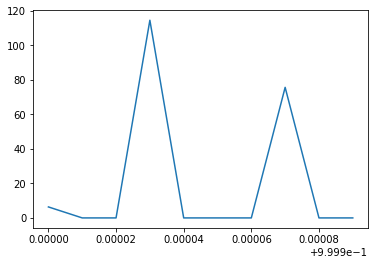

In [196]:
def ecart_type(mat):
    n = len(mat)
    x = [i/100000.0 for i in range(99990,100000)]
    y = []
    for i in x:
        y.append(statistics.stdev(temps(mat,2,i)[1]))
    plt.plot(x,y)
    

ecart_type(M10)